<a href="https://colab.research.google.com/github/cristinarainich/Sternberg_analysis/blob/main/Models%20Neighbourhood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

Updated on 17/05/2023 16:27

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import pylab as pl
import seaborn as sns
import re
from scipy import stats
import scipy.io
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sns.set()

The code below for importing the R environment to Python doesn't work

In [3]:
!pip install -q pymer4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 4.9 MB/s eta 0:00:00


In [4]:
from pymer4.models import Lmer

In [5]:
!pip install -q statsmodels

In [ ]:
# Install R and Rpy2
!apt-get install r-base
!pip install rpy2==3.5.5
#!pip install -q rpy2

# Install LMER packages (THIS TAKES ABOUT 3~5 minutes)
packnames = ('lme4', 'lmerTest', 'emmeans', "geepack")
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages(StrVector(packnames))

In [ ]:
%load_ext rpy2.ipython

NotImplementedError: ignored

In [ ]:
%%R 
library(lme4)
library(lmerTest)

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Uploading data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
working_path = Path('/content/drive/MyDrive/CoganLab/Neighbourhood')

IEEG dataset: ['D30', 'D33', 'D49', 'D54', 'D61', 'D65', 'D70', 'D77', 'D85'] this subjects are below 70% threshold. 

In [10]:
ieeg = pd.read_csv(
    working_path.joinpath('ieeg_processed.csv'),
    index_col=None
)

EEG dataset without outliers but with 'no response' trials. Non of the subjects was rejected because all of them are above 70% accuracy.

In [11]:
eeg = pd.read_csv(
    working_path.joinpath('eeg_processed.csv'),
    index_col=None
)

In [12]:
ieeg = ieeg.loc[:, ieeg.columns != 'Unnamed: 0']
eeg = eeg.loc[:, eeg.columns != 'Unnamed: 0']

In [13]:
working_path = Path('/content/drive/MyDrive/CoganLab/Environmental')

Adding labels for better plots

In [14]:
lex_name = []
for i in eeg.Lex.values:
  if i == 1:
    lex_name.append('word')
  elif i == 0:
    lex_name.append('nonword')
probe_name = []
for i in eeg.ProbeType.values:
  if i == 2:
    probe_name.append('match')
  elif i == 1:
    probe_name.append('mismatch')
phono_name = []
for i in eeg.Phono.values:
  if i == 1:
    phono_name.append('low')
  elif i == 0:
    phono_name.append('high')

In [15]:
eeg['Lex_name'] = lex_name
eeg['Probe_name'] = probe_name
eeg['Phono_name'] = phono_name

In [16]:
lex_name = []
for i in ieeg.Lex.values:
  if i == 1:
    lex_name.append('word')
  elif i == 0:
    lex_name.append('nonword')
probe_name = []
for i in ieeg.ProbeType.values:
  if i == 2:
    probe_name.append('match')
  elif i == 1:
    probe_name.append('mismatch')
phono_name = []
for i in ieeg.Phono.values:
  if i == 1:
    phono_name.append('low')
  elif i == 0:
    phono_name.append('high')

In [17]:
ieeg['Lex_name'] = lex_name
ieeg['Probe_name'] = probe_name
ieeg['Phono_name'] = phono_name

## Functions

In [18]:
# checking significance with ttests
def ttest(x, y):
  if len(x) == len(y):
    return stats.ttest_ind(x, y, equal_var = True)
  else:
    return stats.ttest_ind(x, y, equal_var = False)

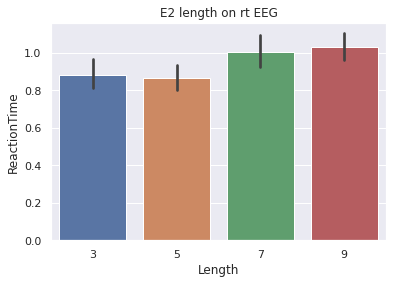

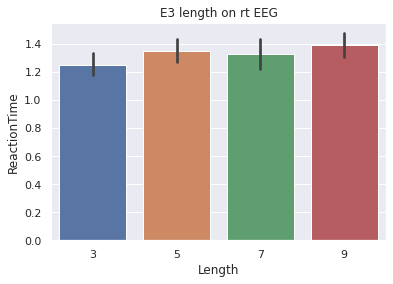

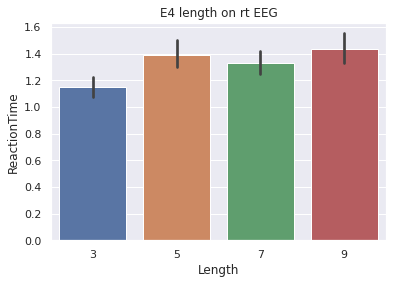

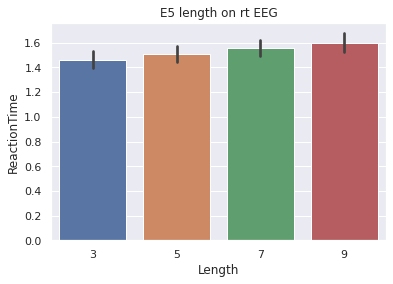

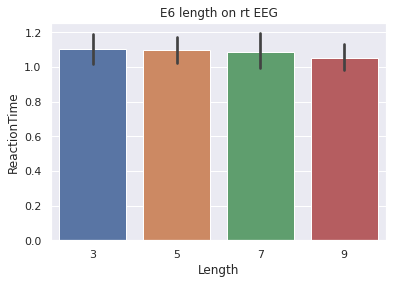

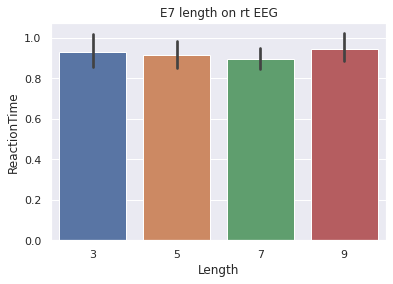

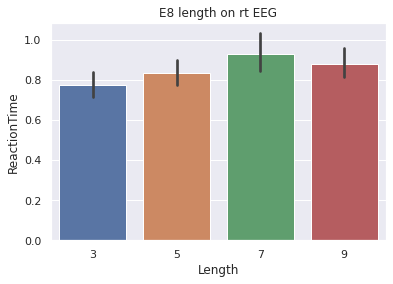

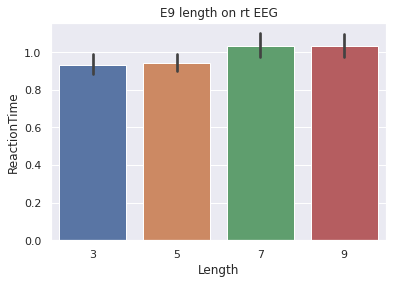

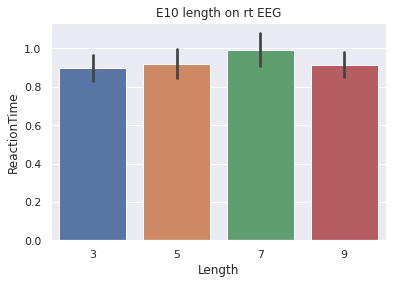

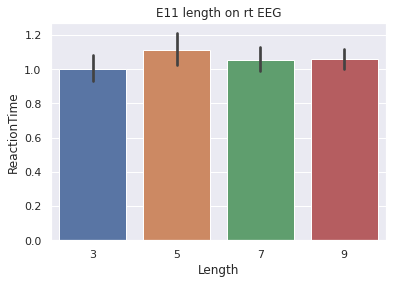

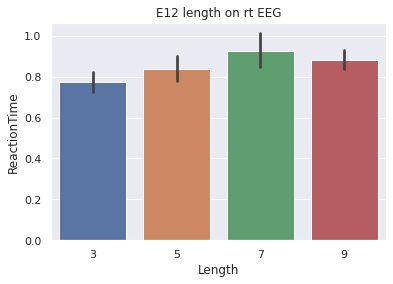

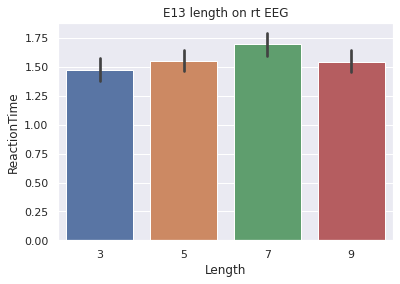

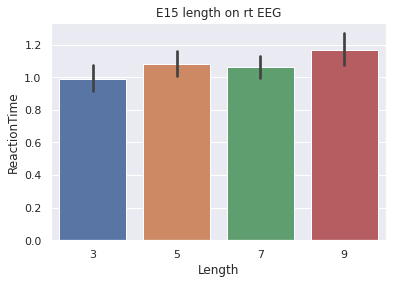

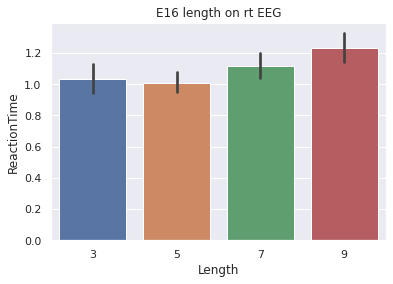

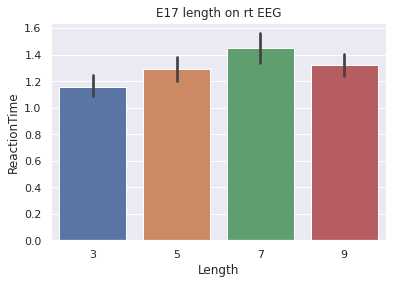

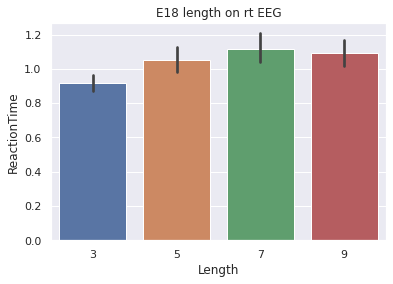

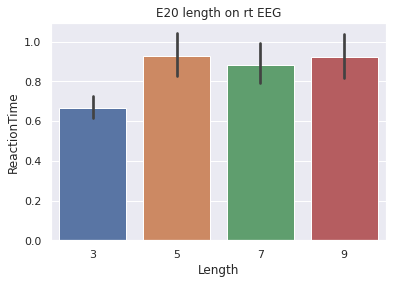

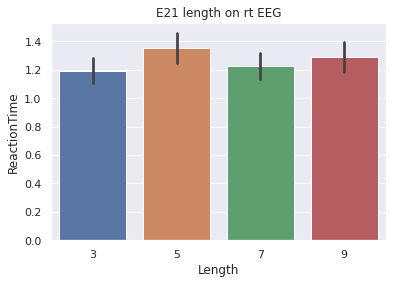

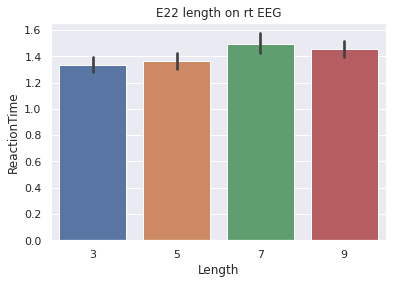

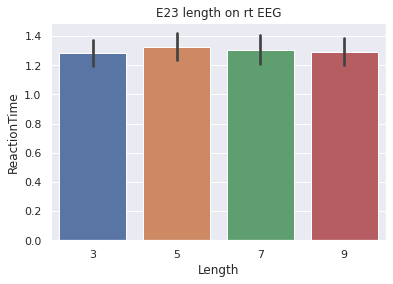

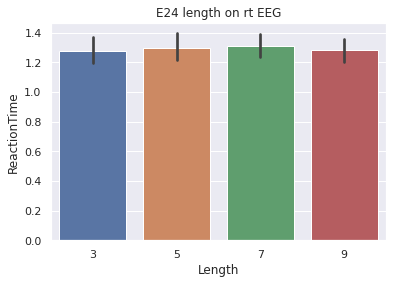

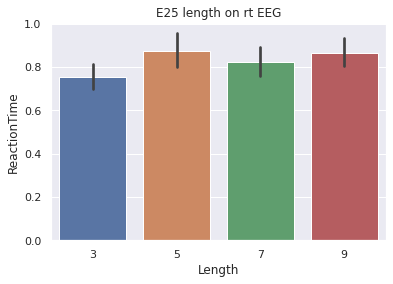

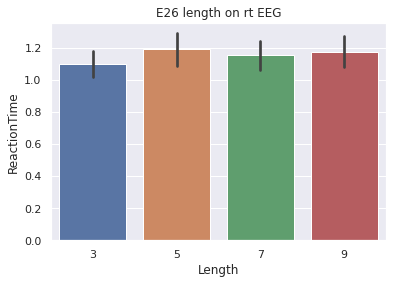

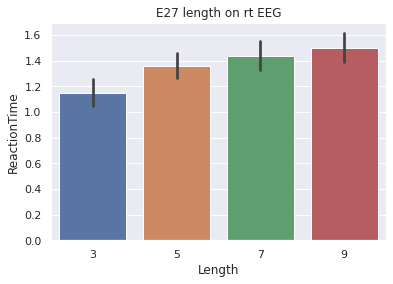

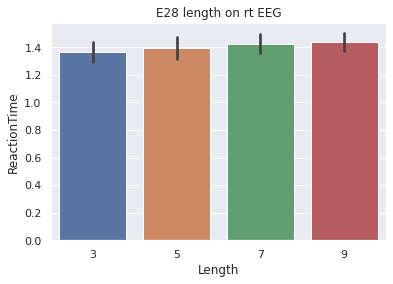

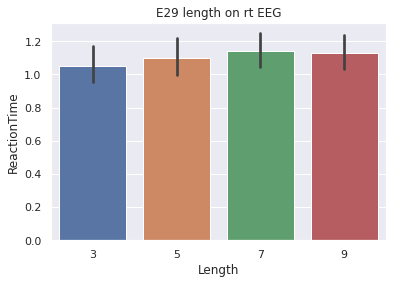

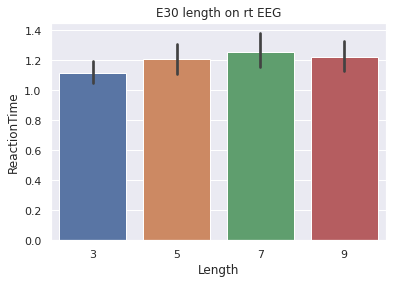

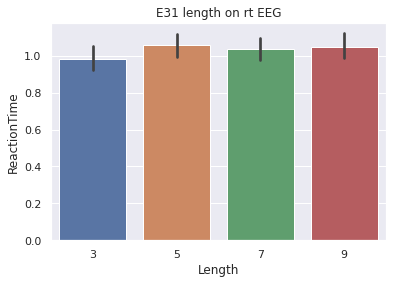

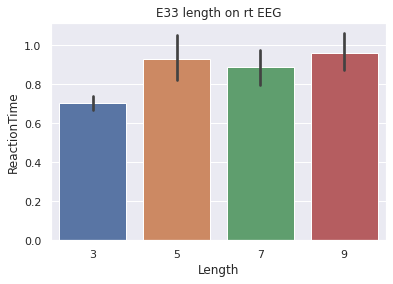

In [ ]:
for i in eeg.Subject.unique():
  subset = eeg[eeg['Subject'] == i]
  pl.figure()
  sns.barplot('Length', 'ReactionTime', data=subset)
  pl.title(i + ' length on rt EEG');

E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E15
E16
E17
E18
E20
E21
E22
E23
E24
E25
E26
E27
E28
E29
E30
E31
E33


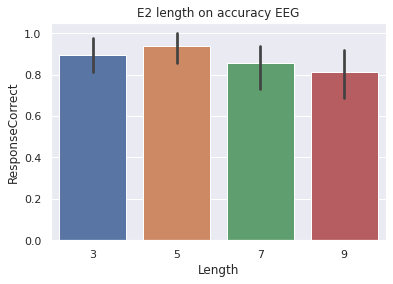

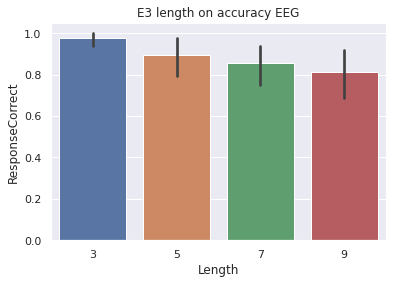

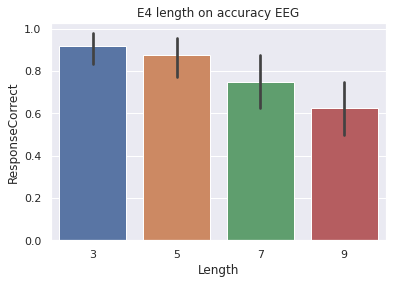

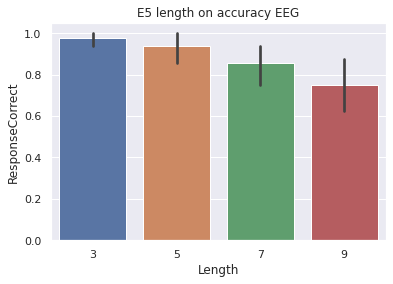

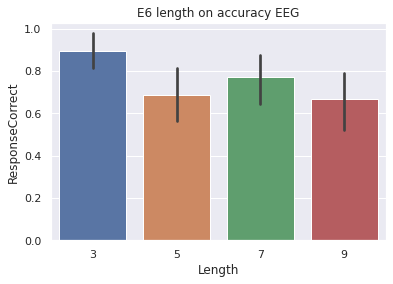

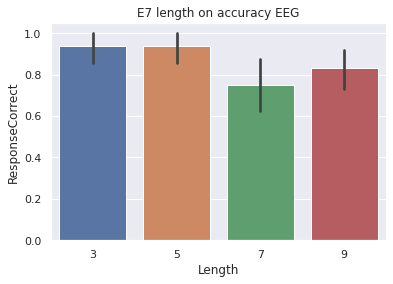

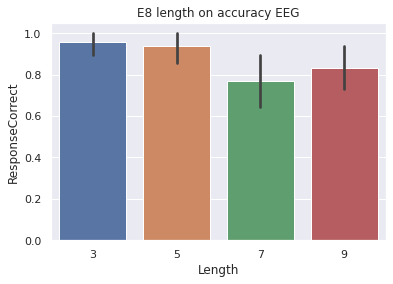

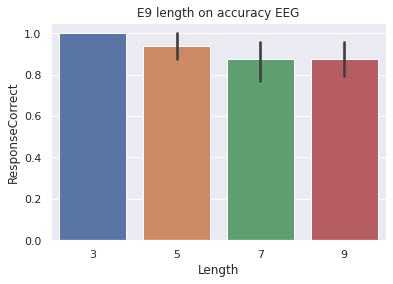

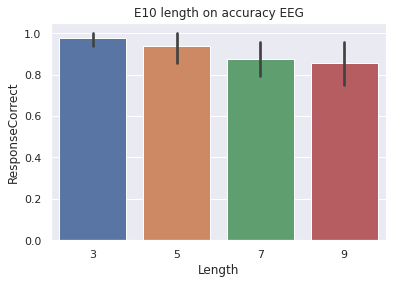

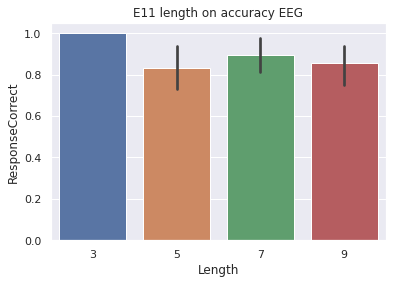

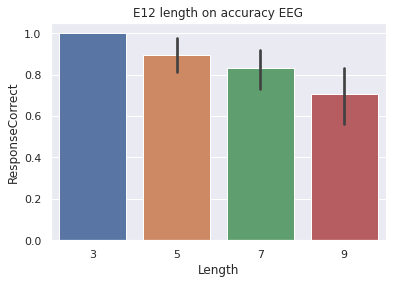

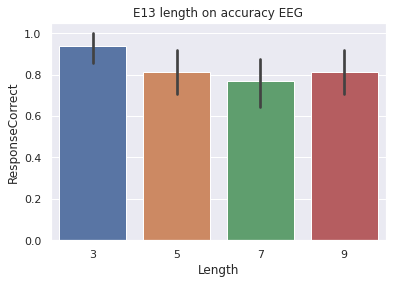

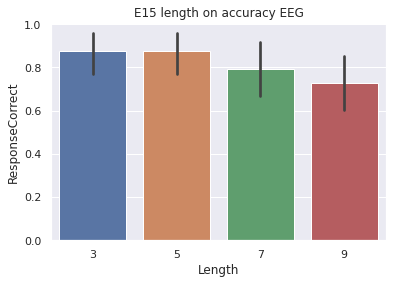

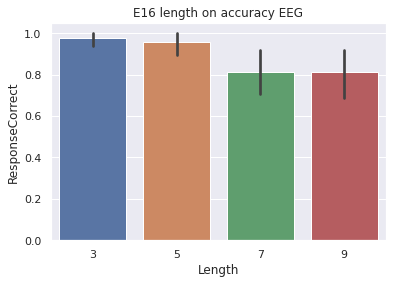

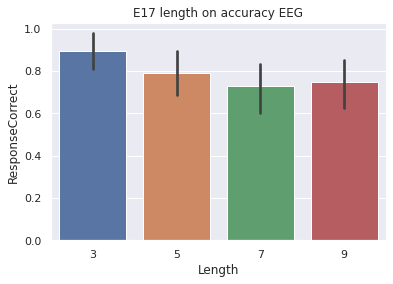

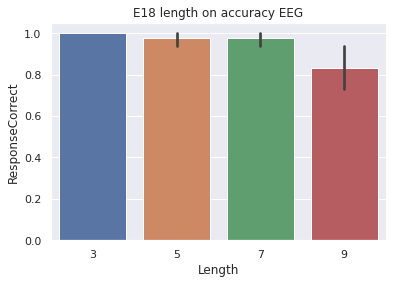

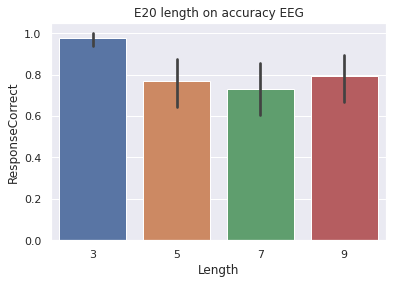

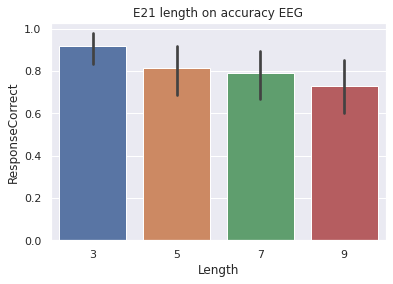

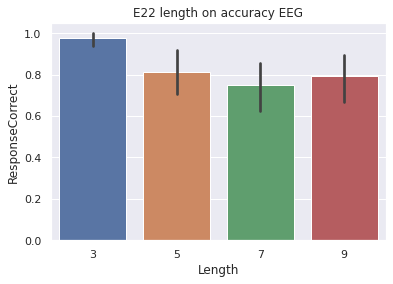

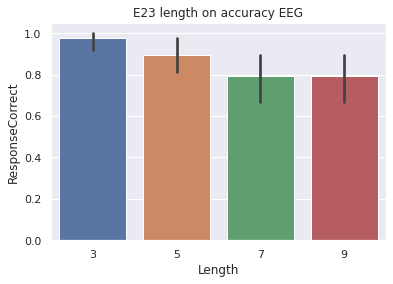

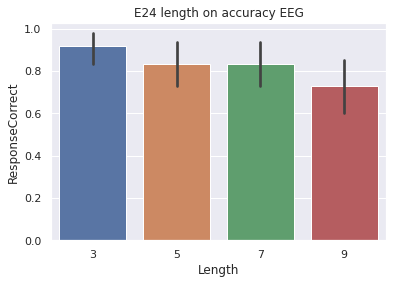

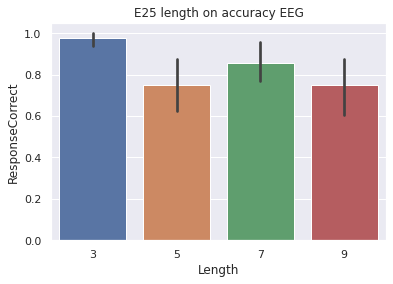

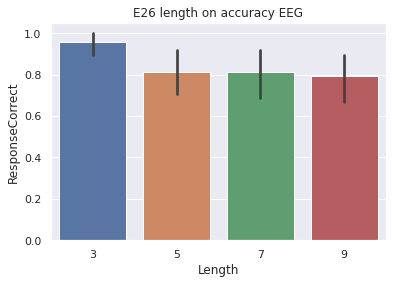

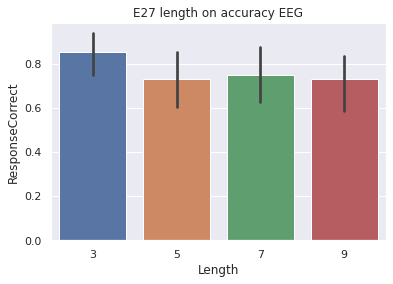

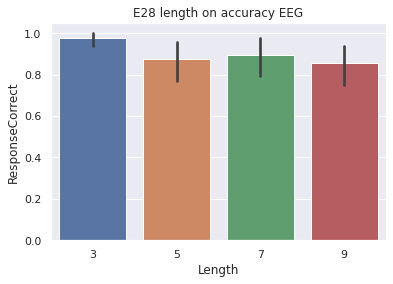

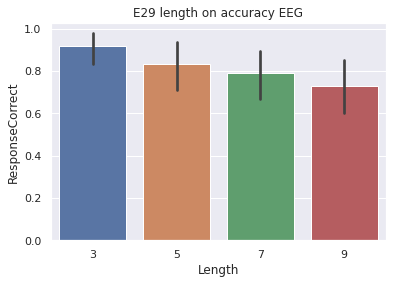

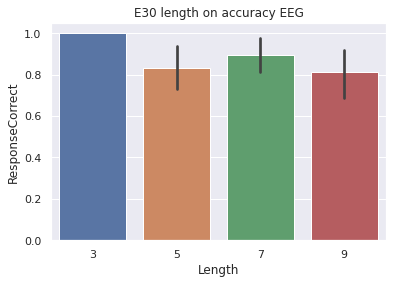

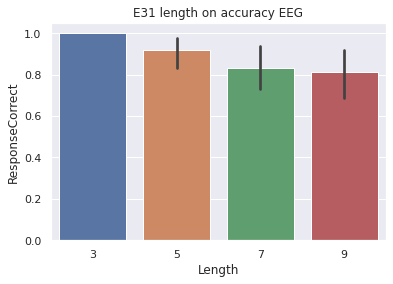

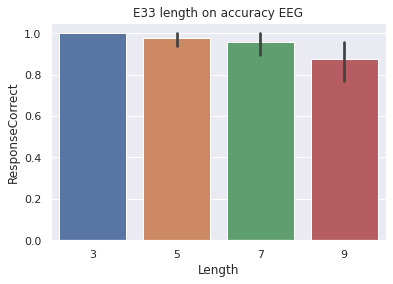

In [ ]:
for i in eeg.Subject.unique():
  subset = eeg[eeg['Subject'] == i]
  pl.figure()
  sns.barplot('Length', 'ResponseCorrect', data=subset)
  pl.title(i + ' length on accuracy EEG');

In [ ]:
subset = eeg[eeg['Subject'] == 'E20']
x, y = subset[subset['Length'] == 7]['ResponseCorrect'], subset[subset['Length'] == 9]['ResponseCorrect']
ttest(x,y)

Ttest_indResult(statistic=-0.7117491316098008, pvalue=0.4783828322215653)

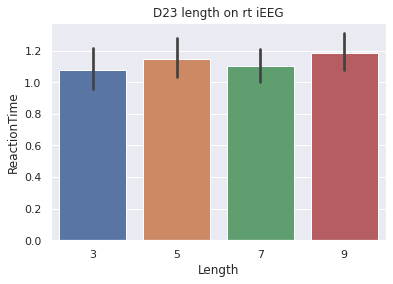

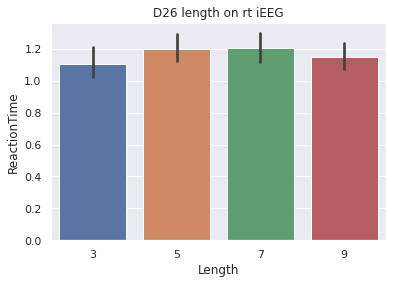

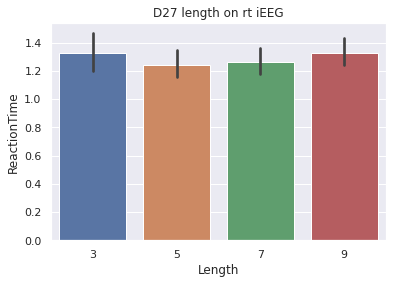

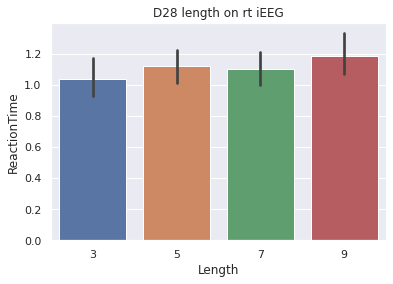

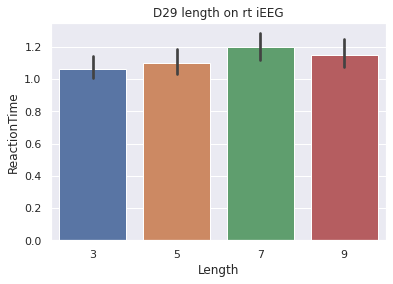

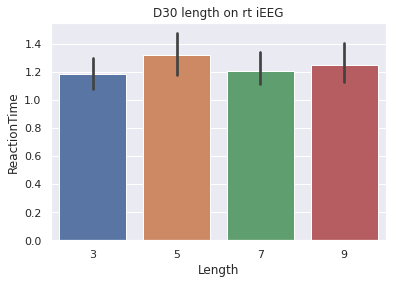

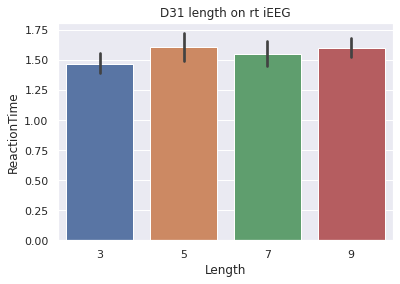

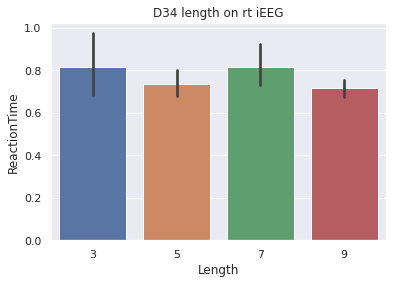

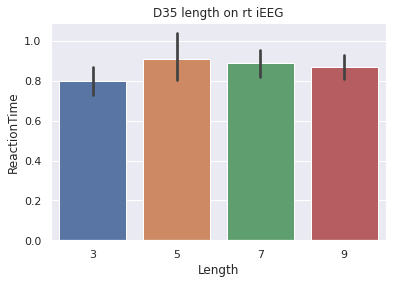

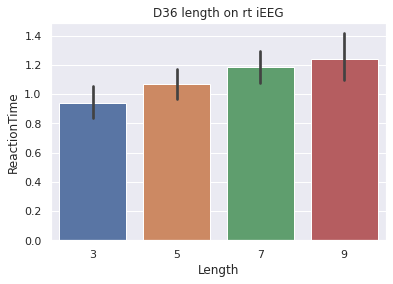

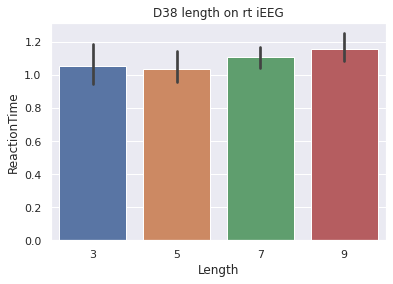

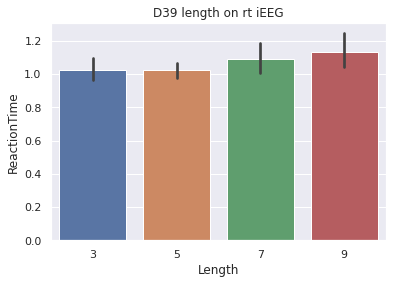

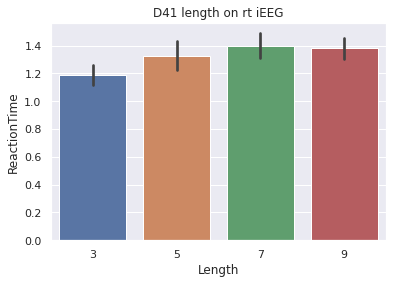

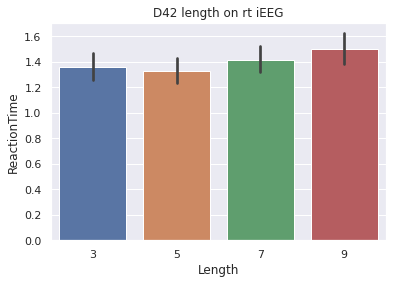

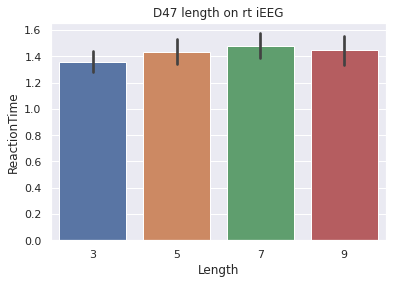

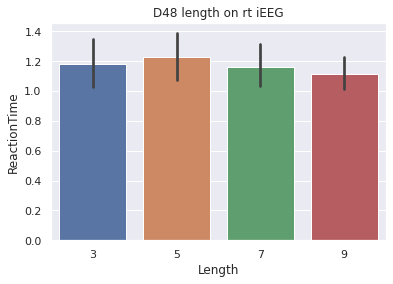

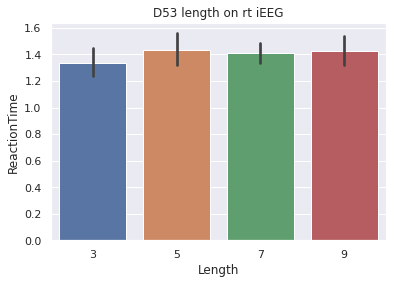

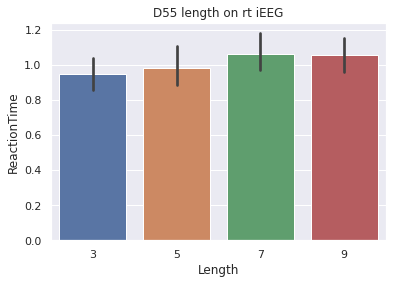

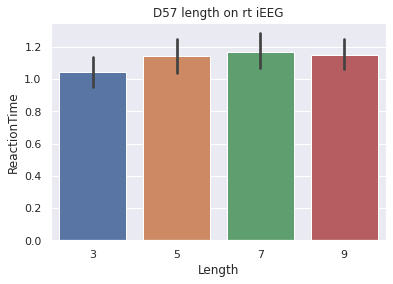

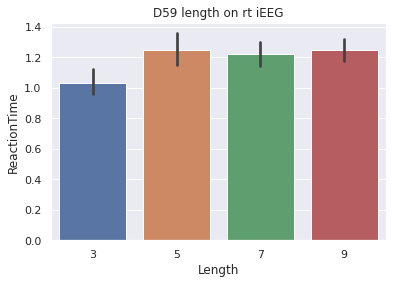

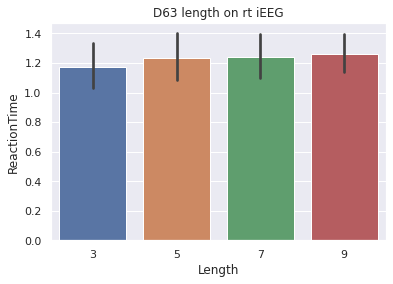

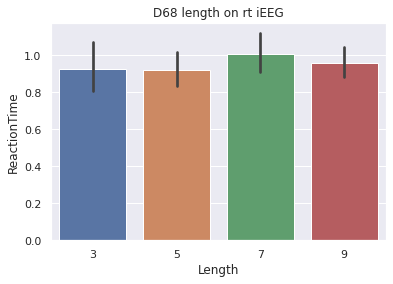

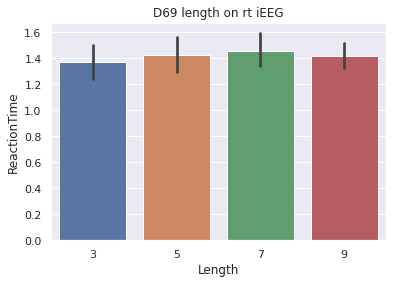

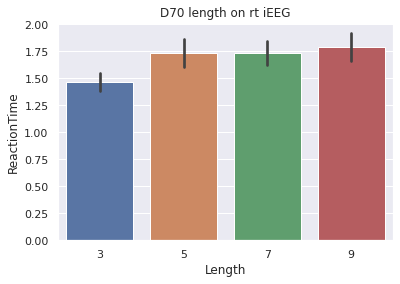

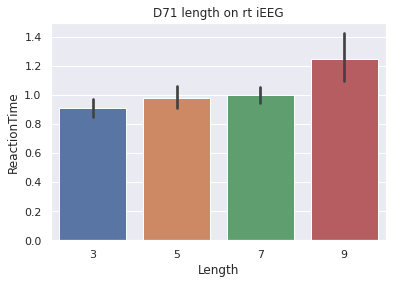

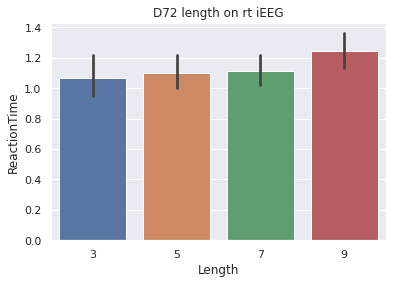

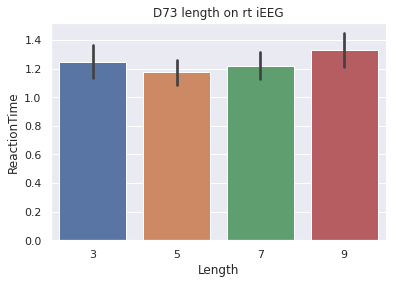

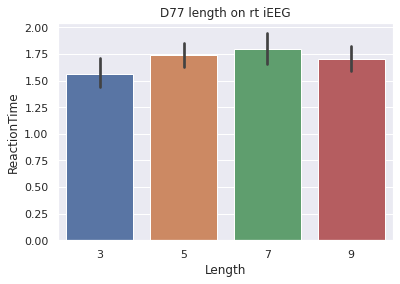

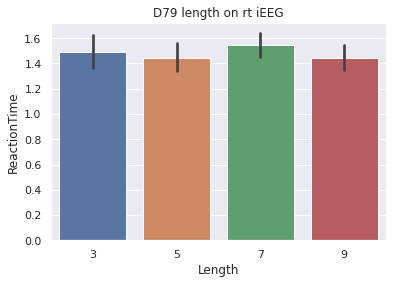

In [ ]:
for i in ieeg.Subject.unique():
  subset = ieeg[ieeg['Subject'] == i]
  pl.figure()
  sns.barplot('Length', 'ReactionTime', data=subset)
  pl.title(i + ' length on rt iEEG');

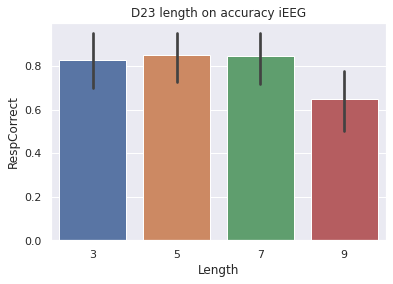

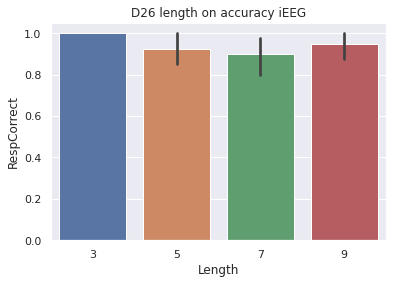

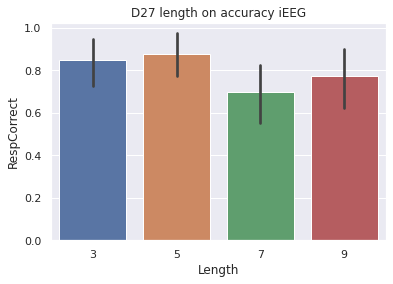

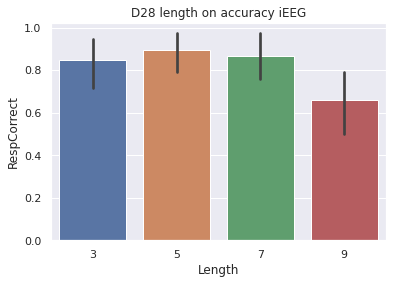

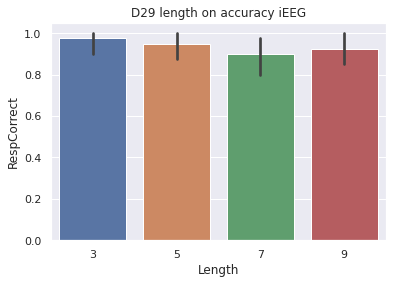

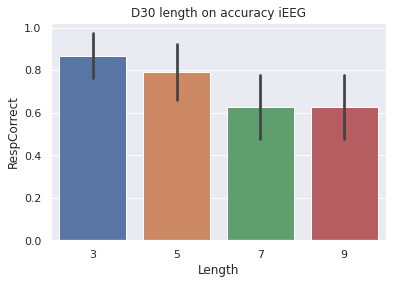

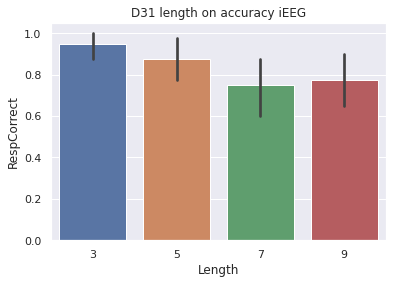

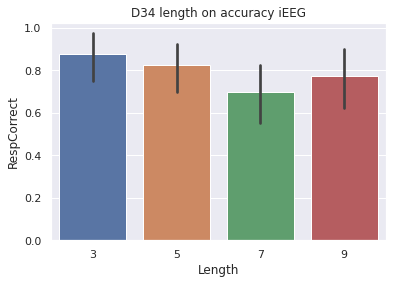

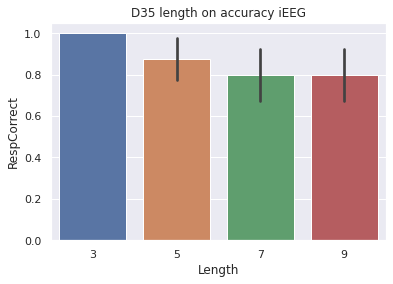

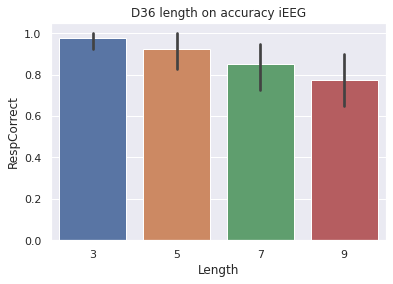

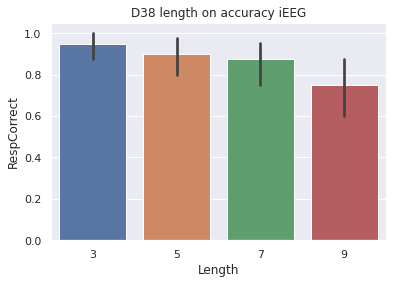

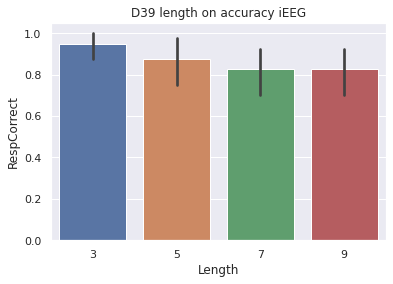

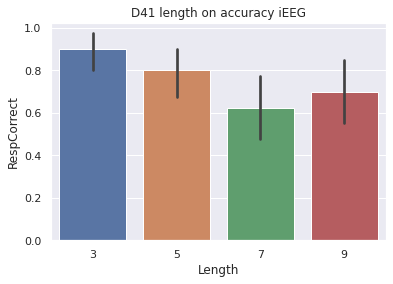

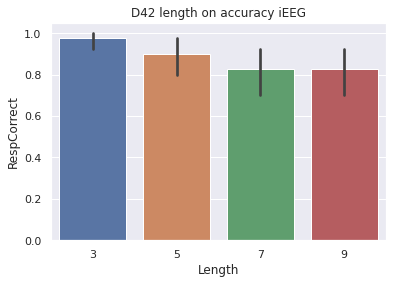

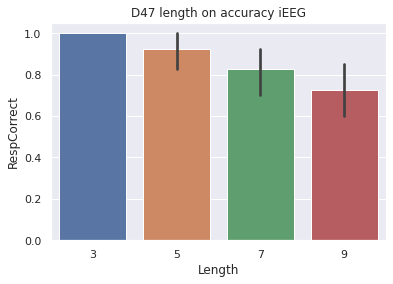

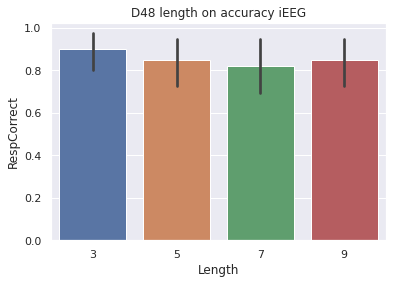

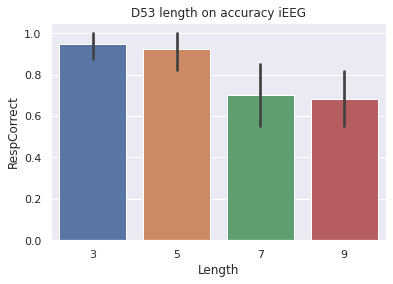

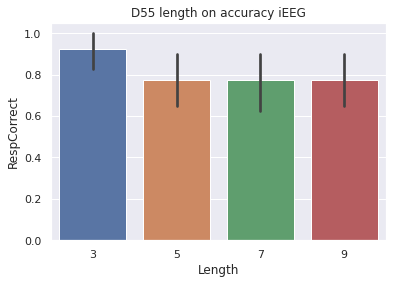

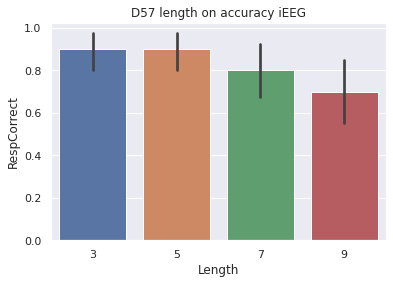

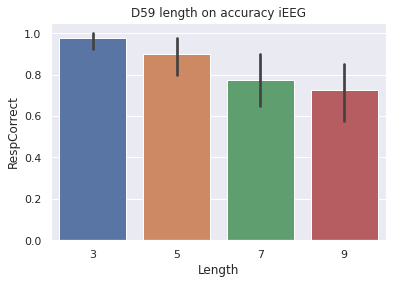

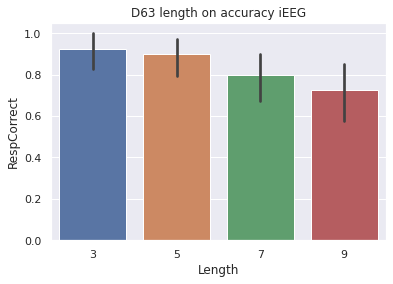

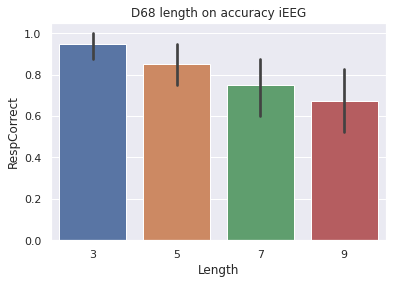

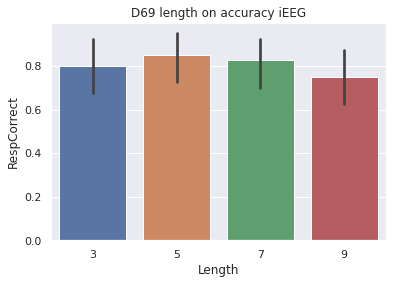

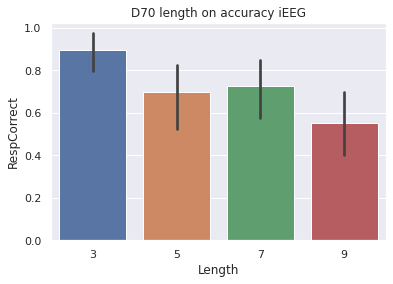

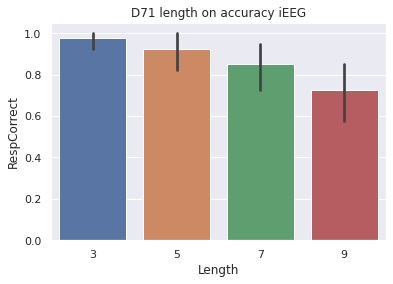

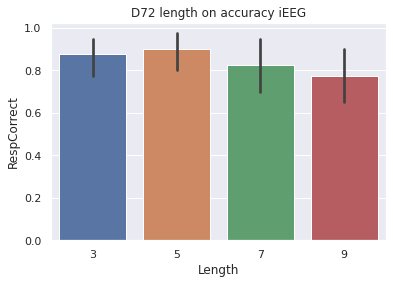

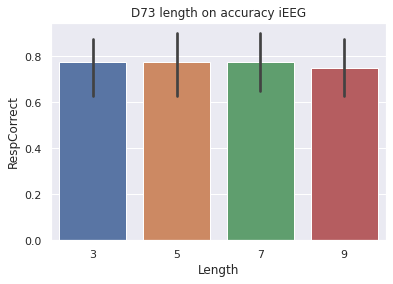

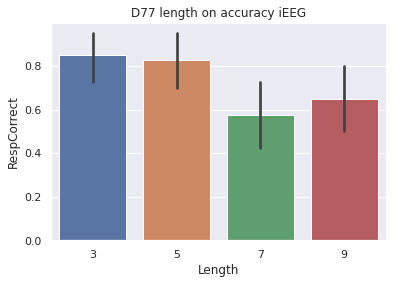

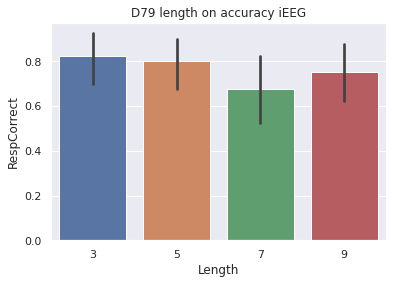

In [ ]:
for i in ieeg.Subject.unique():
  subset = ieeg[ieeg['Subject'] == i]
  pl.figure()
  sns.barplot('Length', 'RespCorrect', data=subset)
  pl.title(i + ' length on accuracy iEEG');

In [ ]:
for i in common:
  subset = ieeg[ieeg['Subject'] == i]
  print(i, subset.RespCorrect.mean())

D35 0.86875
D38 0.86875
D39 0.86875
D42 0.88125
D47 0.86875
D53 0.8152866242038217
D55 0.8125
D57 0.825
D63 0.8364779874213837
D69 0.80625
D71 0.8679245283018868
D73 0.76875
D77 0.725


In [ ]:
for i in common:
  subset = environ_ieeg[environ_ieeg['Subject'] == i]
  print(i, subset.RespCorrect.mean())

D35 0.8333333333333334
D38 0.8
D39 0.7559523809523809
D42 0.875
D47 0.7916666666666666
D53 0.8511904761904762
D55 0.8392857142857143
D57 0.8809523809523809
D63 0.7380952380952381
D69 0.7321428571428571
D71 0.8214285714285714
D73 0.7738095238095238
D77 0.7797619047619048


D35 Ttest_indResult(statistic=array([-2.12356157]), pvalue=array([0.03526405]))
D38 Ttest_indResult(statistic=array([-0.69904205]), pvalue=array([0.4855535]))
D39 Ttest_indResult(statistic=array([-2.12356157]), pvalue=array([0.03526405]))
D42 Ttest_indResult(statistic=array([-0.24289762]), pvalue=array([0.80839975]))
D47 Ttest_indResult(statistic=array([0.23269438]), pvalue=array([0.81629989]))
D53 Ttest_indResult(statistic=array([0.09114829]), pvalue=array([0.92749253]))
D55 Ttest_indResult(statistic=array([0.]), pvalue=array([1.]))
D57 Ttest_indResult(statistic=array([-0.8288284]), pvalue=array([0.40845184]))
D63 Ttest_indResult(statistic=array([1.68747767]), pvalue=array([0.09360697]))
D69 Ttest_indResult(statistic=array([0.19879577]), pvalue=array([0.84267808]))
D71 Ttest_indResult(statistic=array([2.15168751]), pvalue=array([0.03318495]))
D73 Ttest_indResult(statistic=array([1.69206597]), pvalue=array([0.09260458]))
D77 Ttest_indResult(statistic=array([1.05940371]), pvalue=array([

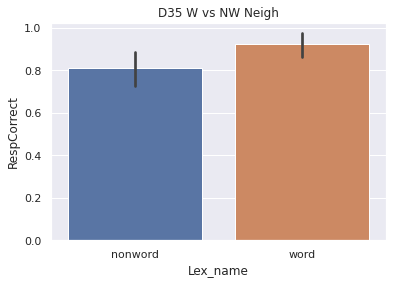

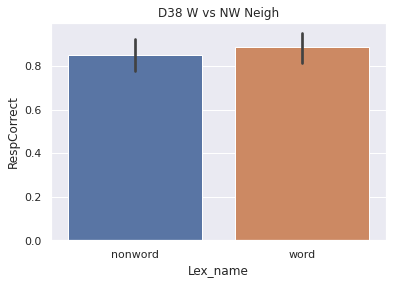

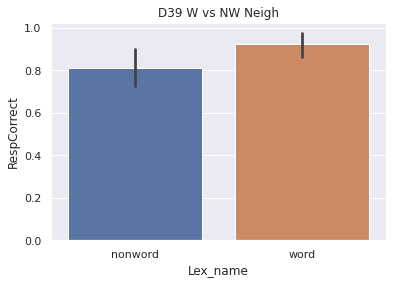

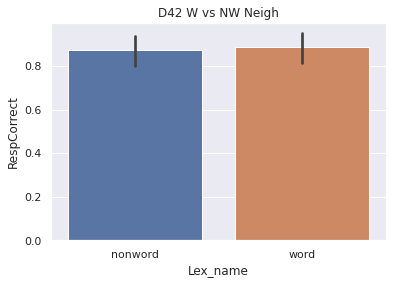

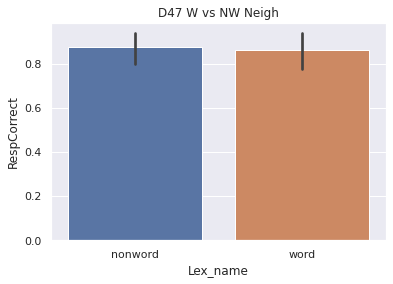

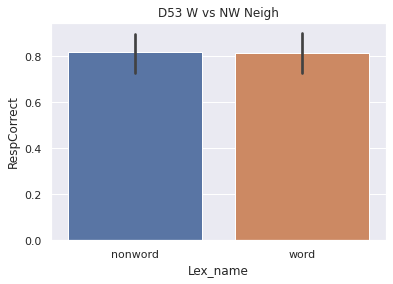

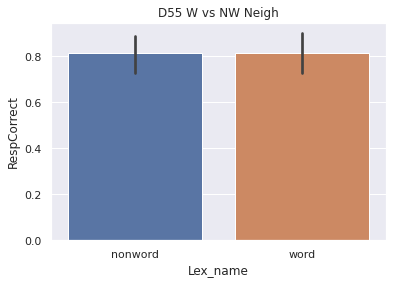

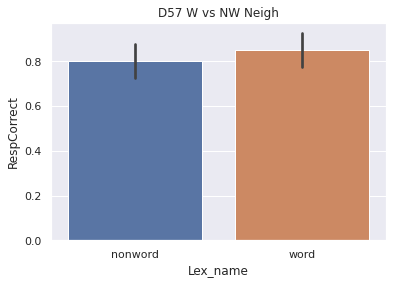

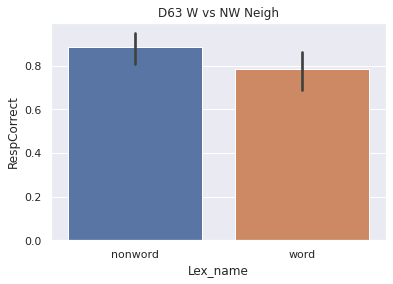

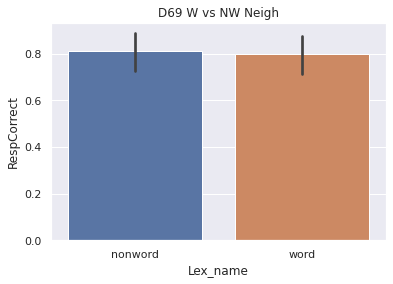

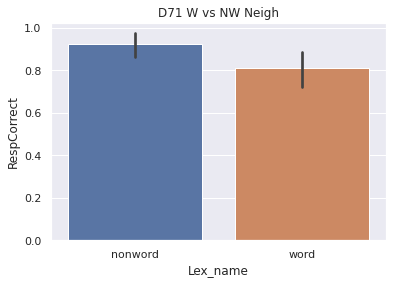

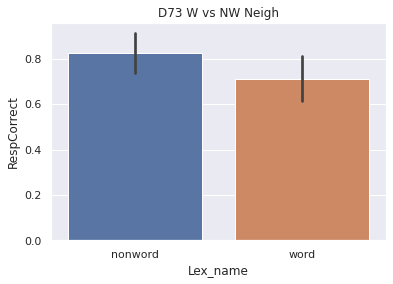

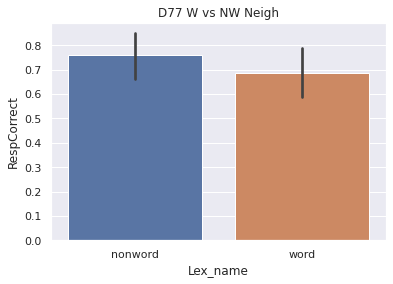

In [ ]:
for i in common:
  subset = ieeg[ieeg['Subject'] == i]
  pl.figure()
  sns.barplot('Lex_name', 'RespCorrect', order=['nonword', 'word'], data=subset)
  pl.title(i + ' W vs NW Neigh')
  
  x, y = subset[subset['Lex'] == 0][['RespCorrect']].values, subset[subset['Lex'] == 1][['RespCorrect']].values
  print(i, ttest(x,y))

D35 Ttest_indResult(statistic=array([1.85523318]), pvalue=array([0.06624044]))
D38 Ttest_indResult(statistic=array([-0.55543048]), pvalue=array([0.57979738]))
D39 Ttest_indResult(statistic=array([-1.30761025]), pvalue=array([0.19373192]))
D42 Ttest_indResult(statistic=array([0.88014083]), pvalue=array([0.38070186]))
D47 Ttest_indResult(statistic=array([1.77126199]), pvalue=array([0.07928663]))
D53 Ttest_indResult(statistic=array([0.51055216]), pvalue=array([0.61068775]))
D55 Ttest_indResult(statistic=array([0.53591629]), pvalue=array([0.59309841]))
D57 Ttest_indResult(statistic=array([0.]), pvalue=array([1.]))
D63 Ttest_indResult(statistic=array([0.89038912]), pvalue=array([0.37520026]))
D69 Ttest_indResult(statistic=array([0.41490237]), pvalue=array([0.67902147]))
D71 Ttest_indResult(statistic=array([-0.47188141]), pvalue=array([0.63794615]))
D73 Ttest_indResult(statistic=array([0.45686831]), pvalue=array([0.64866663]))
D77 Ttest_indResult(statistic=array([-0.22493994]), pvalue=array(

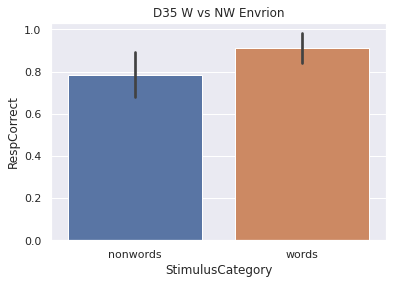

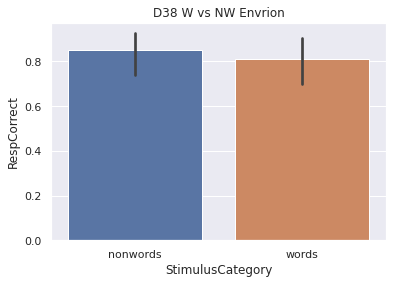

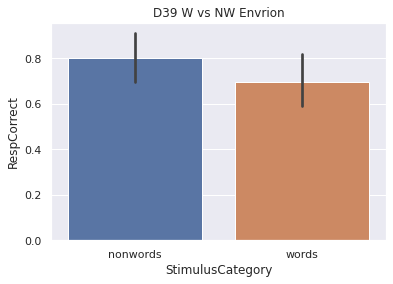

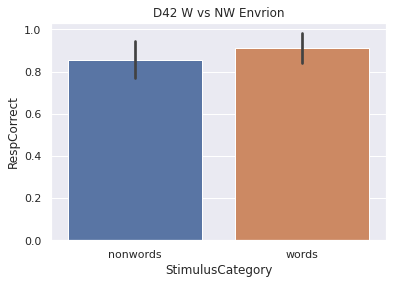

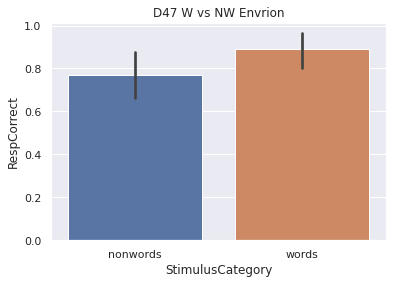

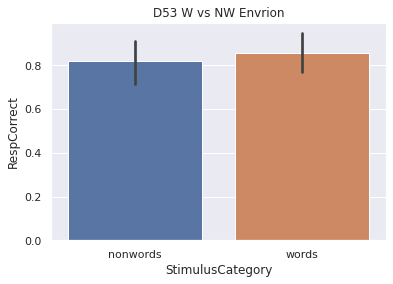

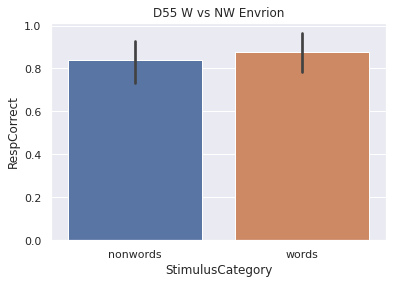

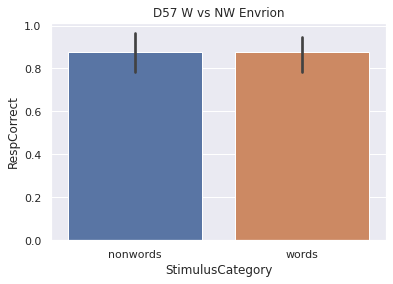

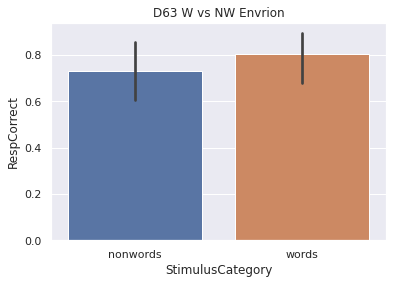

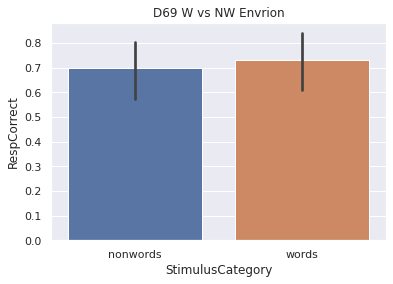

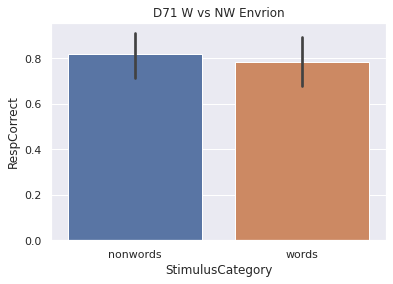

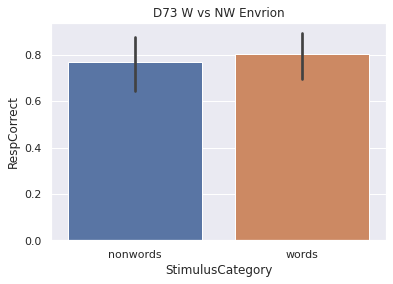

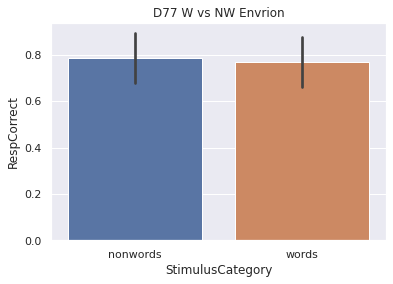

In [ ]:
for i in common:
  subset = environ_ieeg[(environ_ieeg['Subject'] == i) & 
                        (environ_ieeg['StimulusCategory'] != 'environment')]
  pl.figure()
  sns.barplot('StimulusCategory', 'RespCorrect', order=['nonwords', 'words'], data=subset)
  pl.title(i + ' W vs NW Envrion')

  x, y = subset[subset['StimulusCategory'] == 'words'][['RespCorrect']].values, subset[subset['StimulusCategory'] == 'nonwords'][['RespCorrect']].values
  print(i, ttest(x,y))

In [ ]:
ieeg.columns

Index(['Trial', 'Subject', 'block', 'ProbeType', 'probeSound_idx',
       'ProbeTypeName', 'StimlusCategory', 'ReactionTime', 'KeyCode', 'Resp',
       'RespCorrect', 'Omission', 'ProbeCategory', 'stimulusSounds_idx',
       'stimulusSounds_name', 'probeSound_name', 'Position', 'Length', 'Lex',
       'Phono', 'Lex_name', 'Probe_name', 'Phono_name'],
      dtype='object')

In [ ]:
nonwords = []
words = []
name = ieeg.probeSound_name.values
lex = ieeg.Lex.values
for i in range(0, ieeg.shape[0]):
  if lex[i] == 1:
    if name[i] not in words:
      words.append(name[i]) 
  elif lex[i] == 0:
    if name[i] not in nonwords:
      nonwords.append(name[i])

In [ ]:
for i in words:
  subset = ieeg[ieeg['probeSound_name'] == i]
  print(i)
  print(subset.groupby(['Subject', 'ProbeType'])[['RespCorrect']].mean())
  print('')

wash.wav
                   RespCorrect
Subject ProbeType             
D23     1             0.714286
        2             1.000000
D27     2             1.000000
D28     1             0.714286
        2             1.000000
D29     2             1.000000
D30     1             1.000000
        2             1.000000
D31     1             0.500000
        2             1.000000
D34     1             1.000000
        2             1.000000
D35     1             1.000000
        2             1.000000
D36     1             0.750000
D38     2             1.000000
D39     2             1.000000
D41     1             0.500000
D42     1             0.750000
D47     1             1.000000
D48     2             1.000000
D53     1             1.000000
D55     1             0.750000
D57     1             1.000000
D59     1             1.000000
D63     1             0.750000
D68     1             1.000000
D69     1             0.750000
D70     1             0.750000
D71     1             0.500000

In [ ]:
for i in words:
  subset = ieeg[ieeg['probeSound_name'] == i]
  print(i, subset.RespCorrect.mean())

wash.wav 0.8442622950819673
lair.wav 0.8165137614678899
soar.wav 0.8032786885245902
witch.wav 0.7590361445783133
sure.wav 0.9213483146067416
youth.wav 0.8508771929824561
tube.wav 0.7911392405063291
fudge.wav 0.8709677419354839
seek.wav 0.9166666666666666
noun.wav 0.8211920529801324
cop.wav 0.8736842105263158
pawn.wav 0.8021978021978022
toss.wav 0.77
debt.wav 0.8549618320610687
waif.wav 0.8484848484848485
fog.wav 0.8413793103448276
gear.wav 0.723404255319149
moan.wav 0.8271604938271605
fell.wav 0.6310679611650486
long.wav 0.7878787878787878
f^j.wav 1.0
wcS.wav 1.0
tcs.wav 1.0
sik.wav 1.0
pcn.wav 1.0
lEr.wav 0.6666666666666666
lcG.wav 1.0
fcg.wav 1.0
mon.wav 1.0
dEt.wav 1.0
Sur.wav 0.75
fEl.wav 1.0
wef.wav 0.75
yuT.wav 1.0
tub.wav 1.0
nWn.wav 1.0
wIC.wav 1.0
kap.wav 1.0
sor.wav 0.75
gIr.wav 1.0


In [ ]:
eeg.columns

Index(['Trial', 'Subject', 'Block', 'ProbeType', 'ProbeSound_idx',
       'ProbeTypeName', 'StimulusCategory', 'ReactionTime', 'KeyCode',
       'Response', 'ResponseCorrect', 'Omission', 'ProbeCategory',
       'StimulusSounds_name', 'ProbeSound_name', 'StimulusSounds_idx',
       'Position', 'Length', 'stdRT', 'Lex', 'Phono', 'Lex_name', 'Probe_name',
       'Phono_name'],
      dtype='object')

In [ ]:
for i in words:
  subset = eeg[eeg['ProbeSound_name'] == i]
  print(i, subset.ResponseCorrect.mean())

wash.wav 0.8761061946902655
lair.wav 0.9809523809523809
soar.wav 0.8850574712643678
witch.wav 0.9743589743589743
sure.wav 0.9027777777777778
youth.wav 0.8714285714285714
tube.wav 0.9142857142857143
fudge.wav 0.881578947368421
seek.wav 0.9726027397260274
noun.wav 0.9519230769230769
cop.wav 0.8943089430894309
pawn.wav 0.8056872037914692
toss.wav 0.9322033898305084
debt.wav 0.9487179487179487
waif.wav 0.9342105263157895
fog.wav 0.8188405797101449
gear.wav 0.904
moan.wav 0.9223300970873787
fell.wav 0.7567567567567568
long.wav 0.6612903225806451
f^j.wav 0.9565217391304348
wcS.wav 1.0
tcs.wav 0.9285714285714286
sik.wav 0.92
pcn.wav 0.8235294117647058
lEr.wav 0.9117647058823529
lcG.wav 0.9393939393939394
fcg.wav 0.8421052631578947
mon.wav 0.8125
dEt.wav 0.9
Sur.wav 0.9111111111111111
fEl.wav 0.7692307692307693
wef.wav 0.972972972972973
yuT.wav 0.8695652173913043
tub.wav 0.9714285714285714
nWn.wav 0.7083333333333334
wIC.wav 1.0
kap.wav 0.875
sor.wav 0.8545454545454545
gIr.wav 0.863636363636363

In [ ]:
for i in nonwords:
  subset = ieeg[ieeg['probeSound_name'] == i]
  print(i, subset.RespCorrect.mean())

paon.wav 0.7461538461538462
faez.wav 0.8795180722891566
vern.wav 0.9083969465648855
kehl.wav 0.8032786885245902
yuwf.wav 0.8071428571428572
yong.wav 0.8018018018018018
rehl.wav 0.8275862068965517
zerth.wav 0.8085106382978723
kawl.wav 0.7831325301204819
kuv.wav 0.8275862068965517
gawth.wav 0.6833333333333333
deech.wav 0.8461538461538461
gaen.wav 0.864
saor.wav 0.935064935064935
dehs.wav 0.8387096774193549
jhong.wav 0.8773584905660378
kihr.wav 0.8695652173913043
wehz.wav 0.7283950617283951
rihn.wav 0.8
puwn.wav 0.8333333333333334
wEz.wav 1.0
vRn.wav 1.0
DiC.wav 1.0
yuf.wav 0.8
pan.wav 1.0
kEl.wav 0.8333333333333334
kYl.wav 0.8571428571428571
pun.wav 1.0
JcG.wav 1.0
Rin.wav 1.0
f@z.wav 1.0
g@n.wav 0.6666666666666666
dEs.wav 1.0
rEl.wav 1.0
gWT.wav 0.75
kIr.wav 1.0
ycG.wav 1.0
zRT.wav 1.0
sar.wav 1.0


In [ ]:
for i in words:
  subset = ieeg[ieeg['probeSound_name'] == i]
  print(i)
  print(subset.groupby(['Length'])[['RespCorrect']].count())
  print('')

wash.wav
        RespCorrect
Length             
3                20
5                36
7                36
9                30

lair.wav
        RespCorrect
Length             
3                49
5                16
7                 7
9                37

soar.wav
        RespCorrect
Length             
3                23
5                21
7                27
9                51

witch.wav
        RespCorrect
Length             
3                10
5                33
7                27
9                13

sure.wav
        RespCorrect
Length             
3                 9
5                35
7                22
9                23

youth.wav
        RespCorrect
Length             
3                35
5                20
7                52
9                 7

tube.wav
        RespCorrect
Length             
3                27
5                71
7                 6
9                54

fudge.wav
        RespCorrect
Length             
3                31
5                1

In [ ]:
ieeg.groupby(['Lex'])['RespCorrect'].count()

Lex
0    2307
1    2312
Name: RespCorrect, dtype: int64

In [ ]:
environ_ieeg.groupby(['StimulusCategory'])['RespCorrect'].count()

StimulusCategory
environment    837
nonwords       838
words          837
Name: RespCorrect, dtype: int64

In [ ]:
environ_ieeg.head()

Unnamed: 0  block  ReactionTime Resp  RespCorrect  \
0         616      1      1.227901   No            1   
1         617      1      0.953294  Yes            0   
2         618      1      1.314829   No            1   
3         619      1      0.894159  Yes            1   
4         620      1      0.866337   No            0   

                 stimulusSounds_idx  ProbeCategory  probeSound_idx  \
0              [68, 69, 64, 59, 54]              0              23   
1  [10, 6, 4, 2, 16, 7, 22, 14, 15]              0               8   
2              [46, 36, 42, 34, 29]              0               2   
3              [36, 33, 28, 27, 46]              1               3   
4              [71, 51, 55, 61, 59]              1               7   

  StimulusCategory  Trial  ... probeSound_name Subject Length  Words  \
0         nonwords      0  ...         yehbahl     D32      5      0   
1      environment      1  ...     dog_panting     D32      9      0   
2            words      2  ...         chalice     D32      5      1   
3            words      3  ...         chapter     D32      5      1   
4         nonwords      4  ...         haasahp     D32      5      0   

   Nonwords  Environment  ProbeFreq  ProbeImag  \
0         1            0        NaN        NaN   
1         0            1        NaN        NaN   
2         0            0       0.63        4.7   
3         0            0      11.84        4.9   
4         1            0        NaN        NaN   

                           StimFreq                   StimImag  
0                               NaN                        NaN  
1                               NaN                        NaN  
2   [0.55, 44.0, 1.86, 0.75, 10.82]  [5.6, 5.6, 3.8, 6.6, 5.4]  
3  [44.0, 50.96, 0.61, 11.84, 0.55]  [5.6, 4.0, 3.5, 4.9, 5.6]  
4                               NaN                        NaN  

[5 rows x 21 columns]

In [ ]:
nonwords = []
words = []
name = environ_ieeg.probeSound_name.values
lex = environ_ieeg.StimulusCategory.values
for i in range(0, environ_ieeg.shape[0]):
  if lex[i] == 'words':
    if name[i] not in words:
      words.append(name[i]) 
  elif lex[i] == ['nonwords']:
    if name[i] not in nonwords:
      nonwords.append(name[i])

In [ ]:
words

['chalice',
 'chapter',
 'porridge',
 'cherub',
 'cushion',
 'quota',
 'glacier',
 'drama',
 'kitchen',
 'pleasure',
 'duty',
 'tunic',
 'menu',
 'vision',
 'topic',
 'rhythm',
 'comic',
 'medic',
 'madam',
 'creature',
 'rabbit',
 'vermin',
 'bounty',
 'member']

In [ ]:
environ_ieeg.head()

Unnamed: 0  block  ReactionTime Resp  RespCorrect  \
0         616      1      1.227901   No            1   
1         617      1      0.953294  Yes            0   
2         618      1      1.314829   No            1   
3         619      1      0.894159  Yes            1   
4         620      1      0.866337   No            0   

                 stimulusSounds_idx  ProbeCategory  probeSound_idx  \
0              [68, 69, 64, 59, 54]              0              23   
1  [10, 6, 4, 2, 16, 7, 22, 14, 15]              0               8   
2              [46, 36, 42, 34, 29]              0               2   
3              [36, 33, 28, 27, 46]              1               3   
4              [71, 51, 55, 61, 59]              1               7   

  StimulusCategory  Trial  ... probeSound_name Subject Length  Words  \
0         nonwords      0  ...         yehbahl     D32      5      0   
1      environment      1  ...     dog_panting     D32      9      0   
2            words      2  ...         chalice     D32      5      1   
3            words      3  ...         chapter     D32      5      1   
4         nonwords      4  ...         haasahp     D32      5      0   

   Nonwords  Environment  ProbeFreq  ProbeImag  \
0         1            0        NaN        NaN   
1         0            1        NaN        NaN   
2         0            0       0.63        4.7   
3         0            0      11.84        4.9   
4         1            0        NaN        NaN   

                           StimFreq                   StimImag  
0                               NaN                        NaN  
1                               NaN                        NaN  
2   [0.55, 44.0, 1.86, 0.75, 10.82]  [5.6, 5.6, 3.8, 6.6, 5.4]  
3  [44.0, 50.96, 0.61, 11.84, 0.55]  [5.6, 4.0, 3.5, 4.9, 5.6]  
4                               NaN                        NaN  

[5 rows x 21 columns]

In [ ]:
for i in words:
  subset = environ_ieeg[environ_ieeg['probeSound_name'] == i]
  print(i)
  print(subset.groupby(['Subject', 'ProbeCategory'])[['RespCorrect']].count())
  print('')

chalice
                       RespCorrect
Subject ProbeCategory             
D32     0                        3
        1                        3
D35     0                        2
        1                        1
D39     1                        2
D42     0                        3
        1                        3
D47     1                        2
D53     0                        3
        1                        3
D55     0                        1
        1                        1
D57     0                        3
        1                        3
D63     0                        3
        1                        3
D69     0                        3
        1                        3
D71     0                        3
        1                        3
D73     1                        3
D77     1                        1

chapter
                       RespCorrect
Subject ProbeCategory             
D32     0                        1
        1                        3
D35

# Combined model

update stdRT for both eeg and ieeg before combining them in the model

In [22]:
#EEG
test = shapiro(eeg[eeg['Response'] != 'No Response']['ReactionTime'].values)
if test[1] > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

Probably not Gaussian


In [23]:
normaltest(eeg[eeg['Response'] != 'No Response']['ReactionTime'].values)

NormaltestResult(statistic=619.6311037347014, pvalue=2.8107059705019275e-135)

In [24]:
fitted_data, fitted_lambda = boxcox(eeg[eeg['Response'] != 'No Response']['ReactionTime'].values)

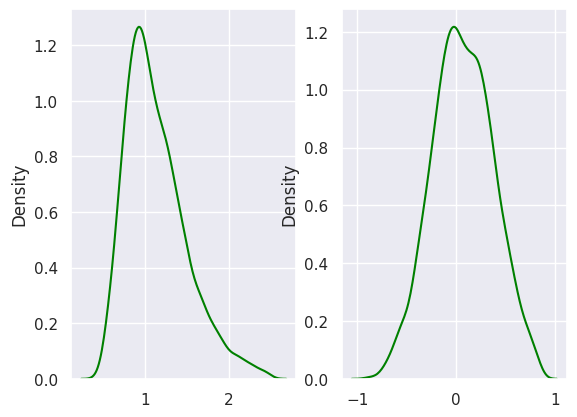

In [25]:
fig, ax = pl.subplots(1, 2)
sns.distplot(eeg[eeg['Response'] != 'No Response']['ReactionTime'].values, hist = False, kde = True,
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            label = "Normal", color ="green", ax = ax[1]);

In [26]:
eeg[eeg['Response'] != 'No Response']['stdRT'] = fitted_data

In [27]:
#iEEG
test = shapiro(ieeg[ieeg['Resp'] != 'No Response']['ReactionTime'].values)
if test[1] > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

print(normaltest(ieeg[ieeg['Resp'] != 'No Response']['ReactionTime'].values))

Probably not Gaussian
NormaltestResult(statistic=580.7397777213582, pvalue=7.83356690396338e-127)


In [28]:
fitted_data, fitted_lambda = boxcox(ieeg[ieeg['Resp'] != 'No Response']['ReactionTime'].values)

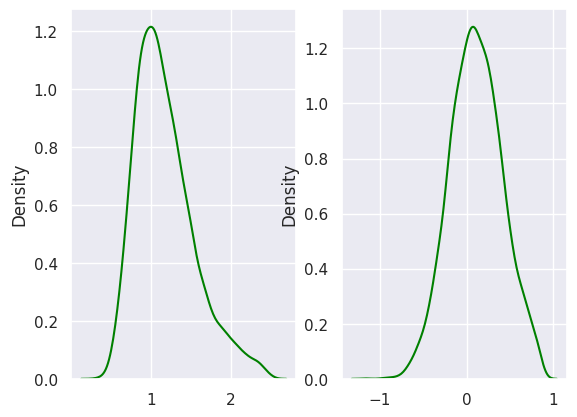

In [29]:
fig, ax = pl.subplots(1, 2)
sns.distplot(ieeg[ieeg['Resp'] != 'No Response']['ReactionTime'].values, hist = False, kde = True,
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            label = "Normal", color ="green", ax = ax[1]);

In [30]:
ieeg[ieeg['Resp'] != 'No Response']['stdRT'] = fitted_data

In [31]:
# Ensuring the same columns
eeg_ = eeg[['Trial', 'Subject', 'Block', 'ProbeType',
            'StimulusCategory', 'ReactionTime', 'Response', 
            'ResponseCorrect', 'Omission', 'ProbeCategory', 
            'Position', 'Length', 'stdRT', 'Lex', 'Phono', 'Lex_name', 'Probe_name',
       'Phono_name']]

ieeg_ = ieeg[['Trial', 'Subject', 'block', 'ProbeType',
              'StimlusCategory', 'ReactionTime', 'Resp',
              'RespCorrect', 'Omission', 'ProbeCategory',
              'Position', 'Length', 'Lex',
       'Phono', 'Lex_name', 'Probe_name', 'Phono_name']]

In [32]:
eeg_['Patient'] = 0
ieeg_['Patient'] = 1

In [33]:
ieeg_ = ieeg_.rename(columns={"block": "Block", "Resp": "Response", 
                     "StimlusCategory": "StimulusCategory", 
                     'RespCorrect': 'ResponseCorrect'})

In [34]:
neigh = pd.concat([eeg_, ieeg_])

In [35]:
neigh.head()

Trial Subject  Block  ProbeType StimulusCategory  ReactionTime  \
0      0      E2      1          1       High Words           NaN   
1      1      E2      1          2    Low Non-words      1.282162   
2      2      E2      1          2        Low Words      0.987854   
3      3      E2      1          2       High Words      1.588743   
4      4      E2      1          1    Low Non-words      1.184043   

      Response  ResponseCorrect     Omission   ProbeCategory  Position  \
0  No Response                0  No Response       low words         0   
1          Yes                1    Responded   low non-words         3   
2          Yes                1    Responded       low words         3   
3          Yes                1    Responded      high words         1   
4           No                1    Responded  high non-words         0   

   Length     stdRT  Lex  Phono Lex_name Probe_name Phono_name  Patient  
0       5       NaN    1      1     word   mismatch        low        0  
1       5  0.401952    0      1  nonword      match        low        0  
2       9 -0.401598    1      1     word      match        low        0  
3       5  1.239013    1      0     word      match       high        0  
4       7  0.134058    0      0  nonword   mismatch       high        0

## Accuracy analysis

GLM model

In [36]:
# https://stackoverflow.com/questions/27328623/anova-test-for-glm-in-python
def calculate_nested_f_statistic(small_model, big_model):
    """Given two fitted GLMs, the larger of which contains the parameter space of the smaller, return the F Stat and P value corresponding to the larger model adding explanatory power"""
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value)

trying out differen IVs to see what model will be the best. Comparing the models based on F-statistics results

In [37]:
formula1 = 'ResponseCorrect ~ ProbeType + Lex + Length + Patient + ProbeType*Lex + ProbeType*Length + Lex*Patient'
formula2 = 'ResponseCorrect ~ ProbeType + Lex + Length + Patient + ProbeType*Lex + ProbeType*Length + Lex*Patient + Lex*Length*Patient'

In [38]:
link_function = sm.families.links.logit()
model_family = sm.families.Binomial(link = link_function)

In [39]:
neigh_fit1 = glm(formula = formula1, 
                 data = neigh, 
                 family = model_family).fit()

In [40]:
neigh_fit2 = glm(formula = formula2, 
                 data = neigh, 
                 family = model_family).fit()

In [41]:
calculate_nested_f_statistic(neigh_fit1, neigh_fit2)

(3.1034248507858138, 0.02547801529978709)

In [42]:
print(neigh_fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        ResponseCorrect   No. Observations:                11146
Model:                            GLM   Df Residuals:                    11138
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4660.3
Date:                Wed, 17 May 2023   Deviance:                       9320.6
Time:                        12:47:59   Pearson chi2:                 1.10e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04351
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4755      0.276  

Plotting the significant differences 

Ttest_indResult(statistic=8.876658896143038, pvalue=9.407077999146047e-19)
Ttest_indResult(statistic=6.783213343003823, pvalue=1.300309482017262e-11)
Ttest_indResult(statistic=2.7823739087395745, pvalue=0.005414444519134706)


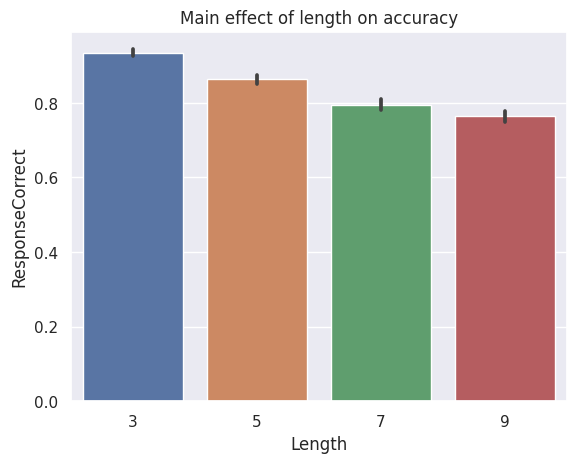

In [43]:
sns.barplot(x='Length',y='ResponseCorrect',data=neigh)
pl.title('Main effect of length on accuracy');

x, y = neigh[neigh['Length'] == 3]['ResponseCorrect'], neigh[neigh['Length'] == 5]['ResponseCorrect']
print(ttest(x,y))
x, y = neigh[neigh['Length'] == 5]['ResponseCorrect'], neigh[neigh['Length'] == 7]['ResponseCorrect']
print(ttest(x,y))
x, y = neigh[neigh['Length'] == 7]['ResponseCorrect'], neigh[neigh['Length'] == 9]['ResponseCorrect']
print(ttest(x,y))

Mismatch vs match
Ttest_indResult(statistic=7.926377888441825, pvalue=2.472669473252421e-15)


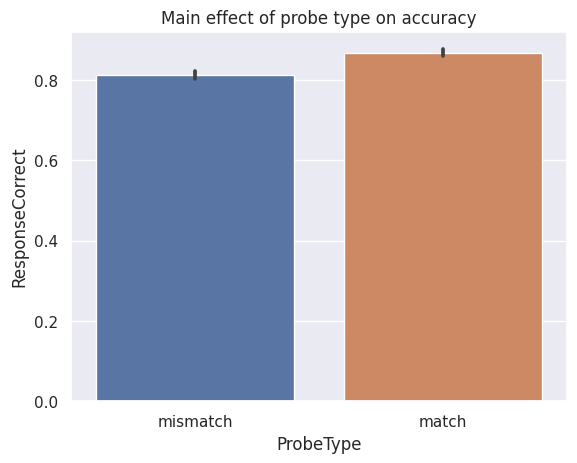

In [44]:
fig = sns.barplot(x='ProbeType',y='ResponseCorrect',data=neigh)
fig.set_xticklabels(['mismatch', 'match'])
pl.title('Main effect of probe type on accuracy');

print('Mismatch vs match')
x, y = neigh[neigh['ProbeType'] == 2]['ResponseCorrect'], neigh[neigh['ProbeType'] == 1]['ResponseCorrect']
print(ttest(x,y))

Ttest_indResult(statistic=-3.8902228307026614, pvalue=0.00010073730194966378)


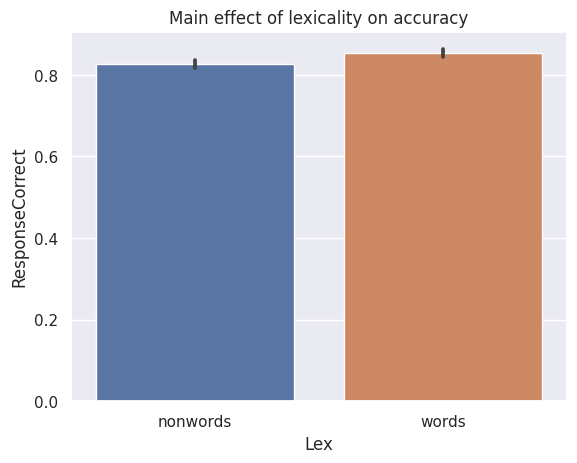

In [45]:
fig = sns.barplot(x='Lex',y='ResponseCorrect',data=neigh)
fig.set_xticklabels(['nonwords', 'words'])
pl.title('Main effect of lexicality on accuracy');

x, y = neigh[neigh['Lex'] == 0]['ResponseCorrect'], neigh[neigh['Lex'] == 1]['ResponseCorrect']
print(ttest(x,y))

Ttest_indResult(statistic=4.919347559532419, pvalue=8.808275023048578e-07)


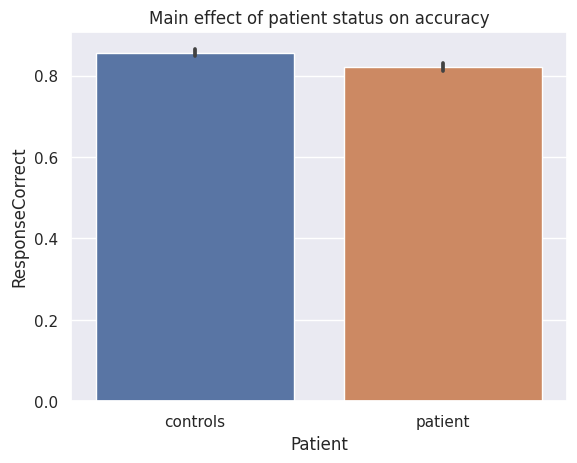

In [46]:
fig = sns.barplot(x='Patient',y='ResponseCorrect',data=neigh)
fig.set_xticklabels(['controls', 'patient'])
pl.title('Main effect of patient status on accuracy');

x, y = neigh[neigh['Patient'] == 0]['ResponseCorrect'], neigh[neigh['Patient'] == 1]['ResponseCorrect']
print(ttest(x,y))

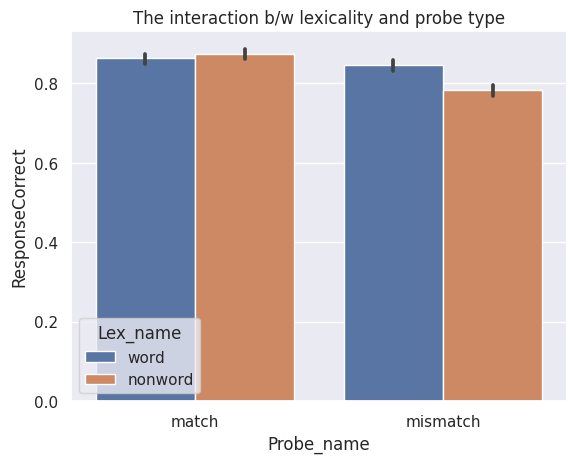

In [47]:
# interaction
sns.barplot(x='Probe_name', y='ResponseCorrect', hue='Lex_name', 
            hue_order=['word', 'nonword'], order=['match', 'mismatch'], data=neigh)
pl.title('The interaction b/w lexicality and probe type');

In [ ]:
print('Match W vs NW')
subset = neigh[neigh['ProbeType'] == 2]
x, y = subset[subset['Lex'] == 0]['ResponseCorrect'], subset[subset['Lex'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Mismatch W vs NW')
subset = neigh[neigh['ProbeType'] == 1]
x, y = subset[subset['Lex'] == 0]['ResponseCorrect'], subset[subset['Lex'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Words M vs MM')
subset = neigh[neigh['Lex'] == 1]
x, y = subset[subset['ProbeType'] == 2]['ResponseCorrect'], subset[subset['ProbeType'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Nonwords M vs MM')
subset = neigh[neigh['Lex'] == 0]
x, y = subset[subset['ProbeType'] == 2]['ResponseCorrect'], subset[subset['ProbeType'] == 1]['ResponseCorrect']
print(ttest(x,y))

Match W vs NW
Ttest_indResult(statistic=0.8541897632884937, pvalue=0.39303877242747354)
Mismatch W vs NW
Ttest_indResult(statistic=-5.946414617085627, pvalue=2.910213015075104e-09)
Words M vs MM
Ttest_indResult(statistic=1.8561739369122832, pvalue=0.06348307378570517)
Nonwords M vs MM
Ttest_indResult(statistic=8.600964239937815, pvalue=1.0278110000700464e-17)


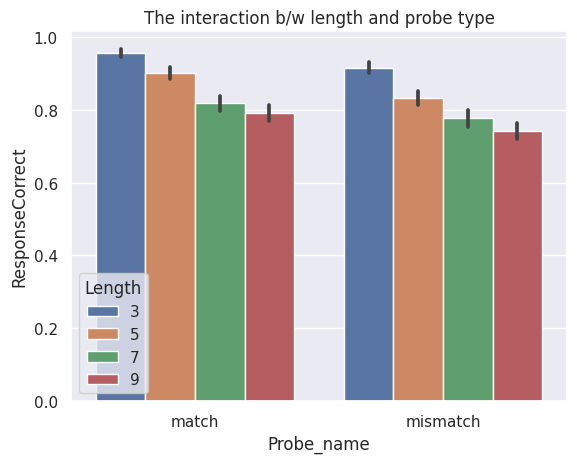

In [ ]:
# interaction
sns.barplot(x='Probe_name', y='ResponseCorrect', hue='Length', 
            order=['match', 'mismatch'], data=neigh)
pl.title('The interaction b/w length and probe type');

In [ ]:
print('Match')
subset = neigh[neigh['ProbeType'] == 2]
x, y = subset[subset['Length'] == 3]['ResponseCorrect'], subset[subset['Length'] == 5]['ResponseCorrect']
print(ttest(x,y))
x, y = subset[subset['Length'] == 5]['ResponseCorrect'], subset[subset['Length'] == 7]['ResponseCorrect']
print(ttest(x,y))
x, y = subset[subset['Length'] == 7]['ResponseCorrect'], subset[subset['Length'] == 9]['ResponseCorrect']
print(ttest(x,y))
print('Mismatch')
subset = neigh[neigh['ProbeType'] == 1]
x, y = subset[subset['Length'] == 3]['ResponseCorrect'], subset[subset['Length'] == 5]['ResponseCorrect']
print(ttest(x,y))
x, y = subset[subset['Length'] == 5]['ResponseCorrect'], subset[subset['Length'] == 7]['ResponseCorrect']
print(ttest(x,y))
x, y = subset[subset['Length'] == 7]['ResponseCorrect'], subset[subset['Length'] == 9]['ResponseCorrect']
print(ttest(x,y))
print('Length 3')
subset = neigh[neigh['Length'] == 3]
x, y = subset[subset['ProbeType'] == 2]['ResponseCorrect'], subset[subset['ProbeType'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Length 5')
subset = neigh[neigh['Length'] == 5]
x, y = subset[subset['ProbeType'] == 2]['ResponseCorrect'], subset[subset['ProbeType'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Length 7')
subset = neigh[neigh['Length'] == 7]
x, y = subset[subset['ProbeType'] == 2]['ResponseCorrect'], subset[subset['ProbeType'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Length 9')
subset = neigh[neigh['Length'] == 9]
x, y = subset[subset['ProbeType'] == 2]['ResponseCorrect'], subset[subset['ProbeType'] == 1]['ResponseCorrect']
print(ttest(x,y))

Match
Ttest_indResult(statistic=5.555990467799833, pvalue=3.075313781091846e-08)
Ttest_indResult(statistic=6.192430681611262, pvalue=6.896474711454223e-10)
Ttest_indResult(statistic=1.719673208653008, pvalue=0.08561213532194703)
Mismatch
Ttest_indResult(statistic=6.770972994400975, pvalue=1.581701804702087e-11)
Ttest_indResult(statistic=3.603007004510143, pvalue=0.00032021394732979373)
Ttest_indResult(statistic=2.1941947087805866, pvalue=0.02830312830065051)
Length 3
Ttest_indResult(statistic=4.333603445230846, pvalue=1.524476506405256e-05)
Length 5
Ttest_indResult(statistic=5.409856812655973, pvalue=6.87778291751816e-08)
Length 7
Ttest_indResult(statistic=2.7283746806982982, pvalue=0.006406021166022439)
Length 9
Ttest_indResult(statistic=3.128070237481309, pvalue=0.0017783598399581828)


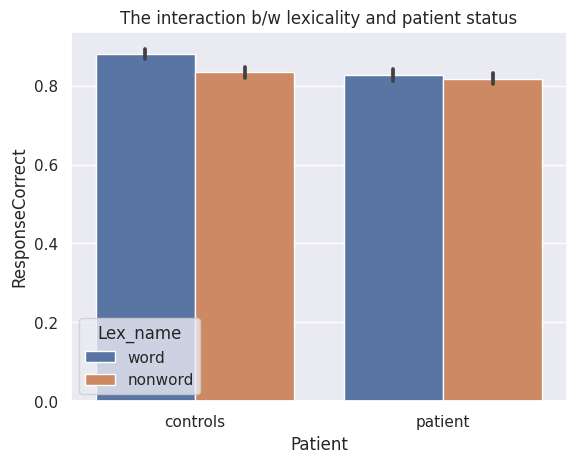

In [48]:
# interaction
ax = sns.barplot(x='Patient', y='ResponseCorrect', hue='Lex_name', 
            hue_order=['word', 'nonword'], data=neigh)
ax.set_xticklabels(['controls', 'patient'])
pl.title('The interaction b/w lexicality and patient status');

In [ ]:
print('Controls W vs NW')
subset = neigh[neigh['Patient'] == 0]
x, y = subset[subset['Lex'] == 0]['ResponseCorrect'], subset[subset['Lex'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Patients W vs NW')
subset = neigh[neigh['Patient'] == 1]
x, y = subset[subset['Lex'] == 0]['ResponseCorrect'], subset[subset['Lex'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Words Controls vs Patient')
subset = neigh[neigh['Lex'] == 1]
x, y = subset[subset['Patient'] == 0]['ResponseCorrect'], subset[subset['Patient'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Nonwords Controls vs Patients')
subset = neigh[neigh['Lex'] == 0]
x, y = subset[subset['Patient'] == 0]['ResponseCorrect'], subset[subset['Patient'] == 1]['ResponseCorrect']
print(ttest(x,y))

Controls W vs NW
Ttest_indResult(statistic=-4.751290477634946, pvalue=2.0720177068702775e-06)
Patients W vs NW
Ttest_indResult(statistic=-1.0041070293079837, pvalue=0.31537328038447426)
Words Controls vs Patient
Ttest_indResult(statistic=5.133819129072984, pvalue=2.9423960072050226e-07)
Nonwords Controls vs Patients
Ttest_indResult(statistic=1.4784648502935291, pvalue=0.13934212770741605)


LMER Linear Mixed Effects Models

Something is wrong with Subject column. so we remap the values to just numbers to feed it in the model.

In [113]:
id_mapping = {id: i for i, id in enumerate(neigh['Subject'].unique())}

# Replace the string IDs with integers in the 'Subject' column
neigh['Subject_new'] = neigh['Subject'].map(id_mapping)

In [196]:
formula1 = 'ResponseCorrect ~ ProbeType + Length + Lex + ProbeType:Lex + (1 | Subject_new)'
formula2 = 'ResponseCorrect ~ ProbeType + Length + Lex + ProbeType:Lex + Patient + Patient:ProbeType + (1 | Subject_new)'

In [197]:
neigh_fit1 = smf.mixedlm(formula1, data=neigh, groups=neigh['Subject_new'])
result1 = neigh_fit1.fit()

In [198]:
neigh_fit2 = smf.mixedlm(formula2, data=neigh, groups=neigh['Subject_new'])
result2 = neigh_fit2.fit()

In [199]:
log_likelihood1 = result1.llf  
log_likelihood2 = result2.llf 

In [200]:
# Here, log-likelihood1 represents the log-likelihood of the first model, and log-likelihood2 represents the log-likelihood of the second model. 
# The likelihood ratio test statistic follows a chi-square distribution with degrees of freedom equal to the difference in the number of parameters between the two models.
LRT = -2 * (log_likelihood1 - log_likelihood2)
print(LRT)

-11.882121896225726


In [201]:
print(result1.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ResponseCorrect
No. Observations: 11146   Method:             REML           
No. Groups:       64      Scale:              0.1271         
Min. group size:  152     Log-Likelihood:     -4384.7478     
Max. group size:  192     Converged:          Yes            
Mean group size:  174.2                                      
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          0.895    0.021  41.847 0.000  0.853  0.936
ProbeType          0.093    0.010   9.686 0.000  0.074  0.111
Length            -0.029    0.002 -19.045 0.000 -0.032 -0.026
Lex                0.150    0.021   7.067 0.000  0.109  0.192
ProbeType:Lex     -0.083    0.014  -6.110 0.000 -0.110 -0.056
1 | Subject_new   -0.001    0.000  -3.146 0.002 -0.002 -0.000
Group Var          0

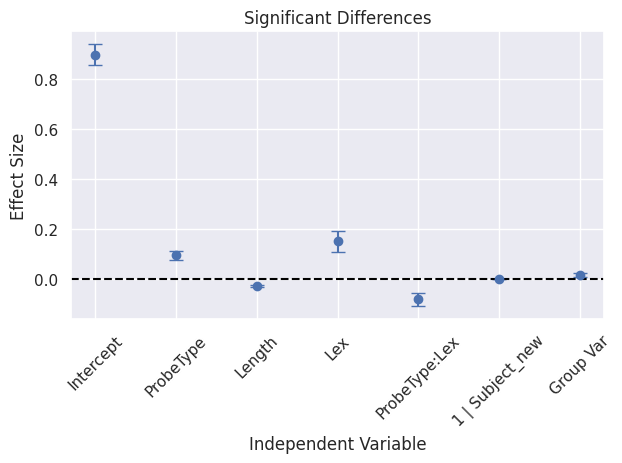

In [203]:
fixed_effects = result1.params
standard_errors = result1.bse

# Calculate confidence intervals (e.g., 95% confidence intervals)
z_value = 1.96  # For a 95% confidence interval
lower_bound = fixed_effects - z_value * standard_errors
upper_bound = fixed_effects + z_value * standard_errors

# Plotting the significant differences
pl.errorbar(range(len(fixed_effects)), fixed_effects, yerr=z_value * standard_errors, fmt='o', capsize=5)
pl.xticks(range(len(fixed_effects)), fixed_effects.index, rotation = 45)  # Set x-axis labels
pl.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
pl.xlabel('Independent Variable')
pl.ylabel('Effect Size')
pl.title('Significant Differences')
pl.tight_layout()
pl.show()

##RT analysis

In [204]:
rt = neigh[neigh['Response'] != 'No Response']

In [245]:
formula1 = 'ReactionTime ~ ProbeType + Lex + Length + (1 | Subject_new)'
formula2 = 'ReactionTime ~ ProbeType + Lex + Length + Length:Lex + (1 | Subject_new)'

In [246]:
neigh_fit1 = smf.mixedlm(formula1, data=rt, groups=rt['Subject_new'])
result1 = neigh_fit1.fit()

In [247]:
neigh_fit2 = smf.mixedlm(formula2, data=rt, groups=rt['Subject_new'])
result2 = neigh_fit2.fit()

In [248]:
log_likelihood1 = result1.llf  
log_likelihood2 = result2.llf 

In [249]:
LRT = -2 * (log_likelihood1 - log_likelihood2)
print(LRT)

-10.116686884241062


In [252]:
print(result1.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: ReactionTime
No. Observations:  10923   Method:             REML        
No. Groups:        64      Scale:              0.0856      
Min. group size:   147     Log-Likelihood:     -2239.1686  
Max. group size:   192     Converged:          Yes         
Mean group size:   170.7                                   
-----------------------------------------------------------
                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        1.120    0.057  19.782 0.000  1.009  1.231
ProbeType       -0.066    0.006 -11.668 0.000 -0.077 -0.055
Lex             -0.039    0.006  -6.967 0.000 -0.050 -0.028
Length           0.019    0.001  14.974 0.000  0.016  0.021
1 | Subject_new  0.001    0.001   0.917 0.359 -0.002  0.004
Group Var        0.049    0.030                            



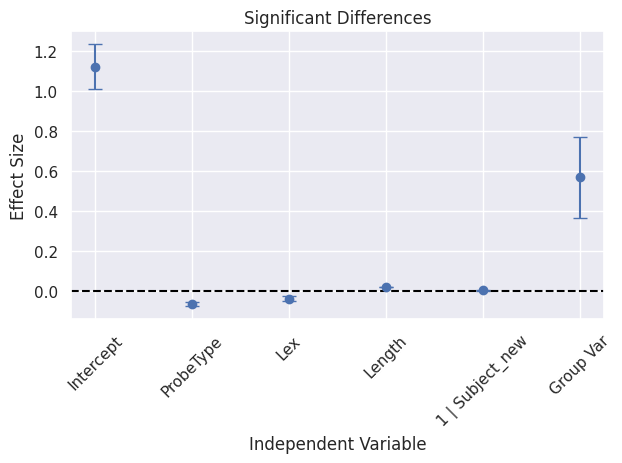

In [253]:
fixed_effects = result1.params
standard_errors = result1.bse

# Calculate confidence intervals (e.g., 95% confidence intervals)
z_value = 1.96  # For a 95% confidence interval
lower_bound = fixed_effects - z_value * standard_errors
upper_bound = fixed_effects + z_value * standard_errors

# Plotting the significant differences
pl.errorbar(range(len(fixed_effects)), fixed_effects, yerr=z_value * standard_errors, fmt='o', capsize=5)
pl.xticks(range(len(fixed_effects)), fixed_effects.index, rotation = 45)  # Set x-axis labels
pl.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
pl.xlabel('Independent Variable')
pl.ylabel('Effect Size')
pl.title('Significant Differences')
pl.tight_layout()
pl.show()

Ttest_indResult(statistic=-9.632035872150604, pvalue=7.2002153764768345e-22)


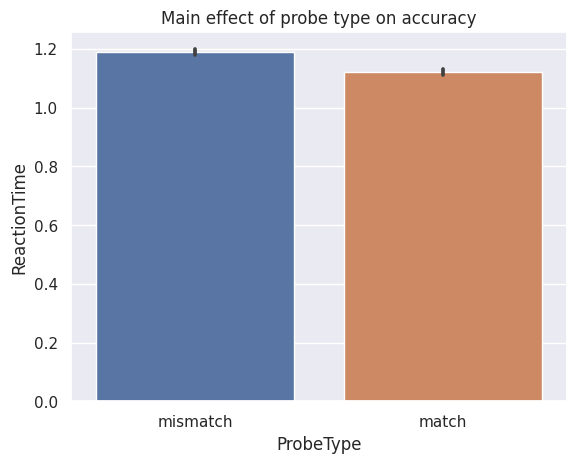

In [ ]:
fig = sns.barplot(x='ProbeType',y='ReactionTime',data=rt)
fig.set_xticklabels(['mismatch', 'match'])
pl.title('Main effect of probe type on accuracy');

x, y = rt[rt['ProbeType'] == 2]['ReactionTime'], rt[rt['ProbeType'] == 1]['ReactionTime']
print(ttest(x,y))

Ttest_indResult(statistic=5.534711930459075, pvalue=3.191493893865721e-08)


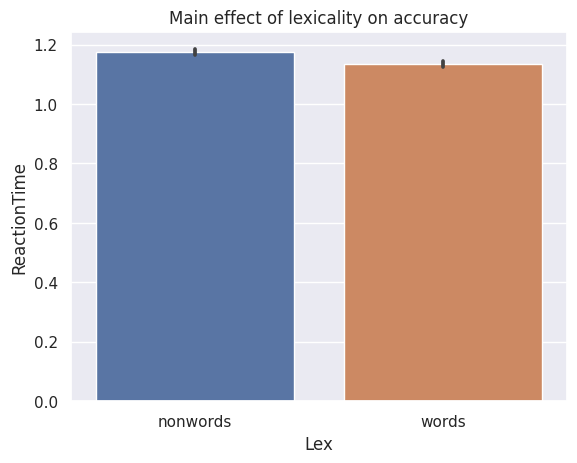

In [ ]:
fig = sns.barplot(x='Lex',y='ReactionTime',data=rt)
fig.set_xticklabels(['nonwords', 'words'])
pl.title('Main effect of lexicality on accuracy');

x, y = rt[rt['Lex'] == 0]['ReactionTime'], rt[rt['Lex'] == 1]['ReactionTime']
print(ttest(x,y))

Ttest_indResult(statistic=-7.3411714524434695, pvalue=2.439042004551985e-13)
Ttest_indResult(statistic=-3.0714205897787896, pvalue=0.0021412220284343017)
Ttest_indResult(statistic=-1.30931209087663, pvalue=0.19048527683303998)


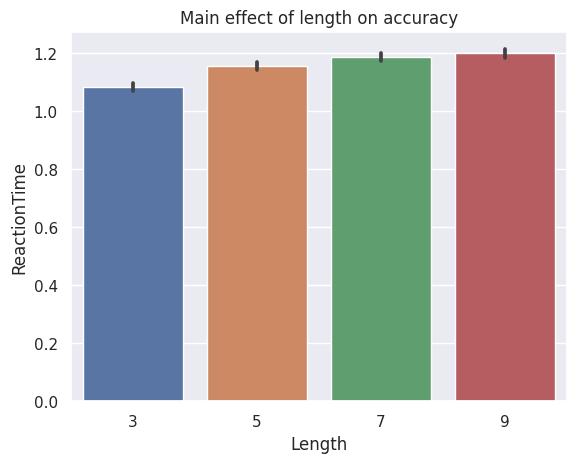

In [ ]:
fig = sns.barplot(x='Length',y='ReactionTime',data=rt)
pl.title('Main effect of length on accuracy');

x, y = rt[rt['Length'] == 3]['ReactionTime'], rt[rt['Length'] == 5]['ReactionTime']
print(ttest(x,y))
x, y = rt[rt['Length'] == 5]['ReactionTime'], rt[rt['Length'] == 7]['ReactionTime']
print(ttest(x,y))
x, y = rt[rt['Length'] == 7]['ReactionTime'], rt[rt['Length'] == 9]['ReactionTime']
print(ttest(x,y))

Ttest_indResult(statistic=-2.5750169543644215, pvalue=0.010036954146421577)


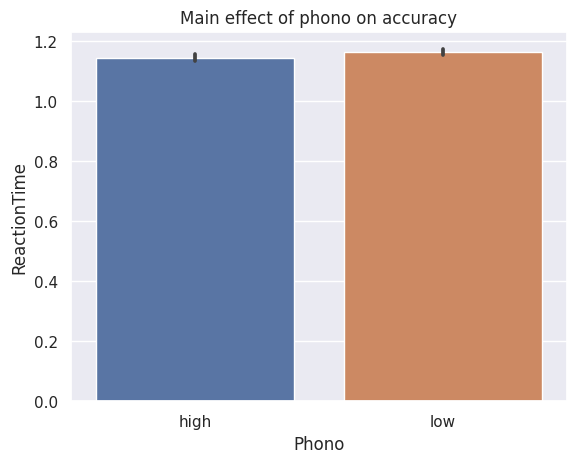

In [ ]:
fig = sns.barplot(x='Phono',y='ReactionTime',data=rt)
fig.set_xticklabels(['high', 'low'])
pl.title('Main effect of phono on accuracy');

x, y = rt[rt['Phono'] == 0]['ReactionTime'], rt[rt['Phono'] == 1]['ReactionTime']
print(ttest(x,y))

Ttest_indResult(statistic=-5.822055314423373, pvalue=5.98175752295086e-09)


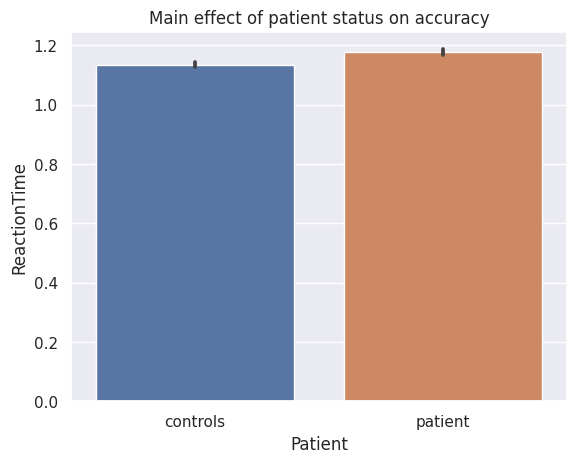

In [ ]:
fig = sns.barplot(x='Patient',y='ReactionTime',data=rt)
fig.set_xticklabels(['controls', 'patient'])
pl.title('Main effect of patient status on accuracy');

x, y = rt[rt['Patient'] == 0]['ReactionTime'], rt[rt['Patient'] == 1]['ReactionTime']
print(ttest(x,y))

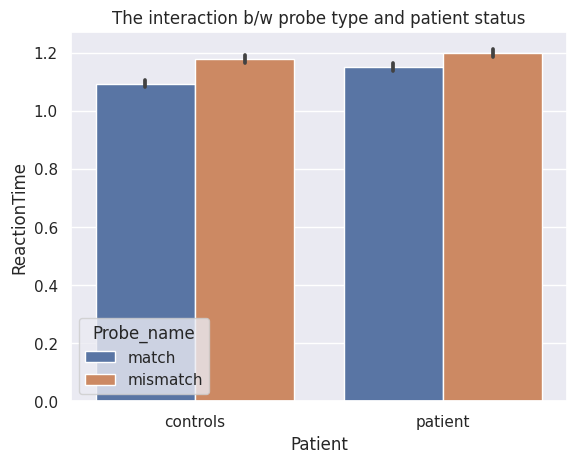

In [ ]:
# interaction
ax = sns.barplot(x='Patient', y='ReactionTime', hue='Probe_name', 
            hue_order=['match', 'mismatch'], data=rt)
ax.set_xticklabels(['controls', 'patient'])
pl.title('The interaction b/w probe type and patient status');

In [ ]:
print('Controls M vs MM')
subset = rt[rt['Patient'] == 0]
x, y = subset[subset['ProbeType'] == 2]['ReactionTime'], subset[subset['ProbeType'] == 1]['ReactionTime']
print(ttest(x,y))
print('Patients M vs MM')
subset = rt[rt['Patient'] == 1]
x, y = subset[subset['ProbeType'] == 2]['ReactionTime'], subset[subset['ProbeType'] == 1]['ReactionTime']
print(ttest(x,y))
print('Match Controls vs Patient')
subset = rt[rt['ProbeType'] == 2]
x, y = subset[subset['Patient'] == 0]['ReactionTime'], subset[subset['Patient'] == 1]['ReactionTime']
print(ttest(x,y))
print('Mismatch Controls vs Patients')
subset = rt[rt['ProbeType'] == 1]
x, y = subset[subset['Patient'] == 0]['ReactionTime'], subset[subset['Patient'] == 1]['ReactionTime']
print(ttest(x,y))

Controls M vs MM
Ttest_indResult(statistic=-8.688231936073732, pvalue=4.8370207155324684e-18)
Patients M vs MM
Ttest_indResult(statistic=-4.591678580475263, pvalue=4.5020314266479765e-06)
Match Controls vs Patient
Ttest_indResult(statistic=-6.2268234818282995, pvalue=5.146658089666142e-10)
Mismatch Controls vs Patients
Ttest_indResult(statistic=-1.9116040659477755, pvalue=0.05597973432860816)


LMER Linear Mixed Effects Models

In [ ]:
model1 = smf.mixedlm("ReactionTime ~ ProbeType + Lex", data = rt, groups=rt["Subject"])
mdf = model1.fit(method=["lbfgs"])
print(mdf.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   ReactionTime
No. Observations:   10615     Method:               REML        
No. Groups:         62        Scale:                0.0867      
Min. group size:    147       Log-Likelihood:       inf         
Max. group size:    192       Converged:            Yes         
Mean group size:    171.2                                       
----------------------------------------------------------------
          Coef.   Std.Err.     z    P>|z|    [0.025     0.975]  
----------------------------------------------------------------
Intercept  0.000 192796.662   0.000 1.000 -377874.514 377874.514
ProbeType -0.067      0.006 -11.693 0.000      -0.078     -0.056
Lex       -0.039      0.006  -6.880 0.000      -0.051     -0.028
Group Var  0.000                                                



In [ ]:
model2 = smf.mixedlm("ReactionTime ~ ProbeType + Lex", data = rt, groups=rt["Subject"])
mdf = model.fit(method=["lbfgs"])
print(mdf.summary())

Generalized Linear Mixed Effects Models

In [ ]:
random = {'a': '0 + C(Subject)'}
model = statsmodels.genmod.bayes_mixed_glm.BinomialBayesMixedGLM.from_formula(
    'ResponseCorrect ~ ProbeType + Lex', random, data = neigh
)
result = model.fit_vb()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Binomial Mixed GLM Results
========================================================
          Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
--------------------------------------------------------
Intercept    M     0.9987   0.0268                      
ProbeType    M     0.4218   0.0179                      
Lex          M     0.2233   0.0394                      
a            V    -0.9634   0.0909 0.382   0.318   0.458
========================================================
Parameter types are mean structure (M) and variance
structure (V)
Variance parameters are modeled as log standard
deviations
"""

In [ ]:
mod = Lmer(
    'ResponseCorrect ~ Lex + ProbeType + Length + Patient + Lex:ProbeType + Lex:Patient + (1|Subject)',
    data = neigh
)
mod.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: ResponseCorrect~Lex+ProbeType+Length+Patient+Lex:ProbeType+Lex:Patient+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 10666	 Groups: {'Subject': 61.0}

Log-likelihood: -4125.160 	 AIC: 8268.319

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.002  0.046
Residual               0.125  0.354

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE         DF  T-stat  P-val  Sig
(Intercept)       0.878   0.838    0.917  0.020    974.707  43.572  0.000  ***
Lex               0.156   0.111    0.200  0.023  10620.520   6.836  0.000  ***
ProbeType         0.089   0.070    0.108  0.010  10607.778   9.128  0.000  ***
Length           -0.029  -0.032   -0.026  0.002  10599.937 -18.806  0.000  ***
Patient          -0.018  -0.048    0.012  0.015     92.517  -1.169  0.246     
Lex:ProbeType    -0.077  -0.104   -0.050  0.014  10623.703  -5.555  0.000  ***
Lex:Patient      -0.028  -0.055   -0.001  0.014  10600.074  -2.044  0.041    *

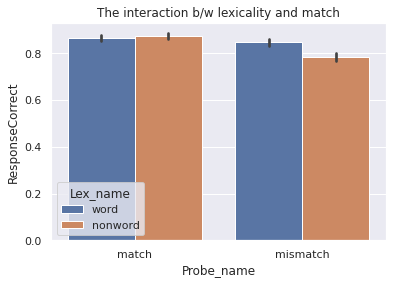

In [ ]:
sns.barplot(x='Probe_name', y='ResponseCorrect', hue='Lex_name', 
            hue_order=['word', 'nonword'], order=['match', 'mismatch'], data=neigh)
pl.title('The interaction b/w lexicality and match');

In [ ]:
print('Match W vs NW')
subset = neigh[neigh['ProbeType'] == 2]
x, y = subset[subset['Lex'] == 0]['ResponseCorrect'], subset[subset['Lex'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Mismatch W vs NW')
subset = neigh[neigh['ProbeType'] == 1]
x, y = subset[subset['Lex'] == 0]['ResponseCorrect'], subset[subset['Lex'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Words M vs MM')
subset = neigh[neigh['Lex'] == 1]
x, y = subset[subset['ProbeType'] == 2]['ResponseCorrect'], subset[subset['ProbeType'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Nonwords M vs MM')
subset = neigh[neigh['Lex'] == 0]
x, y = subset[subset['ProbeType'] == 2]['ResponseCorrect'], subset[subset['ProbeType'] == 1]['ResponseCorrect']
print(ttest(x,y))

Match W vs NW
Ttest_indResult(statistic=0.7208048230371182, pvalue=0.47106208088647095)
Mismatch W vs NW
Ttest_indResult(statistic=-5.885339372245015, pvalue=4.211691436688765e-09)
Words M vs MM
Ttest_indResult(statistic=2.125486017560204, pvalue=0.03359192897364824)
Nonwords M vs MM
Ttest_indResult(statistic=8.677934370906776, pvalue=5.311938088612421e-18)


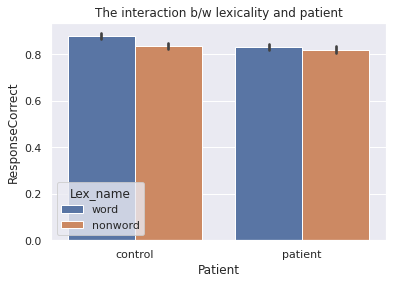

In [ ]:
ax=sns.barplot(x='Patient', y='ResponseCorrect', hue='Lex_name', 
            hue_order=['word', 'nonword'], data=neigh)
ax.set_xticklabels(['control', 'patient'])
pl.title('The interaction b/w lexicality and patient');

In [ ]:
print('Control W vs NW')
subset = neigh[neigh['Patient'] == 0]
x, y = subset[subset['Lex'] == 0]['ResponseCorrect'], subset[subset['Lex'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Patient W vs NW')
subset = neigh[neigh['Patient'] == 1]
x, y = subset[subset['Lex'] == 0]['ResponseCorrect'], subset[subset['Lex'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Words Controls vs Patients')
subset = neigh[neigh['Lex'] == 1]
x, y = subset[subset['Patient'] == 0]['ResponseCorrect'], subset[subset['Patient'] == 1]['ResponseCorrect']
print(ttest(x,y))
print('Nonwords Controls vs Patients')
subset = neigh[neigh['Lex'] == 0]
x, y = subset[subset['Patient'] == 0]['ResponseCorrect'], subset[subset['Patient'] == 1]['ResponseCorrect']
print(ttest(x,y))

Control W vs NW
Ttest_indResult(statistic=-4.751290477634946, pvalue=2.0720177068702775e-06)
Patient W vs NW
Ttest_indResult(statistic=-1.0604785099943508, pvalue=0.28897725641191735)
Words Controls vs Patients
Ttest_indResult(statistic=4.883834029332466, pvalue=1.0723347098142525e-06)
Nonwords Controls vs Patients
Ttest_indResult(statistic=1.3347706355546416, pvalue=0.1820092801617244)


In [ ]:
neigh_short = neigh[neigh['Response'] != 'No Response']

In [ ]:
test = shapiro(neigh_short['ReactionTime'].values)
if test[1] > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

Probably not Gaussian


In [ ]:
fitted_data, fitted_lambda = boxcox(neigh_short['ReactionTime'].values)

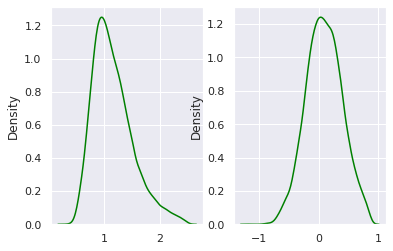

In [ ]:
fig, ax = pl.subplots(1, 2)
sns.distplot(neigh_short['ReactionTime'].values, hist = False, kde = True,
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            label = "Normal", color ="green", ax = ax[1]);

In [ ]:
neigh_short['stdRT'] = fitted_data

In [ ]:
%%R -i neigh_short
m <- lmer('stdRT ~ Lex + ProbeType + Phono + Length + (1|Subject)', data=neigh_short)
m1 <- lmer('stdRT ~ Lex + ProbeType + Phono + Length + Length:Phono + (1|Subject)', data=neigh_short)
anova(m, m1)

Data: neigh_short
Models:
m: "stdRT ~ Lex + ProbeType + Phono + Length + (1|Subject)"
m1: "stdRT ~ Lex + ProbeType + Phono + Length + Length:Phono + (1|Subject)"
   npar     AIC     BIC logLik deviance  Chisq Df Pr(>Chisq)
m     7 -419.33 -368.55 216.67  -433.33                     
m1    8 -417.77 -359.72 216.88  -433.77 0.4321  1     0.5109


In [ ]:
mod = Lmer(
    'stdRT ~ Lex + ProbeType + Phono + Length + (1|Subject)',
    data = neigh_short
)
mod.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: stdRT~Lex+ProbeType+Phono+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 10459	 Groups: {'Subject': 61.0}

Log-likelihood: 194.499 	 AIC: -374.999

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.036  0.189
Residual               0.055  0.234

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE         DF  T-stat  P-val  Sig
(Intercept)     0.082   0.031    0.133  0.026     80.982   3.124  0.002   **
Lex            -0.035  -0.044   -0.026  0.005  10394.018  -7.561  0.000  ***
ProbeType      -0.051  -0.060   -0.042  0.005  10394.968 -11.122  0.000  ***
Phono           0.011   0.002    0.020  0.005  10395.171   2.305  0.021    *
Length          0.017   0.015    0.019  0.001  10394.028  16.420  0.000  ***

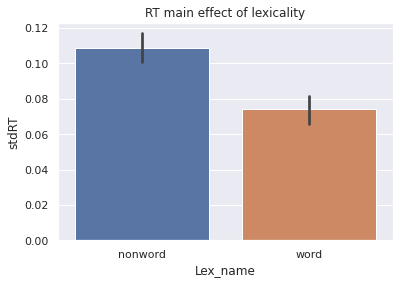

In [ ]:
sns.barplot(x = 'Lex_name', y = 'stdRT', data=neigh_short)
pl.title('RT main effect of lexicality');

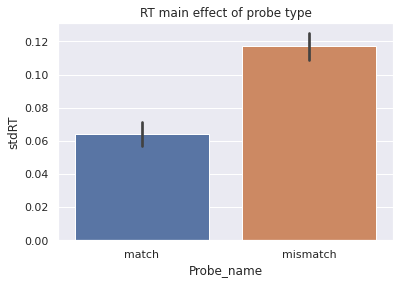

In [ ]:
sns.barplot(x = 'Probe_name', y = 'stdRT', data=neigh_short)
pl.title('RT main effect of probe type');

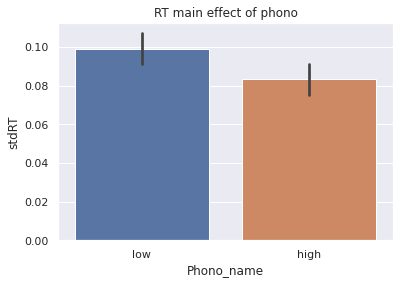

In [ ]:
sns.barplot(x = 'Phono_name', y = 'stdRT', data=neigh_short)
pl.title('RT main effect of phono');

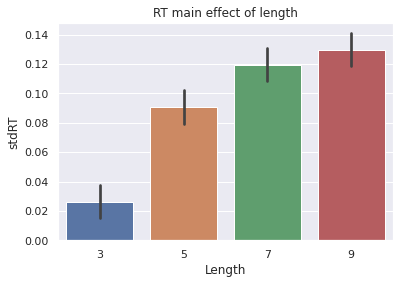

In [ ]:
sns.barplot(x = 'Length', y = 'stdRT', data=neigh_short)
pl.title('RT main effect of length');

In [ ]:
x, y = neigh_short[neigh_short['Length'] == 7]['stdRT'].values, neigh_short[neigh_short['Length'] == 5]['stdRT'].values
ttest(x, y)

Ttest_indResult(statistic=3.4272141169891777, pvalue=0.0006145170587338839)

In [ ]:
%%R -i neigh_short
m <- lmer('ReactionTime ~ Lex + ProbeType + Length + (1|Subject)', data=neigh_short)
m1 <- lmer('ReactionTime ~ Lex + ProbeType + Length + ProbeType:Length + (1|Subject)', data=neigh_short)
anova(m, m1)

Data: neigh_short
Models:
m: "ReactionTime ~ Lex + ProbeType + Length + (1|Subject)"
m1: "ReactionTime ~ Lex + ProbeType + Length + ProbeType:Length + (1|Subject)"
   npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)
m     6 4232.1 4275.6 -2110.0   4220.1                     
m1    7 4233.2 4284.0 -2109.6   4219.2 0.8333  1     0.3613


In [ ]:
mod = Lmer(
    'ReactionTime ~ Lex + ProbeType + Length + (1|Subject)',
    data = neigh_short
)
mod.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: ReactionTime~Lex+ProbeType+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 10459	 Groups: {'Subject': 61.0}

Log-likelihood: -2126.936 	 AIC: 4265.873

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.046  0.214
Residual               0.085  0.292

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE         DF  T-stat  P-val  Sig
(Intercept)     1.166   1.107    1.225  0.030     84.442  38.797    0.0  ***
Lex            -0.038  -0.049   -0.027  0.006  10395.010  -6.686    0.0  ***
ProbeType      -0.066  -0.077   -0.055  0.006  10396.144 -11.537    0.0  ***
Length          0.018   0.016    0.021  0.001  10395.021  14.406    0.0  ***

# Linear regression for RT

In [ ]:
neigh.head()

Trial Subject  Block  ProbeType StimulusCategory  ReactionTime  \
0      0      E2      1          1       High Words           NaN   
1      1      E2      1          2    Low Non-words      1.282162   
2      2      E2      1          2        Low Words      0.987854   
3      3      E2      1          2       High Words      1.588743   
4      4      E2      1          1    Low Non-words      1.184043   

      Response  ResponseCorrect     Omission   ProbeCategory  Position  \
0  No Response                0  No Response       low words         0   
1          Yes                1    Responded   low non-words         3   
2          Yes                1    Responded       low words         3   
3          Yes                1    Responded      high words         1   
4           No                1    Responded  high non-words         0   

   Length     stdRT  Lex  Phono Lex_name Probe_name Phono_name  Patient  
0       5       NaN    1      1     word   mismatch        low        0  
1       5  0.401952    0      1  nonword      match        low        0  
2       9 -0.401598    1      1     word      match        low        0  
3       5  1.239013    1      0     word      match       high        0  
4       7  0.134058    0      0  nonword   mismatch       high        0

In [ ]:
subset = neigh[neigh['Response'] != 'No Response']
X = subset[['ProbeType', 'Patient', 'Phono', 'Lex', 'Length']]
y = subset['ReactionTime']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6275, 5)
(4184, 5)
(6275,)
(4184,)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(model.intercept_)

1.1312271547684456


In [ ]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
ProbeType    -0.071268
Patient       0.033546
Phono         0.019272
Lex          -0.033764
Length        0.019849

In [ ]:
predictions = model.predict(X_test)
predictions

array([1.06751026, 1.18045163, 1.10105675, ..., 1.29141663, 1.12763305,
       1.01447382])

In [ ]:
y_test

3057    0.705131
633     1.287546
986     2.042552
5163    1.342606
941     0.987833
          ...   
2081    1.601313
4866    0.968650
2633    1.956574
466     1.856892
3069    0.704758
Name: ReactionTime, Length: 4184, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


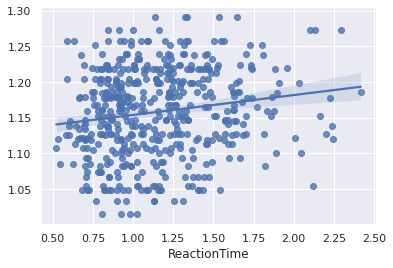

In [ ]:
sns.regplot(y_test[:500],predictions[:500])

In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:           ReactionTime   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     39.29
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           7.05e-40
Time:                        14:24:42   Log-Likelihood:                -2492.5
No. Observations:                6275   AIC:                             4997.
Df Residuals:                    6269   BIC:                             5037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1312      0.020     55.392      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# EEG dataset

### Accuracy line plots

BOTH MATCH AND MISMATCH: all conditions, W vs NW, H vs L

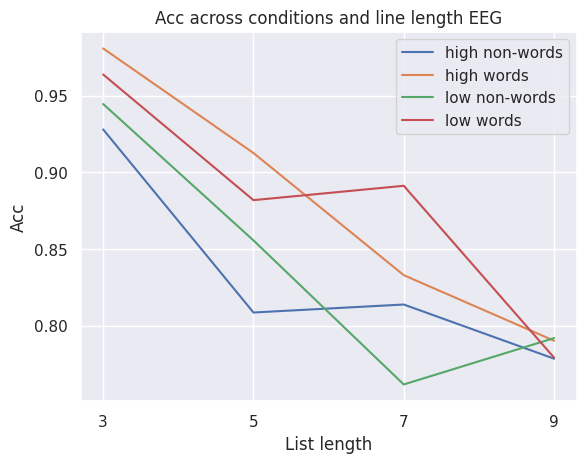

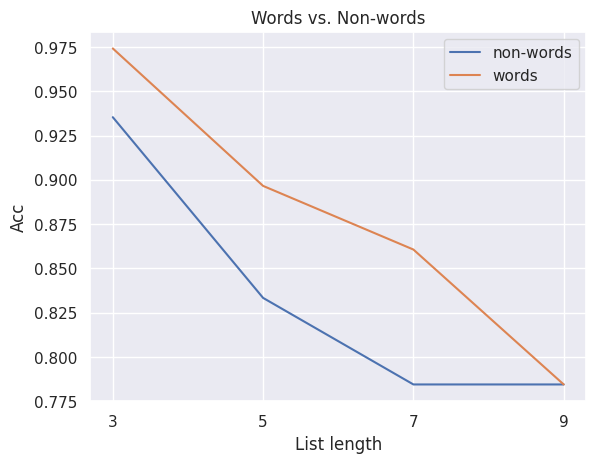

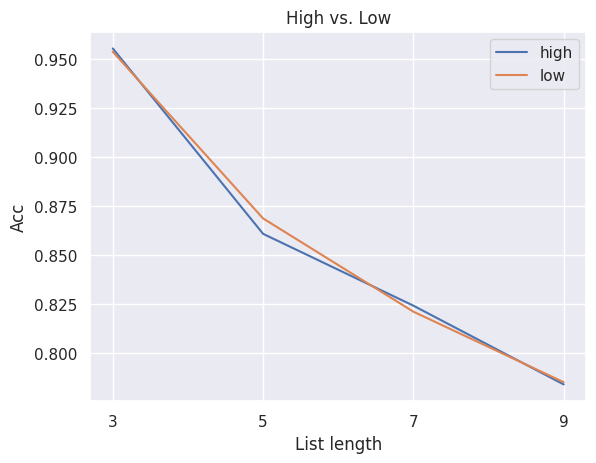

In [19]:
pl.figure()
subset = eeg.groupby(['ProbeCategory', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ResponseCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.ProbeCategory.unique())
pl.title('Acc across conditions and line length EEG');

pl.figure()
subset = eeg.groupby(['Lex', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.plot(x.Length, x.ResponseCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Words vs. Non-words');

pl.figure()
subset = eeg.groupby(['Phono', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.ResponseCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('High vs. Low');

ONLY MATCH: all cond's, W vs NW, H vs L

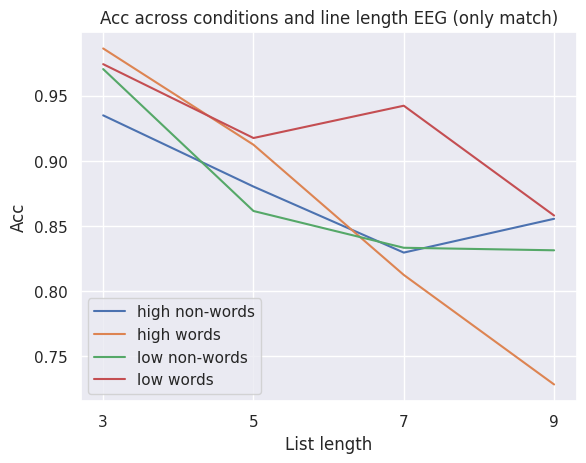

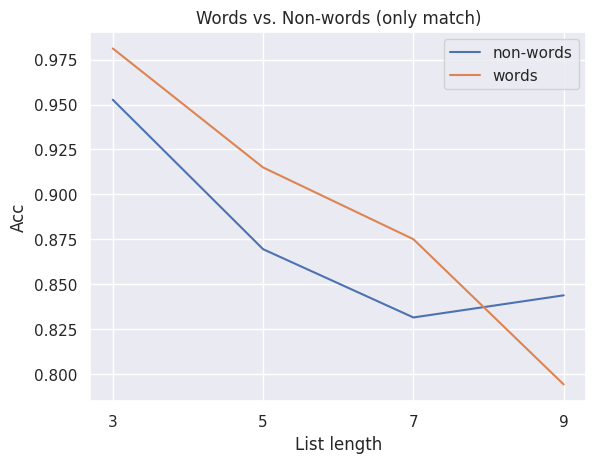

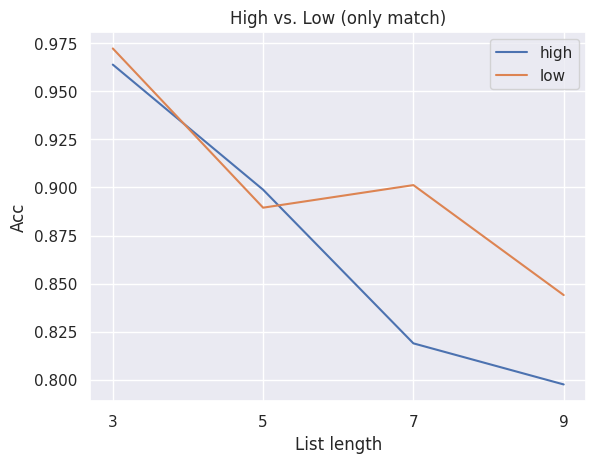

In [ ]:
only_match = eeg[eeg['ProbeType'] == 2]

pl.figure()
subset = only_match.groupby(['ProbeCategory', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ResponseCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.ProbeCategory.unique())
pl.title('Acc across conditions and line length EEG (only match)');

pl.figure()
subset = only_match.groupby(['Lex', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    pl.plot(x.Length, x.ResponseCorrect, label = 'non-words')
  elif i == 1:
    pl.plot(x.Length, x.ResponseCorrect, label = 'words')
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Words vs. Non-words (only match)');

pl.figure()
subset = only_match.groupby(['Phono', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.ResponseCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('High vs. Low (only match)');

ONLY MISMATCH: all cond's, W vs NW, H vs L

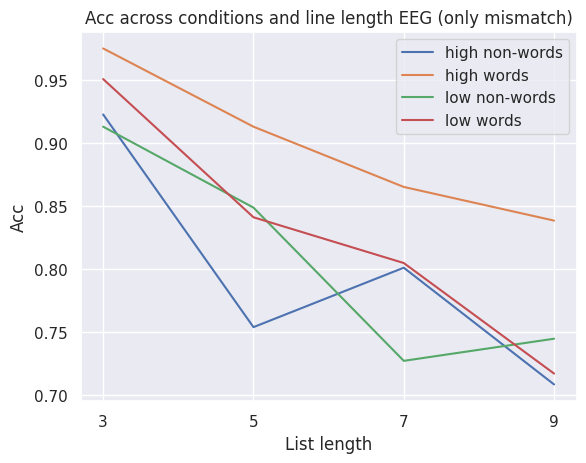

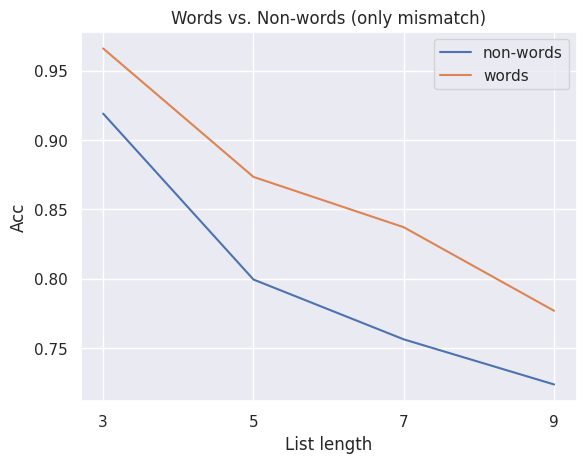

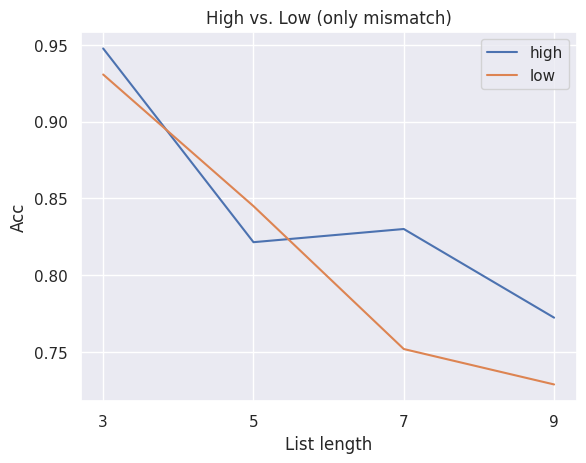

In [ ]:
only_mismatch = eeg[eeg['ProbeType'] == 1]

pl.figure()
subset = only_mismatch.groupby(['ProbeCategory', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ResponseCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.ProbeCategory.unique())
pl.title('Acc across conditions and line length EEG (only mismatch)');

pl.figure()
subset = only_mismatch.groupby(['Lex', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.plot(x.Length, x.ResponseCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Words vs. Non-words (only mismatch)');

pl.figure()
subset = only_mismatch.groupby(['Phono', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.ResponseCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('High vs. Low (only mismatch)');

Plotting match vs mismatch on the same plot

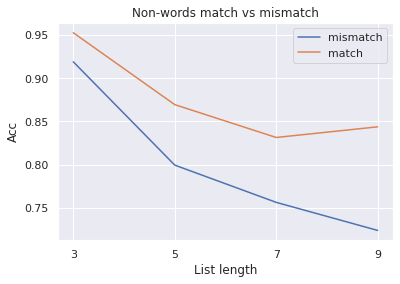

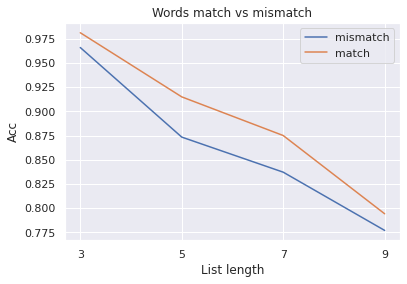

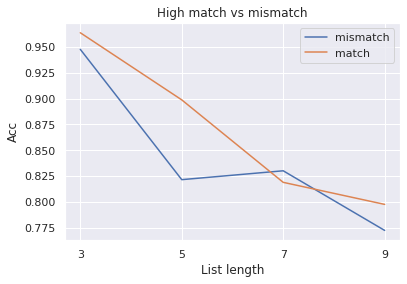

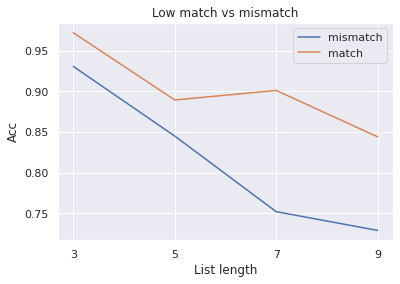

In [ ]:
pl.figure()
nonwords = eeg[eeg['Lex'] == 0]
subset = nonwords.groupby(['ProbeType', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ResponseCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Non-words match vs mismatch');

pl.figure()
words = eeg[eeg['Lex'] == 1]
subset = words.groupby(['ProbeType', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ResponseCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Words match vs mismatch');

pl.figure()
high = eeg[eeg['Phono'] == 0]
subset = high.groupby(['ProbeType', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ResponseCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('High match vs mismatch');

pl.figure()
low = eeg[eeg['Phono'] == 1]
subset = low.groupby(['ProbeType', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ResponseCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Low match vs mismatch');

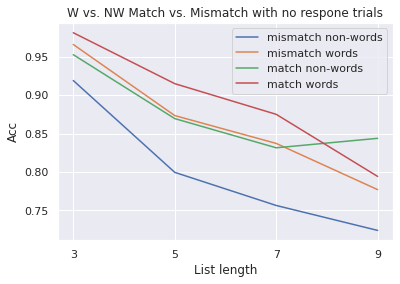

In [ ]:
pl.figure()
subset = eeg.groupby(['ProbeType', 'Lex', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  for j in subset.Lex.unique():
    x = subset[(subset['ProbeType'] == i) & (subset['Lex'] == j)]
    if i == 1:
      name1 = 'mismatch'
      if j == 0:
        name2 = 'non-words'
      elif j == 1:
        name2 = 'words'
    elif i == 2:
      name1 = 'match'
      if j == 0:
        name2 = 'non-words'
      elif j == 1:
        name2 = 'words'
    pl.plot(x.Length, x.ResponseCorrect, label = (name1 + ' ' + name2))
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('W vs. NW Match vs. Mismatch with no respone trials');

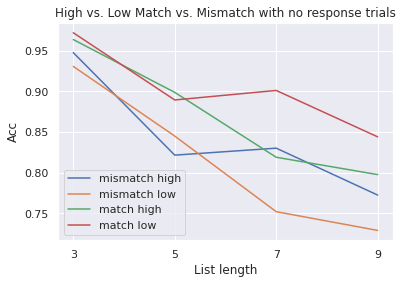

In [ ]:
pl.figure()
subset = eeg.groupby(['ProbeType', 'Phono', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  for j in subset.Phono.unique():
    x = subset[(subset['ProbeType'] == i) & (subset['Phono'] == j)]
    if i == 1:
      name1 = 'mismatch'
      if j == 0:
        name2 = 'high'
      elif j == 1:
        name2 = 'low'
    elif i == 2:
      name1 = 'match'
      if j == 0:
        name2 = 'high'
      elif j == 1:
        name2 = 'low'
    pl.plot(x.Length, x.ResponseCorrect, label = (name1 + ' ' + name2))
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('High vs. Low Match vs. Mismatch with no response trials');

### Accuracy bar plots. Phono effect

**Bar plots. Investigating the effect of phono within the lexical class, probe types and list lengths**

(   Phono  Length  ResponseCorrect
 4      1       3         0.953767
 5      1       5         0.868673
 6      1       7         0.821082
 7      1       9         0.785075,)

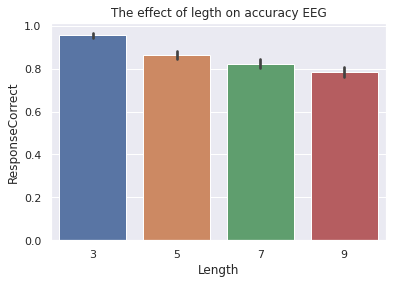

In [ ]:
sns.barplot(x='Length',y='ResponseCorrect',data=eeg)
pl.title('The effect of legth on accuracy EEG')

x,

P-value 0.5316825626173953
H 0.859538784067086 L 0.8536585365853658


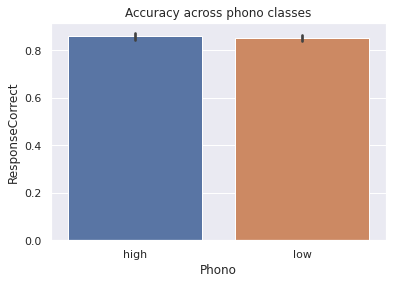

In [ ]:
# H vs L
pl.figure()
fig = sns.barplot('Phono', 'ResponseCorrect', data=eeg)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy across phono classes');

x, y = eeg[eeg['Phono'] == 1]['ResponseCorrect'].values, eeg[eeg['Phono'] == 0]['ResponseCorrect'].values
print('P-value', ttest(x, y)[1])
print('H', y.mean(), 'L', x.mean())

P-value for words 0.44278844346806834
H 0.8834818368745716 L 0.8739622641509434
P-value for non-words 0.9738591114388171
H 0.83464005702067 L 0.834178131788559


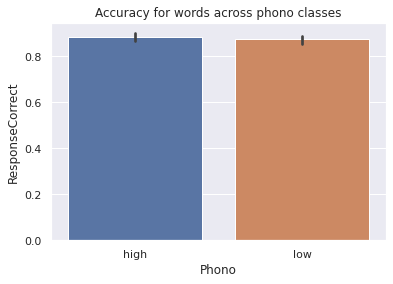

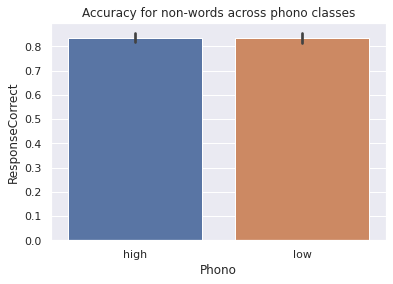

In [ ]:
# W H vs L, NW H vs L
for i in eeg.Lex.unique():
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.figure()
  subset = eeg[eeg['Lex'] == i]
  fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
  fig.set_xticklabels(['high', 'low'])
  pl.title('Accuracy for ' + name + ' across phono classes');

  x, y = subset[subset['Phono'] == 1]['ResponseCorrect'].values, subset[subset['Phono'] == 0]['ResponseCorrect'].values
  print('P-value for', name, ttest(x, y)[1])
  print('H', y.mean(), 'L', x.mean())

P-value for words mismatch 1.5166039627061359e-05
H 0.9002976190476191 L 0.8156606851549756
P-value for words match 0.0004311710100043424
H 0.8691232528589581 L 0.9241573033707865
P-value for non-words match 0.962461830830121
H 0.8769968051118211 L 0.8761329305135952
P-value for non-words mismatch 0.8112853308894151
H 0.8005148005148005 L 0.7955493741307371


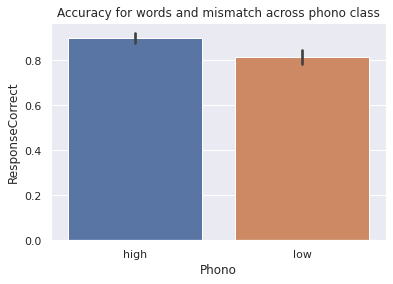

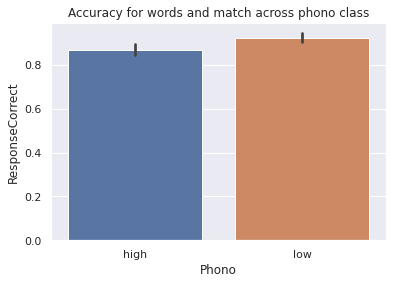

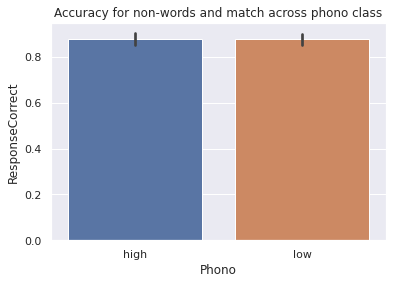

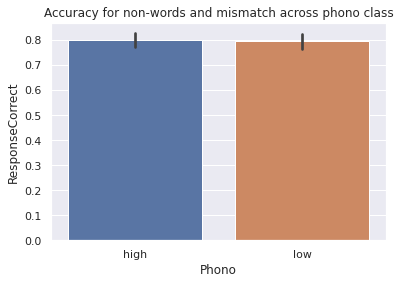

In [ ]:
# 1/ W MATCH H vs L, 2/ W MISMATCH H vs L 
# 3/ NW MATCH H vs L, 4/ NW MISMATCH H vs L
for lex_class in eeg.Lex.unique():
  if lex_class == 0:
    name1 = 'non-words'
  elif lex_class == 1:
    name1 = 'words'
  subset = eeg[eeg['Lex'] == lex_class]
  for probe_class in subset.ProbeType.unique():
    if probe_class == 1:
      name2 = 'mismatch'
    elif probe_class == 2:
      name2 = 'match'
    ss = subset[subset['ProbeType'] == probe_class]

    pl.figure()
    fig = sns.barplot('Phono', 'ResponseCorrect', data=ss)
    fig.set_xticklabels(['high', 'low'])
    pl.title(
        'Accuracy for ' + name1 + ' and ' + name2 + ' across phono class'
    );

    x, y = ss[ss['Phono'] == 1]['ResponseCorrect'].values, ss[ss['Phono'] == 0]['ResponseCorrect'].values
    print('P-value for', name1, name2, ttest(x, y)[1])
    print('H', y.mean(), 'L', x.mean())

P-value for 5 0.669127290144013
H 0.8608169440242057 L 0.8686730506155951
P-value for 9 0.9587743791831324
H 0.7839335180055401 L 0.7850746268656716
P-value for 7 0.881330293755935
H 0.8241430700447094 L 0.8210818307905686
P-value for 3 0.8822641922794177
H 0.9554455445544554 L 0.9537671232876712


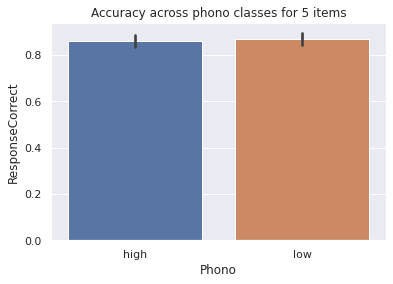

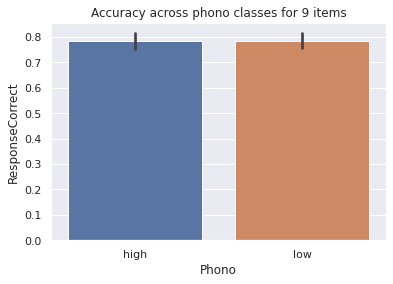

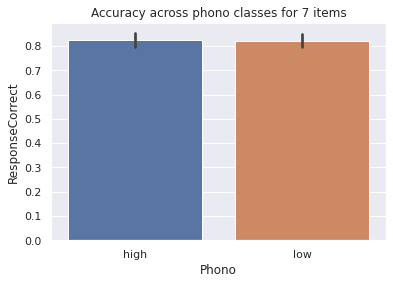

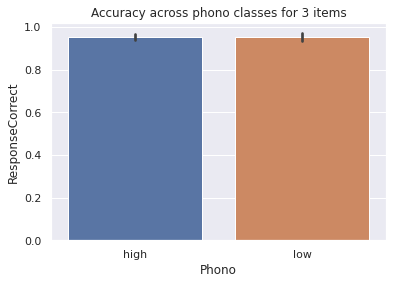

In [ ]:
# check for different length
# H vs L
for i in eeg.Length.unique():
  subset = eeg[eeg['Length'] == i] 
  pl.figure()
  fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
  fig.set_xticklabels(['high', 'low'])
  pl.title('Accuracy across phono classes for ' + str(i) + ' items');

  x, y = subset[subset['Phono'] == 1]['ResponseCorrect'].values, subset[subset['Phono'] == 0]['ResponseCorrect'].values
  print('P-value for', i, ttest(x, y)[1])
  print('H', y.mean(), 'L', x.mean())

In [ ]:
# check for different length
for i in eeg.Length.unique():
  print(i)
  subset = eeg[eeg['Length'] == i]
  for j in subset.Lex.unique():
    if j == 0:
      print('Non-words')
    elif j == 1:
      print('Words')
    ss = subset[subset['Lex'] == j]
    x, y = ss[ss['Phono'] == 1]['ResponseCorrect'].values, ss[ss['Phono'] == 0]['ResponseCorrect'].values
    print('P-value for', i, j, ttest(x, y)[1])
    print('H', y.mean(), 'L', x.mean())

5
Words
P-value for 5 1 0.18073421371691437
H 0.9126506024096386 L 0.8818681318681318
Non-words
P-value for 5 0 0.09850954116207628
H 0.8085106382978723 L 0.8555858310626703
9
Words
P-value for 9 1 0.7233783601234173
H 0.7900874635568513 L 0.7790368271954674
Non-words
P-value for 9 0 0.6676557002085628
H 0.7783641160949868 L 0.7917981072555205
7
Non-words
P-value for 7 0 0.09322299740974167
H 0.8137254901960784 L 0.7615384615384615
Words
P-value for 7 1 0.025118604447534543
H 0.8328767123287671 L 0.8912386706948641
3
Words
P-value for 3 1 0.1938727396430131
H 0.9809069212410502 L 0.9638989169675091
Non-words
P-value for 3 0 0.3703312713403578
H 0.9280205655526992 L 0.9446254071661238


In [ ]:
# check for different length

# 1/ W MATCH H vs L, 2/ W MISMATCH H vs L 
# 3/ NW MATCH H vs L, 4/ NW MISMATCH H vs L
for i in eeg.Length.unique():
  subset = eeg[eeg['Length'] == i]
  for lex_class in subset.Lex.unique():
    if lex_class == 0:
      name1 = 'non-words'
    elif lex_class == 1:
      name1 = 'words'
    ss = subset[subset['Lex'] == lex_class]
    for probe_class in subset.ProbeType.unique():
      if probe_class == 1:
        name2 = 'mismatch'
      elif probe_class == 2:
        name2 = 'match'
      s = ss[ss['ProbeType'] == probe_class]

      x, y = s[s['Phono'] == 1]['ResponseCorrect'].values, s[s['Phono'] == 0]['ResponseCorrect'].values
      print('P-value for', i, 'items', name1, name2, ttest(x, y)[1])
      print('H', y.mean(), 'L', x.mean())
      print('')

P-value for 5 items words mismatch 0.053104684640026115
H 0.9130434782608695 L 0.8411764705882353

P-value for 5 items words match 0.8560492865850269
H 0.9123711340206185 L 0.9175257731958762

P-value for 5 items non-words mismatch 0.023909409904301588
H 0.7540106951871658 L 0.8488372093023255

P-value for 5 items non-words match 0.6119393952526393
H 0.8802816901408451 L 0.8615384615384616

P-value for 9 items words match 0.005117451575330486
H 0.7284768211920529 L 0.8580645161290322

P-value for 9 items words mismatch 0.003817820192223341
H 0.8385416666666666 L 0.7171717171717171

P-value for 9 items non-words match 0.5345383742718991
H 0.8555555555555555 L 0.8313953488372093

P-value for 9 items non-words mismatch 0.45593988618298853
H 0.7085427135678392 L 0.7448275862068966

P-value for 7 items non-words mismatch 0.07312242339368806
H 0.8011695906432749 L 0.7272727272727273

P-value for 7 items non-words match 0.9366313571969674
H 0.8296296296296296 L 0.8333333333333334

P-value for

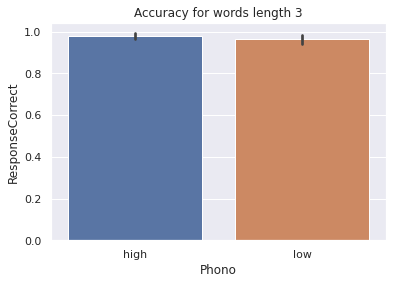

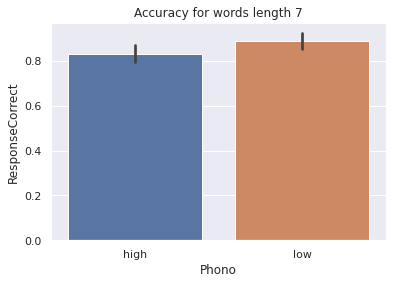

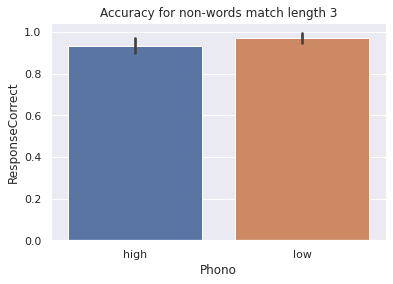

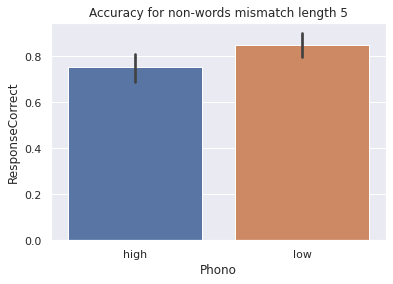

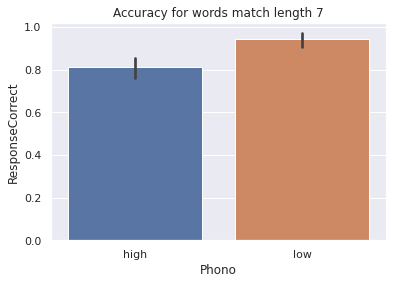

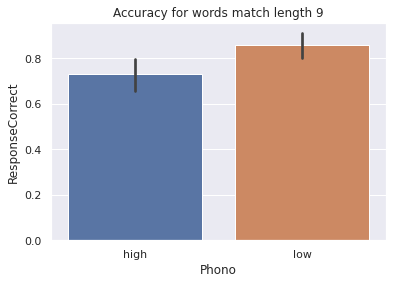

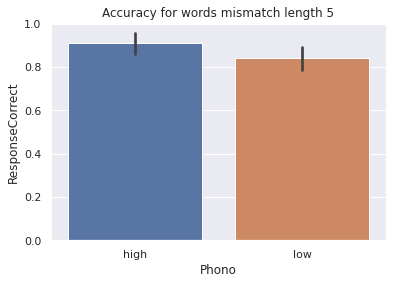

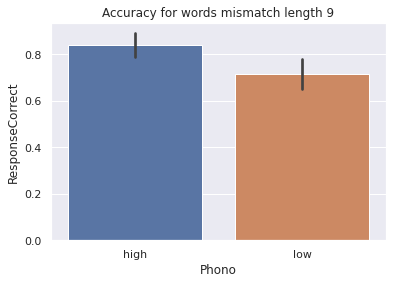

In [ ]:
# plotting sgnificant differences by lists
# first contrast Phono within word classes
pl.figure()
subset = eeg[(eeg['Lex'] == 1) & (eeg['Length'] == 3)]
fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy for words length 3');

pl.figure()
subset = eeg[(eeg['Lex'] == 1) & (eeg['Length'] == 7)]
fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy for words length 7');

pl.figure()
subset = eeg[(eeg['Lex'] == 0) & (eeg['Length'] == 3) & (eeg['ProbeType'] == 2)]
fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy for non-words match length 3');

pl.figure()
subset = eeg[(eeg['Lex'] == 0) & (eeg['Length'] == 5) & (eeg['ProbeType'] == 1)]
fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy for non-words mismatch length 5');

pl.figure()
subset = eeg[(eeg['Lex'] == 1) & (eeg['Length'] == 7) & (eeg['ProbeType'] == 2)]
fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy for words match length 7');

pl.figure()
subset = eeg[(eeg['Lex'] == 1) & (eeg['Length'] == 9) & (eeg['ProbeType'] == 2)]
fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy for words match length 9');

pl.figure()
subset = eeg[(eeg['Lex'] == 1) & (eeg['Length'] == 5) & (eeg['ProbeType'] == 1)]
fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy for words mismatch length 5');

pl.figure()
subset = eeg[(eeg['Lex'] == 1) & (eeg['Length'] == 9) & (eeg['ProbeType'] == 1)]
fig = sns.barplot('Phono', 'ResponseCorrect', data=subset)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy for words mismatch length 9');

### RT plots 

For RT analysis, we should exclude 'No response' trials, because they do not contain relevant information on the speed of the partcipants. There is 100 'No Response' trials.

In [ ]:
eeg_rt = eeg[eeg['Response'] != 'No Response']

Both MATCH AND MISMATCH TOGETHER

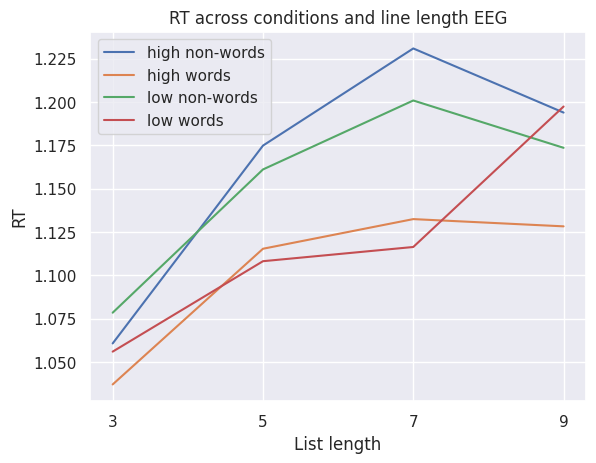

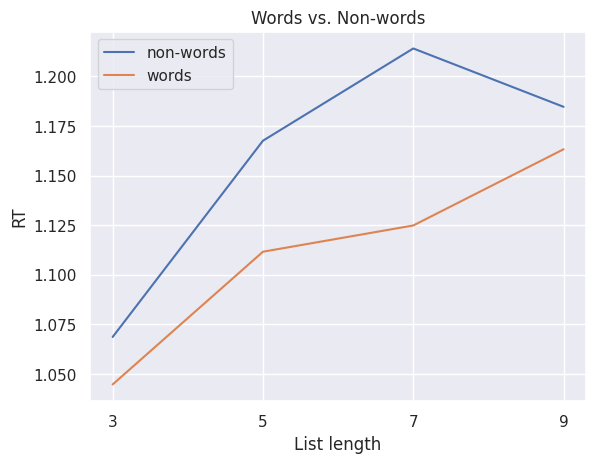

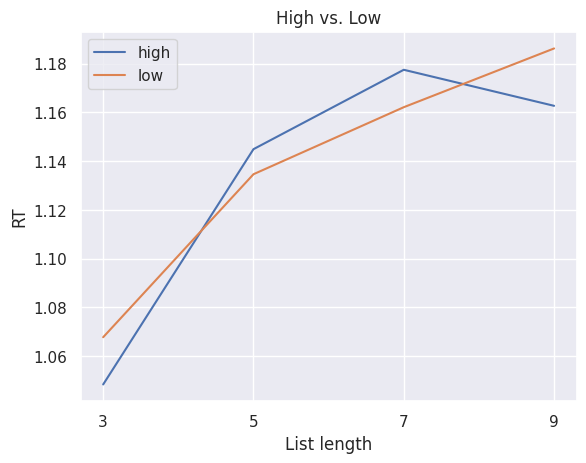

In [ ]:
pl.figure()
subset = eeg_rt.groupby(['ProbeCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.ProbeCategory.unique())
pl.title('RT across conditions and line length EEG');

pl.figure()
subset = eeg_rt.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs. Non-words');

pl.figure()
subset = eeg_rt.groupby(['Phono', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High vs. Low');

P-value 1.309720982627964e-06
P-value 0.3002103533792985


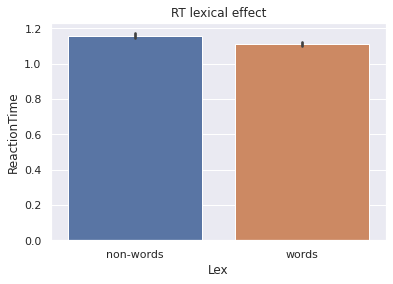

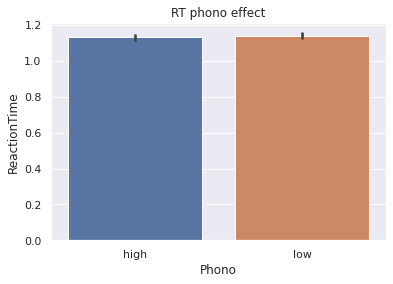

In [ ]:
# significance with length combined
x, y = eeg_rt[eeg_rt['Lex'] == 1]['ReactionTime'].values, eeg_rt[eeg_rt['Lex'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(eeg_rt['Lex'], eeg_rt['ReactionTime'])
fig.set_xticklabels(['non-words', 'words'])
pl.title('RT lexical effect');

x, y = eeg_rt[eeg_rt['Phono'] == 1]['ReactionTime'].values, eeg_rt[eeg_rt['Phono'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(eeg_rt['Phono'], eeg_rt['ReactionTime'])
fig.set_xticklabels(['high', 'low'])
pl.title('RT phono effect');

In [ ]:
# significance with different lengths
for i in eeg_rt.Length.unique():
  subset = eeg_rt[eeg_rt['Length'] == i]
  x, y = subset[subset['Lex'] == 1]['ReactionTime'].values, subset[subset['Lex'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Lex', ttest(x, y)[1])

  x, y = subset[subset['Phono'] == 1]['ReactionTime'].values, subset[subset['Phono'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Phono', ttest(x, y)[1])

P-value for 5 Lex 0.004402819165934881
P-value for 5 Phono 0.6034518842805721
P-value for 9 Lex 0.27900389918254753
P-value for 9 Phono 0.23524279670760545
P-value for 7 Lex 1.2296895690775139e-05
P-value for 7 Phono 0.4538314468381355
P-value for 3 Lex 0.1990574403213983
P-value for 3 Phono 0.30126804748000824


MATCH

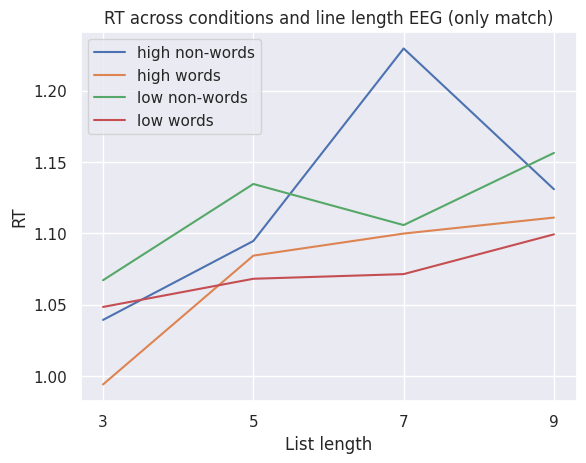

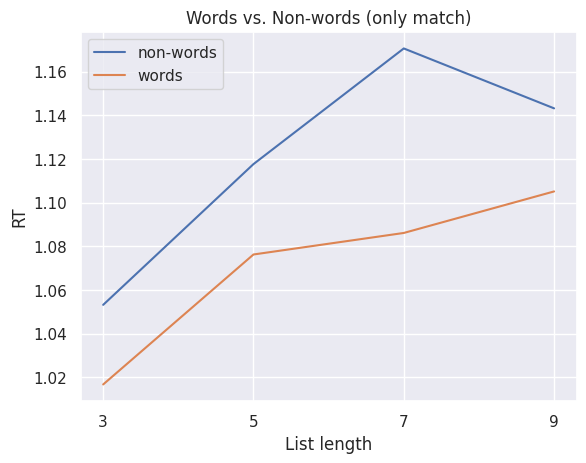

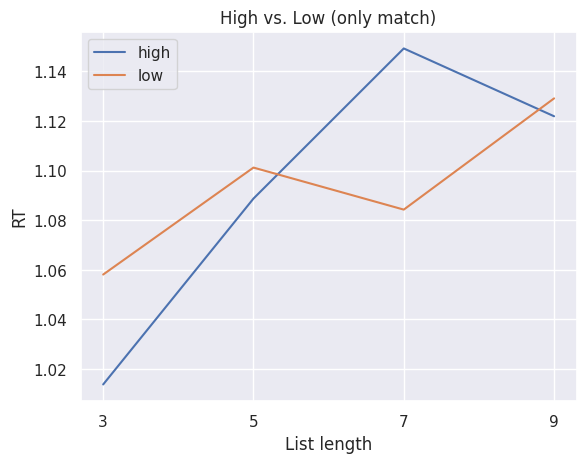

In [ ]:
only_match = eeg_rt[eeg_rt['ProbeType'] == 2]

pl.figure()
subset = only_match.groupby(['ProbeCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.ProbeCategory.unique())
pl.title('RT across conditions and line length EEG (only match)');

pl.figure()
subset = only_match.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    pl.plot(x.Length, x.ReactionTime, label = 'non-words')
  elif i == 1:
      pl.plot(x.Length, x.ReactionTime, label = 'words')
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs. Non-words (only match)');

pl.figure()
subset = only_match.groupby(['Phono', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High vs. Low (only match)');

P-value 0.00015197441867710848
P-value 0.8720029620256665


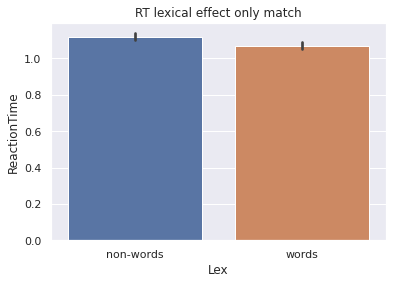

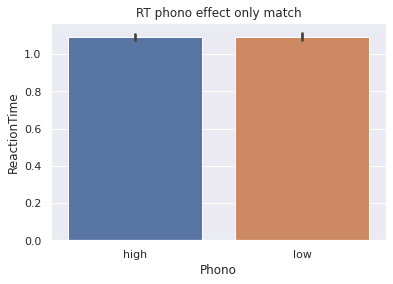

In [ ]:
# significance with length combined
x, y = only_match[only_match['Lex'] == 1]['ReactionTime'].values, only_match[only_match['Lex'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(only_match['Lex'], only_match['ReactionTime'])
fig.set_xticklabels(['non-words', 'words'])
pl.title('RT lexical effect only match');

x, y = only_match[only_match['Phono'] == 1]['ReactionTime'].values, only_match[only_match['Phono'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(only_match['Phono'], only_match['ReactionTime'])
fig.set_xticklabels(['high', 'low'])
pl.title('RT phono effect only match');

In [ ]:
# significance with different lengths
print('Only match')
for i in only_match.Length.unique():
  subset = only_match[only_match['Length'] == i]
  x, y = subset[subset['Lex'] == 1]['ReactionTime'].values, subset[subset['Lex'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Lex', ttest(x, y)[1])

  x, y = subset[subset['Phono'] == 1]['ReactionTime'].values, subset[subset['Phono'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Phono', ttest(x, y)[1])

Only match
P-value for 5 Lex 0.09840065941468577
P-value for 5 Phono 0.6182171504596798
P-value for 9 Lex 0.1429818414366755
P-value for 9 Phono 0.7808570910120656
P-value for 7 Lex 0.002579023196615695
P-value for 7 Phono 0.013577813637014612
P-value for 3 Lex 0.12871467484789983
P-value for 3 Phono 0.065869266611883


MISMATCH

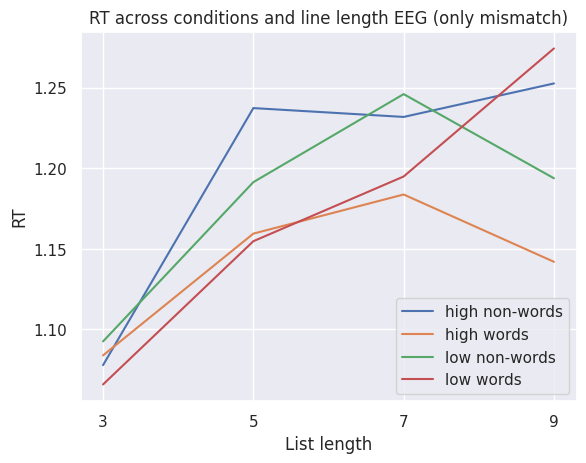

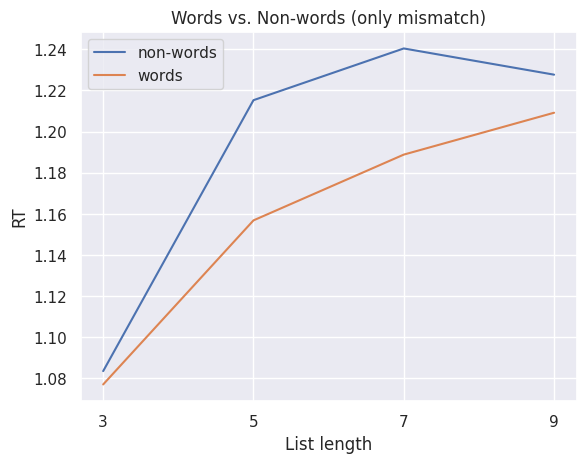

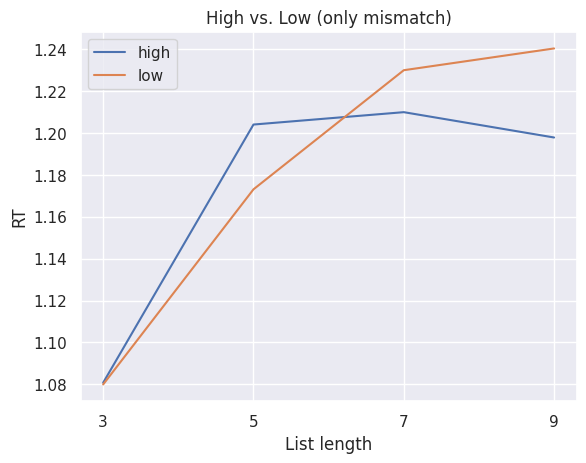

In [ ]:
only_mismatch = eeg_rt[eeg_rt['ProbeType'] == 1]

pl.figure()
subset = only_mismatch.groupby(['ProbeCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.ProbeCategory.unique())
pl.title('RT across conditions and line length EEG (only mismatch)');

pl.figure()
subset = only_mismatch.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs. Non-words (only mismatch)');

pl.figure()
subset = only_mismatch.groupby(['Phono', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High vs. Low (only mismatch)');

P-value 0.01980364556202357
P-value 0.1684836309303102


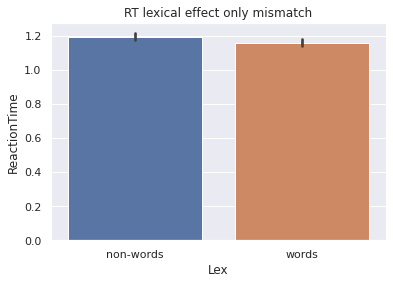

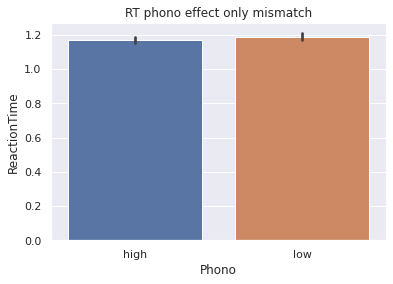

In [ ]:
# significance with length combined
x, y = only_mismatch[only_mismatch['Lex'] == 1]['ReactionTime'].values, only_mismatch[only_mismatch['Lex'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(only_mismatch['Lex'], only_mismatch['ReactionTime'])
fig.set_xticklabels(['non-words', 'words'])
pl.title('RT lexical effect only mismatch');

x, y = only_mismatch[only_mismatch['Phono'] == 1]['ReactionTime'].values, only_mismatch[only_mismatch['Phono'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(only_mismatch['Phono'], only_mismatch['ReactionTime'])
fig.set_xticklabels(['high', 'low'])
pl.title('RT phono effect only mismatch');

In [ ]:
# significance with different lengths
print('Only mismatch')
for i in only_mismatch.Length.unique():
  subset = only_mismatch[only_mismatch['Length'] == i]
  x, y = subset[subset['Lex'] == 1]['ReactionTime'].values, subset[subset['Lex'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Lex', ttest(x, y)[1])

  x, y = subset[subset['Phono'] == 1]['ReactionTime'].values, subset[subset['Phono'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Phono', ttest(x, y)[1])

Only mismatch
P-value for 7 Lex 0.10672253558567736
P-value for 7 Phono 0.5150989051556678
P-value for 3 Lex 0.8221074193597251
P-value for 3 Phono 0.9770654366191143
P-value for 5 Lex 0.05503129667492678
P-value for 5 Phono 0.31124452530592345
P-value for 9 Lex 0.5274593310501714
P-value for 9 Phono 0.14554467716142458


Plotting MATCH AND MISMATCH on the same plot

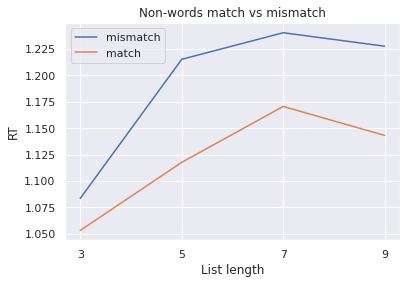

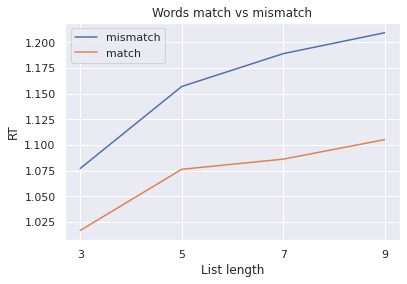

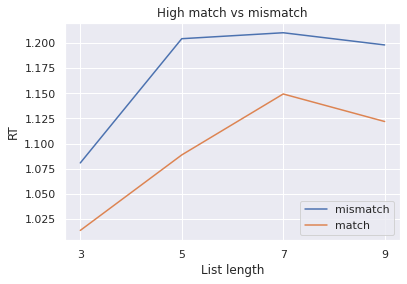

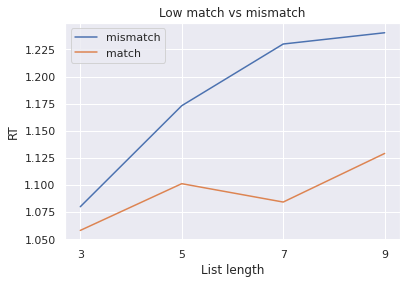

In [ ]:
pl.figure()
nonwords = eeg_rt[eeg_rt['Lex'] == 0]
subset = nonwords.groupby(['ProbeType', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Non-words match vs mismatch');

pl.figure()
words = eeg_rt[eeg_rt['Lex'] == 1]
subset = words.groupby(['ProbeType', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words match vs mismatch');

pl.figure()
high = eeg_rt[eeg_rt['Phono'] == 0]
subset = high.groupby(['ProbeType', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High match vs mismatch');

pl.figure()
low = eeg_rt[eeg_rt['Phono'] == 1]
subset = low.groupby(['ProbeType', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Low match vs mismatch');

P-value 5.82810846909887e-08
P-value 2.088427737397665e-10
P-value 2.9554624196267584e-08
P-value 1.5520716047541997e-11


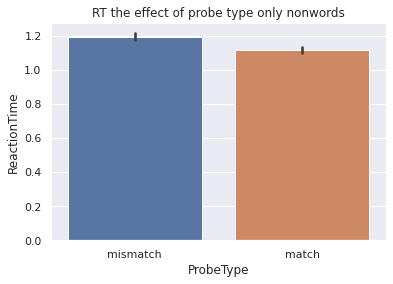

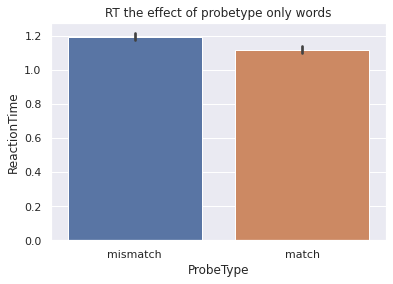

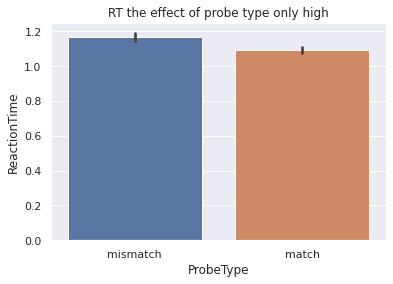

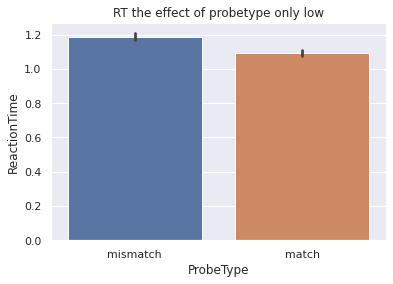

In [ ]:
# significance with length combined
ss = eeg_rt[eeg_rt['Lex'] == 0]
x, y = ss[ss['ProbeType'] == 2]['ReactionTime'].values, ss[ss['ProbeType'] == 1]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(ss['ProbeType'], ss['ReactionTime'])
fig.set_xticklabels(['mismatch', 'match'])
pl.title('RT the effect of probe type only nonwords');

s = eeg_rt[eeg_rt['Lex'] == 1]
x, y = s[s['ProbeType'] == 2]['ReactionTime'].values, s[s['ProbeType'] == 1]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(ss['ProbeType'], ss['ReactionTime'])
fig.set_xticklabels(['mismatch', 'match'])
pl.title('RT the effect of probetype only words');

hh = eeg_rt[eeg_rt['Phono'] == 0]
x, y = hh[hh['ProbeType'] == 2]['ReactionTime'].values, hh[hh['ProbeType'] == 1]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(hh['ProbeType'], hh['ReactionTime'])
fig.set_xticklabels(['mismatch', 'match'])
pl.title('RT the effect of probe type only high');

h = eeg_rt[eeg_rt['Phono'] == 1]
x, y = h[h['ProbeType'] == 2]['ReactionTime'].values, h[h['ProbeType'] == 1]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(h['ProbeType'], h['ReactionTime'])
fig.set_xticklabels(['mismatch', 'match'])
pl.title('RT the effect of probetype only low');

In [ ]:
# significance with different lengths
print('Only nonwords')
for i in ss.Length.unique():
  subset = ss[ss['Length'] == i]
  x, y = subset[subset['ProbeType'] == 1]['ReactionTime'].values, subset[subset['ProbeType'] == 2]['ReactionTime'].values
  print('P-value for', i, 'ProbeType', ttest(x, y)[1])

print('Only words')
for i in s.Length.unique():
  subset = s[s['Length'] == i]
  x, y = subset[subset['ProbeType'] == 1]['ReactionTime'].values, subset[subset['ProbeType'] == 2]['ReactionTime'].values
  print('P-value for', i, 'ProbeType', ttest(x, y)[1])

print('Only high')
for i in hh.Length.unique():
  subset = hh[hh['Length'] == i]
  x, y = subset[subset['ProbeType'] == 1]['ReactionTime'].values, subset[subset['ProbeType'] == 2]['ReactionTime'].values
  print('P-value for', i, 'ProbeType', ttest(x, y)[1])

print('Only low')
for i in h.Length.unique():
  subset = h[h['Length'] == i]
  x, y = subset[subset['ProbeType'] == 1]['ReactionTime'].values, subset[subset['ProbeType'] == 2]['ReactionTime'].values
  print('P-value for', i, 'ProbeType', ttest(x, y)[1])


Only nonwords
P-value for 5 ProbeType 0.00045794031296758126
P-value for 7 ProbeType 0.020236559303488007
P-value for 9 ProbeType 0.0021998555731681077
P-value for 3 ProbeType 0.2498785964856276
Only words
P-value for 9 ProbeType 0.00019899137531289278
P-value for 5 ProbeType 0.004060809139778573
P-value for 3 ProbeType 0.023615781326409818
P-value for 7 ProbeType 0.0006661437262981696
Only high
P-value for 5 ProbeType 9.35829048091703e-05
P-value for 7 ProbeType 0.038460407594205714
P-value for 9 ProbeType 0.003956365295362509
P-value for 3 ProbeType 0.007057305633010343
Only low
P-value for 5 ProbeType 0.006704053808696562
P-value for 9 ProbeType 0.00012303713587609637
P-value for 3 ProbeType 0.44081418493450963
P-value for 7 ProbeType 2.2521272407038754e-07


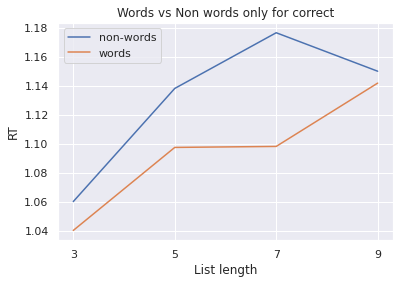

In [ ]:
# CORRECT
pl.figure()
correct = eeg_rt[eeg_rt['ResponseCorrect'] == 1]
subset = correct.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  x = subset[subset['Lex'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs Non words only for correct');

Ttest_indResult(statistic=array([3.53456022]), pvalue=array([0.00041234]))


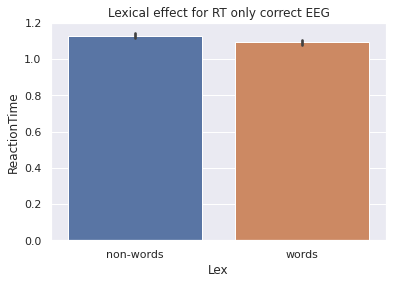

In [ ]:
pl.figure()
ax = sns.barplot('Lex', 'ReactionTime', data = eeg_rt[eeg_rt['ResponseCorrect'] == 1])
ax.set_xticklabels(['non-words', 'words'])
pl.title('Lexical effect for RT only correct EEG');

subset = eeg_rt[eeg_rt['ResponseCorrect'] == 1]
x, y = subset[subset['Lex'] == 0][['ReactionTime']], subset[subset['Lex'] == 1][['ReactionTime']]
print(ttest(x,y))

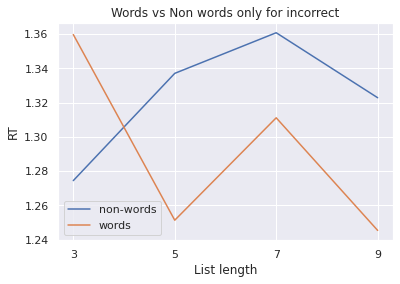

In [ ]:
# INCORRECT
pl.figure()
incorrect = eeg_rt[eeg_rt['ResponseCorrect'] == 0]
subset = incorrect.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  x = subset[subset['Lex'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs Non words only for incorrect');

Ttest_indResult(statistic=array([2.30421795]), pvalue=array([0.02152085]))


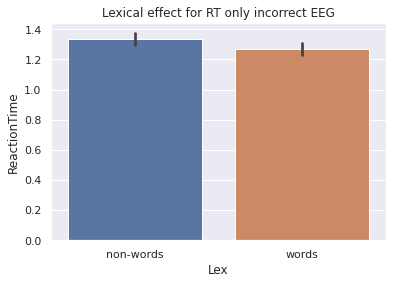

In [ ]:
pl.figure()
ax = sns.barplot('Lex', 'ReactionTime', data = eeg_rt[eeg_rt['ResponseCorrect'] == 0])
ax.set_xticklabels(['non-words', 'words'])
pl.title('Lexical effect for RT only incorrect EEG');

subset = eeg_rt[eeg_rt['ResponseCorrect'] == 0]
x, y = subset[subset['Lex'] == 0][['ReactionTime']], subset[subset['Lex'] == 1][['ReactionTime']]
print(ttest(x,y))

### Correlation

In [ ]:
eeg_data = eeg[[
                'Trial', 'Subject', 'Block',
                'ProbeType', 'stdRT', 'ResponseCorrect',
                'Position', 'Response', 'Length', 'Lex', 'Phono'
]]

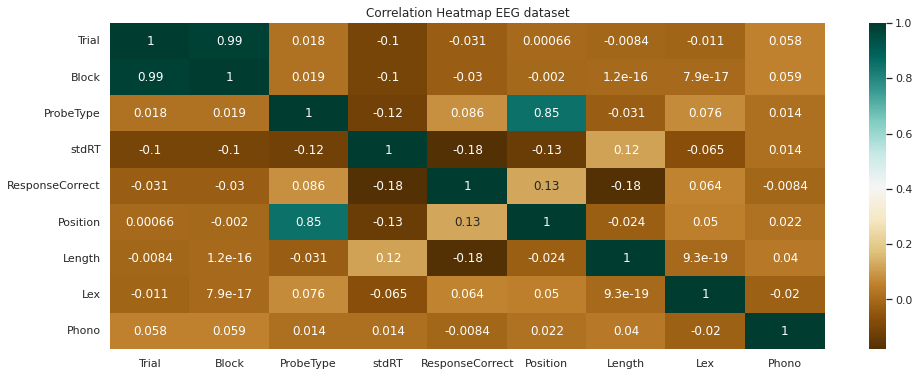

In [ ]:
pl.figure(figsize=(16, 6))
map = sns.heatmap(eeg_data.corr(), annot=True, cmap = 'BrBG')
map.set_title('Correlation Heatmap EEG dataset');

### Models Accuracy

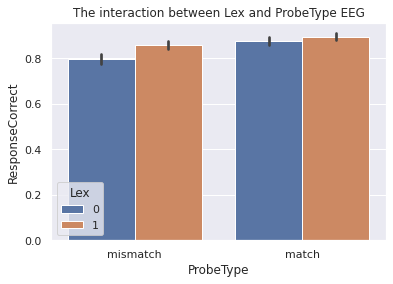

In [ ]:
pl.figure()
ax = sns.barplot(x="ProbeType", y="ResponseCorrect", hue="Lex", data=eeg)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The interaction between Lex and ProbeType EEG');

In [ ]:
subset = eeg[eeg['Lex'] == 1]
x, y = subset[subset['ProbeType'] == 2][['ResponseCorrect']].values, subset[subset['ProbeType'] == 1][['ResponseCorrect']].values
print(ttest(x,y))
subset = eeg[eeg['Lex'] == 0]
x, y = subset[subset['ProbeType'] == 2][['ResponseCorrect']].values, subset[subset['ProbeType'] == 1][['ResponseCorrect']].values
print(ttest(x,y))

subset = eeg[eeg['ProbeType'] == 1]
x, y = subset[subset['Lex'] == 0][['ResponseCorrect']].values, subset[subset['Lex'] == 1][['ResponseCorrect']].values
print(ttest(x,y))
subset = eeg[eeg['ProbeType'] == 2]
x, y = subset[subset['Lex'] == 0][['ResponseCorrect']].values, subset[subset['Lex'] == 1][['ResponseCorrect']].values
print(ttest(x,y))

Ttest_indResult(statistic=array([2.82588039]), pvalue=array([0.00475132]))
Ttest_indResult(statistic=array([5.66201056]), pvalue=array([1.64938015e-08]))
Ttest_indResult(statistic=array([-4.3522686]), pvalue=array([1.39600628e-05]))
Ttest_indResult(statistic=array([-1.54495655]), pvalue=array([0.12247603]))


In [ ]:
%%R -i eeg
m <- lmer('ResponseCorrect ~ Lex + Length + ProbeType + ProbeType:Lex + (1|Subject)', data=eeg)
m1 <- lmer('ResponseCorrect ~ Lex + Length + ProbeType + ProbeType:Lex + Length:ProbeType + (1|Subject)', data=eeg)
anova(m, m1)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    7 3850.213 3896.586 -1918.106 3836.213       NA NA         NA
2    8 3849.275 3902.273 -1916.638 3833.275 2.937704  1 0.08653365


In [ ]:
mod = Lmer(
    'ResponseCorrect ~ Length + Lex + ProbeType + Lex:ProbeType + (1|Subject)',
    data = eeg
)
mod.fit()

Formula: ResponseCorrect~Length+Lex+ProbeType+Lex:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5568	 Groups: {'Subject': 29.0}

Log-likelihood: -1937.778 	 AIC: 3875.555

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.002  0.044
Residual               0.116  0.340

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)       0.884   0.835    0.933  0.025  1178.957  35.481  0.000  ***
Length           -0.027  -0.031   -0.023  0.002  5535.000 -13.419  0.000  ***
Lex               0.113   0.056    0.170  0.029  5535.822   3.906  0.000  ***
ProbeType         0.079   0.053    0.104  0.013  5538.283   6.069  0.000  ***
Lex:ProbeType    -0.048  -0.084   -0.013  0.018  5535.955  -2.646  0.008   **

**Model with Words vs Non Words**

In [ ]:
words_eeg = eeg[eeg['Lex'] == 1]
nonwords_eeg = eeg[eeg['Lex'] == 0]

In [ ]:
# for words
%%R -i words_eeg
m <- lmer('ResponseCorrect ~ Length + ProbeType + (1|Subject)', data=words_eeg)
m1 <- lmer('ResponseCorrect ~ Length + ProbeType + Phono + Phono:ProbeType + (1|Subject)', data=words_eeg)
anova(m, m1)

  npar      AIC      BIC    logLik deviance    Chisq Df   Pr..Chisq.
1    5 1538.369 1568.027 -764.1846 1528.369       NA NA           NA
2    7 1510.245 1551.767 -748.1225 1496.245 32.12402  2 1.057686e-07


In [ ]:
model1 = Lmer(
    'ResponseCorrect ~ Length + ProbeType + Phono + Phono:ProbeType + (1|Subject)',
    data=words_eeg
)
model1.fit()

Formula: ResponseCorrect~Length+ProbeType+Phono+Phono:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2784	 Groups: {'Subject': 29.0}

Log-likelihood: -766.825 	 AIC: 1533.650

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.031
Residual               0.100  0.316

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)         1.113   1.050    1.176  0.032  2090.462  34.755  0.000   
Length             -0.030  -0.035   -0.024  0.003  2751.034 -11.074  0.000   
ProbeType          -0.036  -0.068   -0.003  0.017  2755.447  -2.160  0.031   
Phono              -0.211  -0.288   -0.135  0.039  2755.147  -5.433  0.000   
ProbeType:Phono     0.137   0.089    0.184  0.024  2756.410   5.679  0.000   

                 Sig  
(Intercept)      ***  
Length           ***  
ProbeType          *  
Phono            ***  
ProbeType:Phono  ***

In [ ]:
# for nonwords
%%R -i nonwords_eeg
m <- lmer('ResponseCorrect ~ Length + ProbeType + (1|Subject)', data=nonwords_eeg)
m1 <- lmer('ResponseCorrect ~ Length + ProbeType + Length:ProbeType + (1|Subject)', data=nonwords_eeg)
anova(m, m1)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    5 2267.991 2297.649 -1128.996 2257.991       NA NA         NA
2    6 2264.862 2300.452 -1126.431 2252.862 5.129202  1 0.02352654


In [ ]:
model2 = Lmer(
    'ResponseCorrect ~ Length + ProbeType + Length:ProbeType + (1|Subject)',
    data=nonwords_eeg
)
model2.fit()

Formula: ResponseCorrect~Length+ProbeType+Length:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2784	 Groups: {'Subject': 29.0}

Log-likelihood: -1142.267 	 AIC: 2284.534

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.004  0.061
Residual               0.130  0.360

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          0.993   0.870    1.116  0.063  2472.414  15.870  0.000   
Length              -0.046  -0.064   -0.027  0.010  2757.122  -4.735  0.000   
ProbeType           -0.005  -0.081    0.072  0.039  2755.688  -0.119  0.905   
Length:ProbeType     0.014   0.002    0.026  0.006  2757.685   2.265  0.024   

                  Sig  
(Intercept)       ***  
Length            ***  
ProbeType              
Length:ProbeType    *

**Model with Match vs. mismatch**

In [ ]:
match_eeg = eeg[eeg['ProbeType'] == 2]
mismatch_eeg = eeg[eeg['ProbeType'] == 1]

In [ ]:
# MATCH
%%R -i match_eeg
m <- lmer('ResponseCorrect ~ Length + Phono + Length:Phono + Lex + Lex:Phono + (1|Subject)', data=match_eeg)
m1 <- lmer('ResponseCorrect ~ Length + Phono + Length:Phono + Lex + Lex:Phono + Lex:Length + (1|Subject)', data=match_eeg)
anova(m, m1)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    8 1390.592 1438.054 -687.2959 1374.592       NA NA         NA
2    9 1387.057 1440.451 -684.5285 1369.057 5.534816  1 0.01864172


In [ ]:
model_mis = Lmer(
    'ResponseCorrect ~ Length + Phono + Lex + Lex:Length + Length:Phono + Length:Phono:Lex + (1|Subject)',
    data=match_eeg
)
model_mis.fit()

Formula: ResponseCorrect~Length+Phono+Lex+Lex:Length+Length:Phono+Length:Phono:Lex+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2753	 Groups: {'Subject': 29.0}

Log-likelihood: -564.767 	 AIC: 1129.534

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.003  0.055
Residual               0.085  0.292

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          1.022   0.964    1.080  0.030   898.805  34.273  0.000   
Length              -0.022  -0.031   -0.014  0.004  2721.782  -5.086  0.000   
Phono               -0.044  -0.107    0.018  0.032  2718.959  -1.392  0.164   
Lex                  0.086   0.023    0.148  0.032  2718.813   2.684  0.007   
Length:Lex          -0.017  -0.028   -0.007  0.005  2719.276  -3.256  0.001   
Length:Phono         0.008  -0.002    0.018  0.005  2719.844   1.496  0.135   
Length:Phono:Lex     0.011   0.004    0.018  0.004  2720.218   3.045  0.002   

                  Sig  
(Intercept)       ***  
Length            ***  
Phono                  
Lex                **  
Length:Lex         **  
Length:Phono           
Length:Phono:Lex   **

In [ ]:
model_ = Lmer(
    'ResponseCorrect ~ Length + Phono + Length:Phono + (1|Subject)',
    data=match_eeg
)
model_.fit()

Formula: ResponseCorrect~Length+Phono+Length:Phono+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2753	 Groups: {'Subject': 29.0}

Log-likelihood: -560.425 	 AIC: 1120.850

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.003  0.056
Residual               0.086  0.293

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)      1.066   1.018    1.113  0.024   461.588  43.852  0.000  ***
Length          -0.031  -0.038   -0.024  0.003  2725.111  -8.963  0.000  ***
Phono           -0.047  -0.109    0.016  0.032  2722.117  -1.461  0.144     
Length:Phono     0.014   0.004    0.024  0.005  2721.959   2.738  0.006   **

In [ ]:
# for MISMATCH
# MATCH
%%R -i mismatch_eeg
m <- lmer('ResponseCorrect ~ Lex + Length + Phono + Lex:Phono + (1|Subject)', data=mismatch_eeg)
m1 <- lmer('ResponseCorrect ~ Lex + Length + Phono + Lex:Phono + Length:Lex:Phono + (1|Subject)', data=mismatch_eeg)
anova(m, m1)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    7 1950.043 1991.388 -968.0213 1936.043        NA NA         NA
2    8 1951.313 1998.565 -967.6564 1935.313 0.7296901  1  0.3929837


In [ ]:
model_mis = Lmer(
    'ResponseCorrect ~ Lex + Length + Phono + Lex:Phono + (1|Subject)',
    data=mismatch_eeg
)
model_mis.fit()

Formula: ResponseCorrect~Lex+Length+Phono+Lex:Phono+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2715	 Groups: {'Subject': 29.0}

Log-likelihood: -985.709 	 AIC: 1971.418

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.006  0.077
Residual               0.117  0.343

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     1.016   0.966    1.066  0.026   192.528  39.456  0.000  ***
Lex             0.089   0.053    0.125  0.018  2683.382   4.872  0.000  ***
Length         -0.032  -0.038   -0.027  0.003  2685.730 -10.993  0.000  ***
Phono          -0.004  -0.039    0.031  0.018  2682.984  -0.233  0.816     
Lex:Phono      -0.065  -0.117   -0.013  0.026  2684.288  -2.459  0.014    *

In [ ]:
model_mis1 = Lmer(
    'ResponseCorrect ~ Lex + Length + Phono + (1|Subject)',
    data=mismatch_eeg
)
model_mis1.fit()

Formula: ResponseCorrect~Lex+Length+Phono+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2715	 Groups: {'Subject': 29.0}

Log-likelihood: -986.016 	 AIC: 1972.032

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.006  0.077
Residual               0.118  0.343

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     1.031   0.982    1.080  0.025   173.012  41.181  0.000  ***
Lex             0.058   0.032    0.084  0.013  2683.356   4.387  0.000  ***
Length         -0.032  -0.038   -0.027  0.003  2686.740 -11.004  0.000  ***
Phono          -0.034  -0.060   -0.008  0.013  2683.078  -2.600  0.009   **

**Plots that are significant**

All conditions

1.8330335255535514e-08


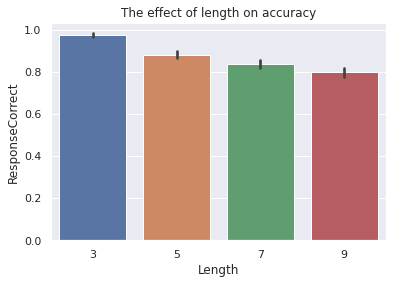

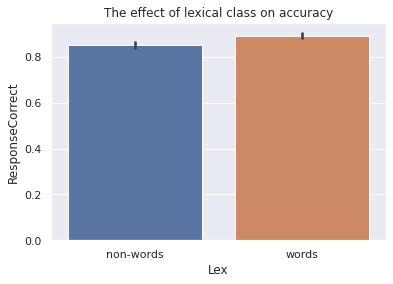

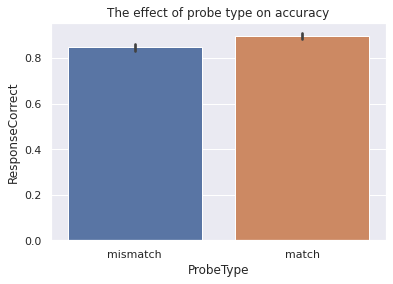

In [ ]:
pl.figure()
sns.barplot('Length', 'ResponseCorrect', data=eeg_no_trials)
pl.title('The effect of length on accuracy');

pl.figure()
fig = sns.barplot('Lex', 'ResponseCorrect', data=eeg_no_trials)
fig.set_xticklabels(['non-words', 'words'])
pl.title('The effect of lexical class on accuracy');

pl.figure()
fig = sns.barplot('ProbeType', 'ResponseCorrect', data=eeg_no_trials)
fig.set_xticklabels(['mismatch', 'match'])
pl.title('The effect of probe type on accuracy');
x, y = eeg_no_trials[eeg_no_trials['ProbeType'] == 1]['ResponseCorrect'].values, eeg_no_trials[eeg_no_trials['ProbeType'] == 2]['ResponseCorrect'].values
print(ttest(x,y)[1])

In [ ]:
# significance for NW M vs MM 
subset = eeg_no_trials[eeg_no_trials['Lex'] == 0]
x, y = subset[subset['ProbeType'] == 2][['ResponseCorrect']].values, subset[subset['ProbeType'] == 1][['ResponseCorrect']].values
print(ttest(x, y))

# significance for W M vs MM
subset = eeg_no_trials[eeg_no_trials['Lex'] == 1]
x, y = subset[subset['ProbeType'] == 2][['ResponseCorrect']].values, subset[subset['ProbeType'] == 1][['ResponseCorrect']].values
print(ttest(x, y))

# significance for M W vs NW
subset = eeg_no_trials[eeg_no_trials['ProbeType'] == 2]
x, y = subset[subset['Lex'] == 0][['ResponseCorrect']].values, subset[subset['Lex'] == 1][['ResponseCorrect']].values
print(ttest(x, y))

# significance for MM W vs NW
subset = eeg_no_trials[eeg_no_trials['ProbeType'] == 1]
x, y = subset[subset['Lex'] == 0][['ResponseCorrect']].values, subset[subset['Lex'] == 1][['ResponseCorrect']].values
print(ttest(x, y))

Ttest_indResult(statistic=array([5.06943309]), pvalue=array([4.25867878e-07]))
Ttest_indResult(statistic=array([2.38538455]), pvalue=array([0.01713396]))
Ttest_indResult(statistic=array([-1.3682156]), pvalue=array([0.1713619]))
Ttest_indResult(statistic=array([-4.02867251]), pvalue=array([5.76336463e-05]))


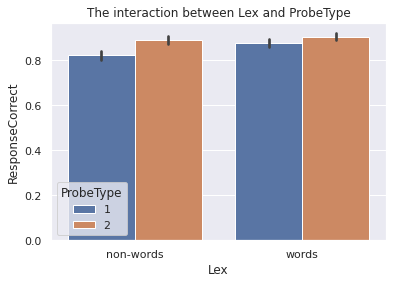

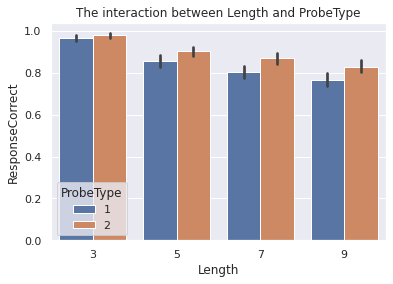

In [ ]:
pl.figure()
ax = sns.barplot(x="Lex", y="ResponseCorrect", hue="ProbeType", data=eeg_no_trials)
ax.set_xticklabels(['non-words', 'words'])
pl.title('The interaction between Lex and ProbeType');

pl.figure()
ax = sns.barplot(x="Length", y="ResponseCorrect", hue="ProbeType", data=eeg_no_trials)
pl.title('The interaction between Length and ProbeType');

Words vs. nonwords

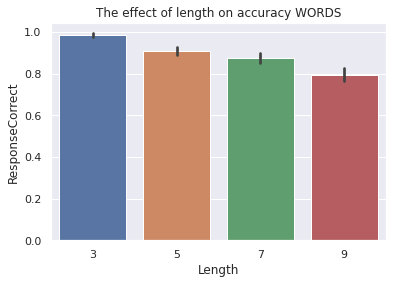

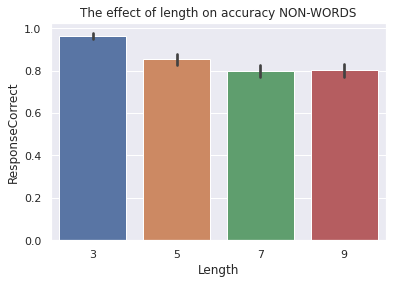

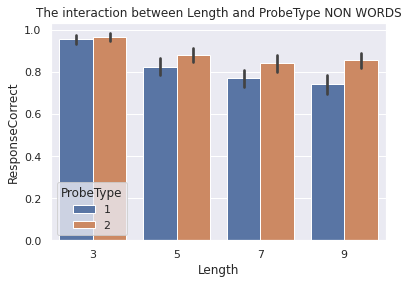

In [ ]:
pl.figure()
ax = sns.barplot(
    eeg_no_trials[eeg_no_trials['Lex'] == 1]['Length'],
    eeg_no_trials.ResponseCorrect
)
pl.title('The effect of length on accuracy WORDS')

pl.figure()
ax = sns.barplot(
    eeg_no_trials[eeg_no_trials['Lex'] == 0]['Length'],
    eeg_no_trials.ResponseCorrect
)
pl.title('The effect of length on accuracy NON-WORDS')

pl.figure()
ax = sns.barplot(
    x="Length", y="ResponseCorrect", hue="ProbeType", data=eeg_no_trials[eeg_no_trials['Lex'] == 0]
    )
pl.title('The interaction between Length and ProbeType NON WORDS');

MATCH VS MISMATCH

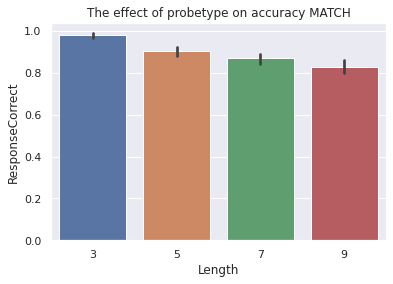

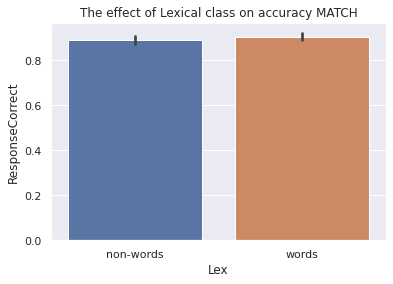

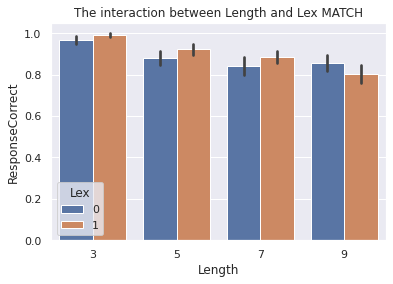

<Figure size 432x288 with 0 Axes>

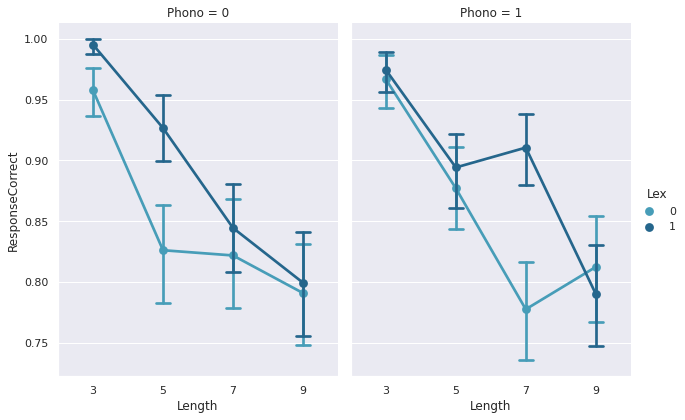

In [ ]:
pl.figure()
ax = sns.barplot(
    eeg_no_trials[eeg_no_trials['ProbeType'] == 2]['Length'],
    eeg_no_trials.ResponseCorrect
)
pl.title('The effect of probetype on accuracy MATCH')

pl.figure()
ax = sns.barplot(
    eeg_no_trials[eeg_no_trials['ProbeType'] == 2]['Lex'],
    eeg_no_trials.ResponseCorrect
)
ax.set_xticklabels(['non-words', 'words'])
pl.title('The effect of Lexical class on accuracy MATCH')

pl.figure()
ax = sns.barplot(
    x="Length", y="ResponseCorrect", hue="Lex", 
    data=eeg_no_trials[eeg_no_trials['ProbeType'] == 2]
    )
pl.title('The interaction between Length and Lex MATCH');

pl.figure()
g = sns.catplot(x="Length", y="ResponseCorrect", hue="Lex", col="Phono",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=eeg_no_trials);

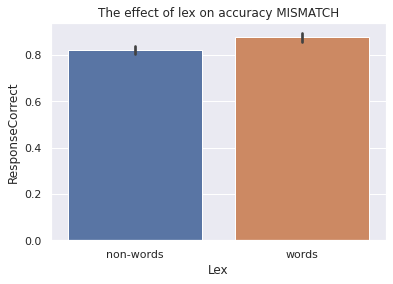

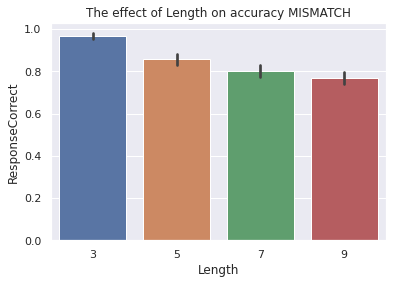

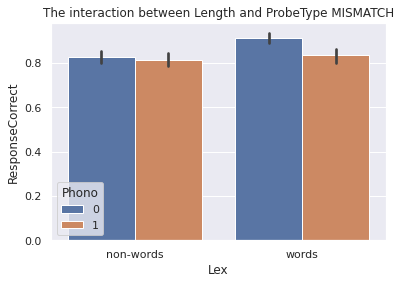

In [ ]:
pl.figure()
ax = sns.barplot(
    eeg_no_trials[eeg_no_trials['ProbeType'] == 1]['Lex'],
    eeg_no_trials.ResponseCorrect
)
ax.set_xticklabels(['non-words', 'words'])
pl.title('The effect of lex on accuracy MISMATCH')

pl.figure()
ax = sns.barplot(
    eeg_no_trials[eeg_no_trials['ProbeType'] == 1]['Length'],
    eeg_no_trials.ResponseCorrect
)
pl.title('The effect of Length on accuracy MISMATCH')

pl.figure()
ax = sns.barplot(
    x="Lex", y="ResponseCorrect", hue="Phono", data=eeg_no_trials[eeg_no_trials['ProbeType'] == 1]
    )
ax.set_xticklabels(['non-words', 'words'])
pl.title('The interaction between Length and ProbeType MISMATCH');

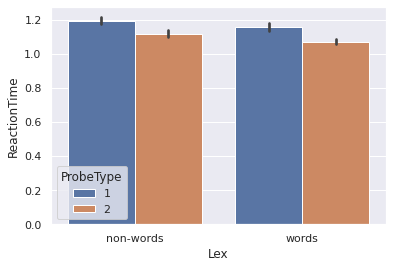

In [ ]:
pl.figure()
ax = sns.barplot(
    x="Lex", y="ReactionTime", hue="ProbeType", data=eeg_no_trials
    )
ax.set_xticklabels(['non-words', 'words']);

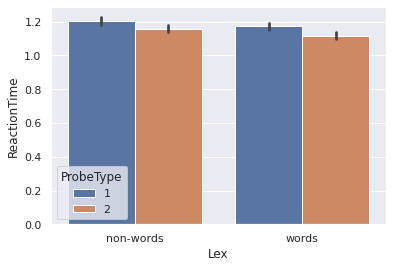

In [ ]:
pl.figure()
ax = sns.barplot(
    x="Lex", y="ReactionTime", hue="ProbeType", data=ieeg_no_outliers
    )
ax.set_xticklabels(['non-words', 'words']);

### Models RT

In [ ]:
%%R -i eeg_rt
m <- lmer('ReactionTime ~ Lex + Length + ProbeType + ProbeType:Length + (1|Subject)', data=eeg_rt)
m1 <- lmer('ReactionTime ~ Lex + Length + ProbeType + ProbeType:Length + (1|Subject)', data=eeg_rt)
anova(m, m1)

R[write to console]: refitting model(s) with ML (instead of REML)



  npar      AIC      BIC    logLik deviance   Chisq Df Pr..Chisq.
1    7 2224.904 2271.151 -1105.452 2210.904      NA NA         NA
2    9 2227.271 2286.731 -1104.635 2209.271 1.63331  2  0.4419074


In [ ]:
mod = Lmer(
    'ReactionTime ~ Lex + Length + ProbeType + Length:ProbeType + (1|Subject)',
    data=eeg_rt
)
mod.fit()

Formula: ReactionTime~Lex+Length+ProbeType+Length:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5468	 Groups: {'Subject': 29.0}

Log-likelihood: -1125.731 	 AIC: 2251.461

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.047  0.216
Residual               0.086  0.293

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          1.096   0.990    1.202  0.054    90.336  20.297  0.000   
Lex                 -0.042  -0.058   -0.027  0.008  5435.002  -5.300  0.000   
Length               0.032   0.021    0.043  0.006  5435.353   5.759  0.000   
ProbeType           -0.032  -0.077    0.013  0.023  5435.350  -1.407  0.159   
Length:ProbeType    -0.009  -0.016   -0.002  0.004  5435.376  -2.585  0.010   

                  Sig  
(Intercept)       ***  
Lex               ***  
Length            ***  
ProbeType              
Length:ProbeType   **

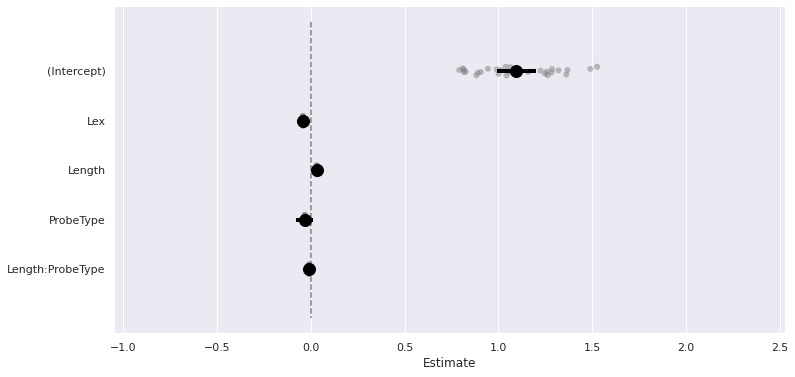

In [ ]:
mod.plot_summary()

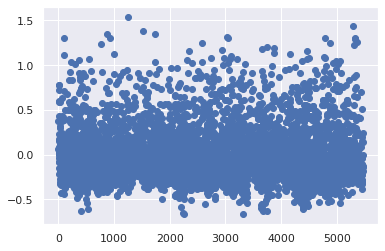

In [ ]:
plot(mod.residuals, 'o');

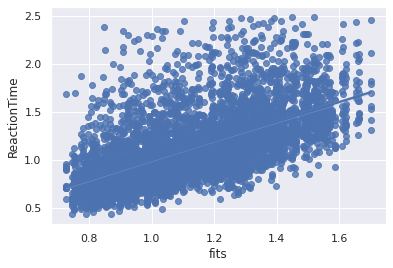

In [ ]:
sns.regplot(x="fits", y="ReactionTime", data=mod.data, fit_reg=True)

**Words vs. Nonwords**

Words

In [ ]:
%%R -i words_eeg
m <- lmer('stdRT ~ ProbeType + Phono + Length + Phono:ProbeType + (1|Subject)', data=words_eeg)
m1 <- lmer('stdRT ~ ProbeType + Phono + Length + Phono:ProbeType + Length:ProbeType:Phono + (1|Subject)', data=words_eeg)
anova(m, m1)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    7 6518.177 6559.597 -3252.089 6504.177        NA NA         NA
2    8 6519.748 6567.085 -3251.874 6503.748 0.4295147  1  0.5122272


In [ ]:
m1 = Lmer(
    'stdRT ~ ProbeType + Phono + Length + Phono:ProbeType + (1|Subject)',
    data=words_eeg
)
m1.fit()

Formula: stdRT~ProbeType+Phono+Length+Phono:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2744	 Groups: {'Subject': 29.0}

Log-likelihood: -3264.553 	 AIC: 6529.106

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.365  0.604
Residual               0.601  0.775

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)        -0.112  -0.379    0.156  0.137    59.346  -0.817  0.417   
ProbeType          -0.167  -0.247   -0.086  0.041  2711.180  -4.055  0.000   
Phono               0.310   0.121    0.499  0.096  2711.205   3.218  0.001   
Length              0.048   0.035    0.061  0.007  2711.009   7.170  0.000   
ProbeType:Phono    -0.168  -0.285   -0.051  0.060  2711.240  -2.824  0.005   

                 Sig  
(Intercept)           
ProbeType        ***  
Phono             **  
Length           ***  
ProbeType:Phono   **

Non-words

In [ ]:
%%R -i nonwords_eeg
m <- lmer('stdRT ~ ProbeType + Length + (1|Subject)', data=nonwords_eeg)
m1 <- lmer('stdRT ~ ProbeType + Length + Length:Phono + (1|Subject)', data=nonwords_eeg)
anova(m, m1)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    5 6768.614 6798.164 -3379.307 6758.614        NA NA         NA
2    6 6770.163 6805.622 -3379.081 6758.163 0.4519444  1   0.501413


In [ ]:
m2 = Lmer(
    'stdRT ~ ProbeType + Length + (1|Subject)',
    data=nonwords_eeg
)
m2.fit()

Formula: stdRT~ProbeType+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2724	 Groups: {'Subject': 29.0}

Log-likelihood: -3387.197 	 AIC: 6774.393

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.332  0.577
Residual               0.673  0.820

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.092  -0.153    0.337  0.125    50.184   0.735  0.466     
ProbeType      -0.228  -0.290   -0.166  0.032  2693.319  -7.235  0.000  ***
Length          0.053   0.039    0.066  0.007  2693.021   7.474  0.000  ***

**Match vs Mismatch**

Match

In [ ]:
%%R -i match_eeg
m <- lmer('stdRT ~ Length + Lex + (1|Subject)', data=match_eeg)
m1 <- lmer('stdRT ~ Length + Lex + Lex:Phono + (1|Subject)', data=match_eeg)
anova(m, m1)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    5 6307.114 6336.717 -3148.557 6297.114        NA NA         NA
2    6 6308.904 6344.426 -3148.452 6296.904 0.2107477  1   0.646182


In [ ]:
mod1 = Lmer(
    'stdRT ~ Length + Lex + (1|Subject)',
    data=match_eeg
)
mod1.fit()

Formula: stdRT~Length+Lex+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2753	 Groups: {'Subject': 29.0}

Log-likelihood: -3156.739 	 AIC: 6313.477

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.274  0.524
Residual               0.554  0.744

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.285  -0.494   -0.076  0.107    38.679  -2.676  0.011    *
Length          0.039   0.026    0.052  0.006  2722.368   6.093  0.000  ***
Lex            -0.122  -0.178   -0.066  0.028  2722.052  -4.285  0.000  ***

Mismatch

In [ ]:
%%R -i mismatch_eeg
m <- lmer('stdRT ~ Lex + Length + Phono + Phono:Lex + (1|Subject)', data=mismatch_eeg)
m1 <- lmer('stdRT ~ Lex + Length + Phono + Phono:Lex + Length:Lex:Phono + (1|Subject)', data=mismatch_eeg)
anova(m, m1)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    7 6873.366 6914.712 -3429.683 6859.366       NA NA         NA
2    8 6872.332 6919.584 -3428.166 6856.332 3.034366  1 0.08151837


In [ ]:
mod2 = Lmer(
    'stdRT ~ Lex + Length + Phono + Phono:Lex + (1|Subject)',
    data=mismatch_eeg
)
mod2.fit()

Formula: stdRT~Lex+Length+Phono+Phono:Lex+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2715	 Groups: {'Subject': 29.0}

Log-likelihood: -3441.724 	 AIC: 6883.447

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.446  0.668
Residual               0.702  0.838

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.174  -0.438    0.090  0.135    37.549  -1.292  0.204     
Lex            -0.199  -0.287   -0.111  0.045  2682.123  -4.450  0.000  ***
Length          0.063   0.049    0.077  0.007  2682.357   8.824  0.000  ***
Phono          -0.046  -0.133    0.040  0.044  2682.083  -1.050  0.294     
Lex:Phono       0.185   0.058    0.311  0.065  2682.213   2.855  0.004   **

In [ ]:
mod2 = Lmer(
    'stdRT ~ Lex + Length + (1|Subject)',
    data=mismatch_eeg
)
mod2.fit()

Formula: stdRT~Lex+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2715	 Groups: {'Subject': 29.0}

Log-likelihood: -3442.203 	 AIC: 6884.407

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.444  0.666
Residual               0.704  0.839

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.201  -0.461    0.060  0.133    36.023  -1.509  0.140     
Lex            -0.111  -0.174   -0.048  0.032  2684.023  -3.433  0.001  ***
Length          0.064   0.050    0.078  0.007  2684.361   8.931  0.000  ***

**Significant plots**




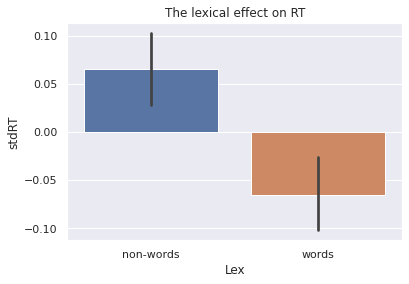

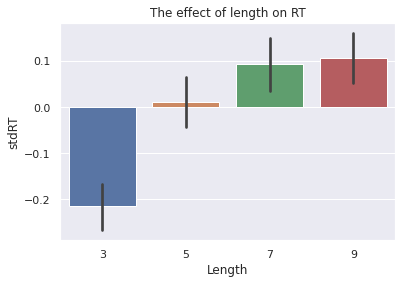

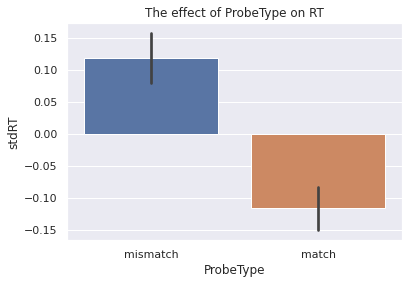

In [ ]:
pl.figure()
ax = sns.barplot(
    eeg_no_trials['Lex'], eeg_no_trials['stdRT']
)
ax.set_xticklabels(['non-words', 'words'])
pl.title('The lexical effect on RT');

pl.figure()
ax = sns.barplot(
    eeg_no_trials['Length'], eeg_no_trials['stdRT']
)
pl.title('The effect of length on RT');

pl.figure()
ax = sns.barplot(
    eeg_no_trials['ProbeType'], eeg_no_trials['stdRT']
)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The effect of ProbeType on RT');

In [ ]:
x, y = eeg_no_trials[eeg_no_trials['ProbeType'] == 1][['ReactionTime']].values, eeg_no_trials[eeg_no_trials['ProbeType'] == 2][['ReactionTime']].values
ttest(x,y)

Ttest_indResult(statistic=array([8.68823194]), pvalue=array([4.83702072e-18]))

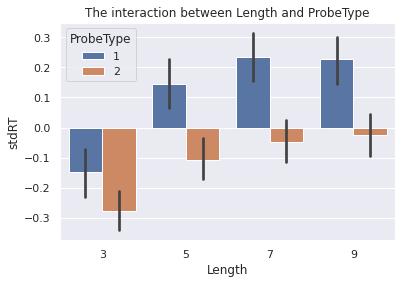

In [ ]:
pl.figure()
ax = sns.barplot(x="Length", y="stdRT", hue="ProbeType", data=eeg_no_trials)
pl.title('The interaction between Length and ProbeType');

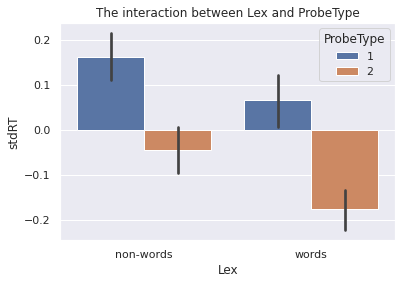

In [ ]:
pl.figure()
ax = sns.barplot(x="Lex", y="stdRT", hue="ProbeType", data=eeg_no_trials)
ax.set_xticklabels(['non-words', 'words'])
pl.title('The interaction between Lex and ProbeType');

In [ ]:
# for W M vs MM
subset = eeg_no_trials[eeg_no_trials['Lex'] == 1]
x, y = subset[subset['ProbeType'] == 2][['stdRT']].values, subset[subset['ProbeType'] == 1][['stdRT']].values
print(ttest(x, y))

# for NW M vs MM
subset = eeg_no_trials[eeg_no_trials['Lex'] == 0]
x, y = subset[subset['ProbeType'] == 2][['stdRT']].values, subset[subset['ProbeType'] == 1][['stdRT']].values
print(ttest(x, y))

# for M W vs NW
subset = eeg_no_trials[eeg_no_trials['ProbeType'] == 2]
x, y = subset[subset['Lex'] == 0][['stdRT']].values, subset[subset['Lex'] == 1][['stdRT']].values
print(ttest(x, y))

# for MM W vs NW
subset = eeg_no_trials[eeg_no_trials['ProbeType'] == 1]
x, y = subset[subset['Lex'] == 0][['stdRT']].values, subset[subset['Lex'] == 1][['stdRT']].values
print(ttest(x, y))

Ttest_indResult(statistic=array([-6.38133126]), pvalue=array([2.08842774e-10]))
Ttest_indResult(statistic=array([-5.43919407]), pvalue=array([5.82810847e-08]))
Ttest_indResult(statistic=array([3.79326601]), pvalue=array([0.00015197]))
Ttest_indResult(statistic=array([2.33145509]), pvalue=array([0.01980365]))


### Position

We have the following division in the 'Position' column: for 3 - 1/1/1. For 5, 2/1/2, For 7, 2/3/2. For 9, 3/3/3. Here we add to the other columns other divisions to ensure that the effects we see are not just because of data devision specifics.

**Creating new position divisions**

In [ ]:
position = eeg[eeg['ProbeType'] == 2]

In [ ]:
# making values in df more 'handy'
whole_list = eeg['StimulusSounds_idx'].values
new_sound_idx = []
for i in whole_list:
  new_sound_idx.append(
      [int(s) for s in re.findall(r'\b\d+\b', i)]
  )

In [ ]:
alt_positions1 = [] # for the new column in df
# 1 - beginning, 2 - middle, 3 - end
ind = eeg['ProbeSound_idx'].values
in_out = eeg['ProbeType'].values
for i in range(0, len(ind)):
  if in_out[i] == 2: # if it is in sequence
    if ind[i] in new_sound_idx[i]:
      # for length of the list 3
      if len(new_sound_idx[i]) == 3:
        if new_sound_idx[i].index(ind[i]) == 0:
          alt_positions1.append(1) # beginning 
        elif new_sound_idx[i].index(ind[i]) == 1:
          alt_positions1.append(2) # middle
        elif new_sound_idx[i].index(ind[i]) == 2:
          alt_positions1.append(3) # end
      
      # for length of the list 5
      ## revise!
      elif len(new_sound_idx[i]) == 5:
        if new_sound_idx[i].index(ind[i]) == 0:
          alt_positions1.append(1) # beginning 
        elif new_sound_idx[i].index(ind[i]) in [1, 2, 3]:
          alt_positions1.append(2) # middle
        elif new_sound_idx[i].index(ind[i]) == 4:
          alt_positions1.append(3) # end

      # for length of the list 7
      elif len(new_sound_idx[i]) == 7:
        if new_sound_idx[i].index(ind[i]) in [0, 1, 2]:
          alt_positions1.append(1) # beginning 
        elif new_sound_idx[i].index(ind[i]) == 3:
          alt_positions1.append(2) # middle
        elif new_sound_idx[i].index(ind[i]) in [4, 5, 6]:
          alt_positions1.append(3) # end
      
      # for length of the list 9
      elif len(new_sound_idx[i]) == 9:
        if new_sound_idx[i].index(ind[i]) in [0, 1, 2]:
          alt_positions1.append(1) # beginning 
        elif new_sound_idx[i].index(ind[i]) in [3, 4, 5]:
          alt_positions1.append(2) # middle
        elif new_sound_idx[i].index(ind[i]) in [6, 7, 8]:
          alt_positions1.append(3) # end
    else:
      print('Check', i)
      break  
  elif in_out[i] == 1:
    alt_positions1.append(0) # if it is out of sequence it is not in the list
  else:
    print('Check', i)
    break

In [ ]:
# disregarding all the positions except when it's from the very first place, middle or last
alt_positions2 = [] # for the new column in df
# 1 - beginning, 2 - middle, 3 - end
ind = eeg['ProbeSound_idx'].values
in_out = eeg['ProbeType'].values
for i in range(0, len(ind)):
  if in_out[i] == 2: # if it is in sequence
    if ind[i] in new_sound_idx[i]:
      # for length of the list 3
      if len(new_sound_idx[i]) == 3:
        if new_sound_idx[i].index(ind[i]) == 0:
          alt_positions2.append(1) # beginning 
        elif new_sound_idx[i].index(ind[i]) == 1:
          alt_positions2.append(2) # middle
        elif new_sound_idx[i].index(ind[i]) == 2:
          alt_positions2.append(3) # end
      
      # for length of the list 5
      ## revise!
      elif len(new_sound_idx[i]) == 5:
        if new_sound_idx[i].index(ind[i]) == 0:
          alt_positions2.append(1) # beginning 
        elif new_sound_idx[i].index(ind[i]) == 2:
          alt_positions2.append(2) # middle
        elif new_sound_idx[i].index(ind[i]) == 4:
          alt_positions2.append(3) # end
        elif new_sound_idx[i].index(ind[i]) in [1, 3]:
          alt_positions2.append(0)

      # for length of the list 7
      elif len(new_sound_idx[i]) == 7:
        if new_sound_idx[i].index(ind[i]) == 0:
          alt_positions2.append(1) # beginning 
        elif new_sound_idx[i].index(ind[i]) == 3:
          alt_positions2.append(2) # middle
        elif new_sound_idx[i].index(ind[i]) == 6:
          alt_positions2.append(3) # end
        elif new_sound_idx[i].index(ind[i]) in [1, 2, 4, 5]:
          alt_positions2.append(0)
      
      # for length of the list 9
      elif len(new_sound_idx[i]) == 9:
        if new_sound_idx[i].index(ind[i]) == 0:
          alt_positions2.append(1) # beginning 
        elif new_sound_idx[i].index(ind[i]) == 4:
          alt_positions2.append(2) # middle
        elif new_sound_idx[i].index(ind[i]) == 8:
          alt_positions2.append(3) # end
        elif new_sound_idx[i].index(ind[i]) in [1, 2, 3, 5, 6, 7]:
          alt_positions2.append(0)
    else:
      print('Check', i)
      break  
  elif in_out[i] == 1:
    alt_positions2.append(0) # if it is out of sequence it is not in the list
  else:
    print('Check', i)
    break

In [ ]:
eeg['Position1'] = alt_positions1
eeg['Position2'] = alt_positions2

**Accuracy for position 1**

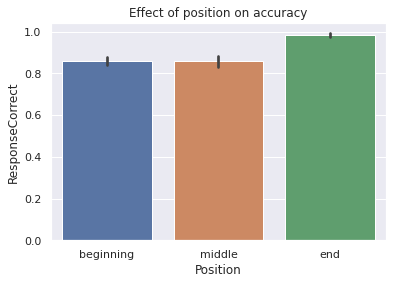

In [ ]:
pl.figure()
fig = sns.barplot(position['Position'], position['ResponseCorrect'])
fig.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Effect of position on accuracy');

In [ ]:
print('Ttest for position 1 vs 2')
x, y = position[position['Position'] == 1][['ResponseCorrect']].values, position[position['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3')
x, y = position[position['Position'] == 2][['ResponseCorrect']].values, position[position['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3')
x, y = position[position['Position'] == 1][['ResponseCorrect']].values, position[position['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y))

Ttest for position 1 vs 2
Ttest_indResult(statistic=array([0.03041106]), pvalue=array([0.97574252]))
Ttest for position 2 vs 3
Ttest_indResult(statistic=array([-9.90658794]), pvalue=array([3.31257476e-22]))
Ttest for position 1 vs 3
Ttest_indResult(statistic=array([-10.8051565]), pvalue=array([3.50286931e-26]))


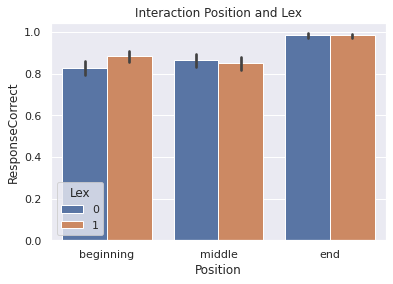

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'ResponseCorrect', hue = 'Lex',
    data = position
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Lex');

In [ ]:
print('WORDS')
print('Ttest for position 1 vs 2 Words')
subset = position[position['Lex'] == 1]
x, y = subset[subset['Position'] == 1][['ResponseCorrect']].values, subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Words')
subset = position[position['Lex'] == 1]
x, y = subset[subset['Position'] == 3][['ResponseCorrect']].values, subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Words')
subset = position[position['Lex'] == 1]
x, y = subset[subset['Position'] == 1][['ResponseCorrect']].values, subset[subset['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y))

print('NON WORDS')
print('Ttest for position 1 vs 2 Non-Words')
subset = position[position['Lex'] == 0]
x, y = subset[subset['Position'] == 1][['ResponseCorrect']].values, subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Non-Words')
subset = position[position['Lex'] == 0]
x, y = subset[subset['Position'] == 3][['ResponseCorrect']].values, subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Non-Words')
subset = position[position['Lex'] == 0]
x, y = subset[subset['Position'] == 1][['ResponseCorrect']].values, subset[subset['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y))

print('POSITION')
print('Position 1 W vs NW')
subset = position[position['Position'] == 1]
x, y = subset[subset['Lex'] == 0][['ResponseCorrect']].values, subset[subset['Lex'] == 1][['ResponseCorrect']].values
print(ttest(x,y))

print('Position 2 W vs NW')
subset = position[position['Position'] == 2]
x, y = subset[subset['Lex'] == 0][['ResponseCorrect']].values, subset[subset['Lex'] == 1][['ResponseCorrect']].values
print(ttest(x,y))

print('Position 3 W vs NW')
subset = position[position['Position'] == 3]
x, y = subset[subset['Lex'] == 0][['ResponseCorrect']].values, subset[subset['Lex'] == 1][['ResponseCorrect']].values
print(ttest(x,y))

WORDS
Ttest for position 1 vs 2 Words
Ttest_indResult(statistic=array([1.44912469]), pvalue=array([0.14767884]))
Ttest for position 2 vs 3 Words
Ttest_indResult(statistic=array([7.22845868]), pvalue=array([1.79314275e-12]))
Ttest for position 1 vs 3 Words
Ttest_indResult(statistic=array([-7.12523797]), pvalue=array([2.22974498e-12]))
NON WORDS
Ttest for position 1 vs 2 Non-Words
Ttest_indResult(statistic=array([-1.61787266]), pvalue=array([0.10605108]))
Ttest for position 2 vs 3 Non-Words
Ttest_indResult(statistic=array([6.76694931]), pvalue=array([3.25015221e-11]))
Ttest for position 1 vs 3 Non-Words
Ttest_indResult(statistic=array([-8.20451802]), pvalue=array([1.66072228e-15]))
POSITION
Position 1 W vs NW
Ttest_indResult(statistic=array([-2.48570482]), pvalue=array([0.01311996]))
Position 2 W vs NW
Ttest_indResult(statistic=array([0.65080014]), pvalue=array([0.51535131]))
Position 3 W vs NW
Ttest_indResult(statistic=array([-0.00403405]), pvalue=array([0.9967823]))


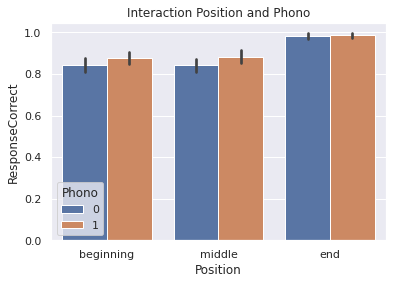

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'ResponseCorrect', hue = 'Phono',
    data = position
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Phono');

In [ ]:
print('HIGH')
print('Ttest for position 1 vs 2 High')
subset = position[position['Phono'] == 0]
x, y = subset[subset['Position'] == 1][['ResponseCorrect']].values, subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 High')
subset = position[position['Phono'] == 0]
x, y = subset[subset['Position'] == 3][['ResponseCorrect']].values, subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 High')
subset = position[position['Phono'] == 0]
x, y = subset[subset['Position'] == 1][['ResponseCorrect']].values, subset[subset['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y))

print('Low')
print('Ttest for position 1 vs 2 Low')
subset = position[position['Phono'] == 1]
x, y = subset[subset['Position'] == 1][['ResponseCorrect']].values, subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Low')
subset = position[position['Phono'] == 1]
x, y = subset[subset['Position'] == 3][['ResponseCorrect']].values, subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Low')
subset = position[position['Phono'] == 1]
x, y = subset[subset['Position'] == 1][['ResponseCorrect']].values, subset[subset['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y))

print('POSITION')
print('Position 1 H vs L')
subset = position[position['Position'] == 1]
x, y = subset[subset['Phono'] == 0][['ResponseCorrect']].values, subset[subset['Phono'] == 1][['ResponseCorrect']].values
print(ttest(x,y))

print('Position 2 H vs L')
subset = position[position['Position'] == 2]
x, y = subset[subset['Phono'] == 0][['ResponseCorrect']].values, subset[subset['Phono'] == 1][['ResponseCorrect']].values
print(ttest(x,y))

print('Position 3 H vs L')
subset = position[position['Position'] == 3]
x, y = subset[subset['Phono'] == 0][['ResponseCorrect']].values, subset[subset['Phono'] == 1][['ResponseCorrect']].values
print(ttest(x,y))

HIGH
Ttest for position 1 vs 2 High
Ttest_indResult(statistic=array([-0.04555779]), pvalue=array([0.96367155]))
Ttest for position 2 vs 3 High
Ttest_indResult(statistic=array([8.05202944]), pvalue=array([3.68572244e-15]))
Ttest for position 1 vs 3 High
Ttest_indResult(statistic=array([-8.11315525]), pvalue=array([2.31412544e-15]))
Low
Ttest for position 1 vs 2 Low
Ttest_indResult(statistic=array([-0.26948367]), pvalue=array([0.78763149]))
Ttest for position 2 vs 3 Low
Ttest_indResult(statistic=array([5.64128247]), pvalue=array([3.09930166e-08]))
Ttest for position 1 vs 3 Low
Ttest_indResult(statistic=array([-7.124529]), pvalue=array([2.58456024e-12]))
POSITION
Position 1 H vs L
Ttest_indResult(statistic=array([-1.53564916]), pvalue=array([0.12493015]))
Position 2 H vs L
Ttest_indResult(statistic=array([-1.60460912]), pvalue=array([0.108975]))
Position 3 H vs L
Ttest_indResult(statistic=array([-0.13505454]), pvalue=array([0.89260378]))


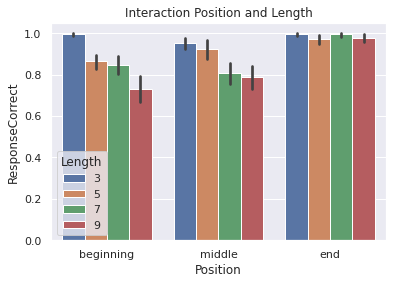

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'ResponseCorrect', hue = 'Length',
    data = position
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Length');

In [ ]:
print('Beginning') 
subset = position[position['Position'] == 1]
print('Length 3 vs 5')
x = subset[subset['Length'] == 3][['ResponseCorrect']].values
y = subset[subset['Length'] == 5][['ResponseCorrect']].values
print(ttest(x,y))
print('Length 5 vs 7')
x = subset[subset['Length'] == 5][['ResponseCorrect']].values
y = subset[subset['Length'] == 7][['ResponseCorrect']].values
print(ttest(x,y))
print('Length 7 vs 9')
x = subset[subset['Length'] == 7][['ResponseCorrect']].values
y = subset[subset['Length'] == 9][['ResponseCorrect']].values
print(ttest(x,y))
print('Length 3 vs 7')
x = subset[subset['Length'] == 3][['ResponseCorrect']].values
y = subset[subset['Length'] == 7][['ResponseCorrect']].values
print(ttest(x,y))

Beginning
Length 3 vs 5
Ttest_indResult(statistic=array([7.37243854]), pvalue=array([8.12919033e-13]))
Length 5 vs 7
Ttest_indResult(statistic=array([0.6182236]), pvalue=array([0.53672999]))
Length 7 vs 9
Ttest_indResult(statistic=array([2.9580041]), pvalue=array([0.00327668]))
Length 3 vs 7
Ttest_indResult(statistic=array([6.20115804]), pvalue=array([2.31011712e-09]))


In [ ]:
print('Middle') 
subset = position[position['Position'] == 2]
print('Length 3 vs 5')
x = subset[subset['Length'] == 3][['ResponseCorrect']].values
y = subset[subset['Length'] == 5][['ResponseCorrect']].values
print(ttest(x,y))
print('Length 5 vs 7')
x = subset[subset['Length'] == 5][['ResponseCorrect']].values
y = subset[subset['Length'] == 7][['ResponseCorrect']].values
print(ttest(x,y))
print('Length 7 vs 9')
x = subset[subset['Length'] == 7][['ResponseCorrect']].values
y = subset[subset['Length'] == 9][['ResponseCorrect']].values
print(ttest(x,y))
print('Length 3 vs 7')
x = subset[subset['Length'] == 3][['ResponseCorrect']].values
y = subset[subset['Length'] == 7][['ResponseCorrect']].values
print(ttest(x,y))

Middle
Length 3 vs 5
Ttest_indResult(statistic=array([0.94410143]), pvalue=array([0.34627419]))
Length 5 vs 7
Ttest_indResult(statistic=array([3.40335157]), pvalue=array([0.00074908]))
Length 7 vs 9
Ttest_indResult(statistic=array([0.5158168]), pvalue=array([0.60622169]))
Length 3 vs 7
Ttest_indResult(statistic=array([5.15351931]), pvalue=array([3.91223428e-07]))


In [ ]:
print('End') 
subset = position[position['Position'] == 3]
print('Length 3 vs 5')
x = subset[subset['Length'] == 3][['ResponseCorrect']].values
y = subset[subset['Length'] == 5][['ResponseCorrect']].values
print(ttest(x,y))
print('Length 5 vs 7')
x = subset[subset['Length'] == 5][['ResponseCorrect']].values
y = subset[subset['Length'] == 7][['ResponseCorrect']].values
print(ttest(x,y))
print('Length 7 vs 9')
x = subset[subset['Length'] == 7][['ResponseCorrect']].values
y = subset[subset['Length'] == 9][['ResponseCorrect']].values
print(ttest(x,y))
print('Length 3 vs 7')
x = subset[subset['Length'] == 3][['ResponseCorrect']].values
y = subset[subset['Length'] == 7][['ResponseCorrect']].values
print(ttest(x,y))

End
Length 3 vs 5
Ttest_indResult(statistic=array([2.01638704]), pvalue=array([0.04483259]))
Length 5 vs 7
Ttest_indResult(statistic=array([-1.82929299]), pvalue=array([0.06841096]))
Length 7 vs 9
Ttest_indResult(statistic=array([1.53144563]), pvalue=array([0.12666947]))
Length 3 vs 7
Ttest_indResult(statistic=array([0.20279215]), pvalue=array([0.83941447]))


In [ ]:
print('Length 3')
subset = position[position['Length'] == 3]
print('Beginning vs. middle')
x = subset[subset['Position'] == 1][['ResponseCorrect']].values
y = subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y)[1])
print('Middle vs. end')
x = subset[subset['Position'] == 3][['ResponseCorrect']].values
y = subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y)[1])
print('Beginning vs. end')
x = subset[subset['Position'] == 1][['ResponseCorrect']].values
y = subset[subset['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y)[1])

print('')
print('Length 5')
subset = position[position['Length'] == 5]
print('Beginning vs. middle')
x = subset[subset['Position'] == 1][['ResponseCorrect']].values
y = subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y)[1])
print('Middle vs. end')
x = subset[subset['Position'] == 3][['ResponseCorrect']].values
y = subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y)[1])
print('Beginning vs. end')
x = subset[subset['Position'] == 1][['ResponseCorrect']].values
y = subset[subset['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y)[1])

print('')
print('Length 7')
subset = position[position['Length'] == 7]
print('Beginning vs. middle')
x = subset[subset['Position'] == 1][['ResponseCorrect']].values
y = subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y)[1])
print('Middle vs. end')
x = subset[subset['Position'] == 3][['ResponseCorrect']].values
y = subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y)[1])
print('Beginning vs. end')
x = subset[subset['Position'] == 1][['ResponseCorrect']].values
y = subset[subset['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y)[1])

print('')
print('Length 9')
subset = position[position['Length'] == 9]
print('Beginning vs. middle')
x = subset[subset['Position'] == 1][['ResponseCorrect']].values
y = subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y)[1])
print('Middle vs. end')
x = subset[subset['Position'] == 3][['ResponseCorrect']].values
y = subset[subset['Position'] == 2][['ResponseCorrect']].values
print(ttest(x,y)[1])
print('Beginning vs. end')
x = subset[subset['Position'] == 1][['ResponseCorrect']].values
y = subset[subset['Position'] == 3][['ResponseCorrect']].values
print(ttest(x,y)[1])

Length 3
Beginning vs. middle
[0.00250206]
Middle vs. end
[0.00205954]
Beginning vs. end
[0.94103909]

Length 5
Beginning vs. middle
[0.0429056]
Middle vs. end
[0.09221007]
Beginning vs. end
[5.16035161e-07]

Length 7
Beginning vs. middle
[0.2682924]
Middle vs. end
[4.55793806e-13]
Beginning vs. end
[3.6327814e-09]

Length 9
Beginning vs. middle
[0.15336435]
Middle vs. end
[5.17246857e-10]
Beginning vs. end
[5.74900642e-13]


**Reaction Time**

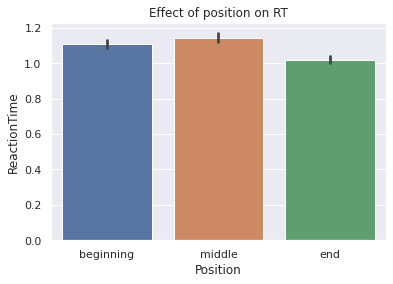

In [ ]:
pl.figure()
fig = sns.barplot(position['Position'], position['ReactionTime'])
fig.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Effect of position on RT');

In [ ]:
print('Position 1 vs 2')
x, y = position[position['Position'] == 1][['ReactionTime']].values, position[position['Position'] == 2][['ReactionTime']].values
print(ttest(x,y))
print('Position 2 vs 3')
x, y = position[position['Position'] == 2][['ReactionTime']].values, position[position['Position'] == 3][['ReactionTime']].values
print(ttest(x,y))
print('Position 1 vs 3')
x, y = position[position['Position'] == 1][['ReactionTime']].values, position[position['Position'] == 3][['ReactionTime']].values
print(ttest(x,y))

Position 1 vs 2
Ttest_indResult(statistic=array([-2.25869328]), pvalue=array([0.02402044]))
Position 2 vs 3
Ttest_indResult(statistic=array([8.04580485]), pvalue=array([1.62717922e-15]))
Position 1 vs 3
Ttest_indResult(statistic=array([6.16018636]), pvalue=array([8.86071942e-10]))


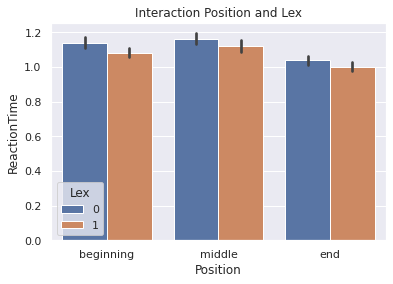

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'ReactionTime', hue = 'Lex',
    data = position
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Lex');

In [ ]:
print('WORDS')
print('Ttest for position 1 vs 2 Words')
subset = position[position['Lex'] == 1]
x, y = subset[subset['Position'] == 1][['ReactionTime']].values, subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Words')
subset = position[position['Lex'] == 1]
x, y = subset[subset['Position'] == 3][['ReactionTime']].values, subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Words')
subset = position[position['Lex'] == 1]
x, y = subset[subset['Position'] == 1][['ReactionTime']].values, subset[subset['Position'] == 3][['ReactionTime']].values
print(ttest(x,y))

print('NON WORDS')
print('Ttest for position 1 vs 2 Non-Words')
subset = position[position['Lex'] == 0]
x, y = subset[subset['Position'] == 1][['ReactionTime']].values, subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Non-Words')
subset = position[position['Lex'] == 0]
x, y = subset[subset['Position'] == 3][['ReactionTime']].values, subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Non-Words')
subset = position[position['Lex'] == 0]
x, y = subset[subset['Position'] == 1][['ReactionTime']].values, subset[subset['Position'] == 3][['ReactionTime']].values
print(ttest(x,y))

print('POSITION')
print('Position 1 W vs NW')
subset = position[position['Position'] == 1]
x, y = subset[subset['Lex'] == 0][['ReactionTime']].values, subset[subset['Lex'] == 1][['ReactionTime']].values
print(ttest(x,y))

print('Position 2 W vs NW')
subset = position[position['Position'] == 2]
x, y = subset[subset['Lex'] == 0][['ReactionTime']].values, subset[subset['Lex'] == 1][['ReactionTime']].values
print(ttest(x,y))

print('Position 3 W vs NW')
subset = position[position['Position'] == 3]
x, y = subset[subset['Lex'] == 0][['ReactionTime']].values, subset[subset['Lex'] == 1][['ReactionTime']].values
print(ttest(x,y))

WORDS
Ttest for position 1 vs 2 Words
Ttest_indResult(statistic=array([-1.75511904]), pvalue=array([0.07959374]))
Ttest for position 2 vs 3 Words
Ttest_indResult(statistic=array([-5.4561435]), pvalue=array([6.46743178e-08]))
Ttest for position 1 vs 3 Words
Ttest_indResult(statistic=array([4.25742782]), pvalue=array([2.2568281e-05]))
NON WORDS
Ttest for position 1 vs 2 Non-Words
Ttest_indResult(statistic=array([-0.9778485]), pvalue=array([0.32841679]))
Ttest for position 2 vs 3 Non-Words
Ttest_indResult(statistic=array([-5.75319958]), pvalue=array([1.23729532e-08]))
Ttest for position 1 vs 3 Non-Words
Ttest_indResult(statistic=array([4.68067497]), pvalue=array([3.34774235e-06]))
POSITION
Position 1 W vs NW
Ttest_indResult(statistic=array([2.6596202]), pvalue=array([0.00795934]))
Position 2 W vs NW
Ttest_indResult(statistic=array([1.75254122]), pvalue=array([0.08003837]))
Position 3 W vs NW
Ttest_indResult(statistic=array([1.85549109]), pvalue=array([0.06388378]))


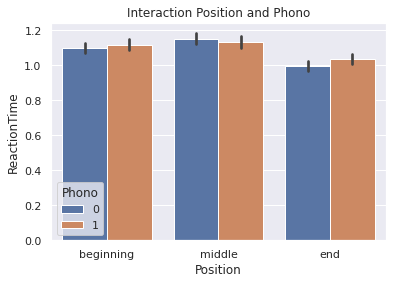

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'ReactionTime', hue = 'Phono',
    data = position
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Phono');

In [ ]:
print('Low')
print('Ttest for position 1 vs 2 Low')
subset = position[position['Phono'] == 1]
x, y = subset[subset['Position'] == 1][['ReactionTime']].values, subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Low')
subset = position[position['Phono'] == 1]
x, y = subset[subset['Position'] == 3][['ReactionTime']].values, subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Low')
subset = position[position['Phono'] == 1]
x, y = subset[subset['Position'] == 1][['ReactionTime']].values, subset[subset['Position'] == 3][['ReactionTime']].values
print(ttest(x,y))

print('High')
print('Ttest for position 1 vs 2 High')
subset = position[position['Phono'] == 0]
x, y = subset[subset['Position'] == 1][['ReactionTime']].values, subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Non-Words')
subset = position[position['Phono'] == 0]
x, y = subset[subset['Position'] == 3][['ReactionTime']].values, subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Non-Words')
subset = position[position['Phono'] == 0]
x, y = subset[subset['Position'] == 1][['ReactionTime']].values, subset[subset['Position'] == 3][['ReactionTime']].values
print(ttest(x,y))

print('POSITION')
print('Position 1 H vs L')
subset = position[position['Position'] == 1]
x, y = subset[subset['Phono'] == 0][['ReactionTime']].values, subset[subset['Phono'] == 1][['ReactionTime']].values
print(ttest(x,y))

print('Position 2 H vs L')
subset = position[position['Position'] == 2]
x, y = subset[subset['Phono'] == 0][['ReactionTime']].values, subset[subset['Phono'] == 1][['ReactionTime']].values
print(ttest(x,y))

print('Position 3 H vs L')
subset = position[position['Position'] == 3]
x, y = subset[subset['Phono'] == 0][['ReactionTime']].values, subset[subset['Phono'] == 1][['ReactionTime']].values
print(ttest(x,y))

Low
Ttest for position 1 vs 2 Low
Ttest_indResult(statistic=array([-0.65763103]), pvalue=array([0.51097085]))
Ttest for position 2 vs 3 Low
Ttest_indResult(statistic=array([-4.31216313]), pvalue=array([1.85392937e-05]))
Ttest for position 1 vs 3 Low
Ttest_indResult(statistic=array([3.9800326]), pvalue=array([7.3883149e-05]))
High
Ttest for position 1 vs 2 High
Ttest_indResult(statistic=array([-2.48815536]), pvalue=array([0.01300015]))
Ttest for position 2 vs 3 Non-Words
Ttest_indResult(statistic=array([-7.15849303]), pvalue=array([1.72177264e-12]))
Ttest for position 1 vs 3 Non-Words
Ttest_indResult(statistic=array([4.94848367]), pvalue=array([8.99616477e-07]))
POSITION
Position 1 H vs L
Ttest_indResult(statistic=array([-0.92024582]), pvalue=array([0.35765503]))
Position 2 H vs L
Ttest_indResult(statistic=array([0.76584757]), pvalue=array([0.44399836]))
Position 3 H vs L
Ttest_indResult(statistic=array([-1.90821603]), pvalue=array([0.05671678]))


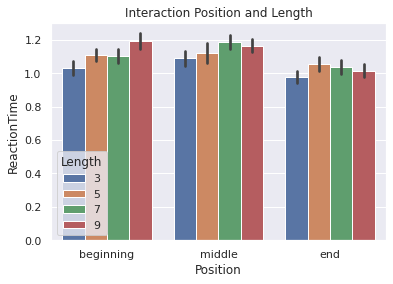

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'ReactionTime', hue = 'Length',
    data = position
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Length');

In [ ]:
print('Length 3')
subset = eeg_no_trials[eeg_no_trials['Length'] == 3]
print('Beginning vs middle')
x = subset[subset['Position'] == 1][['ReactionTime']].values 
y = subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y)[1])
print('Middle vs end')
x = subset[subset['Position'] == 3][['ReactionTime']].values 
y = subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y)[1]) 
print('Beginning vs end')
x = subset[subset['Position'] == 1][['ReactionTime']].values 
y = subset[subset['Position'] == 3][['ReactionTime']].values 
print(ttest(x,y)[1])

print('')
print('Length 5')
subset = eeg_no_trials[eeg_no_trials['Length'] == 5]
print('Beginning vs middle')
x = subset[subset['Position'] == 1][['ReactionTime']].values 
y = subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y)[1])
print('Middle vs end')
x = subset[subset['Position'] == 3][['ReactionTime']].values 
y = subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y)[1]) 
print('Beginning vs end')
x = subset[subset['Position'] == 1][['ReactionTime']].values 
y = subset[subset['Position'] == 3][['ReactionTime']].values
print(ttest(x,y)[1]) 

print('')
print('Length 7')
subset = eeg_no_trials[eeg_no_trials['Length'] == 7]
print('Beginning vs middle')
x = subset[subset['Position'] == 1][['ReactionTime']].values 
y = subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y)[1])
print('Middle vs end')
x = subset[subset['Position'] == 3][['ReactionTime']].values 
y = subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y)[1]) 
print('Beginning vs end')
x = subset[subset['Position'] == 1][['ReactionTime']].values 
y = subset[subset['Position'] == 3][['ReactionTime']].values
print(ttest(x,y)[1]) 

print('')
print('Length 9')
subset = eeg_no_trials[eeg_no_trials['Length'] == 9]
print('Beginning vs middle')
x = subset[subset['Position'] == 1][['ReactionTime']].values 
y = subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y)[1])
print('Middle vs end')
x = subset[subset['Position'] == 3][['ReactionTime']].values 
y = subset[subset['Position'] == 2][['ReactionTime']].values
print(ttest(x,y)[1]) 
print('Beginning vs end')
x = subset[subset['Position'] == 1][['ReactionTime']].values 
y = subset[subset['Position'] == 3][['ReactionTime']].values
print(ttest(x,y)[1]) 

Length 3
Beginning vs middle
[0.05106824]
Middle vs end
[0.0001317]
Beginning vs end
[0.06862791]

Length 5
Beginning vs middle
[0.76766594]
Middle vs end
[0.07903414]
Beginning vs end
[0.04817346]

Length 7
Beginning vs middle
[0.00857184]
Middle vs end
[2.19842841e-06]
Beginning vs end
[0.02374432]

Length 9
Beginning vs middle
[0.39708653]
Middle vs end
[4.31891102e-07]
Beginning vs end
[3.25956409e-08]


In [ ]:
print('Beginning')
subset = eeg_no_trials[eeg_no_trials['Position'] == 1]
print('Length 3 vs 5')
x = subset[subset['Length'] == 3][['ReactionTime']].values 
y = subset[subset['Length'] == 5][['ReactionTime']].values
print(ttest(x,y))
print('Length 5 vs 7')
x = subset[subset['Length'] == 5][['ReactionTime']].values 
y = subset[subset['Length'] == 7][['ReactionTime']].values
print(ttest(x,y))
print('Length 7 vs 9')
x = subset[subset['Length'] == 7][['ReactionTime']].values 
y = subset[subset['Length'] == 9][['ReactionTime']].values
print(ttest(x,y))

Beginning
Length 3 vs 5
Ttest_indResult(statistic=array([-2.84241754]), pvalue=array([0.00466048]))
Length 5 vs 7
Ttest_indResult(statistic=array([0.20984148]), pvalue=array([0.8338731]))
Length 7 vs 9
Ttest_indResult(statistic=array([-2.75474609]), pvalue=array([0.00612316]))


In [ ]:
print('Middle')
subset = eeg_no_trials[eeg_no_trials['Position'] == 2]
print('Length 3 vs 5')
x = subset[subset['Length'] == 3][['ReactionTime']].values 
y = subset[subset['Length'] == 5][['ReactionTime']].values
print(ttest(x,y))
print('Length 5 vs 7')
x = subset[subset['Length'] == 5][['ReactionTime']].values 
y = subset[subset['Length'] == 7][['ReactionTime']].values
print(ttest(x,y))
print('Length 7 vs 9')
x = subset[subset['Length'] == 7][['ReactionTime']].values 
y = subset[subset['Length'] == 9][['ReactionTime']].values
print(ttest(x,y))

Middle
Length 3 vs 5
Ttest_indResult(statistic=array([-0.76179523]), pvalue=array([0.44690237]))
Length 5 vs 7
Ttest_indResult(statistic=array([-1.76338637]), pvalue=array([0.07900491]))
Length 7 vs 9
Ttest_indResult(statistic=array([0.69262418]), pvalue=array([0.48886895]))


In [ ]:
print('End')
subset = eeg_no_trials[eeg_no_trials['Position'] == 3]
print('Length 3 vs 5')
x = subset[subset['Length'] == 3][['ReactionTime']].values 
y = subset[subset['Length'] == 5][['ReactionTime']].values
print(ttest(x,y))
print('Length 5 vs 7')
x = subset[subset['Length'] == 7][['ReactionTime']].values 
y = subset[subset['Length'] == 5][['ReactionTime']].values
print(ttest(x,y))
print('Length 7 vs 9')
x = subset[subset['Length'] == 7][['ReactionTime']].values 
y = subset[subset['Length'] == 9][['ReactionTime']].values
print(ttest(x,y))

End
Length 3 vs 5
Ttest_indResult(statistic=array([-2.77784808]), pvalue=array([0.00571785]))
Length 5 vs 7
Ttest_indResult(statistic=array([-0.69736391]), pvalue=array([0.48600642]))
Length 7 vs 9
Ttest_indResult(statistic=array([0.63294856]), pvalue=array([0.52714996]))


**Position 2**

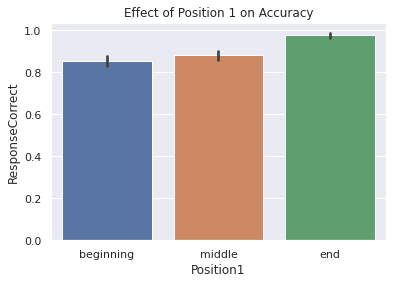

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position1', y = 'ResponseCorrect', 
    data = eeg_no_trials[eeg_no_trials['Position1'] != 0]
)
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Effect of Position 1 on Accuracy');

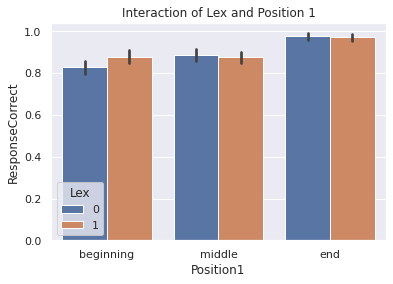

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position1',
    y = 'ResponseCorrect', hue = 'Lex',
    data = eeg_no_trials[eeg_no_trials['Position1'] != 0]
)
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction of Lex and Position 1');

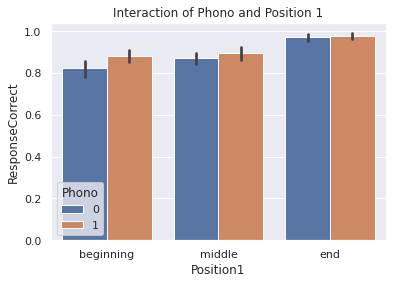

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position1',
    y = 'ResponseCorrect', hue = 'Phono',
    data = eeg_no_trials[eeg_no_trials['Position1'] != 0]
)
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction of Phono and Position 1');

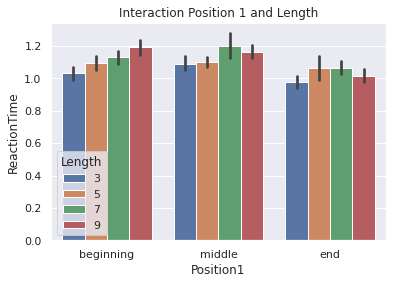

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position1', y = 'ReactionTime', hue = 'Length',
    data = eeg_no_trials[eeg_no_trials['Position'] != 0]
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position 1 and Length');

**Position 3**

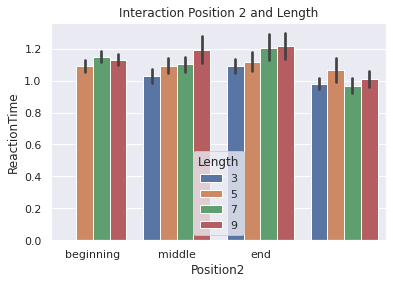

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position2', y = 'ReactionTime', hue = 'Length',
    data = eeg_no_trials[eeg_no_trials['Position'] != 0]
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position 2 and Length');

### Models with position

In [ ]:
%%R -i eeg_no_trials
m <- lmer('ResponseCorrect ~ Length + Lex + ProbeType + Position + Lex:ProbeType + Position:Length + Length:ProbeType + (1|Subject)', data=eeg_no_trials)
m1 <- lmer('ResponseCorrect ~ Length + Lex + ProbeType + Position + Lex:ProbeType + Position:Length + Length:ProbeType + Lex:Position:ProbeType + (1|Subject)', data=eeg_no_trials)
anova(m, m1)

  npar      AIC      BIC    logLik deviance   Chisq Df Pr..Chisq.
1   10 3142.894 3208.961 -1561.447 3122.894      NA NA         NA
2   11 3141.968 3214.641 -1559.984 3119.968 2.92602  1 0.08716211


In [ ]:
mod = Lmer(
    'ResponseCorrect ~ Length + Lex + ProbeType + Position + Lex:ProbeType + Position:Length + Length:ProbeType + (1|Subject)',
    data=eeg_no_trials
)
mod.fit()

Formula: ResponseCorrect~Length+Lex+ProbeType+Position+Lex:ProbeType+Position:Length+Length:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5468	 Groups: {'Subject': 29.0}

Log-likelihood: -1594.817 	 AIC: 3189.635

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.038
Residual               0.103  0.321

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          0.903   0.785    1.020  0.060  5254.623  15.081  0.000   
Length              -0.004  -0.022    0.014  0.009  5434.666  -0.442  0.658   
Lex                  0.099   0.045    0.153  0.028  5433.131   3.598  0.000   
ProbeType            0.115   0.017    0.213  0.050  5432.844   2.294  0.022   
Position            -0.047  -0.088   -0.005  0.021  5433.015  -2.199  0.028   
Lex:ProbeType       -0.042  -0.076   -0.007  0.017  5433.338  -2.382  0.017   
Length:Position      0.018   0.012    0.025  0.003  5433.330   5.397  0.000   
Length:ProbeType    -0.029  -0.044   -0.013  0.008  5433.379  -3.643  0.000   

                  Sig  
(Intercept)       ***  
Length                 
Lex               ***  
ProbeType           *  
Position            *  
Lex:ProbeType       *  
Length:Position   ***  
Length:ProbeType  ***

In [ ]:
%%R -i position
m <- lmer('stdRT ~ Lex + Length + Position + Length:Position + (1|Subject)', data=position)
m1 <- lmer('stdRT ~ Lex + Length + Position + Length:Position + Length:Position:Lex + (1|Subject)', data=position)
anova(m, m1)

  npar       AIC       BIC   logLik  deviance     Chisq Df Pr..Chisq.
1    7 -250.9716 -209.5285 132.4858 -264.9716        NA NA         NA
2    8 -249.0947 -201.7311 132.5473 -265.0947 0.1230773  1  0.7257205


In [ ]:
mod1 = Lmer(
    'stdRT ~ Lex + Length + Position + Length:Position + (1|Subject)',
    data=position
)
mod1.fit()

Formula: stdRT~Lex+Length+Position+Length:Position+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2753	 Groups: {'Subject': 29.0}

Log-likelihood: 111.395 	 AIC: -222.790

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.032  0.180
Residual               0.051  0.226

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)        -0.046  -0.137    0.046  0.047   103.084  -0.975  0.332   
Lex                -0.043  -0.060   -0.026  0.009  2720.038  -5.018  0.000   
Length              0.030   0.020    0.040  0.005  2720.023   5.857  0.000   
Position            0.010  -0.019    0.040  0.015  2720.054   0.687  0.492   
Length:Position    -0.008  -0.013   -0.003  0.002  2720.072  -3.416  0.001   

                 Sig  
(Intercept)           
Lex              ***  
Length           ***  
Position              
Length:Position  ***

# iEEG dataset

### Accuracy line plots

**PLOTS**

BOTH MATCH AND MISMATCH

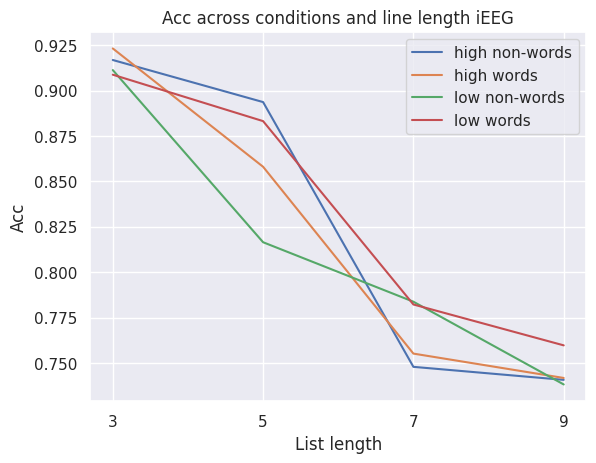

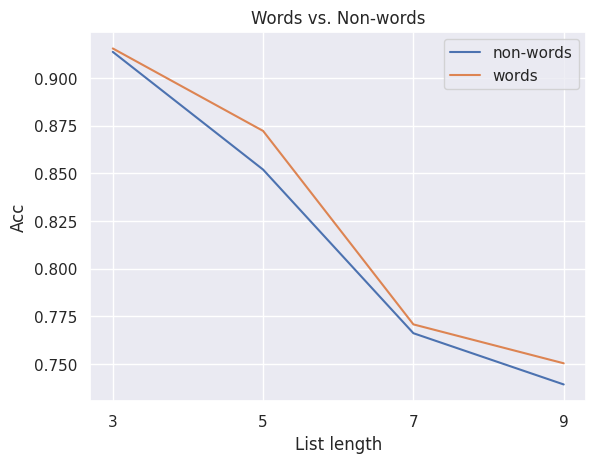

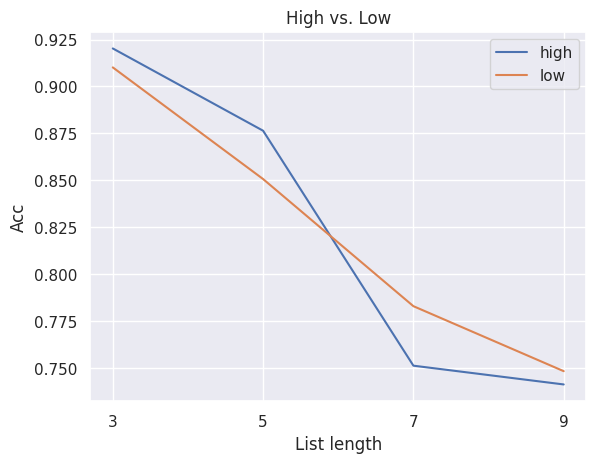

In [20]:
pl.figure()
subset = ieeg.groupby(['ProbeCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.ProbeCategory.unique())
pl.title('Acc across conditions and line length iEEG');

pl.figure()
subset = ieeg.groupby(['Lex', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Words vs. Non-words');

pl.figure()
subset = ieeg.groupby(['Phono', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('High vs. Low');

ONLY MATCH

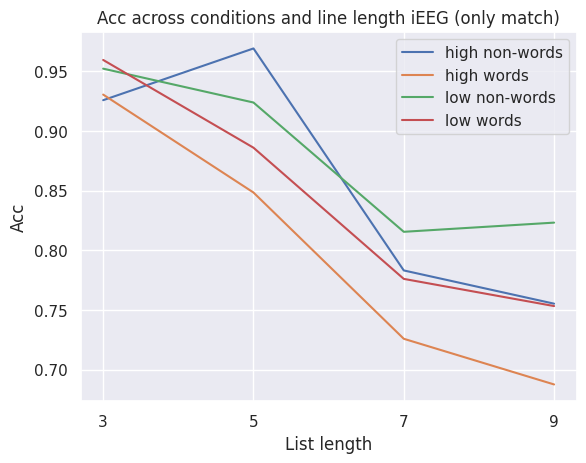

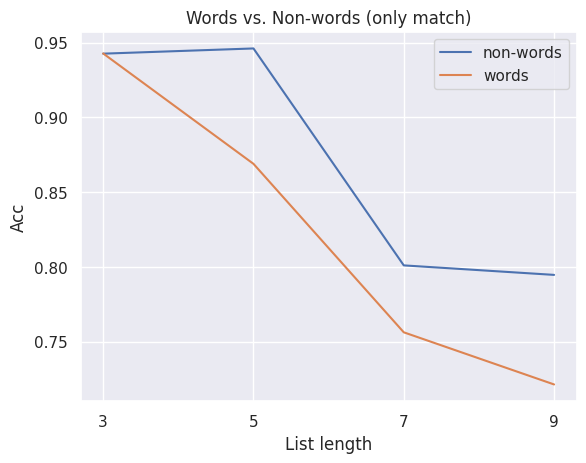

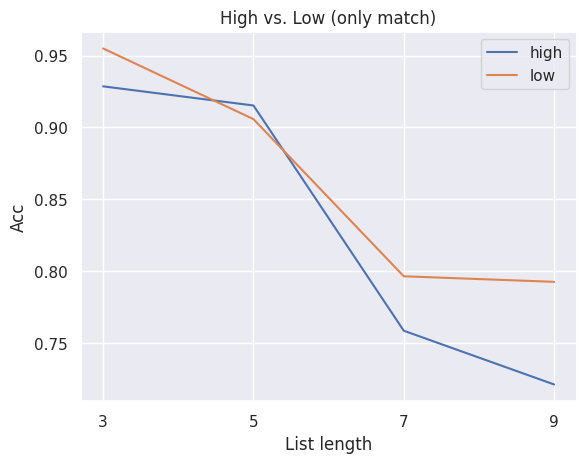

In [21]:
only_match = ieeg[ieeg['ProbeType'] == 2]

pl.figure()
subset = only_match.groupby(['ProbeCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.ProbeCategory.unique())
pl.title('Acc across conditions and line length iEEG (only match)');

pl.figure()
subset = only_match.groupby(['Lex', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    pl.plot(x.Length, x.RespCorrect, label = 'non-words')
  elif i == 1:
    pl.plot(x.Length, x.RespCorrect, label = 'words')
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Words vs. Non-words (only match)');

pl.figure()
subset = only_match.groupby(['Phono', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('High vs. Low (only match)');

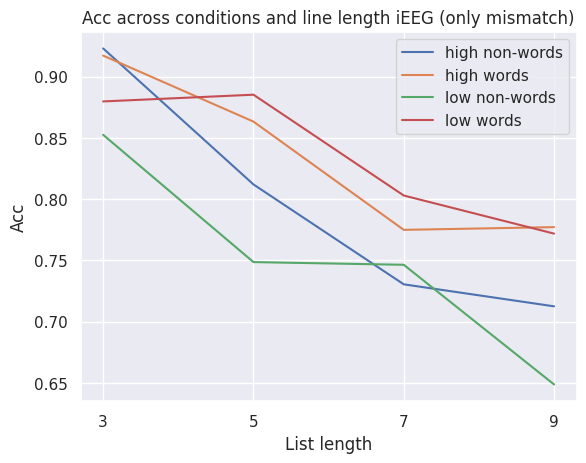

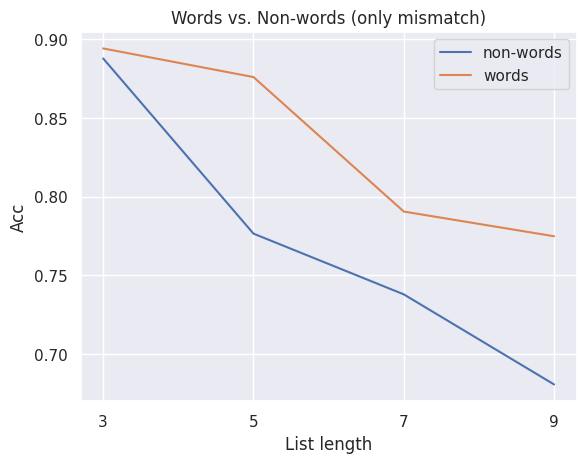

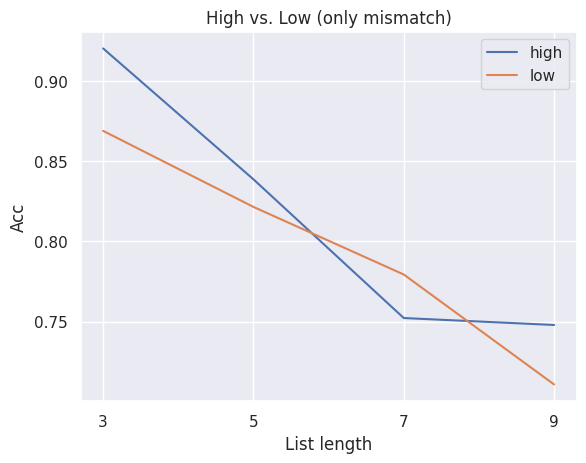

In [ ]:
only_mismatch = ieeg[ieeg['ProbeType'] == 1]

pl.figure()
subset = only_mismatch.groupby(['ProbeCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.ProbeCategory.unique())
pl.title('Acc across conditions and line length iEEG (only mismatch)');

pl.figure()
subset = only_mismatch.groupby(['Lex', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Words vs. Non-words (only mismatch)');

pl.figure()
subset = only_mismatch.groupby(['Phono', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('High vs. Low (only mismatch)');

MATCH AND MISMATCH ON THE SAME PLOT

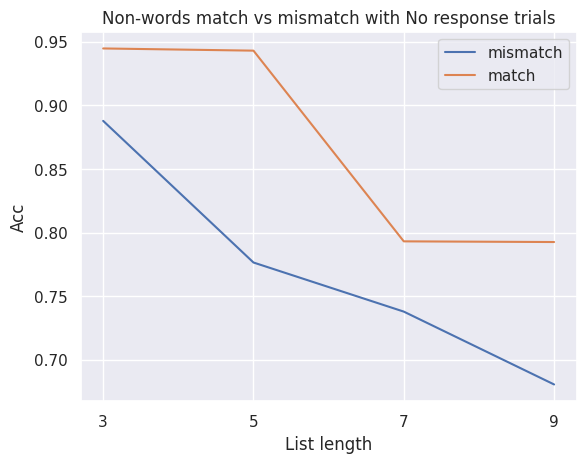

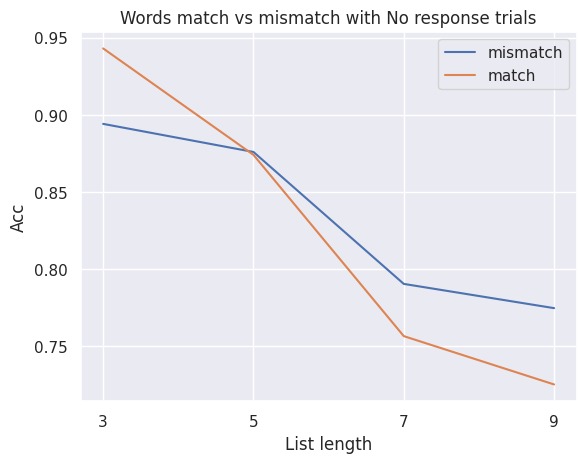

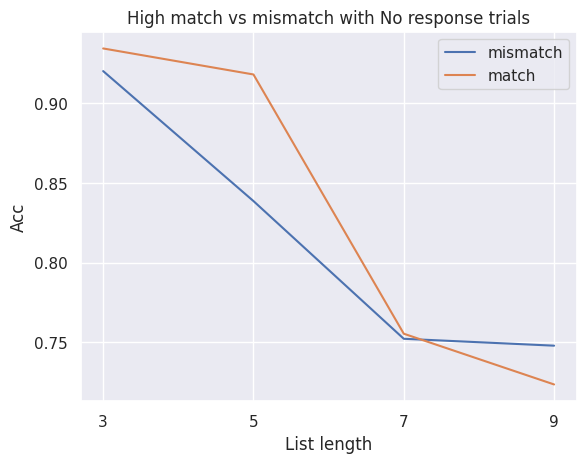

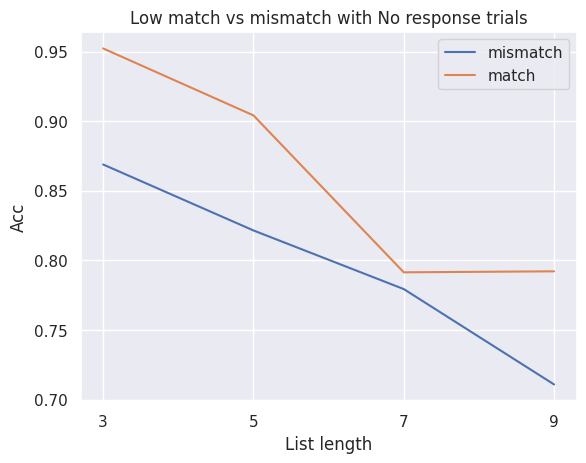

In [ ]:
pl.figure()
nonwords = ieeg[ieeg['Lex'] == 0]
subset = nonwords.groupby(['ProbeType', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Non-words match vs mismatch with No response trials');

pl.figure()
words = ieeg[ieeg['Lex'] == 1]
subset = words.groupby(['ProbeType', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Words match vs mismatch with No response trials');

pl.figure()
high = ieeg[ieeg['Phono'] == 0]
subset = high.groupby(['ProbeType', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('High match vs mismatch with No response trials');

pl.figure()
low = ieeg[ieeg['Phono'] == 1]
subset = low.groupby(['ProbeType', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Low match vs mismatch with No response trials');

### Accuracy bar plots

P-value 0.9195715993126101
H 0.8244631185807656 L 0.8255954784012919


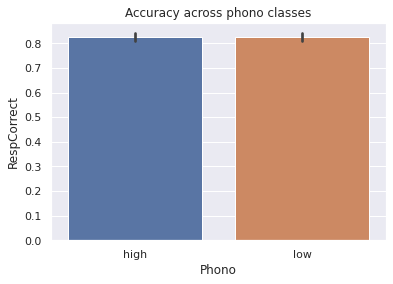

In [ ]:
# H vs L
pl.figure()
fig = sns.barplot('Phono', 'RespCorrect', data=ieeg)
fig.set_xticklabels(['high', 'low'])
pl.title('Accuracy across phono classes');

x, y = ieeg[ieeg['Phono'] == 1]['RespCorrect'].values, ieeg[ieeg['Phono'] == 0]['RespCorrect'].values
print('P-value', ttest(x, y)[1])
print('H', y.mean(), 'L', x.mean())

P-value for words 0.28425088778093466
H 0.8200389105058365 L 0.8372093023255814
P-value for non-words 0.2964656125079361
H 0.8342967244701349 L 0.8174936921783011


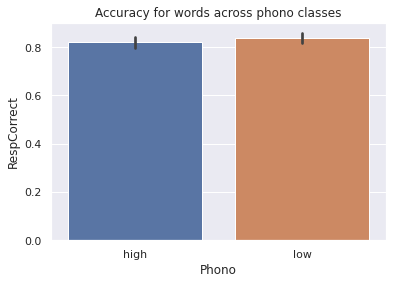

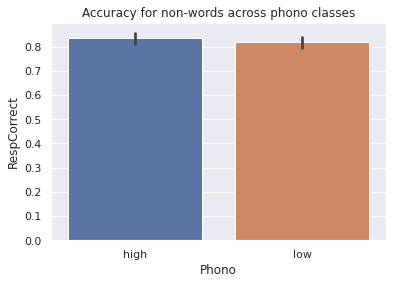

In [ ]:
# W H vs L, NW H vs L
for i in ieeg.Lex.unique():
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.figure()
  subset = ieeg[ieeg['Lex'] == i]
  fig = sns.barplot('Phono', 'RespCorrect', data=subset)
  fig.set_xticklabels(['high', 'low'])
  pl.title('Accuracy for ' + name + ' across phono classes');

  x, y = subset[subset['Phono'] == 1]['RespCorrect'].values, subset[subset['Phono'] == 0]['RespCorrect'].values
  print('P-value for', name, ttest(x, y)[1])
  print('H', y.mean(), 'L', x.mean())

P-value for words match 0.3385246616016446
H 0.8189845474613686 L 0.8423153692614771
P-value for words mismatch 0.5040513953285433
H 0.8293135435992579 L 0.8437025796661608
P-value for non-words match 0.6078334439185533
H 0.8661087866108786 L 0.8766447368421053
P-value for non-words mismatch 0.11017483837043186
H 0.8026565464895635 L 0.7621722846441947


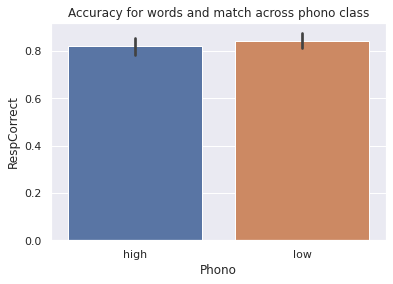

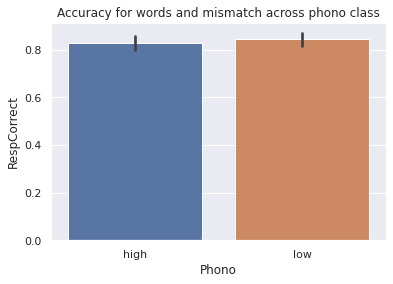

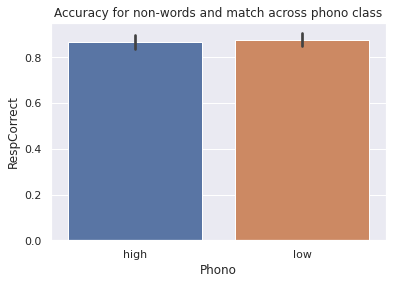

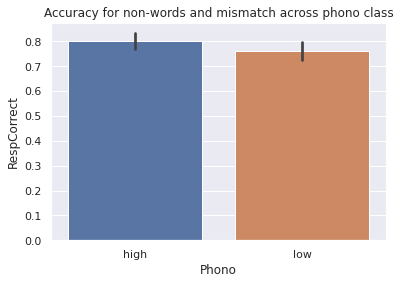

In [ ]:
# 1/ W MATCH H vs L, 2/ W MISMATCH H vs L 
# 3/ NW MATCH H vs L, 4/ NW MISMATCH H vs L
for lex_class in ieeg.Lex.unique():
  if lex_class == 0:
    name1 = 'non-words'
  elif lex_class == 1:
    name1 = 'words'
  subset = ieeg[ieeg['Lex'] == lex_class]
  for probe_class in subset.ProbeType.unique():
    if probe_class == 1:
      name2 = 'mismatch'
    elif probe_class == 2:
      name2 = 'match'
    ss = subset[subset['ProbeType'] == probe_class]

    pl.figure()
    fig = sns.barplot('Phono', 'RespCorrect', data=ss)
    fig.set_xticklabels(['high', 'low'])
    pl.title(
        'Accuracy for ' + name1 + ' and ' + name2 + ' across phono class'
    );

    x, y = ss[ss['Phono'] == 1]['RespCorrect'].values, ss[ss['Phono'] == 0]['RespCorrect'].values
    print('P-value for', name1, name2, ttest(x, y)[1])
    print('H', y.mean(), 'L', x.mean())

In [ ]:
for i in ieeg.Length.unique():
  subset = ieeg[ieeg['Length'] == i] 
  x, y = subset[subset['Phono'] == 1]['RespCorrect'].values, subset[subset['Phono'] == 0]['RespCorrect'].values
  print('P-value for', i, ttest(x, y)[1])
  print('H', y.mean(), 'L', x.mean())

P-value for 3 0.1200127538128167
H 0.9322381930184805 L 0.9064625850340136
P-value for 7 0.4413801601709606
H 0.7793522267206477 L 0.7986230636833046
P-value for 9 0.36064063644291244
H 0.7367424242424242 L 0.7609489051094891
P-value for 5 0.5158080466157309
H 0.875 L 0.8615384615384616


In [ ]:
# check for different length
for i in ieeg.Length.unique():
  print(i)
  subset = ieeg[ieeg['Length'] == i]
  for j in subset.Lex.unique():
    if j == 0:
      print('Non-words')
    elif j == 1:
      print('Words')
    ss = subset[subset['Lex'] == j]
    x, y = ss[ss['Phono'] == 1]['RespCorrect'].values, ss[ss['Phono'] == 0]['RespCorrect'].values
    print('P-value for', i, j, ttest(x, y)[1])
    print('H', y.mean(), 'L', x.mean())

3
Words
P-value for 3 1 0.138199396528101
H 0.9367588932806324 L 0.9020979020979021
Non-words
P-value for 3 0 0.4791102014592733
H 0.9273504273504274 L 0.9105960264900662
7
Words
P-value for 7 1 0.30998831756479406
H 0.7631578947368421 L 0.8
Non-words
P-value for 7 0 0.9129994944014717
H 0.793233082706767 L 0.7970479704797048
9
Words
P-value for 9 1 0.2644700688262947
H 0.7364620938628159 L 0.7777777777777778
Non-words
P-value for 9 0 0.8208473045605227
H 0.7370517928286853 L 0.7456445993031359
5
Words
P-value for 5 1 0.4802644123907891
H 0.8675213675213675 L 0.8877887788778878
Non-words
P-value for 5 0 0.10729080571522537
H 0.8818897637795275 L 0.8333333333333334


In [ ]:
# check for different length

# 1/ W MATCH H vs L, 2/ W MISMATCH H vs L 
# 3/ NW MATCH H vs L, 4/ NW MISMATCH H vs L
for i in ieeg.Length.unique():
  subset = ieeg[ieeg['Length'] == i]
  for lex_class in subset.Lex.unique():
    if lex_class == 0:
      name1 = 'non-words'
    elif lex_class == 1:
      name1 = 'words'
    ss = subset[subset['Lex'] == lex_class]
    for probe_class in subset.ProbeType.unique():
      if probe_class == 1:
        name2 = 'mismatch'
      elif probe_class == 2:
        name2 = 'match'
      s = ss[ss['ProbeType'] == probe_class]

      x, y = s[s['Phono'] == 1]['RespCorrect'].values, s[s['Phono'] == 0]['RespCorrect'].values
      print('P-value for', i, 'items', name1, name2, ttest(x, y)[1])
      print('H', y.mean(), 'L', x.mean())
      print('')

P-value for 3 items words match 0.6514268601084658
H 0.946969696969697 L 0.9595959595959596

P-value for 3 items words mismatch 0.11653499647957101
H 0.9256198347107438 L 0.8716577540106952

P-value for 3 items non-words match 0.5359473484505155
H 0.9357798165137615 L 0.9534883720930233

P-value for 3 items non-words mismatch 0.09534474065103836
H 0.92 L 0.8538461538461538

P-value for 7 items words match 0.36274216346503063
H 0.7373737373737373 L 0.7880794701986755

P-value for 7 items words mismatch 0.554278758841437
H 0.7829457364341085 L 0.8113207547169812

P-value for 7 items non-words match 0.794767735189666
H 0.8174603174603174 L 0.8051948051948052

P-value for 7 items non-words mismatch 0.7752834406847329
H 0.7714285714285715 L 0.7863247863247863

P-value for 9 items words mismatch 0.677463859265934
H 0.7639751552795031 L 0.7841726618705036

P-value for 9 items words match 0.20952925343519782
H 0.6982758620689655 L 0.7704918032786885

P-value for 9 items non-words mismatch 0.22

### RT plots

both MATCH AND MISMATCH

In [ ]:
ieeg_rt = ieeg[ieeg['Resp'] != 'No Response']

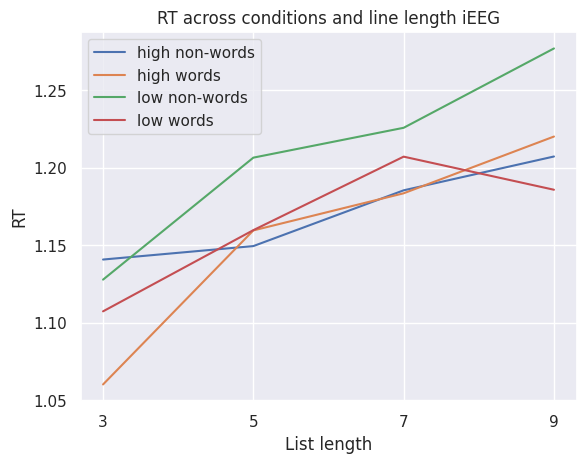

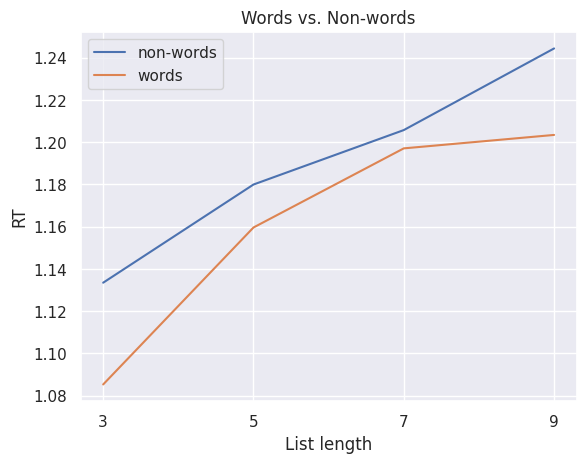

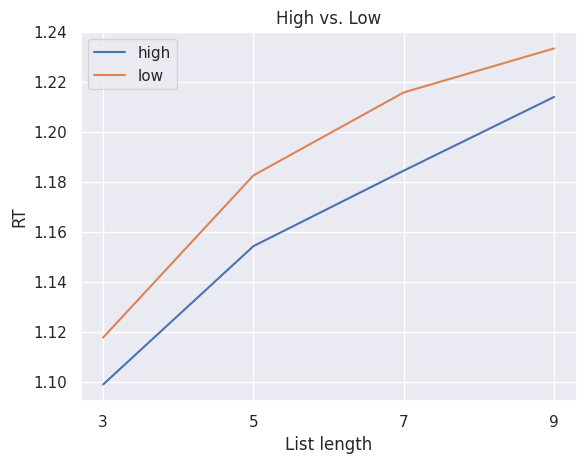

In [ ]:
pl.figure()
subset = ieeg_rt.groupby(['ProbeCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.ProbeCategory.unique())
pl.title('RT across conditions and line length iEEG');

pl.figure()
subset = ieeg_rt.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs. Non-words');

pl.figure()
subset = ieeg_rt.groupby(['Phono', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High vs. Low');

P-value [0.00268508]
P-value 0.034730085908454965


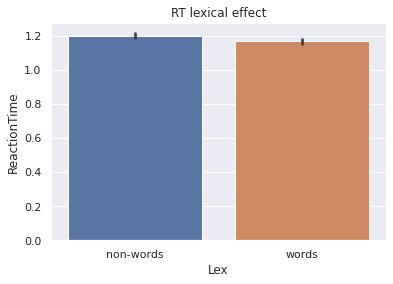

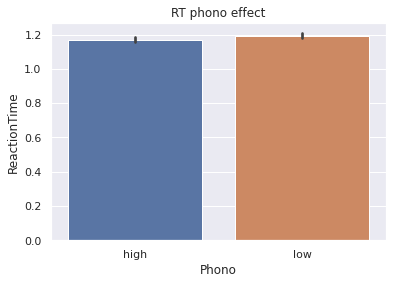

In [ ]:
# significance with length combined
x, y = ieeg_rt[ieeg_rt['Lex'] == 1][['ReactionTime']].values, ieeg_rt[ieeg_rt['Lex'] == 0][['ReactionTime']].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(ieeg_rt['Lex'], ieeg_rt['ReactionTime'])
fig.set_xticklabels(['non-words', 'words'])
pl.title('RT lexical effect');

x, y = ieeg_rt[ieeg_rt['Phono'] == 1]['ReactionTime'].values, ieeg_rt[ieeg_rt['Phono'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(ieeg_rt['Phono'], ieeg_rt['ReactionTime'])
fig.set_xticklabels(['high', 'low'])
pl.title('RT phono effect');

In [ ]:
# significance with different lengths
for i in ieeg_rt.Length.unique():
  subset = ieeg_rt[ieeg_rt['Length'] == i]
  x, y = subset[subset['Lex'] == 1]['ReactionTime'].values, subset[subset['Lex'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Lex', ttest(x, y)[1])

  x, y = subset[subset['Phono'] == 1]['ReactionTime'].values, subset[subset['Phono'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Phono', ttest(x, y)[1])

P-value for 3 Lex 0.009764876736321947
P-value for 3 Phono 0.23669651235176326
P-value for 7 Lex 0.5769339511421244
P-value for 7 Phono 0.13729990405627965
P-value for 9 Lex 0.07003099898097132
P-value for 9 Phono 0.5024362134408948
P-value for 5 Lex 0.29725674044048567
P-value for 5 Phono 0.2176556076134871


MATCH

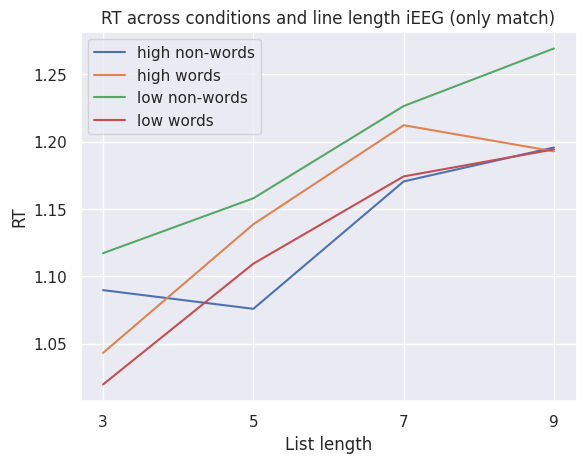

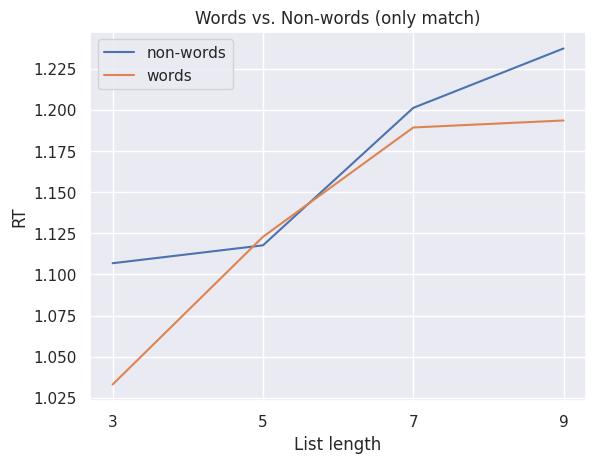

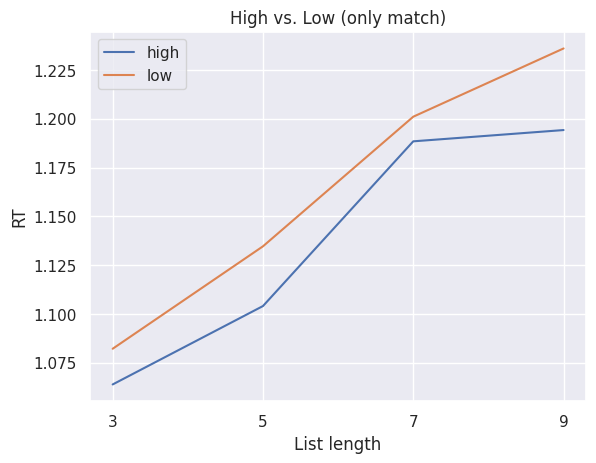

In [ ]:
only_match = ieeg_rt[ieeg_rt['ProbeType'] == 2]

pl.figure()
subset = only_match.groupby(['ProbeCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.ProbeCategory.unique())
pl.title('RT across conditions and line length iEEG (only match)');

pl.figure()
subset = only_match.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    pl.plot(x.Length, x.ReactionTime, label = 'non-words')
  elif i == 1:
      pl.plot(x.Length, x.ReactionTime, label = 'words')
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs. Non-words (only match)');

pl.figure()
subset = only_match.groupby(['Phono', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High vs. Low (only match)');

P-value 0.01191184827561433
P-value 0.029693413035185915


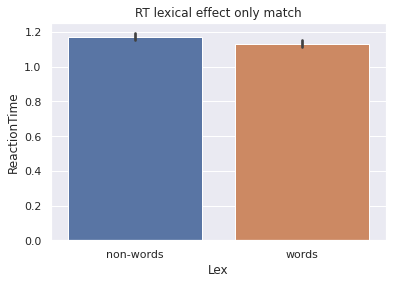

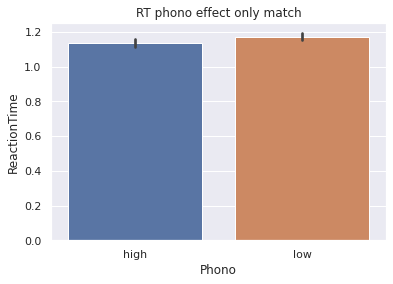

In [ ]:
# significance with length combined
x, y = only_match[only_match['Lex'] == 1]['ReactionTime'].values, only_match[only_match['Lex'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(only_match['Lex'], only_match['ReactionTime'])
fig.set_xticklabels(['non-words', 'words'])
pl.title('RT lexical effect only match');

x, y = only_match[only_match['Phono'] == 1]['ReactionTime'].values, only_match[only_match['Phono'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(only_match['Phono'], only_match['ReactionTime'])
fig.set_xticklabels(['high', 'low'])
pl.title('RT phono effect only match');

In [ ]:
# significance with different lengths
print('Only match')
for i in only_match.Length.unique():
  subset = only_match[only_match['Length'] == i]
  x, y = subset[subset['Lex'] == 1]['ReactionTime'].values, subset[subset['Lex'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Lex', ttest(x, y)[1])

  x, y = subset[subset['Phono'] == 1]['ReactionTime'].values, subset[subset['Phono'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Phono', ttest(x, y)[1])

Only match
P-value for 3 Lex 0.0014648175475430398
P-value for 3 Phono 0.20053207216462202
P-value for 7 Lex 0.473821529500274
P-value for 7 Phono 0.9797968545397304
P-value for 9 Lex 0.1745544173301971
P-value for 9 Phono 0.1533454967321058
P-value for 5 Lex 0.8089356889271342
P-value for 5 Phono 0.20096661934506357


MISMATCH

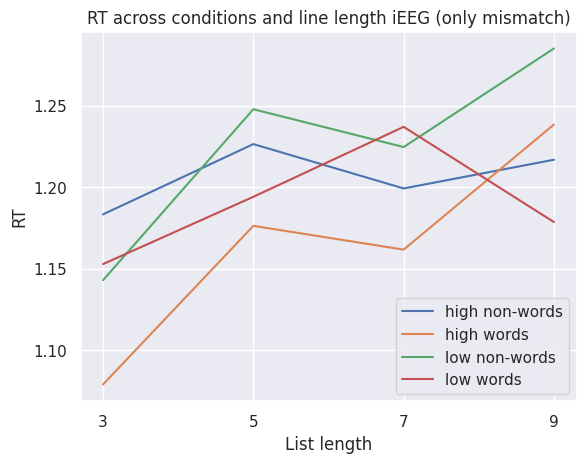

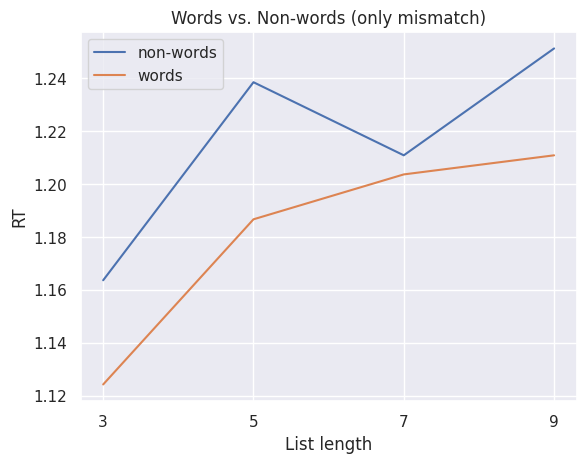

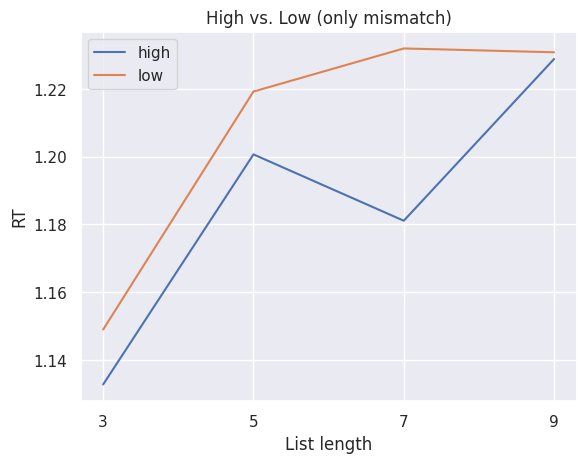

In [ ]:
only_mismatch = ieeg_rt[ieeg_rt['ProbeType'] == 1]

pl.figure()
subset = only_mismatch.groupby(['ProbeCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.ProbeCategory.unique())
pl.title('RT across conditions and line length iEEG (only mismatch)');

pl.figure()
subset = only_mismatch.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  x = subset[subset['Lex'] == i]
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs. Non-words (only mismatch)');

pl.figure()
subset = only_mismatch.groupby(['Phono', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Phono.unique():
  x = subset[subset['Phono'] == i]
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High vs. Low (only mismatch)');

P-value 0.02469204196269545
P-value 0.3338197056469946


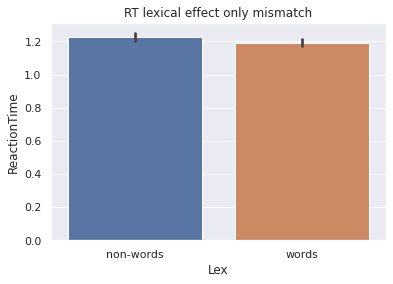

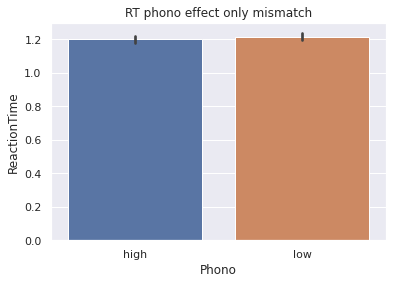

In [ ]:
# significance with length combined
x, y = only_mismatch[only_mismatch['Lex'] == 1]['ReactionTime'].values, only_mismatch[only_mismatch['Lex'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(only_mismatch['Lex'], only_mismatch['ReactionTime'])
fig.set_xticklabels(['non-words', 'words'])
pl.title('RT lexical effect only mismatch');

x, y = only_mismatch[only_mismatch['Phono'] == 1]['ReactionTime'].values, only_mismatch[only_mismatch['Phono'] == 0]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(only_mismatch['Phono'], only_mismatch['ReactionTime'])
fig.set_xticklabels(['high', 'low'])
pl.title('RT phono effect only mismatch');

In [ ]:
# significance with different lengths
print('Only mismatch')
for i in only_mismatch.Length.unique():
  subset = only_mismatch[only_mismatch['Length'] == i]
  x, y = subset[subset['Lex'] == 1]['ReactionTime'].values, subset[subset['Lex'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Lex', ttest(x, y)[1])

  x, y = subset[subset['Phono'] == 1]['ReactionTime'].values, subset[subset['Phono'] == 0]['ReactionTime'].values
  print('P-value for', i, 'Phono', ttest(x, y)[1])

Only mismatch
P-value for 9 Lex 0.19620118297400976
P-value for 9 Phono 0.7194251210825077
P-value for 5 Lex 0.1298278565760089
P-value for 5 Phono 0.7969780565789829
P-value for 3 Lex 0.19565101119519418
P-value for 3 Phono 0.7072514668305874
P-value for 7 Lex 0.9240195978745969
P-value for 7 Phono 0.0379268281361354


plotting MATCH AND MISMATCH together

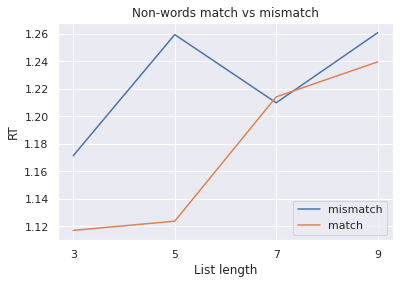

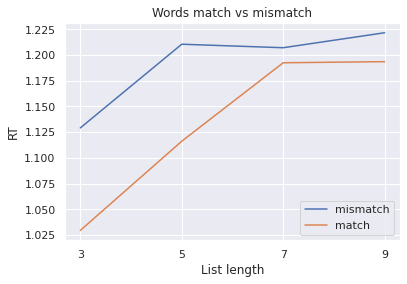

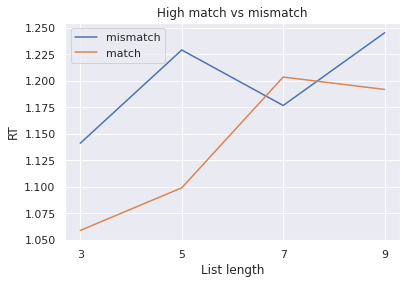

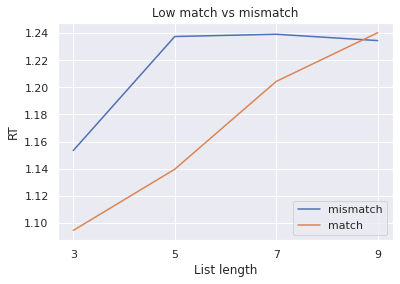

In [ ]:
pl.figure()
nonwords = ieeg_rt[ieeg_rt['Lex'] == 0]
subset = nonwords.groupby(['ProbeType', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Non-words match vs mismatch');

pl.figure()
words = ieeg_rt[ieeg_rt['Lex'] == 1]
subset = words.groupby(['ProbeType', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words match vs mismatch');

pl.figure()
high = ieeg_rt[ieeg_rt['Phono'] == 0]
subset = high.groupby(['ProbeType', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High match vs mismatch');

pl.figure()
low = ieeg_rt[ieeg_rt['Phono'] == 1]
subset = low.groupby(['ProbeType', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeType.unique():
  if i == 1:
    name = 'mismatch'
  elif i == 2:
    name = 'match'
  x = subset[subset['ProbeType'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Low match vs mismatch');

P-value 0.0007060981902017421
P-value 0.00024130340426989683
P-value 9.07085374870823e-05
P-value 0.003754014206967937


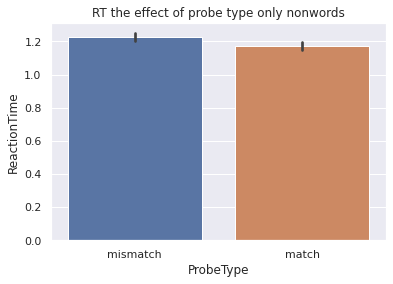

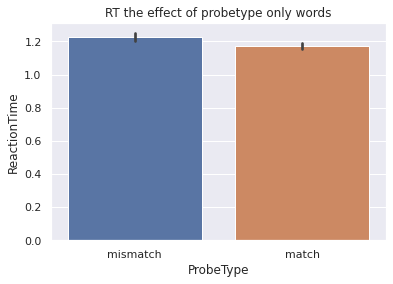

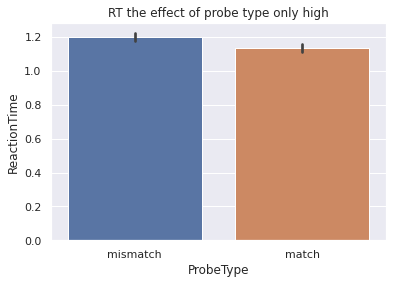

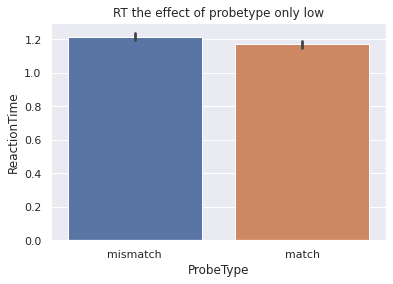

In [ ]:
# significance with length combined
ss = ieeg_rt[ieeg_rt['Lex'] == 0]
x, y = ss[ss['ProbeType'] == 2]['ReactionTime'].values, ss[ss['ProbeType'] == 1]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(ss['ProbeType'], ss['ReactionTime'])
fig.set_xticklabels(['mismatch', 'match'])
pl.title('RT the effect of probe type only nonwords');

s = ieeg_rt[ieeg_rt['Lex'] == 1]
x, y = s[s['ProbeType'] == 2]['ReactionTime'].values, s[s['ProbeType'] == 1]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(ss['ProbeType'], ss['ReactionTime'])
fig.set_xticklabels(['mismatch', 'match'])
pl.title('RT the effect of probetype only words');

hh = ieeg_rt[ieeg_rt['Phono'] == 0]
x, y = hh[hh['ProbeType'] == 2]['ReactionTime'].values, hh[hh['ProbeType'] == 1]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(hh['ProbeType'], hh['ReactionTime'])
fig.set_xticklabels(['mismatch', 'match'])
pl.title('RT the effect of probe type only high');

h = ieeg_rt[ieeg_rt['Phono'] == 1]
x, y = h[h['ProbeType'] == 2]['ReactionTime'].values, h[h['ProbeType'] == 1]['ReactionTime'].values
print('P-value', ttest(x, y)[1])
pl.figure()
fig = sns.barplot(h['ProbeType'], h['ReactionTime'])
fig.set_xticklabels(['mismatch', 'match'])
pl.title('RT the effect of probetype only low');

In [ ]:
# significance with different lengths
print('Only nonwords')
for i in ss.Length.unique():
  subset = ss[ss['Length'] == i]
  x, y = subset[subset['ProbeType'] == 1]['ReactionTime'].values, subset[subset['ProbeType'] == 2]['ReactionTime'].values
  print('P-value for', i, 'ProbeType', ttest(x, y)[1])

print('Only words')
for i in s.Length.unique():
  subset = s[s['Length'] == i]
  x, y = subset[subset['ProbeType'] == 1]['ReactionTime'].values, subset[subset['ProbeType'] == 2]['ReactionTime'].values
  print('P-value for', i, 'ProbeType', ttest(x, y)[1])

print('Only high')
for i in hh.Length.unique():
  subset = hh[hh['Length'] == i]
  x, y = subset[subset['ProbeType'] == 1]['ReactionTime'].values, subset[subset['ProbeType'] == 2]['ReactionTime'].values
  print('P-value for', i, 'ProbeType', ttest(x, y)[1])

print('Only low')
for i in h.Length.unique():
  subset = h[h['Length'] == i]
  x, y = subset[subset['ProbeType'] == 1]['ReactionTime'].values, subset[subset['ProbeType'] == 2]['ReactionTime'].values
  print('P-value for', i, 'ProbeType', ttest(x, y)[1])

Only nonwords
P-value for 7 ProbeType 0.8886109445103703
P-value for 3 ProbeType 0.08250591854330187
P-value for 9 ProbeType 0.501601464345057
P-value for 5 ProbeType 3.431230040237713e-05
Only words
P-value for 3 ProbeType 0.0006498783112272793
P-value for 7 ProbeType 0.6270763268551467
P-value for 9 ProbeType 0.3936307696418513
P-value for 5 ProbeType 0.0028678876128357274
Only high
P-value for 7 ProbeType 0.3924558015556059
P-value for 5 ProbeType 0.00010559816652442042
P-value for 9 ProbeType 0.10492177768569996
P-value for 3 ProbeType 0.007682243465385098
Only low
P-value for 3 ProbeType 0.050484105566643754
P-value for 9 ProbeType 0.853739437887133
P-value for 7 ProbeType 0.23668724945523892
P-value for 5 ProbeType 0.0015786045031809714


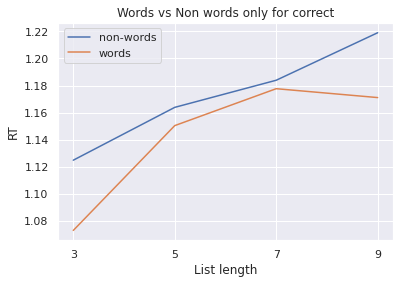

In [ ]:
# CORRECT
pl.figure()
correct = ieeg_rt[ieeg_rt['RespCorrect'] == 1]
subset = correct.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  x = subset[subset['Lex'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs Non words only for correct');

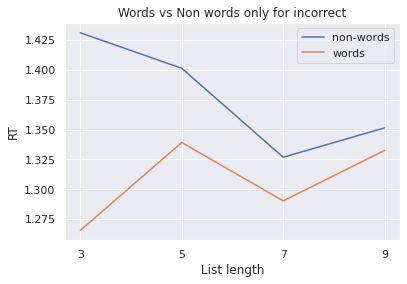

In [ ]:
# INCORRECT
pl.figure()
incorrect = ieeg_rt[ieeg_rt['RespCorrect'] == 0]
subset = incorrect.groupby(['Lex', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Lex.unique():
  if i == 0:
    name = 'non-words'
  elif i == 1:
    name = 'words'
  x = subset[subset['Lex'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('Words vs Non words only for incorrect');

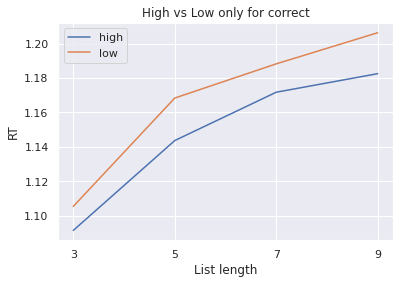

In [ ]:
# CORRECT
pl.figure()
correct = ieeg_rt[ieeg_rt['RespCorrect'] == 1]
subset = correct.groupby(['Phono', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Phono.unique():
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  x = subset[subset['Phono'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High vs Low only for correct');

Ttest_indResult(statistic=array([2.57632723]), pvalue=array([0.01002419]))


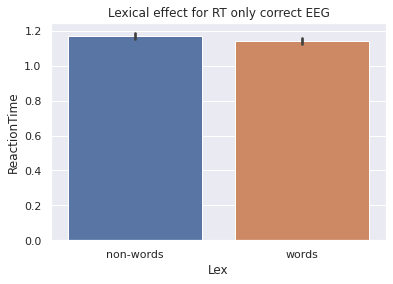

In [ ]:
pl.figure()
ax = sns.barplot('Lex', 'ReactionTime', data = ieeg_rt[ieeg_rt['RespCorrect'] == 1])
ax.set_xticklabels(['non-words', 'words'])
pl.title('Lexical effect for RT only correct EEG');

subset = ieeg_rt[ieeg_rt['RespCorrect'] == 1]
x, y = subset[subset['Lex'] == 0][['ReactionTime']], subset[subset['Lex'] == 1][['ReactionTime']]
print(ttest(x,y))

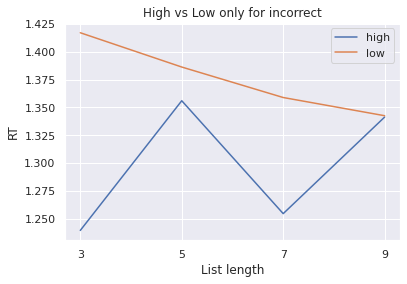

In [ ]:
# INCORRECT
pl.figure()
incorrect = ieeg_rt[ieeg_rt['RespCorrect'] == 0]
subset = incorrect.groupby(['Phono', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.Phono.unique():
  if i == 0:
    name = 'high'
  elif i == 1:
    name = 'low'
  x = subset[subset['Phono'] == i]
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('High vs Low only for incorrect');

Ttest_indResult(statistic=array([1.59145795]), pvalue=array([0.11198363]))


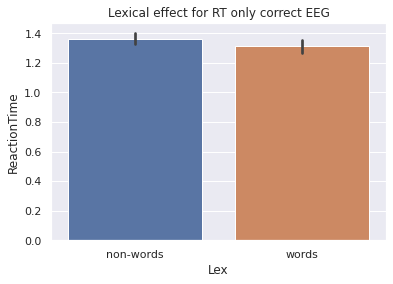

In [ ]:
pl.figure()
ax = sns.barplot('Lex', 'ReactionTime', data = ieeg_rt[ieeg_rt['RespCorrect'] == 0])
ax.set_xticklabels(['non-words', 'words'])
pl.title('Lexical effect for RT only correct EEG');

subset = ieeg_rt[ieeg_rt['RespCorrect'] == 0]
x, y = subset[subset['Lex'] == 0][['ReactionTime']], subset[subset['Lex'] == 1][['ReactionTime']]
print(ttest(x,y))

### Correlation

In [ ]:
ieeg_data = ieeg[[
              'Trial', 'Subject', 'block',
              'ProbeType', 'RespCorrect',
                'Position', 'Resp', 'ReactionTime', 'Length', 'Lex', 'Phono'
]]

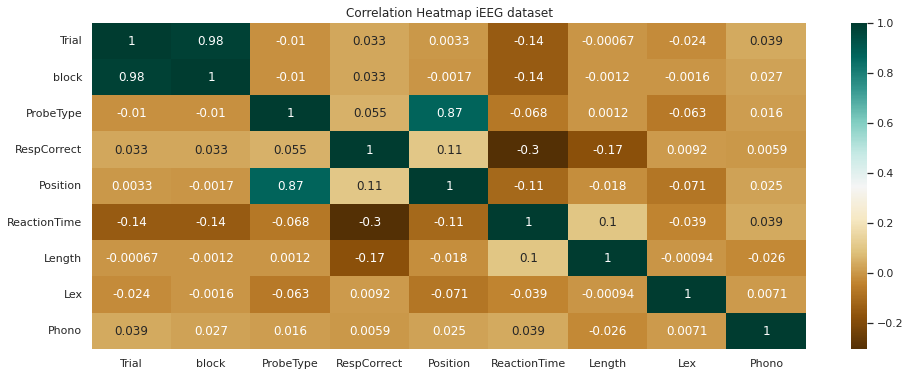

In [ ]:
pl.figure(figsize=(16, 6))
map = sns.heatmap(ieeg_data.corr(), annot=True, cmap = 'BrBG')
map.set_title('Correlation Heatmap iEEG dataset');

### Models Accuracy

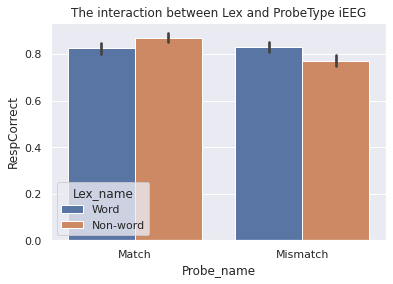

In [ ]:
pl.figure()
ax = sns.barplot(x="Probe_name", y="RespCorrect", hue="Lex_name", data=ieeg)
pl.title('The interaction between Lex and ProbeType iEEG');

In [ ]:
subset = eeg[eeg['Lex'] == 1]
x, y = subset[subset['ProbeType'] == 2][['ResponseCorrect']].values, subset[subset['ProbeType'] == 1][['ResponseCorrect']].values
print('W MM vs M', ttest(x,y))
subset = eeg[eeg['Lex'] == 0]
x, y = subset[subset['ProbeType'] == 2][['ResponseCorrect']].values, subset[subset['ProbeType'] == 1][['ResponseCorrect']].values
print('NW MM vs M', ttest(x,y))

subset = eeg[eeg['ProbeType'] == 1]
x, y = subset[subset['Lex'] == 0][['ResponseCorrect']].values, subset[subset['Lex'] == 1][['ResponseCorrect']].values
print('MM W vs NW', ttest(x,y))
subset = eeg[eeg['ProbeType'] == 2]
x, y = subset[subset['Lex'] == 0][['ResponseCorrect']].values, subset[subset['Lex'] == 1][['ResponseCorrect']].values
print('M W vs NW', ttest(x,y))

W MM vs M Ttest_indResult(statistic=array([2.82588039]), pvalue=array([0.00475132]))
NW MM vs M Ttest_indResult(statistic=array([5.66201056]), pvalue=array([1.64938015e-08]))
MM W vs NW Ttest_indResult(statistic=array([-4.3522686]), pvalue=array([1.39600628e-05]))
M W vs NW Ttest_indResult(statistic=array([-1.54495655]), pvalue=array([0.12247603]))


In [ ]:
%%R -i ieeg
comp1<-lmer('RespCorrect ~ Length + ProbeType + (1|Subject)', data=ieeg)
comp2<-lmer('RespCorrect ~ Length + ProbeType + Lex + Lex*ProbeType + (1|Subject)', data=ieeg)
anova(comp1, comp2)

Data: ieeg
Models:
comp1: "RespCorrect ~ Length + ProbeType + (1|Subject)"
comp2: "RespCorrect ~ Length + ProbeType + Lex + Lex*ProbeType + (1|Subject)"
      npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
comp1    5 3982.3 4014.5 -1986.2   3972.3                         
comp2    7 3963.4 4008.5 -1974.7   3949.4 22.902  2  1.064e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
tryout1 = Lmer(
    'RespCorrect ~ Length + ProbeType + Lex + Lex:ProbeType + (1|Subject)',
    data = ieeg
)
tryout1.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: RespCorrect~Length+ProbeType+Lex+Lex:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 4619	 Groups: {'Subject': 29.0}

Log-likelihood: -1993.551 	 AIC: 4001.102

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.002  0.049
Residual               0.137  0.370

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)       0.851   0.792    0.910  0.030  1370.745  28.376    0.0  ***
Length           -0.029  -0.034   -0.024  0.002  4586.075 -11.983    0.0  ***
ProbeType         0.097   0.067    0.127  0.015  4590.385   6.281    0.0  ***
Lex               0.161   0.094    0.228  0.034  4603.244   4.730    0.0  ***
ProbeType:Lex    -0.104  -0.147   -0.061  0.022  4605.051  -4.727    0.0  ***

In [ ]:
tryout2 = Lmer(
    'RespCorrect ~ Length + ProbeType + (1|Subject)',
    data = ieeg
)
tryout2.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: RespCorrect~Length+ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 4619	 Groups: {'Subject': 29.0}

Log-likelihood: -1998.504 	 AIC: 4007.008

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.002  0.049
Residual               0.137  0.371

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.935   0.887    0.982  0.024   695.064  38.657    0.0  ***
Length         -0.029  -0.034   -0.025  0.002  4588.082 -12.020    0.0  ***
ProbeType       0.045   0.024    0.066  0.011  4601.686   4.107    0.0  ***

**Words vs Non words**

In [ ]:
words_ieeg = ieeg_no_outliers[ieeg_no_outliers['Lex'] == 1]
nonwords_ieeg = ieeg_no_outliers[ieeg_no_outliers['Lex'] == 0]

In [ ]:
# for words
%%R -i words_ieeg
comp1<-lmer('RespCorrect ~ Length + (1|Subject)', data=words_ieeg)
comp2<-lmer('RespCorrect ~ Length + ProbeType + Phono*Length + (1|Subject)', data=words_ieeg)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    4 1392.611 1415.069 -692.3057 1384.611       NA NA         NA
2    7 1392.161 1431.461 -689.0806 1378.161 6.450188  3 0.09164781


In [ ]:
mod = Lmer(
    'RespCorrect ~ Length + (1|Subject)',
    data=words_ieeg
)
mod.fit()

Formula: RespCorrect~Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2027	 Groups: {'Subject': 26.0}

Log-likelihood: -700.512 	 AIC: 1401.023

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.003  0.055
Residual               0.114  0.338

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     1.042   0.995    1.089  0.024   263.115  43.438    0.0  ***
Length         -0.031  -0.037   -0.024  0.003  2000.340  -9.186    0.0  ***

In [ ]:
# for nonwords
%%R -i nonwords_ieeg
comp1<-lmer('RespCorrect ~ ProbeType + Length + (1|Subject)', data=nonwords_ieeg)
comp2<-lmer('RespCorrect ~ ProbeType + Length + ProbeType*Length + (1|Subject)', data=nonwords_ieeg)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance      Chisq Df Pr..Chisq.
1    5 1519.180 1547.239 -754.5900 1509.180         NA NA         NA
2    6 1521.103 1554.775 -754.5517 1509.103 0.07654523  1   0.782035


In [ ]:
mod1 = Lmer(
    'RespCorrect ~ Length + ProbeType + (1|Subject)',
    data=nonwords_ieeg
)
mod1.fit()

Formula: RespCorrect~Length+ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2022	 Groups: {'Subject': 26.0}

Log-likelihood: -766.247 	 AIC: 1532.494

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.034
Residual               0.123  0.350

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.913   0.847    0.978  0.033  1300.701  27.313    0.0  ***
Length         -0.031  -0.038   -0.024  0.003  1994.703  -8.844    0.0  ***
ProbeType       0.079   0.048    0.109  0.016  2002.967   5.040    0.0  ***

**If we distinguish between match and mismatch**

In [ ]:
match_ieeg = ieeg_no_outliers[ieeg_no_outliers['ProbeType'] == 2]
mismatch_ieeg = ieeg_no_outliers[ieeg_no_outliers['ProbeType'] == 1]

In [ ]:
# for match
%%R -i match_ieeg
comp1<-lmer('RespCorrect ~ Length + Lex + Phono + Length:Phono + (1|Subject)', data=match_ieeg)
comp2<-lmer('RespCorrect ~ Length + Lex + Phono + Length:Phono + Phono:Lex:Length + (1|Subject)', data=match_ieeg)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    7 1142.878 1181.810 -564.4392 1128.878        NA NA         NA
2    8 1144.754 1189.247 -564.3769 1128.754 0.1245815  1  0.7241176


In [ ]:
mod = Lmer(
    'RespCorrect ~ Length + Lex + Phono + Length:Phono + (1|Subject)',
    data=match_ieeg
)
mod.fit()

Formula: RespCorrect~Length+Lex+Phono+Length:Phono+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1923	 Groups: {'Subject': 26.0}

Log-likelihood: -583.222 	 AIC: 1166.444

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.004  0.066
Residual               0.104  0.322

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)      1.123   1.056    1.191  0.034   550.342  32.784  0.000  ***
Length          -0.043  -0.052   -0.033  0.005  1898.591  -8.809  0.000  ***
Lex             -0.038  -0.067   -0.009  0.015  1902.658  -2.586  0.010   **
Phono           -0.071  -0.154    0.012  0.042  1896.642  -1.685  0.092    .
Length:Phono     0.017   0.004    0.030  0.007  1898.369   2.520  0.012    *

In [ ]:
# for mismatch
%%R -i mismatch_ieeg
comp1<-lmer('RespCorrect ~ Length + Lex + (1|Subject)', data=mismatch_ieeg)
comp2<-lmer('RespCorrect ~ Length + Lex + Lex:Phono:Length + (1|Subject)', data=mismatch_ieeg)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance      Chisq Df Pr..Chisq.
1    5 1700.251 1728.561 -845.1254 1690.251         NA NA         NA
2    6 1702.194 1736.166 -845.0969 1690.194 0.05704128  1   0.811235


In [ ]:
mod1 = Lmer(
    'RespCorrect ~ Length + Lex + (1|Subject)',
    data=mismatch_ieeg
)
mod1.fit()

Formula: RespCorrect~Length+Lex+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2126	 Groups: {'Subject': 26.0}

Log-likelihood: -856.416 	 AIC: 1712.832

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.004  0.065
Residual               0.128  0.357

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.978   0.925    1.031  0.027   254.296  36.267    0.0  ***
Length         -0.029  -0.036   -0.022  0.003  2099.930  -8.344    0.0  ***
Lex             0.059   0.029    0.090  0.016  2106.970   3.791    0.0  ***

**Plots for significant results**

All conditions

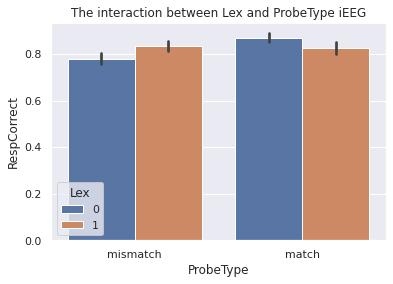

In [ ]:
pl.figure()
ax = sns.barplot(x="ProbeType", y="RespCorrect", hue="Lex", data=ieeg)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The interaction between Lex and ProbeType iEEG');

In [ ]:
subset = ieeg[ieeg['Lex'] == 1]
x, y = subset[subset['ProbeType'] == 2][['RespCorrect']].values, subset[subset['ProbeType'] == 1][['RespCorrect']].values
print(ttest(x,y))
subset = ieeg[ieeg['Lex'] == 0]
x, y = subset[subset['ProbeType'] == 2][['RespCorrect']].values, subset[subset['ProbeType'] == 1][['RespCorrect']].values
print(ttest(x,y))

subset = ieeg[ieeg['ProbeType'] == 1]
x, y = subset[subset['Lex'] == 0][['RespCorrect']].values, subset[subset['Lex'] == 1][['RespCorrect']].values
print(ttest(x,y))
subset = ieeg[ieeg['ProbeType'] == 2]
x, y = subset[subset['Lex'] == 0][['RespCorrect']].values, subset[subset['Lex'] == 1][['RespCorrect']].values
print(ttest(x,y))

Ttest_indResult(statistic=array([-0.5878504]), pvalue=array([0.55669632]))
Ttest_indResult(statistic=array([5.5883213]), pvalue=array([2.58864835e-08]))
Ttest_indResult(statistic=array([-3.26991078]), pvalue=array([0.00109221]))
Ttest_indResult(statistic=array([2.89050928]), pvalue=array([0.00388815]))


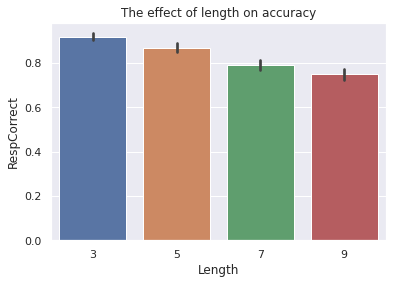

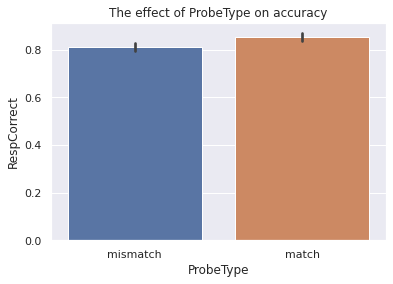

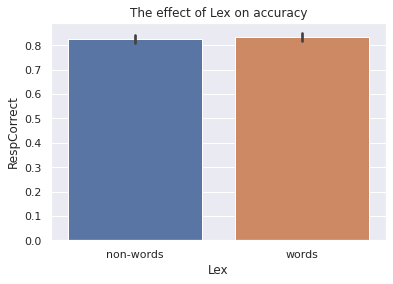

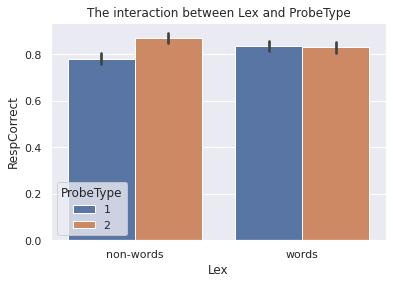

In [ ]:
pl.figure()
ax = sns.barplot('Length', 'RespCorrect', data=ieeg)
pl.title('The effect of length on accuracy');

pl.figure()
ax = sns.barplot('ProbeType', 'RespCorrect', data=ieeg)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The effect of ProbeType on accuracy');

pl.figure()
ax = sns.barplot('Lex', 'RespCorrect', data=ieeg)
ax.set_xticklabels(['non-words', 'words'])
pl.title('The effect of Lex on accuracy');

pl.figure()
ax = sns.barplot(x="Lex", y="RespCorrect", hue="ProbeType", data=ieeg)
ax.set_xticklabels(['non-words', 'words'])
pl.title('The interaction between Lex and ProbeType');


In [ ]:
x,y = ieeg[ieeg['Lex'] == 0]['RespCorrect'], ieeg[ieeg['Lex'] == 1]['RespCorrect']
print(ttest(x,y))

Ttest_indResult(statistic=-0.6041857821496689, pvalue=0.5457520402910461)


In [ ]:
# for W M vs MM
subset = ieeg[ieeg['Lex'] == 1]
x, y = subset[subset['ProbeType'] == 2][['RespCorrect']].values, subset[subset['ProbeType'] == 1][['RespCorrect']].values
print(ttest(x,y))

# for NW M vs MM
subset = ieeg[ieeg['Lex'] == 0]
x, y = subset[subset['ProbeType'] == 2][['RespCorrect']].values, subset[subset['ProbeType'] == 1][['RespCorrect']].values
print(ttest(x,y))

# for M W vs NW 
subset = ieeg[ieeg['ProbeType'] == 2]
x, y = subset[subset['Lex'] == 0][['RespCorrect']].values, subset[subset['Lex'] == 1][['RespCorrect']].values
print(ttest(x,y))

# for MM W vs NW 
subset = ieeg[ieeg['ProbeType'] == 1]
x, y = subset[subset['Lex'] == 0][['RespCorrect']].values, subset[subset['Lex'] == 1][['RespCorrect']].values
print(ttest(x,y))

Ttest_indResult(statistic=array([-0.37084925]), pvalue=array([0.7107885]))
Ttest_indResult(statistic=array([5.52706249]), pvalue=array([3.67443192e-08]))
Ttest_indResult(statistic=array([2.57820346]), pvalue=array([0.01000527]))
Ttest_indResult(statistic=array([-3.31634212]), pvalue=array([0.00092727]))


WORDS VS NONWORDS

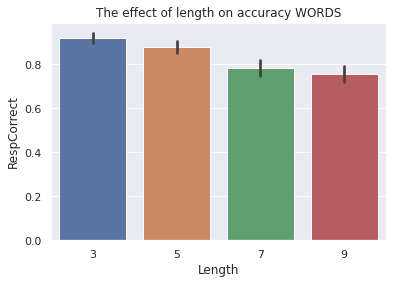

In [ ]:
#for words 
pl.figure()
ax = sns.barplot(
    'Length', 'RespCorrect', 
    data=ieeg[ieeg['Lex'] == 1]
    )
pl.title('The effect of length on accuracy WORDS');

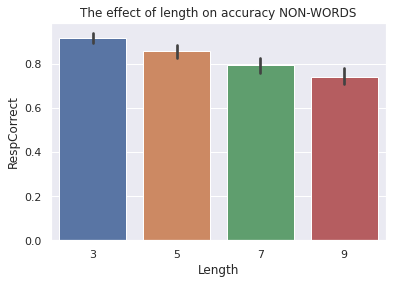

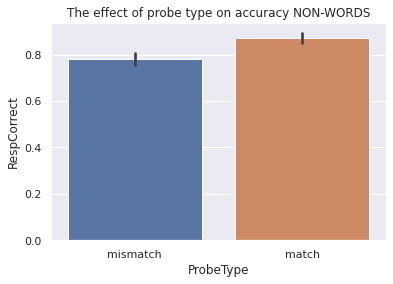

In [ ]:
#for nonwords 
pl.figure()
ax = sns.barplot(
    'Length', 'RespCorrect', 
    data=ieeg[ieeg['Lex'] == 0]
    )
pl.title('The effect of length on accuracy NON-WORDS');

pl.figure()
ax = sns.barplot(
    'ProbeType', 'RespCorrect', 
    data=ieeg[ieeg['Lex'] == 0]
    )
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The effect of probe type on accuracy NON-WORDS');

MATCH VS MISMATCH

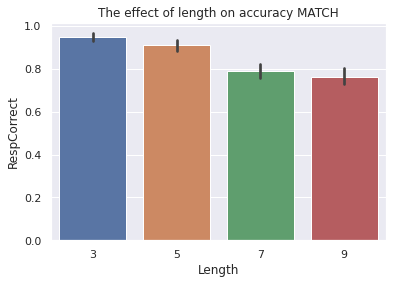

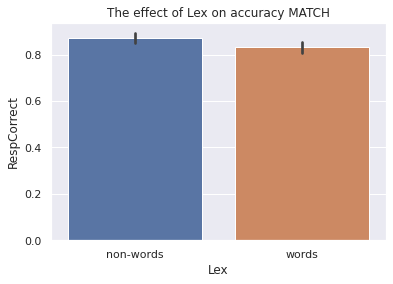

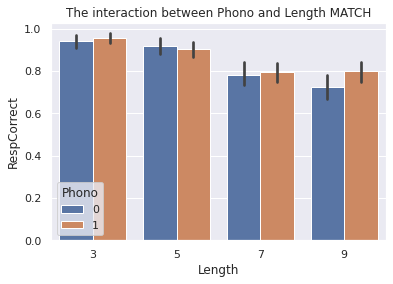

In [ ]:
# for match
pl.figure()
ax = sns.barplot(
    'Length', 'RespCorrect', 
    data=ieeg[ieeg['ProbeType'] == 2]
    )
pl.title('The effect of length on accuracy MATCH');

pl.figure()
ax = sns.barplot(
    'Lex', 'RespCorrect', 
    data=ieeg[ieeg['ProbeType'] == 2]
    )
ax.set_xticklabels(['non-words', 'words'])
pl.title('The effect of Lex on accuracy MATCH');

pl.figure()
ax = sns.barplot(
    x="Length", y="RespCorrect", hue="Phono", 
    data=ieeg[ieeg['ProbeType'] == 2]
    )
pl.title('The interaction between Phono and Length MATCH');


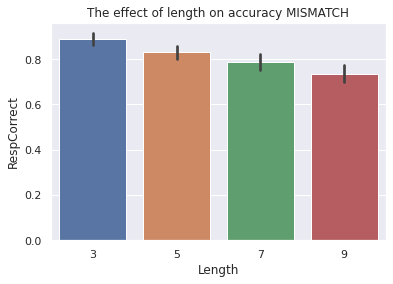

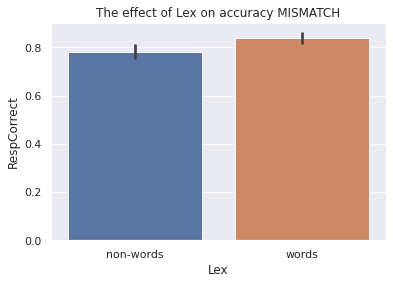

In [ ]:
#for mismatch
pl.figure()
ax = sns.barplot(
    'Length', 'RespCorrect', 
    data=ieeg[ieeg['ProbeType'] == 1]
    )
pl.title('The effect of length on accuracy MISMATCH');

pl.figure()
ax = sns.barplot(
    'Lex', 'RespCorrect', 
    data=ieeg[ieeg['ProbeType'] == 1]
    )
ax.set_xticklabels(['non-words', 'words'])
pl.title('The effect of Lex on accuracy MISMATCH');


### Models RT

All condition

In [ ]:
%%R -i ieeg_rt
comp1<-lmer('ReactionTime ~ Lex + ProbeType + Length + (1|Subject)', data=ieeg_rt)
comp2<-lmer('ReactionTime ~ Lex + ProbeType + Length + Phono + (1|Subject)', data=ieeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    6 1807.747 1845.814 -897.8735 1795.747       NA NA         NA
2    7 1805.619 1850.031 -895.8097 1791.619 4.127678  1 0.04218721


In [ ]:
%%R -i ieeg_rt
comp1<-lmer('ReactionTime ~ Lex + ProbeType + Length + Phono + ProbeType:Length + (1|Subject)', data=ieeg_rt)
comp2<-lmer('ReactionTime ~ Lex + ProbeType + Length + Phono + ProbeType:Length + Lex:Phono + (1|Subject)', data=ieeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    8 1792.338 1843.094 -888.1690 1776.338       NA NA         NA
2    9 1793.138 1850.239 -887.5692 1775.138 1.199565  1  0.2734086


In [ ]:
rt = Lmer(
    'ReactionTime ~ Lex + ProbeType + Length + Phono + ProbeType:Length + (1|Subject)',
    data=ieeg_rt
)
rt.fit()

Formula: ReactionTime~Lex+ProbeType+Length+Phono+ProbeType:Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 4207	 Groups: {'Subject': 27.0}

Log-likelihood: -911.713 	 AIC: 1823.425

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.039  0.198
Residual               0.087  0.295

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          1.264   1.154    1.375  0.056   120.419  22.418  0.000   
Lex                 -0.034  -0.052   -0.017  0.009  4175.013  -3.781  0.000   
ProbeType           -0.136  -0.188   -0.085  0.026  4175.160  -5.222  0.000   
Length              -0.005  -0.017    0.008  0.006  4175.208  -0.755  0.450   
Phono                0.017  -0.001    0.035  0.009  4175.961   1.870  0.061   
ProbeType:Length     0.016   0.008    0.024  0.004  4175.234   3.911  0.000   

                  Sig  
(Intercept)       ***  
Lex               ***  
ProbeType         ***  
Length                 
Phono               .  
ProbeType:Length  ***

**Words vs Nonwords**

Words

In [ ]:
# for words
%%R
comp1<-lmer('stdRT ~ ProbeType + Length + ProbeType:Length + (1|Subject)', data=words_ieeg)
comp2<-lmer('stdRT ~ Length + ProbeType + ProbeType:Length + ProbeType:Phono:Length + (1|Subject)', data=words_ieeg)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    6 5034.765 5068.451 -2511.382 5022.765        NA NA         NA
2    7 5036.623 5075.924 -2511.312 5022.623 0.1414224  1   0.706871


In [ ]:
rt1 = Lmer(
    'stdRT ~ ProbeType + Length + ProbeType:Length + (1|Subject)',
    data=words_ieeg
)
rt1.fit()

Formula: stdRT~ProbeType+Length+ProbeType:Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2027	 Groups: {'Subject': 26.0}

Log-likelihood: -2522.120 	 AIC: 5044.240

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.325  0.570
Residual               0.667  0.817

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          0.305  -0.075    0.686  0.194   206.168   1.572  0.117   
ProbeType           -0.463  -0.668   -0.258  0.105  1998.310  -4.418  0.000   
Length              -0.029  -0.078    0.019  0.025  1998.357  -1.175  0.240   
ProbeType:Length     0.057   0.025    0.089  0.016  1998.375   3.506  0.000   

                  Sig  
(Intercept)            
ProbeType         ***  
Length                 
ProbeType:Length  ***

Non-words

In [ ]:
%%R
comp1<-lmer('stdRT ~ ProbeType + Length + Phono + Length:ProbeType + Phono:ProbeType + (1|Subject)', data=nonwords_ieeg)
comp2<-lmer('stdRT ~ Phono + Length + ProbeType + Length:ProbeType + Phono:ProbeType + Length:Phono:ProbeType + (1|Subject)', data=nonwords_ieeg)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    8 5061.033 5105.928 -2522.517 5045.033        NA NA         NA
2    9 5062.471 5112.978 -2522.236 5044.471 0.5622776  1   0.453344


In [ ]:
rt1 = Lmer(
    'stdRT ~ ProbeType + Length + Phono + Length:ProbeType + Phono:ProbeType + (1|Subject)',
    data=nonwords_ieeg
)
rt1.fit()

Formula: stdRT~ProbeType+Length+Phono+Length:ProbeType+Phono:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2022	 Groups: {'Subject': 26.0}

Log-likelihood: -2537.334 	 AIC: 5074.668

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.307  0.554
Residual               0.680  0.825

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          0.345  -0.066    0.757  0.210   302.482   1.647  0.101   
ProbeType           -0.434  -0.656   -0.212  0.113  1991.089  -3.838  0.000   
Length              -0.007  -0.058    0.045  0.026  1991.150  -0.259  0.795   
Phono               -0.144  -0.373    0.085  0.117  1991.330  -1.232  0.218   
ProbeType:Length     0.039   0.007    0.071  0.016  1991.166   2.378  0.017   
ProbeType:Phono      0.146   0.001    0.290  0.074  1991.349   1.976  0.048   

                  Sig  
(Intercept)            
ProbeType         ***  
Length                 
Phono                  
ProbeType:Length    *  
ProbeType:Phono     *

[Text(0, 0, 'mismatch'), Text(0, 0, 'match')]

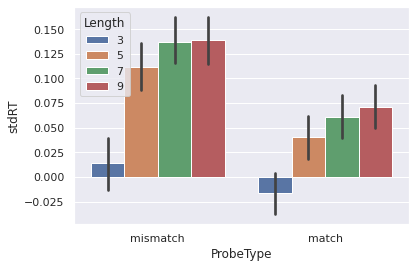

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'ProbeType',
    y = 'stdRT',
    hue = 'Length',
    data = eeg_no_trials
);
ax.set_xticklabels(['mismatch', 'match'])

[Text(0, 0, 'mismatch'), Text(0, 0, 'match')]

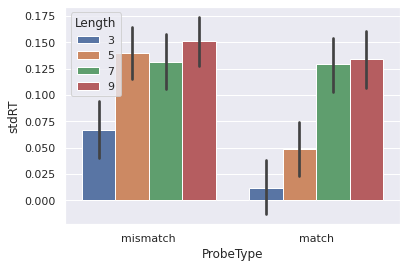

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'ProbeType',
    y = 'stdRT',
    hue = 'Length',
    data = ieeg_no_outliers
);
ax.set_xticklabels(['mismatch', 'match'])

**Match vs Mismatch**

Match

In [ ]:
%%R
comp1<-lmer('stdRT ~ Phono + Lex + Length + Phono:Lex + (1|Subject)', data=match_ieeg)
comp2<-lmer('stdRT ~ Phono + Lex + Length + Phono:Lex + Lex:Length:Phono + (1|Subject)', data=match_ieeg)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    7 4678.934 4717.865 -2332.467 4664.934        NA NA         NA
2    8 4680.750 4725.243 -2332.375 4664.750 0.1842042  1  0.6677848


In [ ]:
mod1 = Lmer(
    'stdRT ~ Phono + Lex + Length + Phono:Lex + (1|Subject)',
    data=match_ieeg
)
mod1.fit()

Formula: stdRT~Phono+Lex+Length+Phono:Lex+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1923	 Groups: {'Subject': 26.0}

Log-likelihood: -2344.140 	 AIC: 4688.280

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.300  0.547
Residual               0.633  0.795

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.561  -0.804   -0.318  0.124    41.781  -4.528  0.000  ***
Phono           0.143   0.044    0.242  0.050  1894.648   2.841  0.005   **
Lex            -0.013  -0.118    0.092  0.054  1893.317  -0.248  0.804     
Length          0.079   0.063    0.095  0.008  1893.203   9.644  0.000  ***
Phono:Lex      -0.144  -0.289   -0.000  0.074  1894.412  -1.962  0.050    *

Mismatch

In [ ]:
%%R
comp1<-lmer('stdRT ~ Length + Lex + (1|Subject)', data=mismatch_ieeg)
comp2<-lmer('stdRT ~ Length + Lex + Phono + Length:Lex + (1|Subject)', data=mismatch_ieeg)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    5 5349.796 5378.106 -2669.898 5339.796        NA NA         NA
2    7 5353.196 5392.830 -2669.598 5339.196 0.6007204  2  0.7405514


In [ ]:
mod1 = Lmer(
    'stdRT ~ Lex + Length + (1|Subject)',
    data=mismatch_ieeg
)
mod1.fit()

Formula: stdRT~Lex+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2126	 Groups: {'Subject': 26.0}

Log-likelihood: -2677.434 	 AIC: 5354.867

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.349  0.591
Residual               0.690  0.831

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)    -0.076  -0.328    0.176  0.128    35.960  -0.590  0.559     
Lex            -0.090  -0.161   -0.019  0.036  2098.901  -2.474  0.013    *
Length          0.030   0.015    0.046  0.008  2098.207   3.787  0.000  ***

**Significant plots**

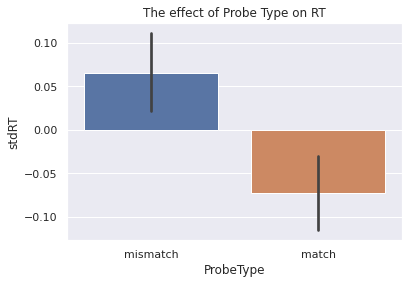

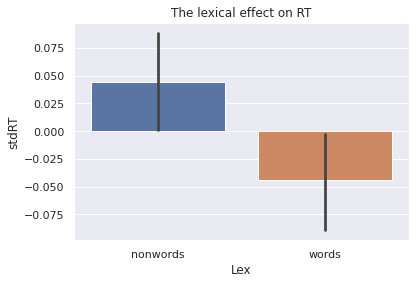

In [ ]:
pl.figure()
ax = sns.barplot(
    ieeg_no_outliers['ProbeType'], ieeg_no_outliers['stdRT']
)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The effect of Probe Type on RT');

pl.figure()
ax = sns.barplot(
    ieeg_no_outliers['Lex'], ieeg_no_outliers['stdRT']
)
ax.set_xticklabels(['nonwords', 'words'])
pl.title('The lexical effect on RT');

Ttest_indResult(statistic=array([-2.20008419]), pvalue=array([0.02785799]))

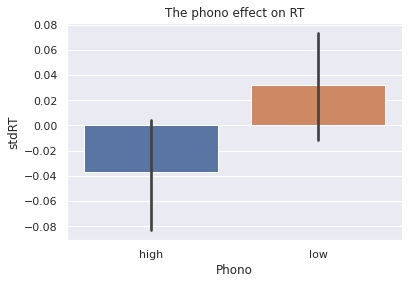

In [ ]:
pl.figure()
ax = sns.barplot(
    ieeg_no_outliers['Phono'], ieeg_no_outliers['stdRT']
)
ax.set_xticklabels(['high', 'low'])
pl.title('The phono effect on RT');

x, y = ieeg_no_outliers[ieeg_no_outliers['Phono'] == 0][['stdRT']].values, ieeg_no_outliers[ieeg_no_outliers['Phono'] == 1][['stdRT']].values
ttest(x,y)

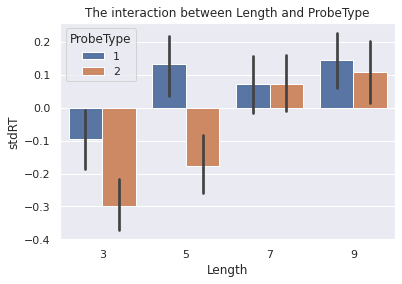

In [ ]:
pl.figure()
ax = sns.barplot(x="Length", y="stdRT", hue="ProbeType", data=ieeg_no_outliers)
pl.title('The interaction between Length and ProbeType');

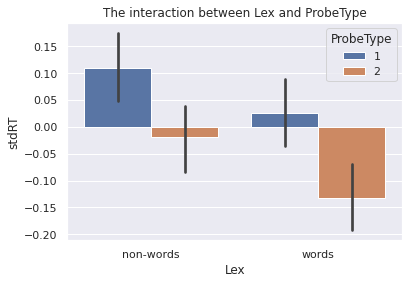

In [ ]:
pl.figure()
ax = sns.barplot(x="Lex", y="stdRT", hue="ProbeType", data=ieeg_no_outliers)
ax.set_xticklabels(['non-words', 'words'])
pl.title('The interaction between Lex and ProbeType');

In [ ]:
# for W M vs MM
subset = ieeg_no_outliers[ieeg_no_outliers['Lex'] == 1]
x, y = subset[subset['ProbeType'] == 2][['stdRT']].values, subset[subset['ProbeType'] == 1][['stdRT']].values
print(ttest(x,y))

# for NW M vs MM
subset = ieeg_no_outliers[ieeg_no_outliers['Lex'] == 0]
x, y = subset[subset['ProbeType'] == 2][['stdRT']].values, subset[subset['ProbeType'] == 1][['stdRT']].values
print(ttest(x,y))

# for M W vs NW 
subset = ieeg_no_outliers[ieeg_no_outliers['ProbeType'] == 2]
x, y = subset[subset['Lex'] == 0][['stdRT']].values, subset[subset['Lex'] == 1][['stdRT']].values
print(ttest(x,y))

# for MM W vs NW 
subset = ieeg_no_outliers[ieeg_no_outliers['ProbeType'] == 1]
x, y = subset[subset['Lex'] == 0][['stdRT']].values, subset[subset['Lex'] == 1][['stdRT']].values
print(ttest(x,y))

Ttest_indResult(statistic=array([-3.60141126]), pvalue=array([0.0003243]))
Ttest_indResult(statistic=array([-2.93155131]), pvalue=array([0.00341072]))
Ttest_indResult(statistic=array([2.55280725]), pvalue=array([0.01076331]))
Ttest_indResult(statistic=array([1.90561485]), pvalue=array([0.05683647]))


### Position

In [ ]:
position_ieeg = ieeg[ieeg['ProbeType'] == 2]

**Accuracy**

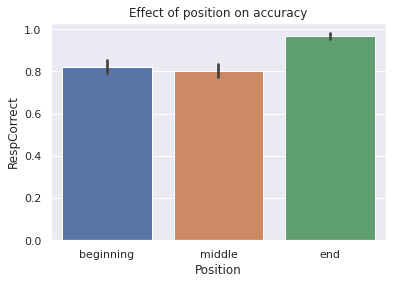

In [ ]:
pl.figure()
fig = sns.barplot(position_ieeg['Position'], position_ieeg['RespCorrect'])
fig.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Effect of position on accuracy');

In [ ]:
print('Ttest for position 1 vs 2')
x, y = position_ieeg[position_ieeg['Position'] == 1][['RespCorrect']].values, position_ieeg[position_ieeg['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3')
x, y = position_ieeg[position_ieeg['Position'] == 2][['RespCorrect']].values, position_ieeg[position_ieeg['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3')
x, y = position_ieeg[position_ieeg['Position'] == 1][['RespCorrect']].values, position_ieeg[position_ieeg['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

Ttest for position 1 vs 2
Ttest_indResult(statistic=array([0.89065999]), pvalue=array([0.37328624]))
Ttest for position 2 vs 3
Ttest_indResult(statistic=array([-9.49314385]), pvalue=array([2.35574855e-20]))
Ttest for position 1 vs 3
Ttest_indResult(statistic=array([-8.65382965]), pvalue=array([2.50536716e-17]))


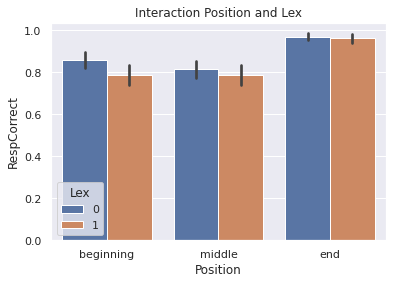

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'RespCorrect', hue = 'Lex',
    data = position_ieeg
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Lex');

In [ ]:
print('WORDS')
print('Ttest for position 1 vs 2 Words')
subset = position_ieeg[position_ieeg['Lex'] == 1]
x, y = subset[subset['Position'] == 1][['RespCorrect']].values, subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Words')
subset = position_ieeg[position_ieeg['Lex'] == 1]
x, y = subset[subset['Position'] == 3][['RespCorrect']].values, subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Words')
subset = position_ieeg[position_ieeg['Lex'] == 1]
x, y = subset[subset['Position'] == 1][['RespCorrect']].values, subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

print('NON WORDS')
print('Ttest for position 1 vs 2 Non-Words')
subset = position_ieeg[position_ieeg['Lex'] == 0]
x, y = subset[subset['Position'] == 1][['RespCorrect']].values, subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Non-Words')
subset = position_ieeg[position_ieeg['Lex'] == 0]
x, y = subset[subset['Position'] == 3][['RespCorrect']].values, subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Non-Words')
subset = position_ieeg[position_ieeg['Lex'] == 0]
x, y = subset[subset['Position'] == 1][['RespCorrect']].values, subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

print('POSITION')
print('Position 1 W vs NW')
subset = position_ieeg[position_ieeg['Position'] == 1]
x, y = subset[subset['Lex'] == 0][['RespCorrect']].values, subset[subset['Lex'] == 1][['RespCorrect']].values
print(ttest(x,y))

print('Position 2 W vs NW')
subset = position_ieeg[position_ieeg['Position'] == 2]
x, y = subset[subset['Lex'] == 0][['RespCorrect']].values, subset[subset['Lex'] == 1][['RespCorrect']].values
print(ttest(x,y))

print('Position 3 W vs NW')
subset = position_ieeg[position_ieeg['Position'] == 3]
x, y = subset[subset['Lex'] == 0][['RespCorrect']].values, subset[subset['Lex'] == 1][['RespCorrect']].values
print(ttest(x,y))

WORDS
Ttest for position 1 vs 2 Words
Ttest_indResult(statistic=array([-0.0202068]), pvalue=array([0.98388553]))
Ttest for position 2 vs 3 Words
Ttest_indResult(statistic=array([6.54503043]), pvalue=array([2.06047578e-10]))
Ttest for position 1 vs 3 Words
Ttest_indResult(statistic=array([-7.01824537]), pvalue=array([8.67486421e-12]))
NON WORDS
Ttest for position 1 vs 2 Non-Words
Ttest_indResult(statistic=array([1.57226275]), pvalue=array([0.1163788]))
Ttest for position 2 vs 3 Non-Words
Ttest_indResult(statistic=array([6.88661773]), pvalue=array([1.87272791e-11]))
Ttest for position 1 vs 3 Non-Words
Ttest_indResult(statistic=array([-5.06363317]), pvalue=array([6.21065359e-07]))
POSITION
Position 1 W vs NW
Ttest_indResult(statistic=array([2.4312272]), pvalue=array([0.01533761]))
Position 2 W vs NW
Ttest_indResult(statistic=array([0.86687043]), pvalue=array([0.38638534]))
Position 3 W vs NW
Ttest_indResult(statistic=array([0.45211424]), pvalue=array([0.65134018]))


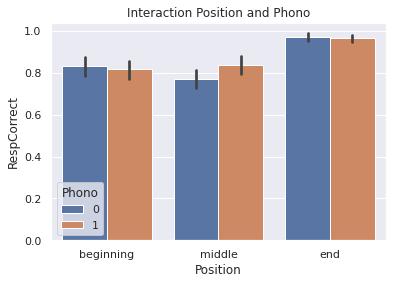

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'RespCorrect', hue = 'Phono',
    data = position_ieeg
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Phono');

In [ ]:
print('LOW')
print('Ttest for position 1 vs 2 Low')
subset = position_ieeg[position_ieeg['Phono'] == 1]
x, y = subset[subset['Position'] == 1][['RespCorrect']].values, subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Low')
x, y = subset[subset['Position'] == 3][['RespCorrect']].values, subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Low')
x, y = subset[subset['Position'] == 1][['RespCorrect']].values, subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

print('HIGH')
print('Ttest for position 1 vs 2 High')
subset = position_ieeg[position_ieeg['Phono'] == 0]
x, y = subset[subset['Position'] == 1][['RespCorrect']].values, subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 High')
x, y = subset[subset['Position'] == 3][['RespCorrect']].values, subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 High')
x, y = subset[subset['Position'] == 1][['RespCorrect']].values, subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

print('POSITION')
print('Position 1 W vs NW')
subset = position_ieeg[position_ieeg['Position'] == 1]
x, y = subset[subset['Phono'] == 0][['RespCorrect']].values, subset[subset['Phono'] == 1][['RespCorrect']].values
print(ttest(x,y))

print('Position 2 W vs NW')
subset = position_ieeg[position_ieeg['Position'] == 2]
x, y = subset[subset['Phono'] == 0][['RespCorrect']].values, subset[subset['Phono'] == 1][['RespCorrect']].values
print(ttest(x,y))

print('Position 3 W vs NW')
subset = position_ieeg[position_ieeg['Position'] == 3]
x, y = subset[subset['Phono'] == 0][['RespCorrect']].values, subset[subset['Phono'] == 1][['RespCorrect']].values
print(ttest(x,y))

LOW
Ttest for position 1 vs 2 Low
Ttest_indResult(statistic=array([-0.75612262]), pvalue=array([0.44986446]))
Ttest for position 2 vs 3 Low
Ttest_indResult(statistic=array([5.38161657]), pvalue=array([1.28962647e-07]))
Ttest for position 1 vs 3 Low
Ttest_indResult(statistic=array([-6.56319366]), pvalue=array([1.4053136e-10]))
HIGH
Ttest for position 1 vs 2 High
Ttest_indResult(statistic=array([1.83368208]), pvalue=array([0.06719902]))
Ttest for position 2 vs 3 High
Ttest_indResult(statistic=array([7.92275799]), pvalue=array([1.90677355e-14]))
Ttest for position 1 vs 3 High
Ttest_indResult(statistic=array([-5.65889471]), pvalue=array([3.0437446e-08]))
POSITION
Position 1 W vs NW
Ttest_indResult(statistic=array([0.49144438]), pvalue=array([0.62329453]))
Position 2 W vs NW
Ttest_indResult(statistic=array([-2.11196518]), pvalue=array([0.0350934]))
Position 3 W vs NW
Ttest_indResult(statistic=array([0.43216123]), pvalue=array([0.66577046]))


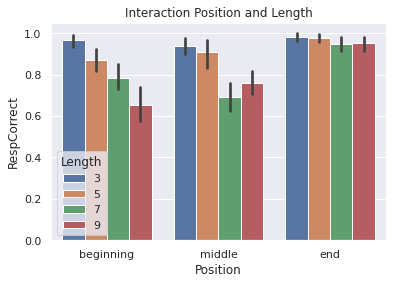

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'RespCorrect', hue = 'Length',
    data = position_ieeg
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Length');

In [ ]:
print('Beginning') 
print('Length 3 vs 5')
x = subset[subset['Length'] == 3][['RespCorrect']].values
y = subset[subset['Length'] == 5][['RespCorrect']].values
print(ttest(x,y))
print('Length 5 vs 7')
x = subset[subset['Length'] == 5][['RespCorrect']].values
y = subset[subset['Length'] == 7][['RespCorrect']].values
print(ttest(x,y))
print('Length 7 vs 9')
x = subset[subset['Length'] == 7][['RespCorrect']].values
y = subset[subset['Length'] == 9][['RespCorrect']].values
print(ttest(x,y))
print('Length 3 vs 7')
x = subset[subset['Length'] == 3][['RespCorrect']].values
y = subset[subset['Length'] == 7][['RespCorrect']].values
print(ttest(x,y))

In [ ]:
print('Middle') 
print('Length 3 vs 5')
subset = position_ieeg[position_ieeg['Position'] == 2]
x = subset[subset['Length'] == 3][['RespCorrect']].values
y = subset[subset['Length'] == 5][['RespCorrect']].values
print(ttest(x,y))
print('Length 5 vs 7')
x = subset[subset['Length'] == 5][['RespCorrect']].values
y = subset[subset['Length'] == 7][['RespCorrect']].values
print(ttest(x,y))
print('Length 7 vs 9')
x = subset[subset['Length'] == 7][['RespCorrect']].values
y = subset[subset['Length'] == 9][['RespCorrect']].values
print(ttest(x,y))
print('Length 3 vs 9')
x = subset[subset['Length'] == 3][['RespCorrect']].values
y = subset[subset['Length'] == 9][['RespCorrect']].values
print(ttest(x,y))

In [ ]:
print('End') 
print('Length 3 vs 5')
subset = position_ieeg[position_ieeg['Position'] == 3]
x = subset[subset['Length'] == 3][['RespCorrect']].values
y = subset[subset['Length'] == 5][['RespCorrect']].values
print(ttest(x,y))
print('Length 5 vs 7')
x = subset[subset['Length'] == 5][['RespCorrect']].values
y = subset[subset['Length'] == 7][['RespCorrect']].values
print(ttest(x,y))
print('Length 7 vs 9')
x = subset[subset['Length'] == 7][['RespCorrect']].values
y = subset[subset['Length'] == 9][['RespCorrect']].values
print(ttest(x,y))
print('Length 3 vs 7')
x = subset[subset['Length'] == 3][['RespCorrect']].values
y = subset[subset['Length'] == 7][['RespCorrect']].values
print(ttest(x,y))

End
Length 3 vs 5
Ttest_indResult(statistic=array([0.39526396]), pvalue=array([0.69285595]))
Length 5 vs 7
Ttest_indResult(statistic=array([1.46794783]), pvalue=array([0.14340712]))
Length 7 vs 9
Ttest_indResult(statistic=array([-0.15308282]), pvalue=array([0.87844685]))
Length 3 vs 7
Ttest_indResult(statistic=array([1.74040399]), pvalue=array([0.083086]))


In [ ]:
print('Length')
print('List 3')
subset = position_ieeg[position_ieeg['Length'] == 3]
print('Position beginning vs middle')
x = subset[subset['Position'] == 1][['RespCorrect']].values
y = subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))
print('Position middle vs end')
x = subset[subset['Position'] == 2][['RespCorrect']].values
y = subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))
print('Position beginning vs end')
x = subset[subset['Position'] == 1][['RespCorrect']].values
y = subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

print('List 5')
subset = position_ieeg[position_ieeg['Length'] == 5]
print('Position beginning vs middle')
x = subset[subset['Position'] == 1][['RespCorrect']].values
y = subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))
print('Position middle vs end')
x = subset[subset['Position'] == 2][['RespCorrect']].values
y = subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))
print('Position beginning vs end')
x = subset[subset['Position'] == 1][['RespCorrect']].values
y = subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

print('List 7')
subset = position_ieeg[position_ieeg['Length'] == 7]
print('Position beginning vs middle')
x = subset[subset['Position'] == 1][['RespCorrect']].values
y = subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))
print('Position middle vs end')
x = subset[subset['Position'] == 2][['RespCorrect']].values
y = subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))
print('Position beginning vs end')
x = subset[subset['Position'] == 1][['RespCorrect']].values
y = subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

print('List 9')
subset = position_ieeg[position_ieeg['Length'] == 9]
print('Position beginning vs middle')
x = subset[subset['Position'] == 1][['RespCorrect']].values
y = subset[subset['Position'] == 2][['RespCorrect']].values
print(ttest(x,y))
print('Position middle vs end')
x = subset[subset['Position'] == 2][['RespCorrect']].values
y = subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))
print('Position beginning vs end')
x = subset[subset['Position'] == 1][['RespCorrect']].values
y = subset[subset['Position'] == 3][['RespCorrect']].values
print(ttest(x,y))

Length
List 3
Position beginning vs middle
Ttest_indResult(statistic=array([1.13240128]), pvalue=array([0.25838417]))
Position middle vs end
Ttest_indResult(statistic=array([-2.14225552]), pvalue=array([0.03319766]))
Position beginning vs end
Ttest_indResult(statistic=array([-1.00497318]), pvalue=array([0.31589082]))
List 5
Position beginning vs middle
Ttest_indResult(statistic=array([-0.86615246]), pvalue=array([0.38795419]))
Position middle vs end
Ttest_indResult(statistic=array([-1.88157676]), pvalue=array([0.06385978]))
Position beginning vs end
Ttest_indResult(statistic=array([-3.91931015]), pvalue=array([0.00011966]))
List 7
Position beginning vs middle
Ttest_indResult(statistic=array([1.98484034]), pvalue=array([0.04795721]))
Position middle vs end
Ttest_indResult(statistic=array([-6.51770302]), pvalue=array([3.71961444e-10]))
Position beginning vs end
Ttest_indResult(statistic=array([-4.50833712]), pvalue=array([9.74493804e-06]))
List 9
Position beginning vs middle
Ttest_indRes

**Reaction Time**

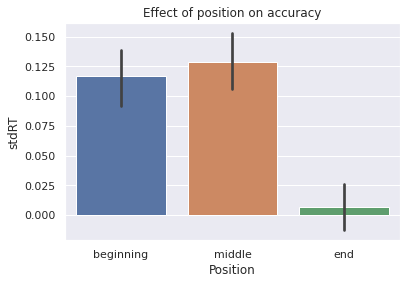

In [ ]:
pl.figure()
fig = sns.barplot(position_ieeg['Position'], position_ieeg['stdRT'])
fig.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Effect of position on accuracy');

In [ ]:
print('Ttest for position 1 vs 2')
x, y = position_ieeg[position_ieeg['Position'] == 1][['stdRT']].values, position_ieeg[position_ieeg['Position'] == 2][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3')
x, y = position_ieeg[position_ieeg['Position'] == 2][['stdRT']].values, position_ieeg[position_ieeg['Position'] == 3][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3')
x, y = position_ieeg[position_ieeg['Position'] == 1][['stdRT']].values, position_ieeg[position_ieeg['Position'] == 3][['stdRT']].values
print(ttest(x,y))

Ttest for position 1 vs 2
Ttest_indResult(statistic=array([-0.71481866]), pvalue=array([0.47485695]))
Ttest for position 2 vs 3
Ttest_indResult(statistic=array([7.58944554]), pvalue=array([6.23251271e-14]))
Ttest for position 1 vs 3
Ttest_indResult(statistic=array([6.93538649]), pvalue=array([6.43570587e-12]))


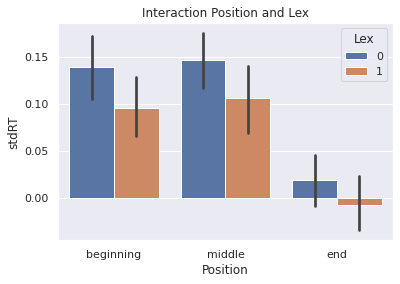

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'stdRT', hue = 'Lex',
    data = position_ieeg
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Lex');

In [ ]:
print('WORDS')
print('Ttest for position 1 vs 2 Words')
subset = position_ieeg[position_ieeg['Lex'] == 1]
x, y = subset[subset['Position'] == 1][['stdRT']].values, subset[subset['Position'] == 2][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Words')
subset = position_ieeg[position_ieeg['Lex'] == 1]
x, y = subset[subset['Position'] == 3][['stdRT']].values, subset[subset['Position'] == 2][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Words')
subset = position_ieeg[position_ieeg['Lex'] == 1]
x, y = subset[subset['Position'] == 1][['stdRT']].values, subset[subset['Position'] == 3][['stdRT']].values
print(ttest(x,y))

print('NON WORDS')
print('Ttest for position 1 vs 2 Non-Words')
subset = position_ieeg[position_ieeg['Lex'] == 0]
x, y = subset[subset['Position'] == 1][['stdRT']].values, subset[subset['Position'] == 2][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Non-Words')
subset = position_ieeg[position_ieeg['Lex'] == 0]
x, y = subset[subset['Position'] == 3][['stdRT']].values, subset[subset['Position'] == 2][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Non-Words')
subset = position_ieeg[position_ieeg['Lex'] == 0]
x, y = subset[subset['Position'] == 1][['stdRT']].values, subset[subset['Position'] == 3][['stdRT']].values
print(ttest(x,y))

print('POSITION')
print('Position 1 W vs NW')
subset = position_ieeg[position_ieeg['Position'] == 1]
x, y = subset[subset['Lex'] == 0][['stdRT']].values, subset[subset['Lex'] == 1][['stdRT']].values
print(ttest(x,y))

print('Position 2 W vs NW')
subset = position_ieeg[position_ieeg['Position'] == 2]
x, y = subset[subset['Lex'] == 0][['stdRT']].values, subset[subset['Lex'] == 1][['stdRT']].values
print(ttest(x,y))

print('Position 3 W vs NW')
subset = position_ieeg[position_ieeg['Position'] == 3]
x, y = subset[subset['Lex'] == 0][['stdRT']].values, subset[subset['Lex'] == 1][['stdRT']].values
print(ttest(x,y))

WORDS
Ttest for position 1 vs 2 Words
Ttest_indResult(statistic=array([-0.43488861]), pvalue=array([0.66381048]))
Ttest for position 2 vs 3 Words
Ttest_indResult(statistic=array([-4.71659252]), pvalue=array([3.0486593e-06]))
Ttest for position 1 vs 3 Words
Ttest_indResult(statistic=array([4.52394544]), pvalue=array([7.27002213e-06]))
NON WORDS
Ttest for position 1 vs 2 Non-Words
Ttest_indResult(statistic=array([-0.31909395]), pvalue=array([0.74975958]))
Ttest for position 2 vs 3 Non-Words
Ttest_indResult(statistic=array([-5.92361151]), pvalue=array([4.91740775e-09]))
Ttest for position 1 vs 3 Non-Words
Ttest_indResult(statistic=array([5.44504003]), pvalue=array([7.41782775e-08]))
POSITION
Position 1 W vs NW
Ttest_indResult(statistic=array([1.84825275]), pvalue=array([0.06504699]))
Position 2 W vs NW
Ttest_indResult(statistic=array([1.6486037]), pvalue=array([0.0997767]))
Position 3 W vs NW
Ttest_indResult(statistic=array([1.22747904]), pvalue=array([0.22007405]))


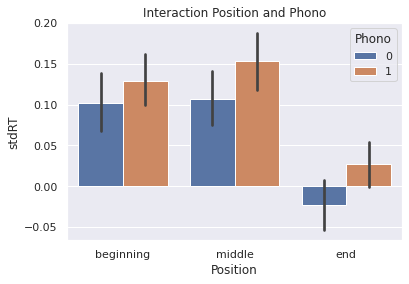

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'stdRT', hue = 'Phono',
    data = position_ieeg
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Phono');

In [ ]:
print('LOW')
print('Ttest for position 1 vs 2 Low')
subset = position_ieeg[position_ieeg['Phono'] == 1]
x, y = subset[subset['Position'] == 1][['stdRT']].values, subset[subset['Position'] == 2][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 Low')
x, y = subset[subset['Position'] == 3][['stdRT']].values, subset[subset['Position'] == 2][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 Low')
x, y = subset[subset['Position'] == 1][['stdRT']].values, subset[subset['Position'] == 3][['stdRT']].values
print(ttest(x,y))

print('HIGH')
print('Ttest for position 1 vs 2 High')
subset = position_ieeg[position_ieeg['Phono'] == 0]
x, y = subset[subset['Position'] == 1][['stdRT']].values, subset[subset['Position'] == 2][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 2 vs 3 High')
x, y = subset[subset['Position'] == 3][['stdRT']].values, subset[subset['Position'] == 2][['stdRT']].values
print(ttest(x,y))

print('Ttest for position 1 vs 3 High')
x, y = subset[subset['Position'] == 1][['stdRT']].values, subset[subset['Position'] == 3][['stdRT']].values
print(ttest(x,y))

print('POSITION')
print('Position 1 L vs H')
subset = position_ieeg[position_ieeg['Position'] == 1]
x, y = subset[subset['Phono'] == 0][['stdRT']].values, subset[subset['Phono'] == 1][['stdRT']].values
print(ttest(x,y))

print('Position 2 L vs H')
subset = position_ieeg[position_ieeg['Position'] == 2]
x, y = subset[subset['Phono'] == 0][['stdRT']].values, subset[subset['Phono'] == 1][['stdRT']].values
print(ttest(x,y))

print('Position 3 L vs H')
subset = position_ieeg[position_ieeg['Position'] == 3]
x, y = subset[subset['Phono'] == 0][['stdRT']].values, subset[subset['Phono'] == 1][['stdRT']].values
print(ttest(x,y))

LOW
Ttest for position 1 vs 2 Low
Ttest_indResult(statistic=array([-1.04847223]), pvalue=array([0.2948377]))
Ttest for position 2 vs 3 Low
Ttest_indResult(statistic=array([-5.6520622]), pvalue=array([2.44675198e-08]))
Ttest for position 1 vs 3 Low
Ttest_indResult(statistic=array([4.77961894]), pvalue=array([2.13012274e-06]))
HIGH
Ttest for position 1 vs 2 High
Ttest_indResult(statistic=array([-0.23999602]), pvalue=array([0.81041686]))
Ttest for position 2 vs 3 High
Ttest_indResult(statistic=array([-5.65115296]), pvalue=array([2.4495758e-08]))
Ttest for position 1 vs 3 High
Ttest_indResult(statistic=array([5.27034089]), pvalue=array([1.96692473e-07]))
POSITION
Position 1 L vs H
Ttest_indResult(statistic=array([-1.15996142]), pvalue=array([0.24653545]))
Position 2 L vs H
Ttest_indResult(statistic=array([-1.91971596]), pvalue=array([0.05536255]))
Position 3 L vs H
Ttest_indResult(statistic=array([-2.34956514]), pvalue=array([0.01910009]))


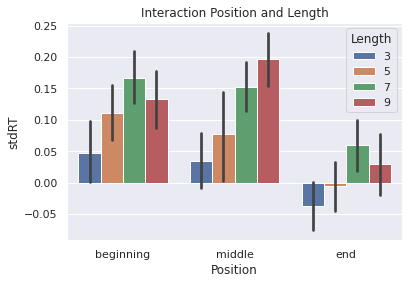

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Position', y = 'stdRT', hue = 'Length',
    data = position_ieeg
    )
ax.set_xticklabels(['beginning', 'middle', 'end'])
pl.title('Interaction Position and Length');

### Models with position

In [ ]:
%%R -i position_ieeg
comp1<-lmer('RespCorrect ~ Lex + Position + Length + Length:Position + (1|Subject)', data=position_ieeg)
comp2<-lmer('RespCorrect ~ Lex + Position + Length + Length:Position + Length:Lex + (1|Subject)', data=position_ieeg)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    7 1073.080 1112.011 -529.5399 1059.080       NA NA         NA
2    8 1074.044 1118.537 -529.0218 1058.044 1.036222  1  0.3087019


In [ ]:
modd = Lmer(
    'RespCorrect ~ Lex + Position + Length + Length:Position + (1|Subject)',
    data = position_ieeg
)
modd.fit()

Formula: RespCorrect~Lex+Position+Length+Length:Position+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 1923	 Groups: {'Subject': 26.0}

Log-likelihood: -549.390 	 AIC: 1098.781

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.004  0.063
Residual               0.100  0.316

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)         1.193   1.079    1.307  0.058  1619.239  20.523  0.000   
Lex                -0.030  -0.058   -0.001  0.015  1903.354  -2.052  0.040   
Position           -0.058  -0.108   -0.008  0.025  1896.911  -2.289  0.022   
Length             -0.075  -0.093   -0.058  0.009  1895.261  -8.392  0.000   
Position:Length     0.021   0.013    0.029  0.004  1895.746   5.169  0.000   

                 Sig  
(Intercept)      ***  
Lex                *  
Position           *  
Length           ***  
Position:Length  ***

# Slow/fast performers

Below we are separating all the performers into slow and fast based on their performance in reaction time. We will use the datasets eeg_rt and ieeg_rt that do not contain 'No Response' trials as we will further look at both accuracy and reaction time. 

**Classifying subjects**

In [ ]:
# EEG
slow = []
fast = []
slow_fast = eeg_rt.groupby(['Subject'])[['ReactionTime']].mean().reset_index()
mean_rt = slow_fast.ReactionTime.mean()
for i in slow_fast.Subject.values:
  if slow_fast[slow_fast['Subject'] == i][['ReactionTime']].values > mean_rt:
    slow.append(i)
  else:
    fast.append(i)

In [ ]:
values = eeg_rt.groupby(['Subject'])[['ReactionTime']].mean()
values = values.sort_values('ReactionTime')

In [ ]:
mean_ = []
for i in range(0, slow_fast.shape[0]):
  mean_.append(mean_rt)

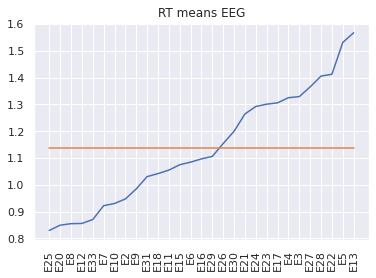

In [ ]:
pl.figure()
pl.plot(values.ReactionTime)
pl.plot(mean_)
pl.xticks(rotation = 90)
pl.title('RT means EEG');

In [ ]:
slowfast = []
subjs = eeg_rt.Subject.values
for i in subjs:
  if i in slow:
    slowfast.append(0)
  elif i in fast:
    slowfast.append(1)

In [ ]:
eeg_rt['Speed'] = slowfast

In [ ]:
eeg_rt.groupby(['Speed'])[['Trial']].count()

Trial
Speed       
0       2421
1       3047

In [ ]:
# iEEG
slow = []
fast = []
slow_fast = ieeg_rt.groupby(['Subject'])[['ReactionTime']].mean().reset_index()
mean_rt = slow_fast.ReactionTime.mean()
for i in slow_fast.Subject.values:
  if slow_fast[slow_fast['Subject'] == i][['ReactionTime']].values > mean_rt:
    slow.append(i)
  else:
    fast.append(i)

In [ ]:
values = ieeg_rt.groupby(['Subject'])[['ReactionTime']].mean()
values = values.sort_values('ReactionTime')

In [ ]:
mean_ = []
for i in range(0, slow_fast.shape[0]):
  mean_.append(mean_rt)

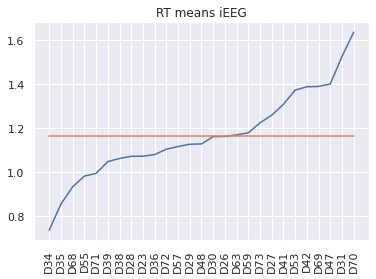

In [ ]:
pl.figure()
pl.plot(values.ReactionTime)
pl.plot(mean_)
pl.xticks(rotation = 90)
pl.title('RT means iEEG');

In [ ]:
slowfast = []
subjs = ieeg_rt.Subject.values
for i in subjs:
  if i in slow:
    slowfast.append(0)
  elif i in fast:
    slowfast.append(1)

In [ ]:
ieeg_rt['Speed'] = slowfast
ieeg_rt.groupby(['Speed'])[['Trial']].count()

Trial
Speed       
0       1712
1       2495

**Accuracy**

**EEG**

Significant difference [0.19509035]


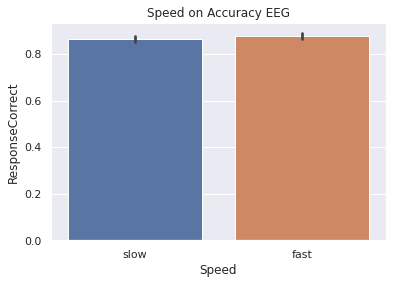

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ResponseCorrect', data = eeg_rt
    );
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed on Accuracy EEG');

x, y = eeg_rt[eeg_rt['Speed'] == 0][['ResponseCorrect']], eeg_rt[eeg_rt['Speed'] == 1][['ResponseCorrect']]
if ttest(x,y)[1] < 0.5:
  print('Significant difference', ttest(x,y)[1])
else:
  print('Not significant' + ttest(x,y)[1])

Fast
Ttest_indResult(statistic=array([1.77426449]), pvalue=array([0.07611995]))
Slow
Ttest_indResult(statistic=array([4.45241705]), pvalue=array([8.89272498e-06]))
Words
Ttest_indResult(statistic=array([-0.69704646]), pvalue=array([0.48583506]))
Non-words
Ttest_indResult(statistic=array([2.33049504]), pvalue=array([0.01986016]))


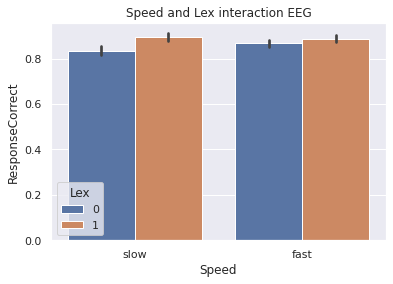

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ResponseCorrect', hue = 'Lex',
    data = eeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Lex interaction EEG');

print('Fast')
subset = eeg_rt[eeg_rt['Speed'] == 1]
x, y = subset[subset['Lex'] == 1][['ResponseCorrect']], subset[subset['Lex'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Slow')
subset = eeg_rt[eeg_rt['Speed'] == 0]
x, y = subset[subset['Lex'] == 1][['ResponseCorrect']], subset[subset['Lex'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Words')
subset = eeg_rt[eeg_rt['Lex'] == 1]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Non-words')
subset = eeg_rt[eeg_rt['Lex'] == 0]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([0.12965452]), pvalue=array([0.89684833]))
Slow
Ttest_indResult(statistic=array([-8.50066068]), pvalue=array([3.55513515e-17]))
Mismatch
Ttest_indResult(statistic=array([5.08763993]), pvalue=array([3.92171178e-07]))
Match
Ttest_indResult(statistic=array([-4.07749894]), pvalue=array([4.68140688e-05]))


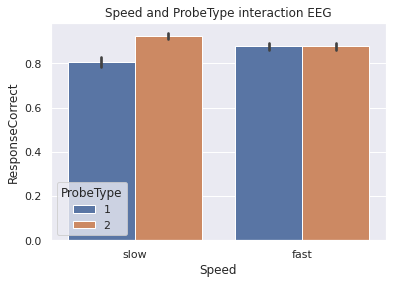

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ResponseCorrect', hue = 'ProbeType',
    data = eeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and ProbeType interaction EEG');

print('Fast')
subset = eeg_rt[eeg_rt['Speed'] == 1]
x, y = subset[subset['ProbeType'] == 1][['ResponseCorrect']], subset[subset['ProbeType'] == 2][['ResponseCorrect']]
print(ttest(x,y))
print('Slow')
subset = eeg_rt[eeg_rt['Speed'] == 0]
x, y = subset[subset['ProbeType'] == 1][['ResponseCorrect']], subset[subset['ProbeType'] == 2][['ResponseCorrect']]
print(ttest(x,y))
print('Mismatch')
subset = eeg_rt[eeg_rt['ProbeType'] == 1]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Match')
subset = eeg_rt[eeg_rt['ProbeType'] == 2]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([-0.33925896]), pvalue=array([0.73443818]))
Slow
Ttest_indResult(statistic=array([-0.25404474]), pvalue=array([0.79948269]))
Low
Ttest_indResult(statistic=array([0.87692761]), pvalue=array([0.38061103]))
High
Ttest_indResult(statistic=array([0.95435762]), pvalue=array([0.33999076]))


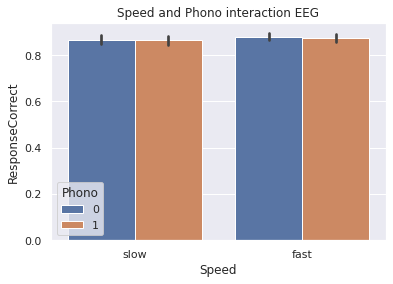

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ResponseCorrect', hue = 'Phono',
    data = eeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Phono interaction EEG');

print('Fast')
subset = eeg_rt[eeg_rt['Speed'] == 1]
x, y = subset[subset['Phono'] == 1][['ResponseCorrect']], subset[subset['Phono'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Slow')
subset = eeg_rt[eeg_rt['Speed'] == 0]
x, y = subset[subset['Phono'] == 1][['ResponseCorrect']], subset[subset['Phono'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Low')
subset = eeg_rt[eeg_rt['Phono'] == 1]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('High')
subset = eeg_rt[eeg_rt['Phono'] == 0]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))

Fast
Length 3 vs 5
Ttest_indResult(statistic=array([6.43457469]), pvalue=array([1.81093468e-10]))
Length 5 vs 7
Ttest_indResult(statistic=array([-2.55088162]), pvalue=array([0.01084445]))
Length 7 vs 9
Ttest_indResult(statistic=array([2.23161178]), pvalue=array([0.02578705]))

Slow
Length 3 vs 5
Ttest_indResult(statistic=array([7.08943131]), pvalue=array([2.87529885e-12]))
Length 5 vs 7
Ttest_indResult(statistic=array([-2.22323107]), pvalue=array([0.02638663]))
Length 7 vs 9
Ttest_indResult(statistic=array([1.45410981]), pvalue=array([0.14617595]))

Length 3
Ttest_indResult(statistic=array([-0.52134498]), pvalue=array([0.60221301]))
Length 5
Ttest_indResult(statistic=array([1.10389438]), pvalue=array([0.26985225]))
Length 7
Ttest_indResult(statistic=array([1.05055149]), pvalue=array([0.2936639]))
Length 9
Ttest_indResult(statistic=array([0.48433501]), pvalue=array([0.62823071]))


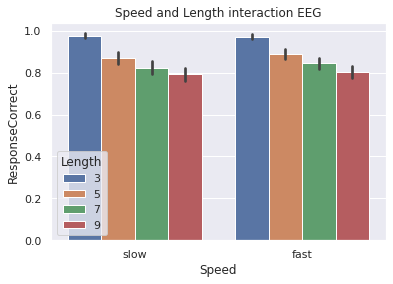

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ResponseCorrect', hue = 'Length',
    data = eeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Length interaction EEG');

print('Fast')
subset = eeg_rt[eeg_rt['Speed'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ResponseCorrect']], subset[subset['Length'] == 5][['ResponseCorrect']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ResponseCorrect']], subset[subset['Length'] == 5][['ResponseCorrect']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ResponseCorrect']], subset[subset['Length'] == 9][['ResponseCorrect']]
print(ttest(x,y))
print('')
print('Slow')
subset = eeg_rt[eeg_rt['Speed'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ResponseCorrect']], subset[subset['Length'] == 5][['ResponseCorrect']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ResponseCorrect']], subset[subset['Length'] == 5][['ResponseCorrect']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ResponseCorrect']], subset[subset['Length'] == 9][['ResponseCorrect']]
print(ttest(x,y))
print('')
print('Length 3')
subset = eeg_rt[eeg_rt['Length'] == 3]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Length 5')
subset = eeg_rt[eeg_rt['Length'] == 5]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Length 7')
subset = eeg_rt[eeg_rt['Length'] == 7]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Length 9')
subset = eeg_rt[eeg_rt['Length'] == 9]
x, y = subset[subset['Speed'] == 1][['ResponseCorrect']], subset[subset['Speed'] == 0][['ResponseCorrect']]
print(ttest(x,y))

**iEEG**

Significant difference [0.01214258]


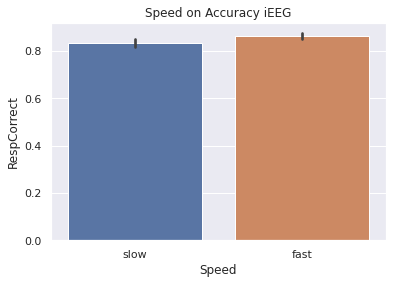

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'RespCorrect', data = ieeg_rt
    );
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed on Accuracy iEEG');

x, y = ieeg_rt[ieeg_rt['Speed'] == 0][['RespCorrect']], ieeg_rt[ieeg_rt['Speed'] == 1][['RespCorrect']]
if ttest(x,y)[1] < 0.5:
  print('Significant difference', ttest(x,y)[1])
else:
  print('Not significant' + ttest(x,y)[1])

Fast
Ttest_indResult(statistic=array([1.8500163]), pvalue=array([0.06443027]))
Slow
Ttest_indResult(statistic=array([-1.12128485]), pvalue=array([0.26232447]))
Words
Ttest_indResult(statistic=array([3.19602072]), pvalue=array([0.00141957]))
Non-words
Ttest_indResult(statistic=array([0.34798526]), pvalue=array([0.72789144]))


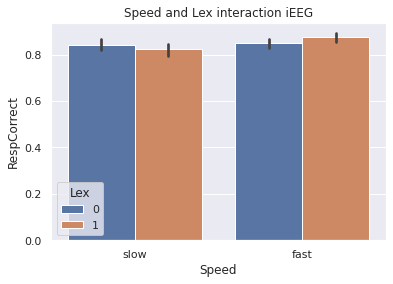

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'RespCorrect', hue = 'Lex',
    data = ieeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Lex interaction iEEG');

print('Fast')
subset = ieeg_rt[ieeg_rt['Speed'] == 1]
x, y = subset[subset['Lex'] == 1][['RespCorrect']], subset[subset['Lex'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Slow')
subset = ieeg_rt[ieeg_rt['Speed'] == 0]
x, y = subset[subset['Lex'] == 1][['RespCorrect']], subset[subset['Lex'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Words')
subset = ieeg_rt[ieeg_rt['Lex'] == 1]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Non-words')
subset = ieeg_rt[ieeg_rt['Lex'] == 0]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([-2.21500256]), pvalue=array([0.02685023]))
Slow
Ttest_indResult(statistic=array([-2.46322251]), pvalue=array([0.01386781]))
Mismatch
Ttest_indResult(statistic=array([2.0636396]), pvalue=array([0.03918654]))
Match
Ttest_indResult(statistic=array([1.28189153]), pvalue=array([0.20006864]))


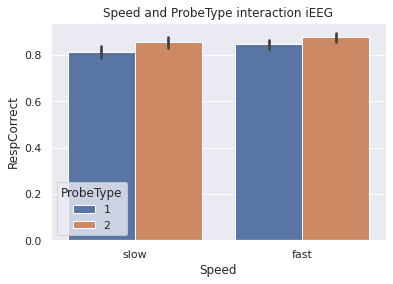

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'RespCorrect', hue = 'ProbeType',
    data = ieeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and ProbeType interaction iEEG');

print('Fast')
subset = ieeg_rt[ieeg_rt['Speed'] == 1]
x, y = subset[subset['ProbeType'] == 1][['RespCorrect']], subset[subset['ProbeType'] == 2][['RespCorrect']]
print(ttest(x,y))
print('Slow')
subset = ieeg_rt[ieeg_rt['Speed'] == 0]
x, y = subset[subset['ProbeType'] == 1][['RespCorrect']], subset[subset['ProbeType'] == 2][['RespCorrect']]
print(ttest(x,y))
print('Mismatch')
subset = ieeg_rt[ieeg_rt['ProbeType'] == 1]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Match')
subset = ieeg_rt[ieeg_rt['ProbeType'] == 2]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([0.88282137]), pvalue=array([0.37741937]))
Slow
Ttest_indResult(statistic=array([0.4645647]), pvalue=array([0.64230516]))
Low
Ttest_indResult(statistic=array([1.99866847]), pvalue=array([0.04578528]))
High
Ttest_indResult(statistic=array([1.57360052]), pvalue=array([0.11578194]))


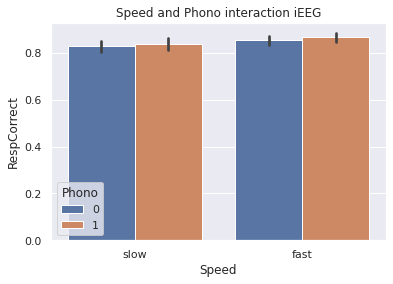

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'RespCorrect', hue = 'Phono',
    data = ieeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Phono interaction iEEG');

print('Fast')
subset = ieeg_rt[ieeg_rt['Speed'] == 1]
x, y = subset[subset['Phono'] == 1][['RespCorrect']], subset[subset['Phono'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Slow')
subset = ieeg_rt[ieeg_rt['Speed'] == 0]
x, y = subset[subset['Phono'] == 1][['RespCorrect']], subset[subset['Phono'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Low')
subset = ieeg_rt[ieeg_rt['Phono'] == 1]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))
print('High')
subset = ieeg_rt[ieeg_rt['Phono'] == 0]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))

Fast
Length 3 vs 5
Ttest_indResult(statistic=array([3.51264539]), pvalue=array([0.00046104]))
Length 5 vs 7
Ttest_indResult(statistic=array([-3.39016933]), pvalue=array([0.00072115]))
Length 7 vs 9
Ttest_indResult(statistic=array([1.82400105]), pvalue=array([0.06839283]))

Slow
Length 3 vs 5
Ttest_indResult(statistic=array([2.18029357]), pvalue=array([0.02952225]))
Length 5 vs 7
Ttest_indResult(statistic=array([-4.25262204]), pvalue=array([2.36181859e-05]))
Length 7 vs 9
Ttest_indResult(statistic=array([1.19650727]), pvalue=array([0.23182995]))

Length 3
Ttest_indResult(statistic=array([1.12715171]), pvalue=array([0.25999901]))
Length 5
Ttest_indResult(statistic=array([0.3306231]), pvalue=array([0.74100679]))
Length 7
Ttest_indResult(statistic=array([1.90322294]), pvalue=array([0.05734375]))
Length 9
Ttest_indResult(statistic=array([1.56593577]), pvalue=array([0.11772204]))


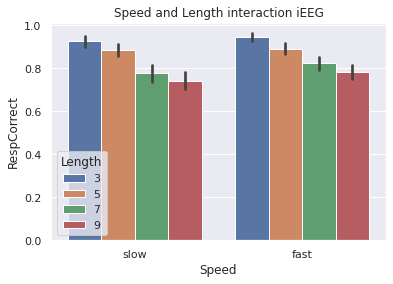

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'RespCorrect', hue = 'Length',
    data = ieeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Length interaction iEEG');

print('Fast')
subset = ieeg_rt[ieeg_rt['Speed'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['RespCorrect']], subset[subset['Length'] == 5][['RespCorrect']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['RespCorrect']], subset[subset['Length'] == 5][['RespCorrect']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['RespCorrect']], subset[subset['Length'] == 9][['RespCorrect']]
print(ttest(x,y))
print('')
print('Slow')
subset = ieeg_rt[ieeg_rt['Speed'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['RespCorrect']], subset[subset['Length'] == 5][['RespCorrect']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['RespCorrect']], subset[subset['Length'] == 5][['RespCorrect']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['RespCorrect']], subset[subset['Length'] == 9][['RespCorrect']]
print(ttest(x,y))
print('')
print('Length 3')
subset = ieeg_rt[ieeg_rt['Length'] == 3]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Length 5')
subset = ieeg_rt[ieeg_rt['Length'] == 5]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Length 7')
subset = ieeg_rt[ieeg_rt['Length'] == 7]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Length 9')
subset = ieeg_rt[ieeg_rt['Length'] == 9]
x, y = subset[subset['Speed'] == 1][['RespCorrect']], subset[subset['Speed'] == 0][['RespCorrect']]
print(ttest(x,y))

**Models with speed variable**

In [ ]:
%%R -i eeg_rt
comp1<-lmer('ResponseCorrect ~ Lex + Length + ProbeType + Speed + ProbeType:Speed + Lex:ProbeType + Length:ProbeType + (1|Subject)', data=eeg_rt)
comp2<-lmer('ResponseCorrect ~ Lex + Length + ProbeType + Speed + ProbeType:Speed + Lex:ProbeType + Length:ProbeType + ProbeType:Speed:Lex + (1|Subject)', data=eeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1   10 3192.925 3258.991 -1586.462 3172.925       NA NA         NA
2   11 3192.980 3265.653 -1585.490 3170.980 1.944669  1  0.1631625


In [ ]:
mod = Lmer(
    'ResponseCorrect ~ Lex + Length + ProbeType + Speed + ProbeType:Speed + Lex:ProbeType + Length:ProbeType + (1|Subject)',
    data = eeg_rt
)
mod.fit()

Formula: ResponseCorrect~Lex+Length+ProbeType+Speed+ProbeType:Speed+Lex:ProbeType+Length:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5468	 Groups: {'Subject': 29.0}

Log-likelihood: -1617.387 	 AIC: 3234.773

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.038
Residual               0.104  0.323

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          0.895   0.805    0.985  0.046  2804.008  19.522  0.000   
Lex                  0.102   0.047    0.156  0.028  5434.081   3.673  0.000   
Length              -0.041  -0.053   -0.029  0.006  5442.286  -6.652  0.000   
ProbeType            0.082   0.027    0.138  0.028  5437.434   2.914  0.004   
Speed                0.190   0.128    0.251  0.031   324.116   6.069  0.000   
ProbeType:Speed     -0.118  -0.152   -0.083  0.018  5436.890  -6.706  0.000   
Lex:ProbeType       -0.044  -0.078   -0.010  0.018  5434.277  -2.504  0.012   
Length:ProbeType     0.008   0.001    0.016  0.004  5442.773   2.142  0.032   

                  Sig  
(Intercept)       ***  
Lex               ***  
Length            ***  
ProbeType          **  
Speed             ***  
ProbeType:Speed   ***  
Lex:ProbeType       *  
Length:ProbeType    *

In [ ]:
%%R -i ieeg_rt
comp1<-lmer('RespCorrect ~ Length + ProbeType + Lex + Speed + Lex:ProbeType + Speed:Lex + (1|Subject)', data=ieeg_rt)
comp2<-lmer('RespCorrect ~ Length + ProbeType + Lex + Speed + Lex:ProbeType + Speed:Lex + Phono + (1|Subject)', data=ieeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    9 3100.086 3157.187 -1541.043 3082.086        NA NA         NA
2   10 3101.929 3165.374 -1540.964 3081.929 0.1573994  1  0.6915622


In [ ]:
mod = Lmer(
    'RespCorrect ~ Length + ProbeType + Lex + Speed + Lex:ProbeType + Speed:Lex + (1|Subject)',
    data = ieeg_rt
)
mod.fit()

Formula: RespCorrect~Length+ProbeType+Lex+Speed+Lex:ProbeType+Speed:Lex+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 4207	 Groups: {'Subject': 27.0}

Log-likelihood: -1566.068 	 AIC: 3132.135

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.002  0.039
Residual               0.121  0.348

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)       0.901   0.839    0.964  0.032   547.910  28.207  0.000  ***
Length           -0.030  -0.034   -0.025  0.002  4175.430 -12.408  0.000  ***
ProbeType         0.079   0.050    0.109  0.015  4180.535   5.216  0.000  ***
Lex               0.114   0.044    0.184  0.036  4189.949   3.187  0.001   **
Speed             0.006  -0.037    0.048  0.022    44.779   0.270  0.788     
ProbeType:Lex    -0.089  -0.132   -0.047  0.022  4193.280  -4.124  0.000  ***
Lex:Speed         0.046   0.003    0.088  0.022  4175.298   2.083  0.037    *

**Reaction Time**

**EEG**

Ttest_indResult(statistic=array([-42.34459826]), pvalue=array([0.]))


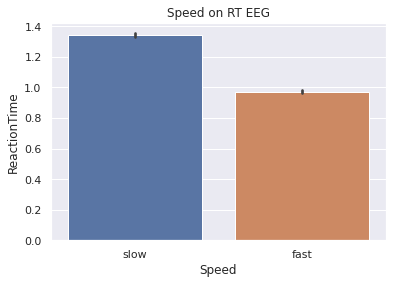

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime',
    data = eeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed on RT EEG');

x, y = eeg_rt[eeg_rt['Speed'] == 1][['ReactionTime']], eeg_rt[eeg_rt['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([-5.08016505]), pvalue=array([4.00030016e-07]))
Slow
Ttest_indResult(statistic=array([-2.91061755]), pvalue=array([0.00364012]))
Words
Ttest_indResult(statistic=array([-31.12759]), pvalue=array([1.3459748e-178]))
Non-words
Ttest_indResult(statistic=array([-28.94697357]), pvalue=array([6.29714877e-159]))


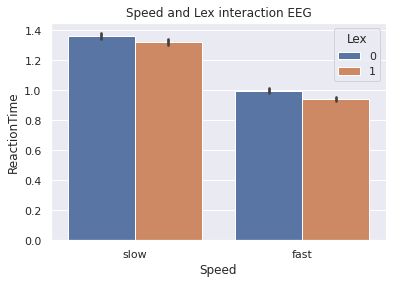

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime', hue = 'Lex',
    data = eeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Lex interaction EEG');

print('Fast')
subset = eeg_rt[eeg_rt['Speed'] == 1]
x, y = subset[subset['Lex'] == 1][['ReactionTime']], subset[subset['Lex'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Slow')
subset = eeg_rt[eeg_rt['Speed'] == 0]
x, y = subset[subset['Lex'] == 1][['ReactionTime']], subset[subset['Lex'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Words')
subset = eeg_rt[eeg_rt['Lex'] == 1]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Non-words')
subset = eeg_rt[eeg_rt['Lex'] == 0]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([1.41622559]), pvalue=array([0.15681207]))
Slow
Ttest_indResult(statistic=array([0.24389415]), pvalue=array([0.80733355]))
Low
Ttest_indResult(statistic=array([-29.03275375]), pvalue=array([1.10117385e-158]))
High
Ttest_indResult(statistic=array([-30.82665359]), pvalue=array([3.99353362e-177]))


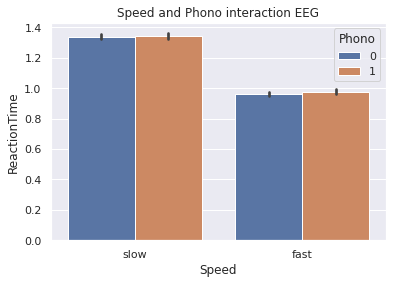

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime', hue = 'Phono',
    data = eeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Phono interaction EEG');

print('Fast')
subset = eeg_rt[eeg_rt['Speed'] == 1]
x, y = subset[subset['Phono'] == 1][['ReactionTime']], subset[subset['Phono'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Slow')
subset = eeg_rt[eeg_rt['Speed'] == 0]
x, y = subset[subset['Phono'] == 1][['ReactionTime']], subset[subset['Phono'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Low')
subset = eeg_rt[eeg_rt['Phono'] == 1]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('High')
subset = eeg_rt[eeg_rt['Phono'] == 0]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([3.94255671]), pvalue=array([8.24731556e-05]))
Slow
Ttest_indResult(statistic=array([11.13452816]), pvalue=array([4.1515958e-28]))
Mismatch
Ttest_indResult(statistic=array([-32.98175325]), pvalue=array([9.02523373e-198]))
Match
Ttest_indResult(statistic=array([-27.88673356]), pvalue=array([7.15799156e-149]))


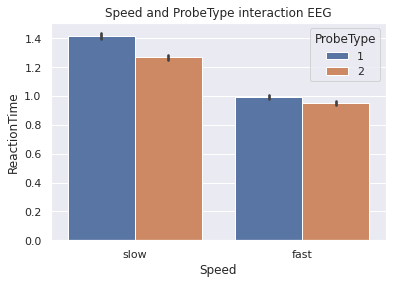

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime', hue = 'ProbeType',
    data = eeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and ProbeType interaction EEG');

print('Fast')
subset = eeg_rt[eeg_rt['Speed'] == 1]
x, y = subset[subset['ProbeType'] == 1][['ReactionTime']], subset[subset['ProbeType'] == 2][['ReactionTime']]
print(ttest(x,y))
print('Slow')
subset = eeg_rt[eeg_rt['Speed'] == 0]
x, y = subset[subset['ProbeType'] == 1][['ReactionTime']], subset[subset['ProbeType'] == 2][['ReactionTime']]
print(ttest(x,y))
print('Mismatch')
subset = eeg_rt[eeg_rt['ProbeType'] == 1]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Match')
subset = eeg_rt[eeg_rt['ProbeType'] == 2]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))

Fast
Length 3 vs 5
Ttest_indResult(statistic=array([-4.98403883]), pvalue=array([6.94082319e-07]))
Length 5 vs 7
Ttest_indResult(statistic=array([1.77332799]), pvalue=array([0.07637462]))
Length 7 vs 9
Ttest_indResult(statistic=array([-0.86124935]), pvalue=array([0.38923658]))

Slow
Length 3 vs 5
Ttest_indResult(statistic=array([-5.2123364]), pvalue=array([2.19365999e-07]))
Length 5 vs 7
Ttest_indResult(statistic=array([1.48771471]), pvalue=array([0.1370879]))
Length 7 vs 9
Ttest_indResult(statistic=array([0.1803648]), pvalue=array([0.85689635]))

Length 3
Ttest_indResult(statistic=array([-21.90854949]), pvalue=array([4.82957894e-90]))
Length 5
Ttest_indResult(statistic=array([-22.10052783]), pvalue=array([2.2899831e-91]))
Length 7
Ttest_indResult(statistic=array([-20.9978733]), pvalue=array([1.24935734e-83]))
Length 9
Ttest_indResult(statistic=array([-20.73307671]), pvalue=array([6.7604263e-82]))


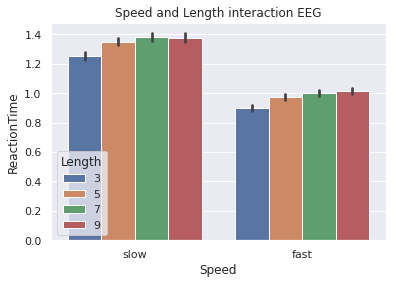

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime', hue = 'Length',
    data = eeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Length interaction EEG');

print('Fast')
subset = eeg_rt[eeg_rt['Speed'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 9][['ReactionTime']]
print(ttest(x,y))
print('')
print('Slow')
subset = eeg_rt[eeg_rt['Speed'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 9][['ReactionTime']]
print(ttest(x,y))
print('')
print('Length 3')
subset = eeg_rt[eeg_rt['Length'] == 3]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 5')
subset = eeg_rt[eeg_rt['Length'] == 5]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 7')
subset = eeg_rt[eeg_rt['Length'] == 7]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 9')
subset = eeg_rt[eeg_rt['Length'] == 9]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))

**iEEG**

Ttest_indResult(statistic=array([30.02053058]), pvalue=array([5.88386993e-176]))


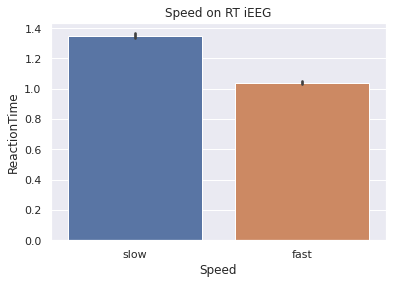

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime',
    data = ieeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed on RT iEEG');

x, y = ieeg_rt[ieeg_rt['Speed'] == 0][['ReactionTime']], ieeg_rt[ieeg_rt['Speed'] == 1][['ReactionTime']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([-2.76629006]), pvalue=array([0.00571163]))
Slow
Ttest_indResult(statistic=array([-1.61474496]), pvalue=array([0.10655043]))
Words
Ttest_indResult(statistic=array([-21.52513705]), pvalue=array([4.76267102e-91]))
Non-words
Ttest_indResult(statistic=array([-20.95479995]), pvalue=array([5.03548677e-87]))


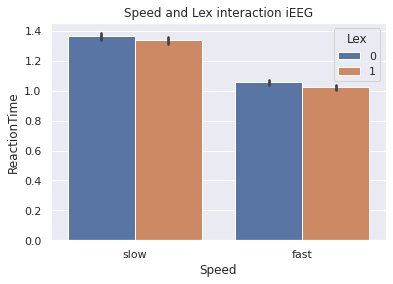

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime', hue = 'Lex',
    data = ieeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Lex interaction iEEG');

print('Fast')
subset = ieeg_rt[ieeg_rt['Speed'] == 1]
x, y = subset[subset['Lex'] == 1][['ReactionTime']], subset[subset['Lex'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Slow')
subset = ieeg_rt[ieeg_rt['Speed'] == 0]
x, y = subset[subset['Lex'] == 1][['ReactionTime']], subset[subset['Lex'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Words')
subset = ieeg_rt[ieeg_rt['Lex'] == 1]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Non-words')
subset = ieeg_rt[ieeg_rt['Lex'] == 0]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([0.28479201]), pvalue=array([0.77582757]))
Slow
Ttest_indResult(statistic=array([2.05592909]), pvalue=array([0.03994466]))
Low
Ttest_indResult(statistic=array([-22.94223599]), pvalue=array([1.08513737e-102]))
High
Ttest_indResult(statistic=array([-19.39399379]), pvalue=array([2.64137592e-75]))


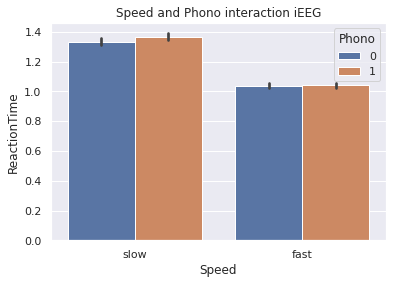

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime', hue = 'Phono',
    data = ieeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Phono interaction iEEG');

print('Fast')
subset = ieeg_rt[ieeg_rt['Speed'] == 1]
x, y = subset[subset['Phono'] == 1][['ReactionTime']], subset[subset['Phono'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Slow')
subset = ieeg_rt[ieeg_rt['Speed'] == 0]
x, y = subset[subset['Phono'] == 1][['ReactionTime']], subset[subset['Phono'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Low')
subset = ieeg_rt[ieeg_rt['Phono'] == 1]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('High')
subset = ieeg_rt[ieeg_rt['Phono'] == 0]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))

Fast
Ttest_indResult(statistic=array([2.60637461]), pvalue=array([0.00920513]))
Slow
Ttest_indResult(statistic=array([2.64517657]), pvalue=array([0.00824117]))
Mismatch
Ttest_indResult(statistic=array([-21.87361365]), pvalue=array([1.088743e-94]))
Match
Ttest_indResult(statistic=array([-20.43208309]), pvalue=array([2.85573051e-82]))


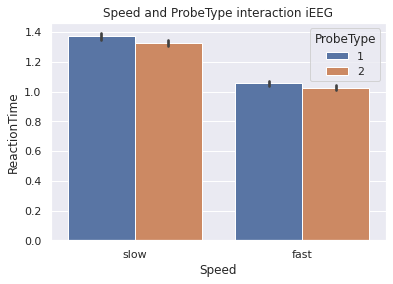

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime', hue = 'ProbeType',
    data = ieeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and ProbeType interaction iEEG');

print('Fast')
subset = ieeg_rt[ieeg_rt['Speed'] == 1]
x, y = subset[subset['ProbeType'] == 1][['ReactionTime']], subset[subset['ProbeType'] == 2][['ReactionTime']]
print(ttest(x,y))
print('Slow')
subset = ieeg_rt[ieeg_rt['Speed'] == 0]
x, y = subset[subset['ProbeType'] == 1][['ReactionTime']], subset[subset['ProbeType'] == 2][['ReactionTime']]
print(ttest(x,y))
print('Mismatch')
subset = ieeg_rt[ieeg_rt['ProbeType'] == 1]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Match')
subset = ieeg_rt[ieeg_rt['ProbeType'] == 2]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))

Fast
Length 3 vs 5
Ttest_indResult(statistic=array([-3.41414006]), pvalue=array([0.00066044]))
Length 5 vs 7
Ttest_indResult(statistic=array([1.78707034]), pvalue=array([0.07417032]))
Length 7 vs 9
Ttest_indResult(statistic=array([-0.69364598]), pvalue=array([0.48803427]))

Slow
Length 3 vs 5
Ttest_indResult(statistic=array([-2.87864944]), pvalue=array([0.00409464]))
Length 5 vs 7
Ttest_indResult(statistic=array([1.1560001]), pvalue=array([0.24800821]))
Length 7 vs 9
Ttest_indResult(statistic=array([-1.54134261]), pvalue=array([0.123603]))

Length 3
Ttest_indResult(statistic=array([-14.99297282]), pvalue=array([2.02483912e-45]))
Length 5
Ttest_indResult(statistic=array([-14.41261797]), pvalue=array([3.33996069e-42]))
Length 7
Ttest_indResult(statistic=array([-15.48066166]), pvalue=array([9.07002705e-48]))
Length 9
Ttest_indResult(statistic=array([-15.73127624]), pvalue=array([3.26756235e-49]))


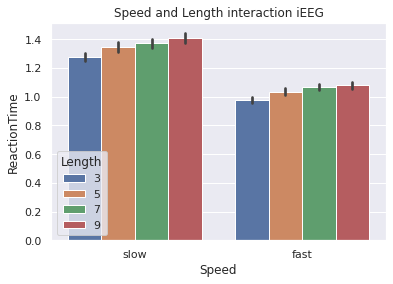

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Speed', y = 'ReactionTime', hue = 'Length',
    data = ieeg_rt
)
ax.set_xticklabels(['slow', 'fast'])
pl.title('Speed and Length interaction iEEG');

print('Fast')
subset = ieeg_rt[ieeg_rt['Speed'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 9][['ReactionTime']]
print(ttest(x,y))
print('')
print('Slow')
subset = ieeg_rt[ieeg_rt['Speed'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 9][['ReactionTime']]
print(ttest(x,y))
print('')
print('Length 3')
subset = ieeg_rt[ieeg_rt['Length'] == 3]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 5')
subset = ieeg_rt[ieeg_rt['Length'] == 5]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 7')
subset = ieeg_rt[ieeg_rt['Length'] == 7]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 9')
subset = ieeg_rt[ieeg_rt['Length'] == 9]
x, y = subset[subset['Speed'] == 1][['ReactionTime']], subset[subset['Speed'] == 0][['ReactionTime']]
print(ttest(x,y))

**Models with Speed as var' RT**

In [ ]:
%%R
comp1<-lmer('ReactionTime ~ Lex + Length + ProbeType + Speed + Speed:ProbeType + ProbeType:Length + (1|Subject)', data=eeg_rt)
comp2<-lmer('ReactionTime ~ Lex + Length + ProbeType + Speed + Speed:ProbeType + ProbeType:Length + Lex:Length + (1|Subject)', data=eeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    9 2141.947 2201.407 -1061.973 2123.947        NA NA         NA
2   10 2143.806 2209.873 -1061.903 2123.806 0.1407247  1  0.7075616


In [ ]:
mod = Lmer(
    'ReactionTime ~ Lex + Length + ProbeType + Speed + Speed:ProbeType + ProbeType:Length + (1|Subject)',
    data = eeg_rt
)
mod.fit()

Formula: ReactionTime~Lex+Length+ProbeType+Speed+Speed:ProbeType+ProbeType:Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5468	 Groups: {'Subject': 29.0}

Log-likelihood: -1088.498 	 AIC: 2176.995

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.011  0.106
Residual               0.085  0.291

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          1.392   1.297    1.487  0.049   181.773  28.600   0.00   
Lex                 -0.042  -0.058   -0.027  0.008  5434.011  -5.344   0.00   
Length               0.032   0.021    0.043  0.006  5435.381   5.784   0.00   
ProbeType           -0.092  -0.140   -0.044  0.024  5434.873  -3.786   0.00   
Speed               -0.535  -0.627   -0.443  0.047    48.987 -11.364   0.00   
ProbeType:Speed      0.108   0.077    0.139  0.016  5434.535   6.781   0.00   
Length:ProbeType    -0.009  -0.016   -0.002  0.004  5435.467  -2.589   0.01   

                  Sig  
(Intercept)       ***  
Lex               ***  
Length            ***  
ProbeType         ***  
Speed             ***  
ProbeType:Speed   ***  
Length:ProbeType   **

In [ ]:
%%R
comp1<-lmer('ReactionTime ~ Speed + Lex + Length + ProbeType + Phono + ProbeType:Length + (1|Subject)', data=ieeg_rt)
comp2<-lmer('ReactionTime ~ Speed + Lex + Length + ProbeType + Phono + ProbeType:Length + Length:Phono + (1|Subject)', data=ieeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    9 1769.366 1826.466 -875.6829 1751.366        NA NA         NA
2   10 1770.923 1834.368 -875.4614 1750.923 0.4431248  1  0.5056181


In [ ]:
mod = Lmer(
    'ReactionTime ~ Speed + Lex + Length + ProbeType + Phono + ProbeType:Length + (1|Subject)',
    data = ieeg_rt
)
mod.fit()

Formula: ReactionTime~Speed+Lex+Length+ProbeType+Phono+ProbeType:Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 4207	 Groups: {'Subject': 27.0}

Log-likelihood: -901.773 	 AIC: 1803.546

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.016  0.126
Residual               0.087  0.295

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          1.448   1.337    1.559  0.057   114.541  25.585  0.000   
Speed               -0.309  -0.407   -0.211  0.050    24.998  -6.168  0.000   
Lex                 -0.034  -0.052   -0.017  0.009  4175.026  -3.778  0.000   
Length              -0.005  -0.017    0.008  0.006  4175.424  -0.765  0.444   
ProbeType           -0.137  -0.188   -0.085  0.026  4175.381  -5.225  0.000   
Phono                0.017  -0.001    0.035  0.009  4177.099   1.858  0.063   
Length:ProbeType     0.016   0.008    0.024  0.004  4175.480   3.921  0.000   

                  Sig  
(Intercept)       ***  
Speed             ***  
Lex               ***  
Length                 
ProbeType         ***  
Phono               .  
Length:ProbeType  ***

# Good and bad performers 

Below we are separating all the performers into good and bad based on their performance in accuracy. We will use the datasets eeg_rt and ieeg_rt that do not contain 'No Response' trials as we will further look at both accuracy and reaction time. 

**Classyfying subjects**

In [ ]:
# EEG
good = []
bad = []
good_bad = eeg_rt.groupby(['Subject'])[['ResponseCorrect']].mean().reset_index()
mean_acc = good_bad.ResponseCorrect.mean()
for i in good_bad.Subject.values:
  if good_bad[good_bad['Subject'] == i][['ResponseCorrect']].values > mean_acc:
    good.append(i)
  else:
    bad.append(i)

In [ ]:
values = eeg_rt.groupby(['Subject'])[['ResponseCorrect']].mean()
values = values.sort_values('ResponseCorrect')

In [ ]:
mean_ = []
for i in range(0, good_bad.shape[0]):
  mean_.append(mean_acc)

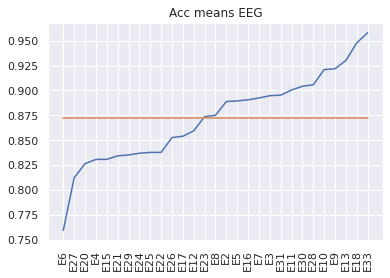

In [ ]:
pl.figure()
pl.plot(values.ResponseCorrect)
pl.plot(mean_)
pl.xticks(rotation = 90)
pl.title('Acc means EEG');

In [ ]:
goodbad = []
subjs = eeg_rt.Subject.values
for i in subjs:
  if i in bad:
    goodbad.append(0)
  elif i in good:
    goodbad.append(1)

In [ ]:
eeg_rt['Success'] = goodbad
eeg_rt.groupby(['Success'])[['Trial']].count()

Trial
Success       
0         2441
1         3027

In [ ]:
# iEEG
good = []
bad = []
good_bad = ieeg_rt.groupby(['Subject'])[['RespCorrect']].mean().reset_index()
mean_acc = good_bad.RespCorrect.mean()
for i in good_bad.Subject.values:
  if good_bad[good_bad['Subject'] == i][['RespCorrect']].values > mean_acc:
    good.append(i)
  else:
    bad.append(i)

In [ ]:
values = ieeg_rt.groupby(['Subject'])[['RespCorrect']].mean()
values = values.sort_values('RespCorrect')

In [ ]:
mean_ = []
for i in range(0, good_bad.shape[0]):
  mean_.append(mean_acc)

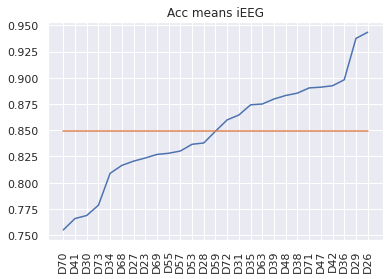

In [ ]:
pl.figure()
pl.plot(values.RespCorrect)
pl.plot(mean_)
pl.xticks(rotation = 90)
pl.title('Acc means iEEG');

In [ ]:
goodbad = []
subjs = ieeg_rt.Subject.values
for i in subjs:
  if i in bad:
    goodbad.append(0)
  elif i in good:
    goodbad.append(1)

In [ ]:
ieeg_rt['Success'] = goodbad
ieeg_rt.groupby(['Success'])[['Trial']].count()

Trial
Success       
0         2011
1         2196

**EEG**

Ttest_indResult(statistic=array([8.0226601]), pvalue=array([1.30602261e-15]))


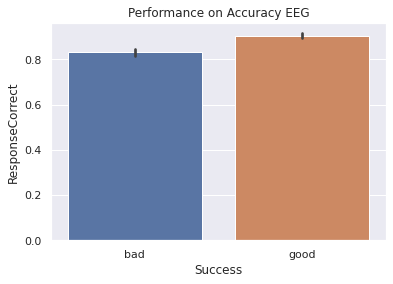

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ResponseCorrect',
    data = eeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance on Accuracy EEG')

x, y = eeg_rt[eeg_rt['Success'] == 1][['ResponseCorrect']], eeg_rt[eeg_rt['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([2.42638372]), pvalue=array([0.0153092]))
Bad
Ttest_indResult(statistic=array([3.6552981]), pvalue=array([0.00026241]))
Words
Ttest_indResult(statistic=array([4.89063282]), pvalue=array([1.07493371e-06]))
Non-words
Ttest_indResult(statistic=array([6.40499137]), pvalue=array([1.82374523e-10]))


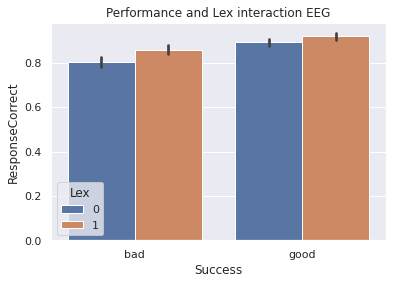

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ResponseCorrect', hue = 'Lex',
    data = eeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Lex interaction EEG');

print('Good')
subset = eeg_rt[eeg_rt['Success'] == 1]
x, y = subset[subset['Lex'] == 1][['ResponseCorrect']], subset[subset['Lex'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Bad')
subset = eeg_rt[eeg_rt['Success'] == 0]
x, y = subset[subset['Lex'] == 1][['ResponseCorrect']], subset[subset['Lex'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Words')
subset = eeg_rt[eeg_rt['Lex'] == 1]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Non-words')
subset = eeg_rt[eeg_rt['Lex'] == 0]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([0.9161913]), pvalue=array([0.3596396]))
Bad
Ttest_indResult(statistic=array([-1.40386164]), pvalue=array([0.16048915]))
Low
Ttest_indResult(statistic=array([6.72331585]), pvalue=array([2.27693596e-11]))
High
Ttest_indResult(statistic=array([4.63544968]), pvalue=array([3.75048466e-06]))


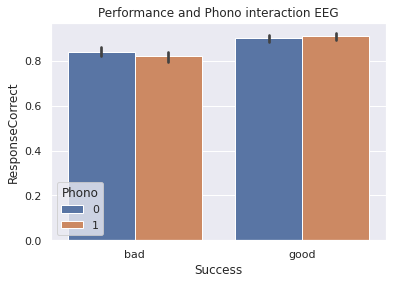

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ResponseCorrect', hue = 'Phono',
    data = eeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Phono interaction EEG');

print('Good')
subset = eeg_rt[eeg_rt['Success'] == 1]
x, y = subset[subset['Phono'] == 1][['ResponseCorrect']], subset[subset['Phono'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Bad')
subset = eeg_rt[eeg_rt['Success'] == 0]
x, y = subset[subset['Phono'] == 1][['ResponseCorrect']], subset[subset['Phono'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Low')
subset = eeg_rt[eeg_rt['Phono'] == 1]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('High')
subset = eeg_rt[eeg_rt['Phono'] == 0]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([-0.08315494]), pvalue=array([0.93373385]))
Bad
Ttest_indResult(statistic=array([-7.59254321]), pvalue=array([4.58550416e-14]))
Mismatch
Ttest_indResult(statistic=array([9.26658585]), pvalue=array([4.68840348e-20]))
Match
Ttest_indResult(statistic=array([1.58874309]), pvalue=array([0.11224193]))


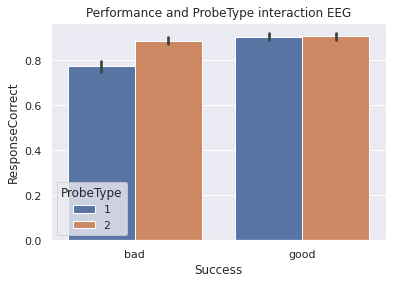

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ResponseCorrect', hue = 'ProbeType',
    data = eeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and ProbeType interaction EEG');

print('Good')
subset = eeg_rt[eeg_rt['Success'] == 1]
x, y = subset[subset['ProbeType'] == 1][['ResponseCorrect']], subset[subset['ProbeType'] == 2][['ResponseCorrect']]
print(ttest(x,y))
print('Bad')
subset = eeg_rt[eeg_rt['Success'] == 0]
x, y = subset[subset['ProbeType'] == 1][['ResponseCorrect']], subset[subset['ProbeType'] == 2][['ResponseCorrect']]
print(ttest(x,y))
print('Mismatch')
subset = eeg_rt[eeg_rt['ProbeType'] == 1]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Match')
subset = eeg_rt[eeg_rt['ProbeType'] == 2]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))

Good
Length 3 vs 5
Ttest_indResult(statistic=array([5.60235791]), pvalue=array([2.70670284e-08]))
Length 5 vs 7
Ttest_indResult(statistic=array([-4.14338291]), pvalue=array([3.62673277e-05]))
Length 7 vs 9
Ttest_indResult(statistic=array([1.39905884]), pvalue=array([0.16200157]))

Bad
Length 3 vs 5
Ttest_indResult(statistic=array([7.82998216]), pvalue=array([1.33787963e-14]))
Length 5 vs 7
Ttest_indResult(statistic=array([-0.96306008]), pvalue=array([0.33570846]))
Length 7 vs 9
Ttest_indResult(statistic=array([2.29191073]), pvalue=array([0.02208136]))

Length 3
Ttest_indResult(statistic=array([3.09439518]), pvalue=array([0.00203231]))
Length 5
Ttest_indResult(statistic=array([5.96783821]), pvalue=array([3.30870644e-09]))
Length 7
Ttest_indResult(statistic=array([3.19290084]), pvalue=array([0.00144502]))
Length 9
Ttest_indResult(statistic=array([4.27450344]), pvalue=array([2.06785609e-05]))


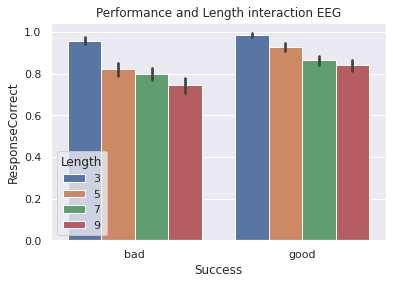

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ResponseCorrect', hue = 'Length',
    data = eeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Length interaction EEG');

print('Good')
subset = eeg_rt[eeg_rt['Success'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ResponseCorrect']], subset[subset['Length'] == 5][['ResponseCorrect']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ResponseCorrect']], subset[subset['Length'] == 5][['ResponseCorrect']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ResponseCorrect']], subset[subset['Length'] == 9][['ResponseCorrect']]
print(ttest(x,y))
print('')
print('Bad')
subset = eeg_rt[eeg_rt['Success'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ResponseCorrect']], subset[subset['Length'] == 5][['ResponseCorrect']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ResponseCorrect']], subset[subset['Length'] == 5][['ResponseCorrect']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ResponseCorrect']], subset[subset['Length'] == 9][['ResponseCorrect']]
print(ttest(x,y))
print('')
print('Length 3')
subset = eeg_rt[eeg_rt['Length'] == 3]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Length 5')
subset = eeg_rt[eeg_rt['Length'] == 5]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Length 7')
subset = eeg_rt[eeg_rt['Length'] == 7]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))
print('Length 9')
subset = eeg_rt[eeg_rt['Length'] == 9]
x, y = subset[subset['Success'] == 1][['ResponseCorrect']], subset[subset['Success'] == 0][['ResponseCorrect']]
print(ttest(x,y))

**iEEG**

Ttest_indResult(statistic=array([7.21612295]), pvalue=array([6.41139603e-13]))


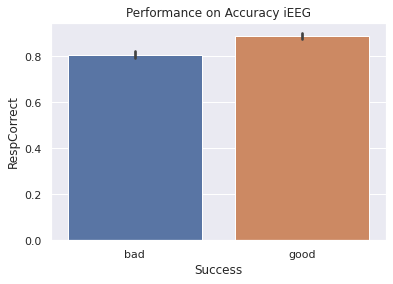

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'RespCorrect',
    data = ieeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance on Accuracy iEEG')

x, y = ieeg_rt[ieeg_rt['Success'] == 1][['RespCorrect']], ieeg_rt[ieeg_rt['Success'] == 0][['RespCorrect']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([1.55356883]), pvalue=array([0.12043153]))
Bad
Ttest_indResult(statistic=array([-0.45448442]), pvalue=array([0.64952931]))
Words
Ttest_indResult(statistic=array([6.09197384]), pvalue=array([1.34967592e-09]))
Non-words
Ttest_indResult(statistic=array([4.13395839]), pvalue=array([3.71567232e-05]))


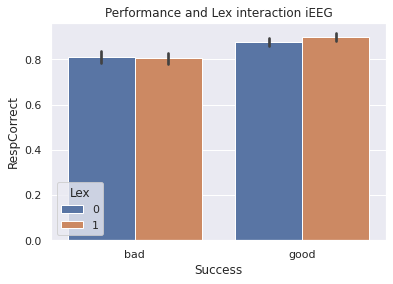

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'RespCorrect', hue = 'Lex',
    data = ieeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Lex interaction iEEG');

print('Good')
subset = ieeg_rt[ieeg_rt['Success'] == 1]
x, y = subset[subset['Lex'] == 1][['RespCorrect']], subset[subset['Lex'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Bad')
subset = ieeg_rt[ieeg_rt['Success'] == 0]
x, y = subset[subset['Lex'] == 1][['RespCorrect']], subset[subset['Lex'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Words')
subset = ieeg_rt[ieeg_rt['Lex'] == 1]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Non-words')
subset = ieeg_rt[ieeg_rt['Lex'] == 0]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([-0.17455382]), pvalue=array([0.86144659]))
Bad
Ttest_indResult(statistic=array([1.34222057]), pvalue=array([0.17968135]))
Low
Ttest_indResult(statistic=array([4.52810038]), pvalue=array([6.28736651e-06]))
High
Ttest_indResult(statistic=array([5.70540338]), pvalue=array([1.35858604e-08]))


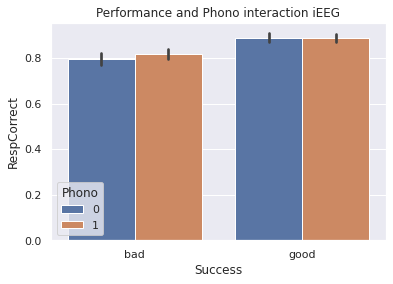

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'RespCorrect', hue = 'Phono',
    data = ieeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Phono interaction iEEG');

print('Good')
subset = ieeg_rt[ieeg_rt['Success'] == 1]
x, y = subset[subset['Phono'] == 1][['RespCorrect']], subset[subset['Phono'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Bad')
subset = ieeg_rt[ieeg_rt['Success'] == 0]
x, y = subset[subset['Phono'] == 1][['RespCorrect']], subset[subset['Phono'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Low')
subset = ieeg_rt[ieeg_rt['Phono'] == 1]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))
print('High')
subset = ieeg_rt[ieeg_rt['Phono'] == 0]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([-2.23344421]), pvalue=array([0.02562039]))
Bad
Ttest_indResult(statistic=array([-2.40581002]), pvalue=array([0.01622667]))
Mismatch
Ttest_indResult(statistic=array([5.34165668]), pvalue=array([1.02248676e-07]))
Match
Ttest_indResult(statistic=array([4.78869358]), pvalue=array([1.81758631e-06]))


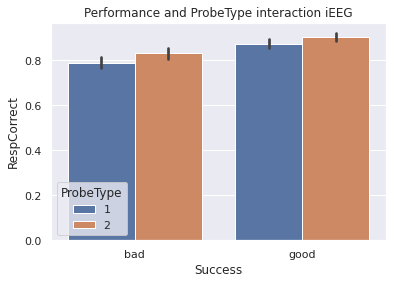

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'RespCorrect', hue = 'ProbeType',
    data = ieeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and ProbeType interaction iEEG');

print('Good')
subset = ieeg_rt[ieeg_rt['Success'] == 1]
x, y = subset[subset['ProbeType'] == 1][['RespCorrect']], subset[subset['ProbeType'] == 2][['RespCorrect']]
print(ttest(x,y))
print('Bad')
subset = ieeg_rt[ieeg_rt['Success'] == 0]
x, y = subset[subset['ProbeType'] == 1][['RespCorrect']], subset[subset['ProbeType'] == 2][['RespCorrect']]
print(ttest(x,y))
print('Mismatch')
subset = ieeg_rt[ieeg_rt['ProbeType'] == 1]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Match')
subset = ieeg_rt[ieeg_rt['ProbeType'] == 2]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))

Good
Length 3 vs 5
Ttest_indResult(statistic=array([3.99154823]), pvalue=array([7.11300479e-05]))
Length 5 vs 7
Ttest_indResult(statistic=array([-4.08745503]), pvalue=array([4.70654547e-05]))
Length 7 vs 9
Ttest_indResult(statistic=array([1.30341685]), pvalue=array([0.19270713]))

Bad
Length 3 vs 5
Ttest_indResult(statistic=array([2.20171067]), pvalue=array([0.02791304]))
Length 5 vs 7
Ttest_indResult(statistic=array([-3.59305807]), pvalue=array([0.00034317]))
Length 7 vs 9
Ttest_indResult(statistic=array([1.74332445]), pvalue=array([0.08158394]))

Length 3
Ttest_indResult(statistic=array([5.04946532]), pvalue=array([5.58592323e-07]))
Length 5
Ttest_indResult(statistic=array([3.50365384]), pvalue=array([0.00048073]))
Length 7
Ttest_indResult(statistic=array([3.19230146]), pvalue=array([0.00145566]))
Length 9
Ttest_indResult(statistic=array([3.69815395]), pvalue=array([0.00022902]))


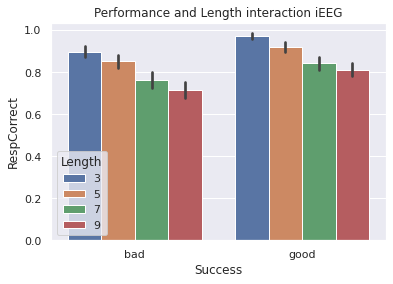

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'RespCorrect', hue = 'Length',
    data = ieeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Length interaction iEEG');

print('Good')
subset = ieeg_rt[ieeg_rt['Success'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['RespCorrect']], subset[subset['Length'] == 5][['RespCorrect']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['RespCorrect']], subset[subset['Length'] == 5][['RespCorrect']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['RespCorrect']], subset[subset['Length'] == 9][['RespCorrect']]
print(ttest(x,y))
print('')
print('Bad')
subset = ieeg_rt[ieeg_rt['Success'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['RespCorrect']], subset[subset['Length'] == 5][['RespCorrect']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['RespCorrect']], subset[subset['Length'] == 5][['RespCorrect']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['RespCorrect']], subset[subset['Length'] == 9][['RespCorrect']]
print(ttest(x,y))
print('')
print('Length 3')
subset = ieeg_rt[ieeg_rt['Length'] == 3]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Length 5')
subset = ieeg_rt[ieeg_rt['Length'] == 5]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Length 7')
subset = ieeg_rt[ieeg_rt['Length'] == 7]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))
print('Length 9')
subset = ieeg_rt[ieeg_rt['Length'] == 9]
x, y = subset[subset['Success'] == 1][['RespCorrect']], subset[subset['Success'] == 0][['RespCorrect']]
print(ttest(x,y))

**Models with Performance variable Accuracy**

In [ ]:
%%R -i eeg_rt
comp1<-lmer('ResponseCorrect ~ Length + Lex + ProbeType + Success + ProbeType:Lex + ProbeType:Length + Success:ProbeType + (1|Subject)', data=eeg_rt)
comp2<-lmer('ResponseCorrect ~ Length + Lex + ProbeType + Success + ProbeType:Lex + ProbeType:Length + Success:ProbeType + Success:Lex:ProbeType + (1|Subject)', data=eeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1   10 3162.802 3228.868 -1571.401 3142.802       NA NA         NA
2   11 3163.259 3235.932 -1570.629 3141.259 1.543077  1  0.2141603


In [ ]:
mod = Lmer(
    'ResponseCorrect ~ Length + Lex + ProbeType + Success + ProbeType:Lex + ProbeType:Length + Success:ProbeType + (1|Subject)',
    data = eeg_rt
)
mod.fit()

Formula: ResponseCorrect~Length+Lex+ProbeType+Success+ProbeType:Lex+ProbeType:Length+Success:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5468	 Groups: {'Subject': 29.0}

Log-likelihood: -1603.530 	 AIC: 3207.060

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.000  0.007
Residual               0.104  0.323

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)           0.867   0.779    0.955  0.045  5076.706  19.391  0.000   
Length               -0.041  -0.053   -0.029  0.006  5455.967  -6.642  0.000   
Lex                   0.101   0.047    0.156  0.028  5436.757   3.653  0.000   
ProbeType             0.078   0.022    0.133  0.028  5446.294   2.750  0.006   
Success               0.242   0.187    0.296  0.028  1749.603   8.642  0.000   
Lex:ProbeType        -0.044  -0.078   -0.009  0.018  5437.356  -2.493  0.013   
Length:ProbeType      0.008   0.001    0.016  0.004  5456.778   2.153  0.031   
ProbeType:Success    -0.111  -0.146   -0.077  0.018  5445.589  -6.331  0.000   

                   Sig  
(Intercept)        ***  
Length             ***  
Lex                ***  
ProbeType           **  
Success            ***  
Lex:ProbeType        *  
Length:ProbeType     *  
ProbeType:Success  ***

In [ ]:
%%R -i ieeg_rt
comp1<-lmer('RespCorrect ~ ProbeType + Length + Success + Lex + Lex:ProbeType + (1|Subject)', data=ieeg_rt)
comp2<-lmer('RespCorrect ~ ProbeType + Length + Success + Lex + Lex:ProbeType + (1|Subject)', data=ieeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance Chisq Df Pr..Chisq.
1    8 3073.397 3124.153 -1528.698 3057.397    NA NA         NA
2    8 3073.397 3124.153 -1528.698 3057.397     0  0         NA


In [ ]:
mod = Lmer(
    'RespCorrect ~ ProbeType + Length + Success + Lex + Lex:ProbeType + (1|Subject)',
    data = ieeg_rt
)
mod.fit()

Formula: RespCorrect~ProbeType+Length+Success+Lex+Lex:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 4207	 Groups: {'Subject': 27.0}

Log-likelihood: -1551.881 	 AIC: 3103.762

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.000  0.001
Residual               0.121  0.348

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)       0.864   0.807    0.920  0.029  2377.512  29.965    0.0  ***
ProbeType         0.079   0.049    0.109  0.015  4190.019   5.201    0.0  ***
Length           -0.030  -0.035   -0.025  0.002  4177.359 -12.417    0.0  ***
Success           0.080   0.059    0.101  0.011    25.005   7.432    0.0  ***
Lex               0.137   0.071    0.203  0.034  4197.331   4.083    0.0  ***
ProbeType:Lex    -0.087  -0.129   -0.044  0.022  4192.273  -4.018    0.0  ***

**Reaction Time**

**EEG**

Ttest_indResult(statistic=array([1.87284392]), pvalue=array([0.06114645]))


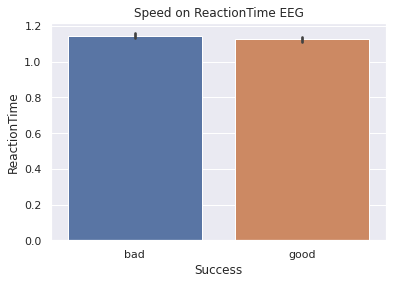

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', data = eeg_rt
    );
ax.set_xticklabels(['bad', 'good'])
pl.title('Speed on ReactionTime EEG');

x, y = eeg_rt[eeg_rt['Success'] == 0][['ReactionTime']], eeg_rt[eeg_rt['Success'] == 1][['ReactionTime']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([-4.23461163]), pvalue=array([2.35774643e-05]))
Bad
Ttest_indResult(statistic=array([-2.55710763]), pvalue=array([0.01061474]))
Words
Ttest_indResult(statistic=array([-1.95176572]), pvalue=array([0.05107367]))
Non-words
Ttest_indResult(statistic=array([-0.71229162]), pvalue=array([0.47634903]))


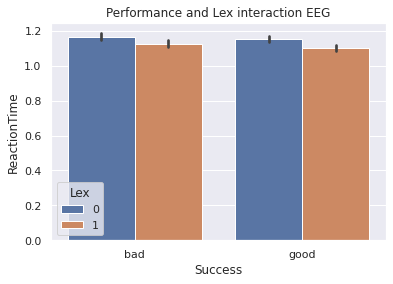

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', hue = 'Lex',
    data = eeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Lex interaction EEG');

print('Good')
subset = eeg_rt[eeg_rt['Success'] == 1]
x, y = subset[subset['Lex'] == 1][['ReactionTime']], subset[subset['Lex'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Bad')
subset = eeg_rt[eeg_rt['Success'] == 0]
x, y = subset[subset['Lex'] == 1][['ReactionTime']], subset[subset['Lex'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Words')
subset = eeg_rt[eeg_rt['Lex'] == 1]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Non-words')
subset = eeg_rt[eeg_rt['Lex'] == 0]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([-0.26025915]), pvalue=array([0.7946816]))
Bad
Ttest_indResult(statistic=array([1.81983276]), pvalue=array([0.06890795]))
Low
Ttest_indResult(statistic=array([-2.41978092]), pvalue=array([0.01560195]))
High
Ttest_indResult(statistic=array([-0.27265128]), pvalue=array([0.78514218]))


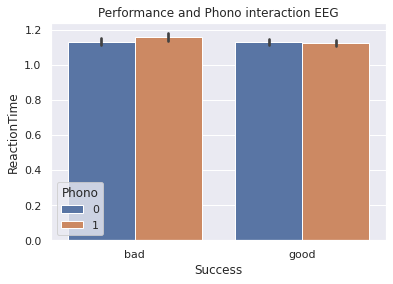

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', hue = 'Phono',
    data = eeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Phono interaction EEG');

print('Good')
subset = eeg_rt[eeg_rt['Success'] == 1]
x, y = subset[subset['Phono'] == 1][['ReactionTime']], subset[subset['Phono'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Bad')
subset = eeg_rt[eeg_rt['Success'] == 0]
x, y = subset[subset['Phono'] == 1][['ReactionTime']], subset[subset['Phono'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Low')
subset = eeg_rt[eeg_rt['Phono'] == 1]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('High')
subset = eeg_rt[eeg_rt['Phono'] == 0]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([3.90391262]), pvalue=array([9.67477885e-05]))
Bad
Ttest_indResult(statistic=array([8.64697028]), pvalue=array([9.70046476e-18]))
Mismatch
Ttest_indResult(statistic=array([-3.86454879]), pvalue=array([0.00011411]))
Match
Ttest_indResult(statistic=array([1.47757823]), pvalue=array([0.13963862]))


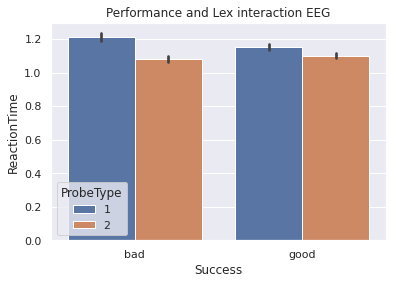

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', hue = 'ProbeType',
    data = eeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Lex interaction EEG');

print('Good')
subset = eeg_rt[eeg_rt['Success'] == 1]
x, y = subset[subset['ProbeType'] == 1][['ReactionTime']], subset[subset['ProbeType'] == 2][['ReactionTime']]
print(ttest(x,y))
print('Bad')
subset = eeg_rt[eeg_rt['Success'] == 0]
x, y = subset[subset['ProbeType'] == 1][['ReactionTime']], subset[subset['ProbeType'] == 2][['ReactionTime']]
print(ttest(x,y))
print('Mismatch')
subset = eeg_rt[eeg_rt['ProbeType'] == 1]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Match')
subset = eeg_rt[eeg_rt['ProbeType'] == 2]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))

Good
Length 3 vs 5
Ttest_indResult(statistic=array([-3.19957408]), pvalue=array([0.00140495]))
Length 5 vs 7
Ttest_indResult(statistic=array([2.16646509]), pvalue=array([0.03043188]))
Length 7 vs 9
Ttest_indResult(statistic=array([-0.17519573]), pvalue=array([0.86094937]))

Bad
Length 3 vs 5
Ttest_indResult(statistic=array([-5.58489715]), pvalue=array([2.88472612e-08]))
Length 5 vs 7
Ttest_indResult(statistic=array([0.77325721]), pvalue=array([0.43952013]))
Length 7 vs 9
Ttest_indResult(statistic=array([-0.26464466]), pvalue=array([0.79132785]))

Length 3
Ttest_indResult(statistic=array([0.62248327]), pvalue=array([0.53373336]))
Length 5
Ttest_indResult(statistic=array([-2.21777221]), pvalue=array([0.0267431]))
Length 7
Ttest_indResult(statistic=array([-0.9427968]), pvalue=array([0.34596054]))
Length 9
Ttest_indResult(statistic=array([-1.09610144]), pvalue=array([0.27324189]))


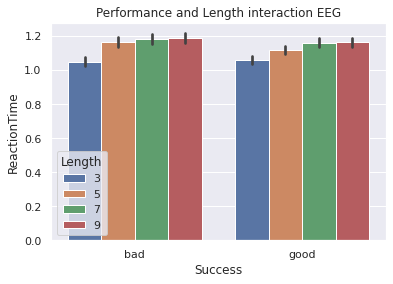

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', hue = 'Length',
    data = eeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Length interaction EEG');

print('Good')
subset = eeg_rt[eeg_rt['Success'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 9][['ReactionTime']]
print(ttest(x,y))
print('')
print('Bad')
subset = eeg_rt[eeg_rt['Success'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 9][['ReactionTime']]
print(ttest(x,y))
print('')
print('Length 3')
subset = eeg_rt[eeg_rt['Length'] == 3]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 5')
subset = eeg_rt[eeg_rt['Length'] == 5]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 7')
subset = eeg_rt[eeg_rt['Length'] == 7]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 9')
subset = eeg_rt[eeg_rt['Length'] == 9]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))

**iEEG**

Ttest_indResult(statistic=array([1.32035844]), pvalue=array([0.18678915]))


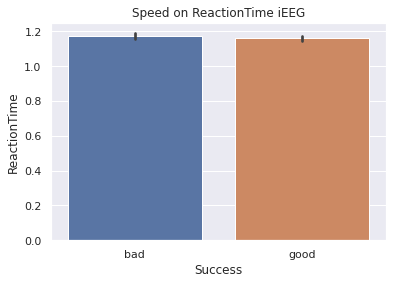

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', data = ieeg_rt
    );
ax.set_xticklabels(['bad', 'good'])
pl.title('Speed on ReactionTime iEEG');

x, y = ieeg_rt[ieeg_rt['Success'] == 0][['ReactionTime']], ieeg_rt[ieeg_rt['Success'] == 1][['ReactionTime']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([-2.50680999]), pvalue=array([0.01225441]))
Bad
Ttest_indResult(statistic=array([-1.58958227]), pvalue=array([0.11208634]))
Words
Ttest_indResult(statistic=array([-1.27243844]), pvalue=array([0.20336171]))
Non-words
Ttest_indResult(statistic=array([-0.60114191]), pvalue=array([0.54781217]))


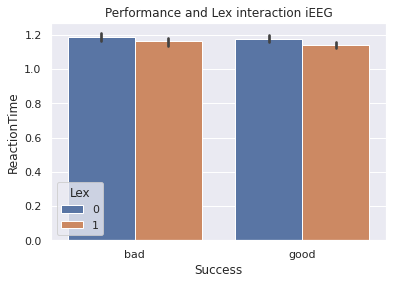

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', hue = 'Lex',
    data = ieeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Lex interaction iEEG');

print('Good')
subset = ieeg_rt[ieeg_rt['Success'] == 1]
x, y = subset[subset['Lex'] == 1][['ReactionTime']], subset[subset['Lex'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Bad')
subset = ieeg_rt[ieeg_rt['Success'] == 0]
x, y = subset[subset['Lex'] == 1][['ReactionTime']], subset[subset['Lex'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Words')
subset = ieeg_rt[ieeg_rt['Lex'] == 1]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Non-words')
subset = ieeg_rt[ieeg_rt['Lex'] == 0]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([2.58307873]), pvalue=array([0.00985668]))
Bad
Ttest_indResult(statistic=array([0.48675704]), pvalue=array([0.6264852]))
Low
Ttest_indResult(statistic=array([-0.04902154]), pvalue=array([0.96090655]))
High
Ttest_indResult(statistic=array([-1.89256427]), pvalue=array([0.05857073]))


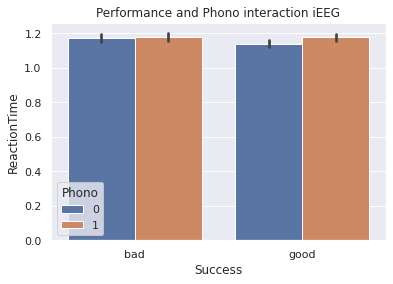

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', hue = 'Phono',
    data = ieeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Phono interaction iEEG');

print('Good')
subset = ieeg_rt[ieeg_rt['Success'] == 1]
x, y = subset[subset['Phono'] == 1][['ReactionTime']], subset[subset['Phono'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Bad')
subset = ieeg_rt[ieeg_rt['Success'] == 0]
x, y = subset[subset['Phono'] == 1][['ReactionTime']], subset[subset['Phono'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Low')
subset = ieeg_rt[ieeg_rt['Phono'] == 1]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('High')
subset = ieeg_rt[ieeg_rt['Phono'] == 0]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))

Good
Ttest_indResult(statistic=array([2.72261564]), pvalue=array([0.00652826]))
Bad
Ttest_indResult(statistic=array([3.32620662]), pvalue=array([0.00089626]))
Mismatch
Ttest_indResult(statistic=array([-1.34650393]), pvalue=array([0.17828272]))
Macth
Ttest_indResult(statistic=array([-0.3899832]), pvalue=array([0.69659138]))


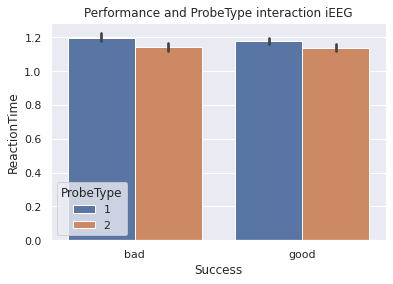

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', hue = 'ProbeType',
    data = ieeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and ProbeType interaction iEEG');

print('Good')
subset = ieeg_rt[ieeg_rt['Success'] == 1]
x, y = subset[subset['ProbeType'] == 1][['ReactionTime']], subset[subset['ProbeType'] == 2][['ReactionTime']]
print(ttest(x,y))
print('Bad')
subset = ieeg_rt[ieeg_rt['Success'] == 0]
x, y = subset[subset['ProbeType'] == 1][['ReactionTime']], subset[subset['ProbeType'] == 2][['ReactionTime']]
print(ttest(x,y))
print('Mismatch')
subset = ieeg_rt[ieeg_rt['ProbeType'] == 1]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Macth')
subset = ieeg_rt[ieeg_rt['ProbeType'] == 2]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))

Good
Length 3 vs 5
Ttest_indResult(statistic=array([-3.0556581]), pvalue=array([0.0023001]))
Length 5 vs 7
Ttest_indResult(statistic=array([1.75785415]), pvalue=array([0.07905278]))
Length 7 vs 9
Ttest_indResult(statistic=array([-1.45384586]), pvalue=array([0.14627697]))

Bad
Length 3 vs 5
Ttest_indResult(statistic=array([-2.56953123]), pvalue=array([0.01032728]))
Length 5 vs 7
Ttest_indResult(statistic=array([1.00817529]), pvalue=array([0.31361477]))
Length 7 vs 9
Ttest_indResult(statistic=array([-0.56762055]), pvalue=array([0.57041974]))

Length 3
Ttest_indResult(statistic=array([-1.23815892]), pvalue=array([0.21593966]))
Length 5
Ttest_indResult(statistic=array([-1.0604671]), pvalue=array([0.2891867]))
Length 7
Ttest_indResult(statistic=array([-0.57443831]), pvalue=array([0.565798]))
Length 9
Ttest_indResult(statistic=array([0.20292224]), pvalue=array([0.83923596]))


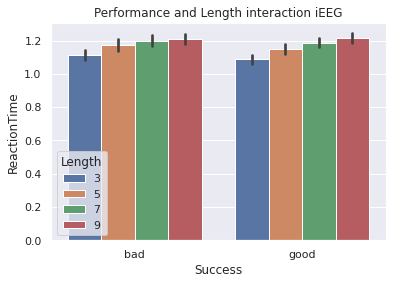

In [ ]:
pl.figure()
ax = sns.barplot(
    x = 'Success', y = 'ReactionTime', hue = 'Length',
    data = ieeg_rt
)
ax.set_xticklabels(['bad', 'good'])
pl.title('Performance and Length interaction iEEG');

print('Good')
subset = ieeg_rt[ieeg_rt['Success'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 9][['ReactionTime']]
print(ttest(x,y))
print('')
print('Bad')
subset = ieeg_rt[ieeg_rt['Success'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 5][['ReactionTime']]
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7][['ReactionTime']], subset[subset['Length'] == 9][['ReactionTime']]
print(ttest(x,y))
print('')
print('Length 3')
subset = ieeg_rt[ieeg_rt['Length'] == 3]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 5')
subset = ieeg_rt[ieeg_rt['Length'] == 5]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 7')
subset = ieeg_rt[ieeg_rt['Length'] == 7]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))
print('Length 9')
subset = ieeg_rt[ieeg_rt['Length'] == 9]
x, y = subset[subset['Success'] == 1][['ReactionTime']], subset[subset['Success'] == 0][['ReactionTime']]
print(ttest(x,y))

**Models with Performance Reaction Time**

In [ ]:
%%R -i eeg_rt
comp1<-lmer('ReactionTime ~ Lex + ProbeType + Length + Success + Success:ProbeType + Length:ProbeType + (1|Subject)', data=eeg_rt)
comp2<-lmer('ReactionTime ~ Lex + ProbeType + Length + Success + Success:ProbeType + Length:ProbeType + Success:Length + (1|Subject)', data=eeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    9 2211.629 2271.089 -1096.814 2193.629        NA NA         NA
2   10 2213.240 2279.306 -1096.620 2193.240 0.3889143  1  0.5328706


In [ ]:
mod = Lmer(
    'ReactionTime ~ Lex + ProbeType + Length + Success + Success:ProbeType + Length:ProbeType + (1|Subject)',
    data = eeg_rt
)
mod.fit()

Formula: ReactionTime~Lex+ProbeType+Length+Success+Success:ProbeType+Length:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5468	 Groups: {'Subject': 29.0}

Log-likelihood: -1121.911 	 AIC: 2243.822

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.048  0.219
Residual               0.085  0.292

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)           1.162   1.020    1.303  0.072    52.504  16.102  0.000   
Lex                  -0.042  -0.058   -0.026  0.008  5434.002  -5.302  0.000   
ProbeType            -0.069  -0.117   -0.021  0.024  5434.213  -2.819  0.005   
Length                0.032   0.021    0.043  0.006  5434.332   5.750  0.000   
Success              -0.118  -0.286    0.050  0.086    31.765  -1.382  0.177   
ProbeType:Success     0.066   0.035    0.097  0.016  5434.139   4.150  0.000   
ProbeType:Length     -0.009  -0.016   -0.002  0.004  5434.356  -2.581  0.010   

                   Sig  
(Intercept)        ***  
Lex                ***  
ProbeType           **  
Length             ***  
Success                 
ProbeType:Success  ***  
ProbeType:Length    **

In [ ]:
%%R -i ieeg_rt
comp1<-lmer('ReactionTime ~ Lex + Length + ProbeType + (1|Subject)', data=ieeg_rt)
comp2<-lmer('ReactionTime ~ Lex + Length + ProbeType + Success + Success:ProbeType + (1|Subject)', data=ieeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    6 1807.747 1845.814 -897.8735 1795.747       NA NA         NA
2    8 1810.352 1861.108 -897.1761 1794.352 1.394866  2  0.4978617


**Combining both variables**

In [ ]:
%%R -i eeg_rt
comp1<-lmer('ResponseCorrect ~  Lex + Length + ProbeType + Success + Lex:ProbeType + Length:ProbeType + Success:Length + ProbeType:Success + (1|Subject)', data=eeg_rt)
comp2<-lmer('ResponseCorrect ~ Lex + Length + ProbeType + Success + Lex:ProbeType + Length:ProbeType + Success:Length + ProbeType:Success + Length:ProbeType:Success + (1|Subject)', data=eeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance   Chisq Df   Pr..Chisq.
1   11 3161.730 3234.404 -1569.865 3139.730      NA NA           NA
2   12 3146.147 3225.427 -1561.073 3122.147 17.5837  1 2.749342e-05


In [ ]:
mod = Lmer(
    'ResponseCorrect ~ Lex + Length + ProbeType + Success + Lex:ProbeType + Length:ProbeType + Success:Length + ProbeType:Success + Length:ProbeType:Success + (1|Subject)',
    data = eeg_rt
)
mod.fit()

Formula: ResponseCorrect~Lex+Length+ProbeType+Success+Lex:ProbeType+Length:ProbeType+Success:Length+ProbeType:Success+Length:ProbeType:Success+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5468	 Groups: {'Subject': 29.0}

Log-likelihood: -1601.742 	 AIC: 3203.484

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.000  0.008
Residual               0.104  0.322

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  \
(Intercept)                  1.057   0.937    1.177  0.061  5368.780  17.275   
Lex                          0.102   0.048    0.156  0.028  5434.632   3.679   
Length                      -0.072  -0.090   -0.054  0.009  5452.238  -7.816   
ProbeType                   -0.033  -0.108    0.042  0.038  5445.514  -0.859   
Success                     -0.099  -0.256    0.058  0.080  5332.420  -1.238   
Lex:ProbeType               -0.044  -0.078   -0.010  0.017  5435.220  -2.510   
Length:ProbeType             0.027   0.015    0.038  0.006  5453.523   4.577   
Length:Success               0.056   0.032    0.081  0.012  5453.312   4.539   
ProbeType:Success            0.088  -0.011    0.186  0.050  5452.511   1.746   
Length:ProbeType:Success    -0.033  -0.048   -0.018  0.008  5454.271  -4.200   

                          P-val  Sig  
(Intercept)               0.000  ***  
Lex                       0.000  ***  
Length                    0.000  ***  
ProbeType                 0.391       
Success                   0.216       
Lex:ProbeType             0.012    *  
Length:ProbeType          0.000  ***  
Length:Success            0.000  ***  
ProbeType:Success         0.081    .  
Length:ProbeType:Success  0.000  ***

In [ ]:
%%R -i eeg_rt
comp1<-lmer('ReactionTime ~ Lex + Length + ProbeType + Speed + Length:ProbeType + Speed:ProbeType + (1|Subject)', data=eeg_rt)
comp2<-lmer('ReactionTime ~ Lex + Length + ProbeType + Speed + Length:ProbeType + Speed:ProbeType + Lex:Speed:Length + (1|Subject)', data=eeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    9 2141.947 2201.407 -1061.973 2123.947        NA NA         NA
2   10 2143.484 2209.551 -1061.742 2123.484 0.4631135  1  0.4961724


In [ ]:
mod = Lmer(
    'ReactionTime ~ Lex + Length + ProbeType + Speed + Length:ProbeType + Speed:ProbeType + (1|Subject)',
    data = eeg_rt
)
mod.fit()

Formula: ReactionTime~Lex+Length+ProbeType+Speed+Length:ProbeType+Speed:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5468	 Groups: {'Subject': 29.0}

Log-likelihood: -1088.498 	 AIC: 2176.995

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.011  0.106
Residual               0.085  0.291

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          1.392   1.297    1.487  0.049   181.773  28.600   0.00   
Lex                 -0.042  -0.058   -0.027  0.008  5434.011  -5.344   0.00   
Length               0.032   0.021    0.043  0.006  5435.381   5.784   0.00   
ProbeType           -0.092  -0.140   -0.044  0.024  5434.873  -3.786   0.00   
Speed               -0.535  -0.627   -0.443  0.047    48.987 -11.364   0.00   
Length:ProbeType    -0.009  -0.016   -0.002  0.004  5435.467  -2.589   0.01   
ProbeType:Speed      0.108   0.077    0.139  0.016  5434.535   6.781   0.00   

                  Sig  
(Intercept)       ***  
Lex               ***  
Length            ***  
ProbeType         ***  
Speed             ***  
Length:ProbeType   **  
ProbeType:Speed   ***

In [ ]:
%%R -i ieeg_rt
comp1<-lmer('RespCorrect ~ Success + Length + ProbeType + Lex + Lex:ProbeType + Speed + Speed:Lex + (1|Subject)', data=ieeg_rt)
comp2<-lmer('RespCorrect ~ Success + Length + ProbeType + Lex + Lex:ProbeType + Speed + Speed:Lex + Length:Speed + (1|Subject)', data=ieeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1   10 3069.635 3133.080 -1524.817 3049.635       NA NA         NA
2   11 3070.266 3140.056 -1524.133 3048.266 1.368825  1  0.2420138


In [ ]:
mod = Lmer(
    'RespCorrect ~ Success + Length + ProbeType + Lex + Lex:ProbeType + Speed + Speed:Lex + (1|Subject)',
    data = ieeg_rt
)
mod.fit()

boundary (singular) fit: see help('isSingular') 

Formula: RespCorrect~Success+Length+ProbeType+Lex+Lex:ProbeType+Speed+Speed:Lex+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 4207	 Groups: {'Subject': 27.0}

Log-likelihood: -1554.500 	 AIC: 3109.000

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.000  0.000
Residual               0.121  0.348

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
(Intercept)       0.866   0.807    0.925  0.030  4199.0  28.781  0.000  ***
Success           0.078   0.057    0.099  0.011  4199.0   7.205  0.000  ***
Length           -0.030  -0.034   -0.025  0.002  4199.0 -12.413  0.000  ***
ProbeType         0.079   0.049    0.109  0.015  4199.0   5.205  0.000  ***
Lex               0.114   0.044    0.184  0.036  4199.0   3.207  0.001   **
Speed            -0.003  -0.033    0.028  0.015  4199.0  -0.164  0.870     
ProbeType:Lex    -0.090  -0.132   -0.047  0.022  4199.0  -4.152  0.000  ***
Lex:Speed         0.046   0.003    0.089  0.022  4199.0   2.089  0.037    *

In [ ]:
%%R -i ieeg_rt
comp1<-lmer('ReactionTime ~ Lex + Length + Speed + ProbeType + Length:ProbeType + (1|Subject)', data=ieeg_rt)
comp2<-lmer('ReactionTime ~ Lex + Length + Speed + ProbeType + Length:ProbeType + Lex:Speed + (1|Subject)', data=ieeg_rt)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance     Chisq Df Pr..Chisq.
1    8 1770.821 1821.577 -877.4104 1754.821        NA NA         NA
2    9 1772.719 1829.820 -877.3597 1754.719 0.1014176  1   0.750135


In [ ]:
mod = Lmer(
    'ReactionTime ~ Lex + Length + Speed + ProbeType + Length:ProbeType + (1|Subject)',
    data = ieeg_rt
)
mod.fit()

Formula: ReactionTime~Lex+Length+Speed+ProbeType+Length:ProbeType+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 4207	 Groups: {'Subject': 27.0}

Log-likelihood: -899.725 	 AIC: 1799.451

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.016  0.126
Residual               0.087  0.295

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  \
(Intercept)          1.460   1.350    1.570  0.056   111.573  25.973  0.000   
Lex                 -0.034  -0.052   -0.016  0.009  4176.026  -3.761  0.000   
Length              -0.005  -0.018    0.007  0.006  4176.398  -0.853  0.394   
Speed               -0.310  -0.408   -0.211  0.050    24.997  -6.177  0.000   
ProbeType           -0.138  -0.189   -0.087  0.026  4176.374  -5.288  0.000   
Length:ProbeType     0.016   0.008    0.024  0.004  4176.453   4.000  0.000   

                  Sig  
(Intercept)       ***  
Lex               ***  
Length                 
Speed             ***  
ProbeType         ***  
Length:ProbeType  ***

# Extra

### The effect of the experiment part on Accuracy

In [ ]:
# wanna check is there any difference depending on the part of experiment
# beginning of the experiment vs. the end 

**EEG dataset**

In [ ]:
trial_category = []
for i in eeg_data.Subject.unique():
  subset = eeg_data[eeg_data['Subject'] == i]
  for i in range(0, subset.shape[0]):
    if i < 63:
      trial_category.append('beginning')
    elif 63 <= i <= 126:
      trial_category.append('middle')
    elif 126 < i <= 191:
      trial_category.append('end')

In [ ]:
eeg_data['TrialPos'] = trial_category

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


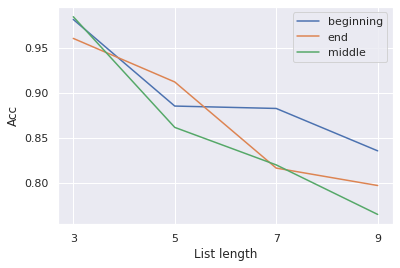

In [ ]:
pl.figure()
subset = eeg_data.groupby(['TrialPos', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.ResponseCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique());

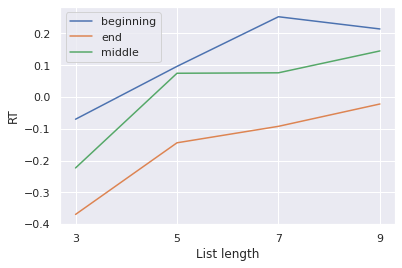

In [ ]:
pl.figure()
subset = eeg_data.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.TrialPos.unique());

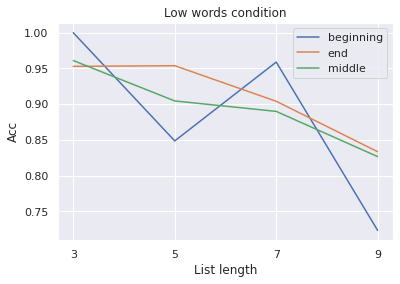

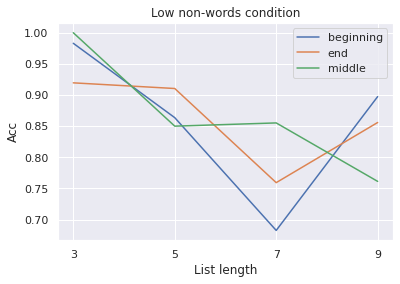

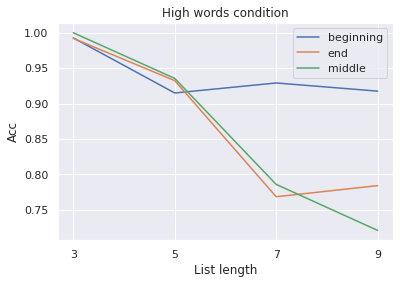

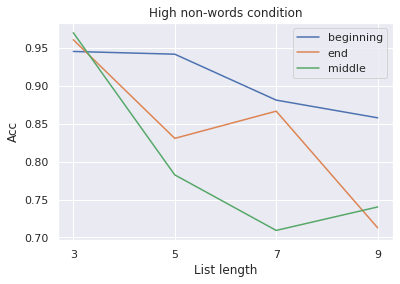

In [ ]:
# Accuracy
pl.figure()
subset = eeg_data[(eeg_data['Lex'] == 1) & (eeg_data['Phono'] == 1)]
subset = subset.groupby(['TrialPos', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.ResponseCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('Low words condition');

pl.figure()
subset = eeg_data[(eeg_data['Lex'] == 0) & (eeg_data['Phono'] == 1)]
subset = subset.groupby(['TrialPos', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.ResponseCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('Low non-words condition');

  
pl.figure()
subset = eeg_data[(eeg_data['Lex'] == 1) & (eeg_data['Phono'] == 0)]
subset = subset.groupby(['TrialPos', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.ResponseCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('High words condition')


pl.figure()
subset = eeg_data[(eeg_data['Lex'] == 0) & (eeg_data['Phono'] == 0)]
subset = subset.groupby(['TrialPos', 'Length'])[['ResponseCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.ResponseCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('High non-words condition');

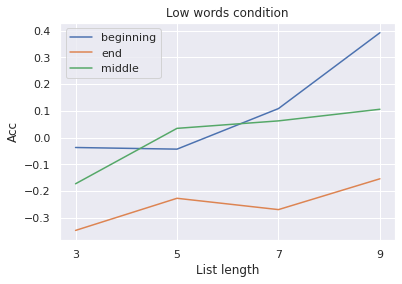

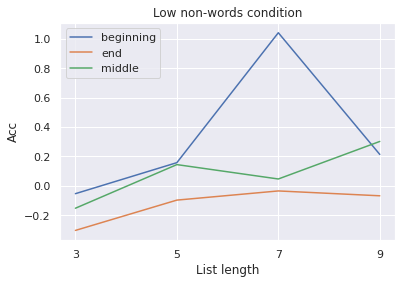

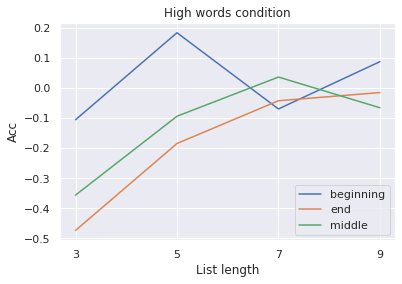

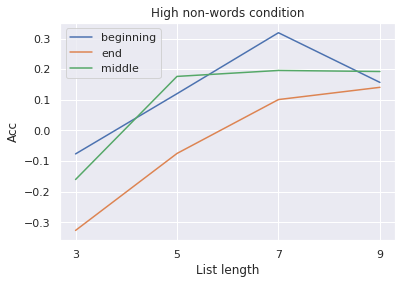

In [ ]:
# Reaction Time 
pl.figure()
subset = eeg_data[(eeg_data['Lex'] == 1) & (eeg_data['Phono'] == 1)]
subset = subset.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('Low words condition');

pl.figure()
subset = eeg_data[(eeg_data['Lex'] == 0) & (eeg_data['Phono'] == 1)]
subset = subset.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('Low non-words condition');

  
pl.figure()
subset = eeg_data[(eeg_data['Lex'] == 1) & (eeg_data['Phono'] == 0)]
subset = subset.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('High words condition')


pl.figure()
subset = eeg_data[(eeg_data['Lex'] == 0) & (eeg_data['Phono'] == 0)]
subset = subset.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('High non-words condition');

In [ ]:
new = []
check = eeg_data.TrialPos.values
for i in range(0, len(check)):
  if check[i] == 'beginning':
    new.append(0)
  elif check[i] == 'middle':
    new.append(1)
  elif check[i] == 'end':
    new.append(2)
  else:
    print('Check')

In [ ]:
eeg_data['TrialP'] = new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
model_trialpos = Lmer(
    'ResponseCorrect ~ Lex + Length + TrialP + ProbeType + Phono + (1|Subject)',
    data = eeg_data
)
model_trialpos.fit()

Formula: ResponseCorrect~Lex+Length+TrialP+ProbeType+Phono+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5334	 Groups: {'Subject': 29.0}

Log-likelihood: -1549.434 	 AIC: 3098.867

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.038
Residual               0.103  0.321

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.973   0.932    1.014  0.021   984.435  46.304  0.000  ***
Lex             0.031   0.014    0.048  0.009  5300.607   3.505  0.000  ***
Length         -0.028  -0.032   -0.024  0.002  5300.455 -14.418  0.000  ***
TrialP         -0.013  -0.024   -0.003  0.005  5310.982  -2.467  0.014    *
ProbeType       0.046   0.029    0.063  0.009  5306.918   5.198  0.000  ***
Phono          -0.000  -0.017    0.017  0.009  5301.145  -0.003  0.998

**iEEG dataset**

In [ ]:
ieeg_sh.head()

Trial Subject block  ProbeType     stdRT  RespCorrect  Position  Length  \
0      0     D23     1          2 -0.896484            1         1       3   
1      1     D23     1          2  0.564665            1         1       7   
2      2     D23     1          2 -0.326257            1         2       7   
3      3     D23     1          1  1.041717            1         0       9   
4      4     D23     1          1  1.595710            1         0       5   

   Lex  Phono  
0    1      1  
1    1      0  
2    0      0  
3    1      1  
4    1      0

In [ ]:
trial_category = []
for i in ieeg_sh.Subject.unique():
  subset = ieeg_sh[ieeg_sh['Subject'] == i]
  for i in range(0, subset.shape[0]):
    if i < 63:
      trial_category.append('beginning')
    elif 63 <= i <= 126:
      trial_category.append('middle')
    elif 126 < i <= 191:
      trial_category.append('end')

In [ ]:
ieeg_sh['TrialPos'] = trial_category

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


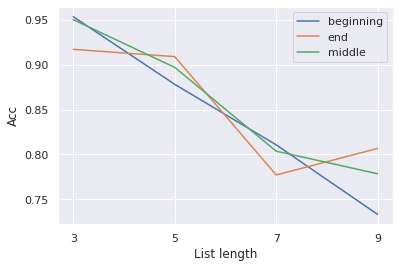

In [ ]:
pl.figure()
subset = ieeg_sh.groupby(['TrialPos', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique());

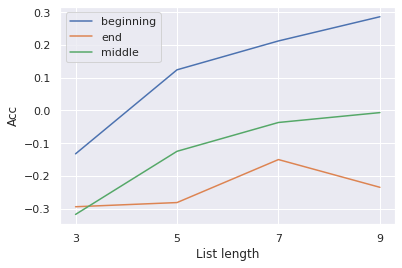

In [ ]:
pl.figure()
subset = ieeg_sh.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique());

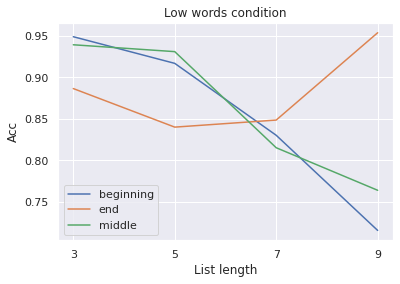

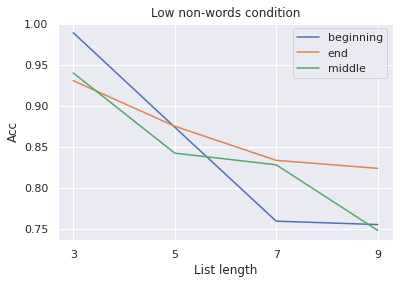

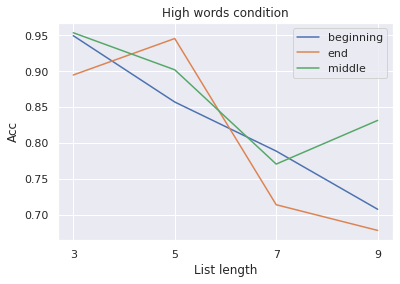

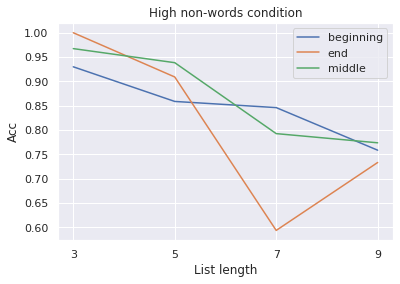

In [ ]:
# Accuracy
pl.figure()
subset = ieeg_sh[(ieeg_sh['Lex'] == 1) & (ieeg_sh['Phono'] == 1)]
subset = subset.groupby(['TrialPos', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('Low words condition');

pl.figure()
subset = ieeg_sh[(ieeg_sh['Lex'] == 0) & (ieeg_sh['Phono'] == 1)]
subset = subset.groupby(['TrialPos', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('Low non-words condition');

  
pl.figure()
subset = ieeg_sh[(ieeg_sh['Lex'] == 1) & (ieeg_sh['Phono'] == 0)]
subset = subset.groupby(['TrialPos', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('High words condition')


pl.figure()
subset = ieeg_sh[(ieeg_sh['Lex'] == 0) & (ieeg_sh['Phono'] == 0)]
subset = subset.groupby(['TrialPos', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('High non-words condition');

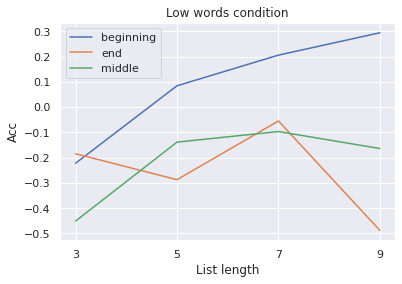

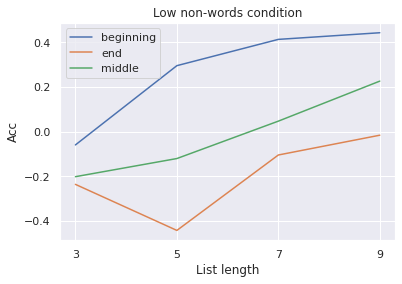

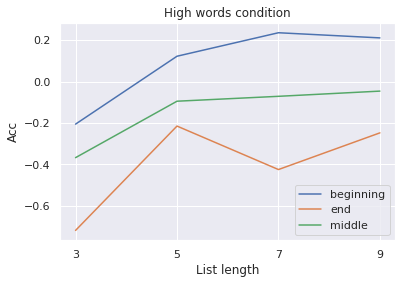

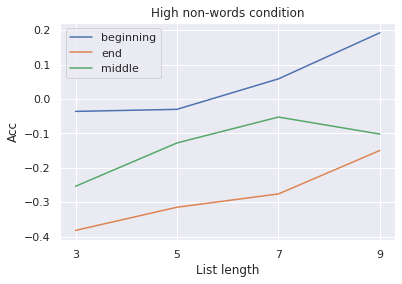

In [ ]:
# Reaction Time 
pl.figure()
subset = ieeg_sh[(ieeg_sh['Lex'] == 1) & (ieeg_sh['Phono'] == 1)]
subset = subset.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('Low words condition');

pl.figure()
subset = ieeg_sh[(ieeg_sh['Lex'] == 0) & (ieeg_sh['Phono'] == 1)]
subset = subset.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('Low non-words condition');

  
pl.figure()
subset = ieeg_sh[(ieeg_sh['Lex'] == 1) & (ieeg_sh['Phono'] == 0)]
subset = subset.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('High words condition')


pl.figure()
subset = ieeg_sh[(ieeg_sh['Lex'] == 0) & (ieeg_sh['Phono'] == 0)]
subset = subset.groupby(['TrialPos', 'Length'])[['stdRT']].mean().reset_index()
for i in subset.TrialPos.unique():
  x = subset[subset['TrialPos'] == i]
  pl.plot(x.Length, x.stdRT)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.TrialPos.unique())
pl.title('High non-words condition');

In [ ]:
ieeg_sh.head()

Trial Subject block  ProbeType     stdRT  RespCorrect  Position  Length  \
0      0     D23     1          2 -0.896484            1         1       3   
1      1     D23     1          2  0.564665            1         1       7   
2      2     D23     1          2 -0.326257            1         2       7   
3      3     D23     1          1  1.041717            1         0       9   
4      4     D23     1          1  1.595710            1         0       5   

   Lex  Phono   TrialPos  TrialP  
0    1      1  beginning       0  
1    1      0  beginning       0  
2    0      0  beginning       0  
3    1      1  beginning       0  
4    1      0  beginning       0

In [ ]:
new = []
check = ieeg_sh.TrialPos.values
for i in range(0, len(check)):
  if check[i] == 'beginning':
    new.append(0)
  elif check[i] == 'middle':
    new.append(1)
  elif check[i] == 'end':
    new.append(2)
  else:
    print('Check')

In [ ]:
ieeg_sh['TrialP'] = new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
model_trialpos_i = Lmer(
    'RespCorrect ~ Lex + Length + Phono + ProbeType + TrialP + (1|Subject)',
    data = ieeg_sh
)
model_trialpos_i.fit()

Formula: RespCorrect~Lex+Length+Phono+ProbeType+TrialP+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 3725	 Groups: {'Subject': 25.0}

Log-likelihood: -1372.663 	 AIC: 2745.326

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.038
Residual               0.120  0.347

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.980   0.927    1.033  0.027  1159.776  36.307  0.000  ***
Lex             0.011  -0.011    0.033  0.011  3695.580   0.959  0.338     
Length         -0.032  -0.037   -0.027  0.003  3696.417 -12.518  0.000  ***
Phono           0.008  -0.014    0.030  0.011  3712.172   0.700  0.484     
ProbeType       0.033   0.010    0.055  0.011  3707.061   2.855  0.004   **
TrialP          0.005  -0.011    0.020  0.008  3719.000   0.586  0.558